In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('covid_19.csv')
print(data.head())
print(data.info())
print(data.isnull().sum())

            country      continent  population         day  \
0      Saint-Helena         Africa      6115.0  2024-06-30   
1  Falkland-Islands  South-America      3539.0  2024-06-30   
2        Montserrat  North-America      4965.0  2024-06-30   
3  Diamond-Princess            NaN         NaN  2024-06-30   
4      Vatican-City         Europe       799.0  2024-06-30   

                        time  Cases  Recovered  Deaths    Tests  
0  2024-06-30T16:15:16+00:00   2166        2.0     NaN      NaN  
1  2024-06-30T16:15:16+00:00   1930     1930.0     NaN   8632.0  
2  2024-06-30T16:15:16+00:00   1403     1376.0     8.0  17762.0  
3  2024-06-30T16:15:16+00:00    712      699.0    13.0      NaN  
4  2024-06-30T16:15:16+00:00     29       29.0     NaN      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     238 non-null    object 
 1  

In [3]:
data['day']=pd.to_datetime(data['day'])#converts date to datetime format

In [4]:
data.fillna(0,inplace=True)#handle missing or inconsistent values

In [5]:
country_summary=data.groupby('country')[['Cases','Deaths','Recovered','Tests']].sum().reset_index()# Analyzing Data
country_summary['Death Rate (%)'] = (country_summary['Deaths'] / country_summary['Cases']) * 100
country_summary['Recovery Rate (%)'] = (country_summary['Recovered'] / country_summary['Cases']) * 100
print(country_summary)

               country      Cases     Deaths    Recovered      Tests  \
0          Afghanistan     234174     7996.0     211080.0  1390730.0   
1               Africa   12860924   258892.0   12090808.0        0.0   
2              Albania     334863     3605.0     330233.0  1941032.0   
3              Algeria     272010     6881.0     183061.0   230960.0   
4                  All  704753890  7010681.0  675619811.0        0.0   
..                 ...        ...        ...          ...        ...   
233  Wallis-and-Futuna       3550        8.0        438.0    20508.0   
234     Western-Sahara         10        1.0          9.0        0.0   
235              Yemen      11945     2159.0       9124.0   329592.0   
236             Zambia     349304     4069.0     341316.0  4112961.0   
237           Zimbabwe     266359     5740.0     258888.0  2525756.0   

     Death Rate (%)  Recovery Rate (%)  
0          3.414555          90.138102  
1          2.013012          94.011970  
2          1

In [6]:
daily_avg = data.groupby('country')[['Cases', 'Deaths', 'Tests']].mean().reset_index()#Calculating average daily cases, deaths, and tests:
daily_avg.columns = ['country', 'Avg Daily Cases', 'Avg Daily Deaths', 'Avg Daily Tests']
print(daily_avg)


               country  Avg Daily Cases  Avg Daily Deaths  Avg Daily Tests
0          Afghanistan         234174.0            7996.0        1390730.0
1               Africa       12860924.0          258892.0              0.0
2              Albania         334863.0            3605.0        1941032.0
3              Algeria         272010.0            6881.0         230960.0
4                  All      704753890.0         7010681.0              0.0
..                 ...              ...               ...              ...
233  Wallis-and-Futuna           3550.0               8.0          20508.0
234     Western-Sahara             10.0               1.0              0.0
235              Yemen          11945.0            2159.0         329592.0
236             Zambia         349304.0            4069.0        4112961.0
237           Zimbabwe         266359.0            5740.0        2525756.0

[238 rows x 4 columns]


In [7]:
data['Week'] = data['day'].dt.isocalendar().week  #Performing Time-Based Analysis,Add a Week Number column for weekly analysis
weekly_trends = data.groupby(['country', 'Week'])[['Cases', 'Deaths', 'Recovered']].sum().reset_index()#
print(weekly_trends)


               country  Week      Cases     Deaths    Recovered
0          Afghanistan    26     234174     7996.0     211080.0
1               Africa    26   12860924   258892.0   12090808.0
2              Albania    26     334863     3605.0     330233.0
3              Algeria    26     272010     6881.0     183061.0
4                  All    26  704753890  7010681.0  675619811.0
..                 ...   ...        ...        ...          ...
233  Wallis-and-Futuna    26       3550        8.0        438.0
234     Western-Sahara    26         10        1.0          9.0
235              Yemen    26      11945     2159.0       9124.0
236             Zambia    26     349304     4069.0     341316.0
237           Zimbabwe    26     266359     5740.0     258888.0

[238 rows x 5 columns]


In [8]:
data['Daily Case Change (%)'] = data.groupby('country')['Cases'].pct_change() * 100#
print(data[['day', 'country', 'Daily Case Change (%)']])


           day           country  Daily Case Change (%)
0   2024-06-30      Saint-Helena                    NaN
1   2024-06-30  Falkland-Islands                    NaN
2   2024-06-30        Montserrat                    NaN
3   2024-06-30  Diamond-Princess                    NaN
4   2024-06-30      Vatican-City                    NaN
..         ...               ...                    ...
233 2024-06-30         Argentina                    NaN
234 2024-06-30       Netherlands                    NaN
235 2024-06-30            Mexico                    NaN
236 2024-06-30              Iran                    NaN
237 2024-06-30         Indonesia                    NaN

[238 rows x 3 columns]


In [9]:
data = data.sort_values(by=['country', 'day'])


In [10]:
data['Daily Case Change (%)'] = data.groupby('country')['Cases'].pct_change() * 100


In [11]:
data['Daily Case Change (%)'] = data['Daily Case Change (%)'].fillna(0)


In [12]:
print(data[['day', 'country', 'Cases', 'Daily Case Change (%)']].head(20))


           day              country      Cases  Daily Case Change (%)
159 2024-06-30          Afghanistan     234174                    0.0
217 2024-06-30               Africa   12860924                    0.0
153 2024-06-30              Albania     334863                    0.0
156 2024-06-30              Algeria     272010                    0.0
218 2024-06-30                  All  704753890                    0.0
73  2024-06-30              Andorra      48015                    0.0
107 2024-06-30               Angola     107327                    0.0
55  2024-06-30             Anguilla       3904                    0.0
48  2024-06-30  Antigua-and-Barbuda       9106                    0.0
233 2024-06-30            Argentina   10128845                    0.0
145 2024-06-30              Armenia     451831                    0.0
63  2024-06-30                Aruba      44224                    0.0
213 2024-06-30                 Asia  221500265                    0.0
230 2024-06-30      

In [13]:
countries = data['country'].unique()


In [14]:
for country in countries:
    # Filter data for the current country
    country_data = data[data['country'] == country]

    # Plot Daily Trends of New Cases, Deaths, and Recoveries
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['day'], country_data['Cases'], label='Daily Cases', color='blue')
    plt.plot(country_data['day'], country_data['Deaths'], label='Daily Deaths', color='red')
    plt.plot(country_data['day'], country_data['Recovered'], label='Daily Recovered', color='green')
    plt.title(f'Daily Trends for {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()

    # Save the plot as an image file
    plt.savefig(f'{country}_daily_trends.png')
    plt.close()  # Close the plot to avoid display overflow


In [15]:
print(data.columns)

Index(['country', 'continent', 'population', 'day', 'time', 'Cases',
       'Recovered', 'Deaths', 'Tests', 'Week', 'Daily Case Change (%)'],
      dtype='object')


In [16]:
print(country_data.head())

      country continent  population        day                       time  \
158  Zimbabwe    Africa  15331428.0 2024-06-30  2024-06-30T16:15:12+00:00   

      Cases  Recovered  Deaths      Tests  Week  Daily Case Change (%)  
158  266359   258888.0  5740.0  2525756.0    26                    0.0  


In [17]:
plt.savefig(f'{country}_daily_trends.png')
plt.show()  # To show the plot in case you're not saving
plt.close()

<Figure size 640x480 with 0 Axes>

Data for Afghanistan:
           day   Cases  Deaths  Recovered
159 2024-06-30  234174  7996.0   211080.0
Data types for Afghanistan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


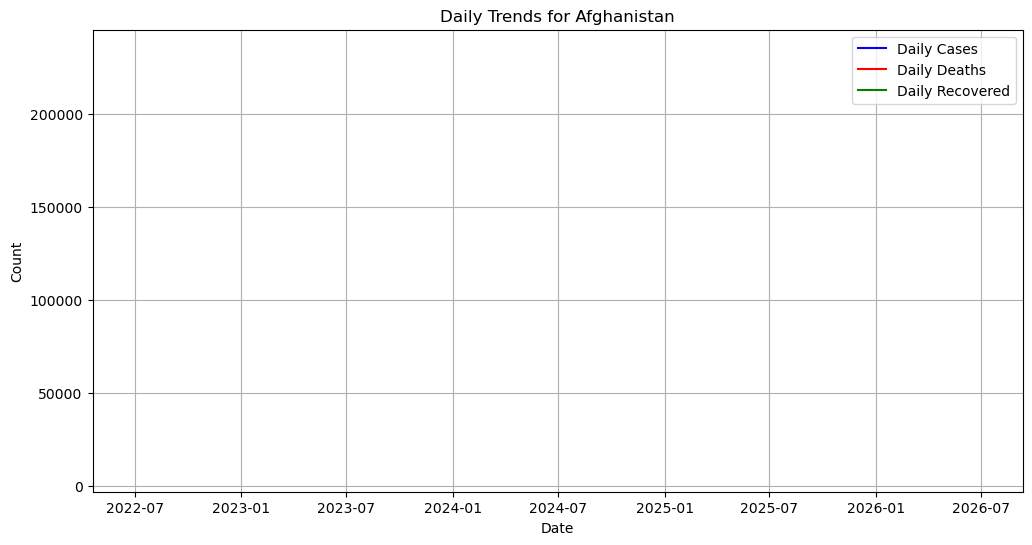

Data for Africa:
           day     Cases    Deaths   Recovered
217 2024-06-30  12860924  258892.0  12090808.0
Data types for Africa:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


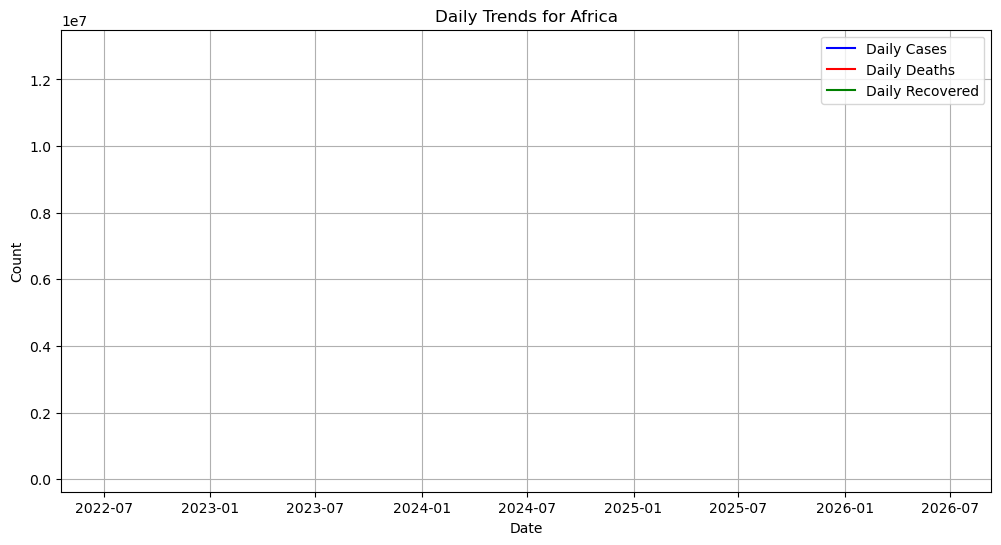

Data for Albania:
           day   Cases  Deaths  Recovered
153 2024-06-30  334863  3605.0   330233.0
Data types for Albania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


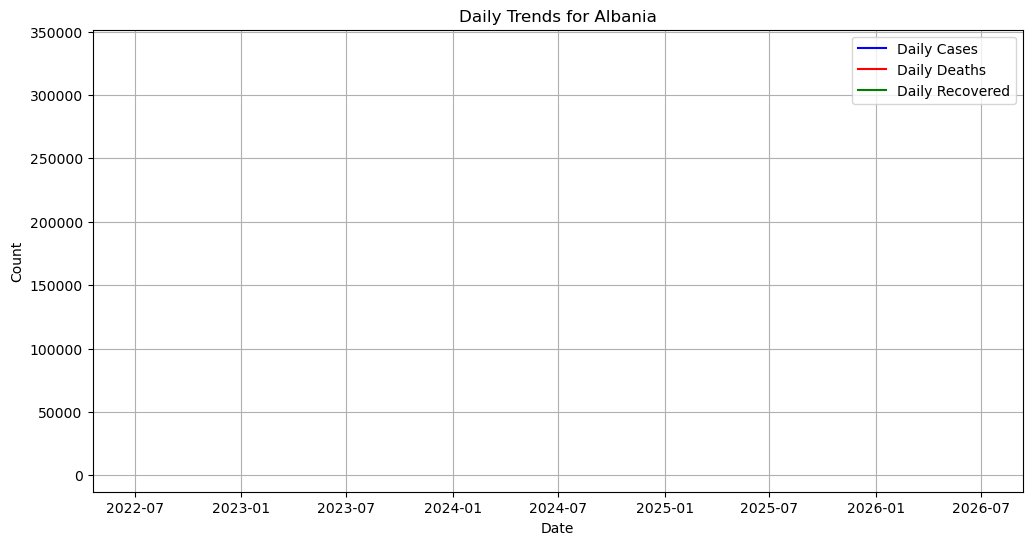

Data for Algeria:
           day   Cases  Deaths  Recovered
156 2024-06-30  272010  6881.0   183061.0
Data types for Algeria:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


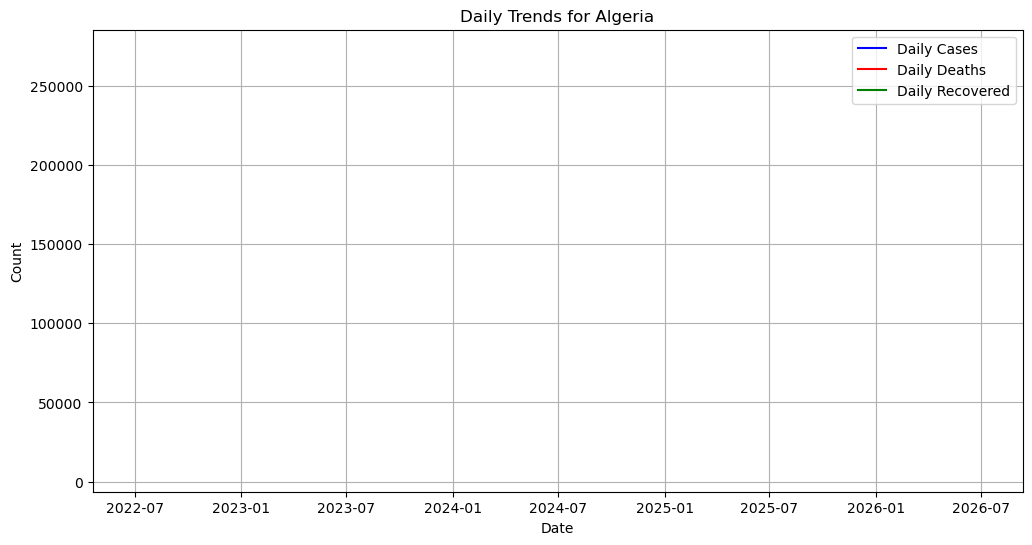

Data for All:
           day      Cases     Deaths    Recovered
218 2024-06-30  704753890  7010681.0  675619811.0
Data types for All:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


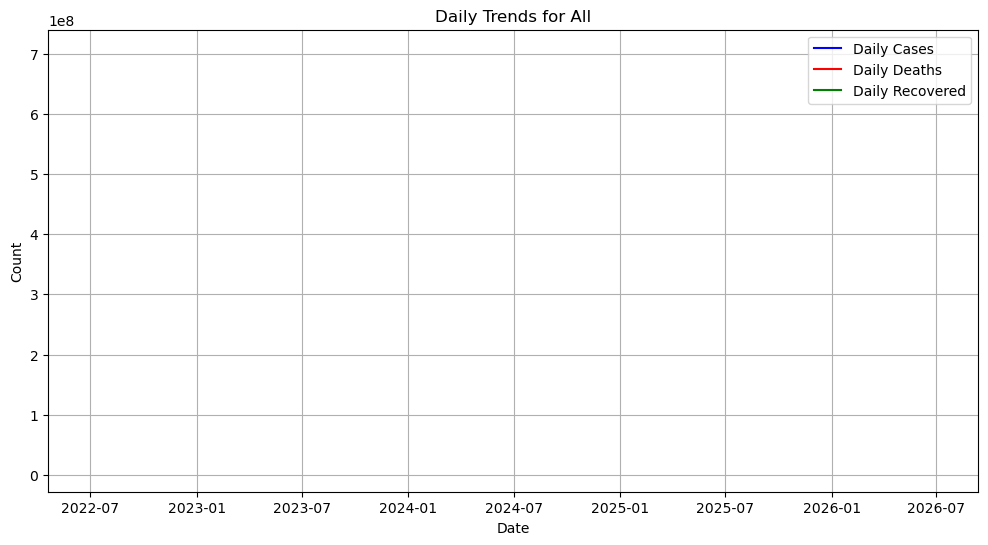

Data for Andorra:
          day  Cases  Deaths  Recovered
73 2024-06-30  48015   165.0        0.0
Data types for Andorra:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


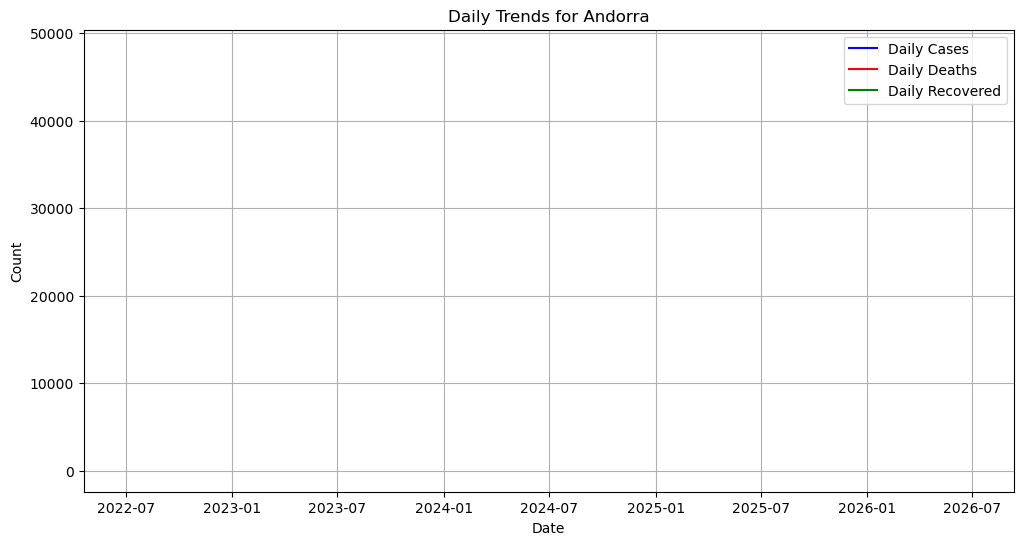

Data for Angola:
           day   Cases  Deaths  Recovered
107 2024-06-30  107327  1937.0   103419.0
Data types for Angola:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


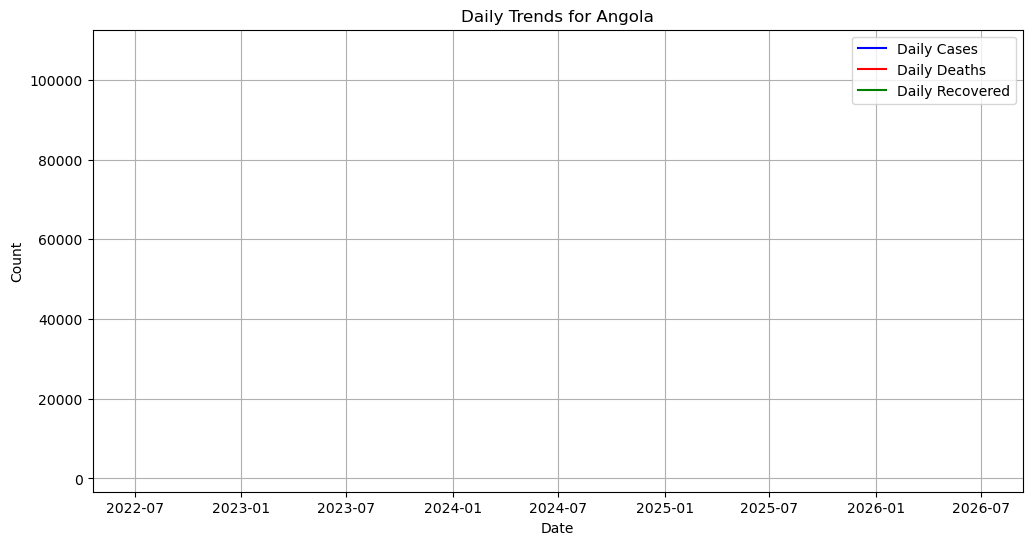

Data for Anguilla:
          day  Cases  Deaths  Recovered
55 2024-06-30   3904    12.0        0.0
Data types for Anguilla:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


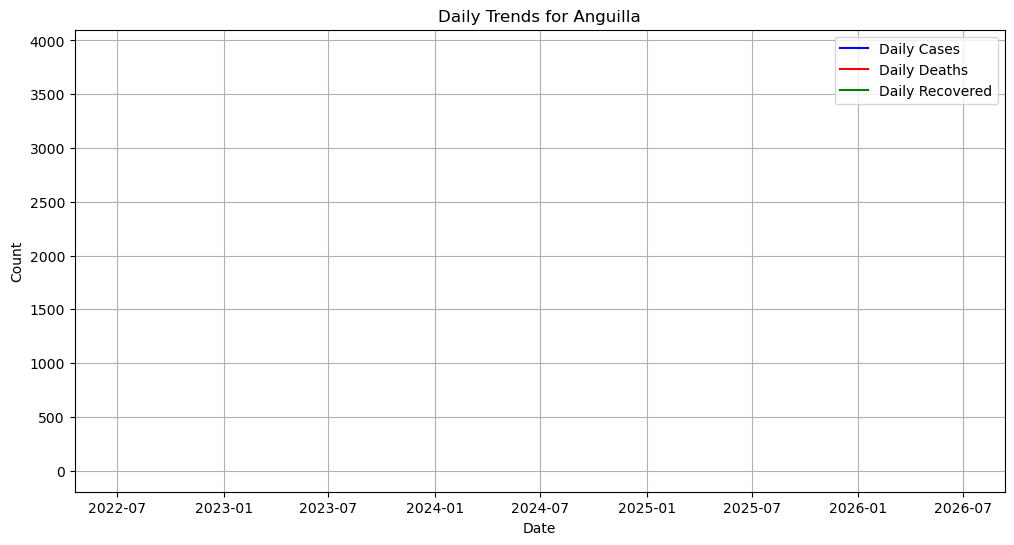

Data for Antigua-and-Barbuda:
          day  Cases  Deaths  Recovered
48 2024-06-30   9106   146.0     8954.0
Data types for Antigua-and-Barbuda:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


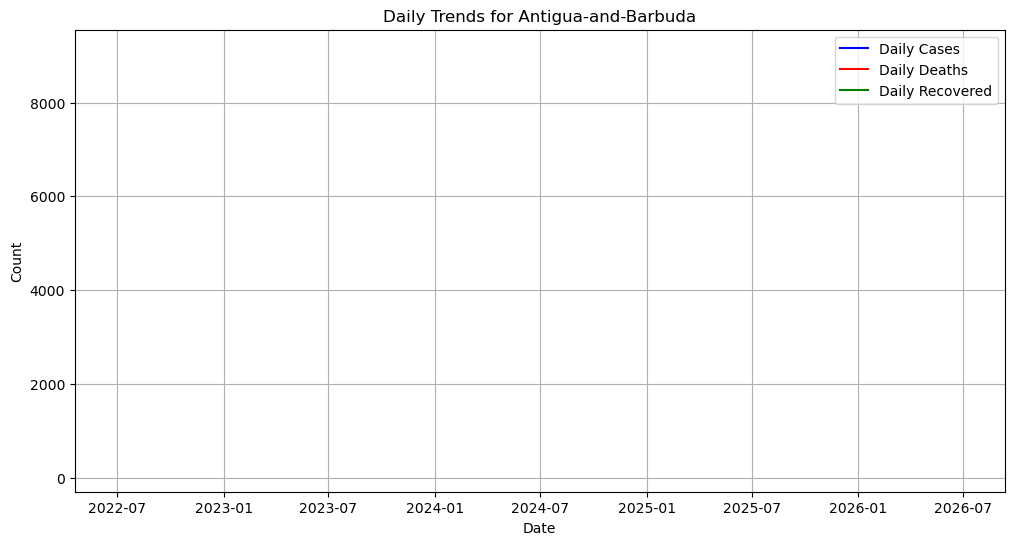

Data for Argentina:
           day     Cases    Deaths  Recovered
233 2024-06-30  10128845  130841.0  9997258.0
Data types for Argentina:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


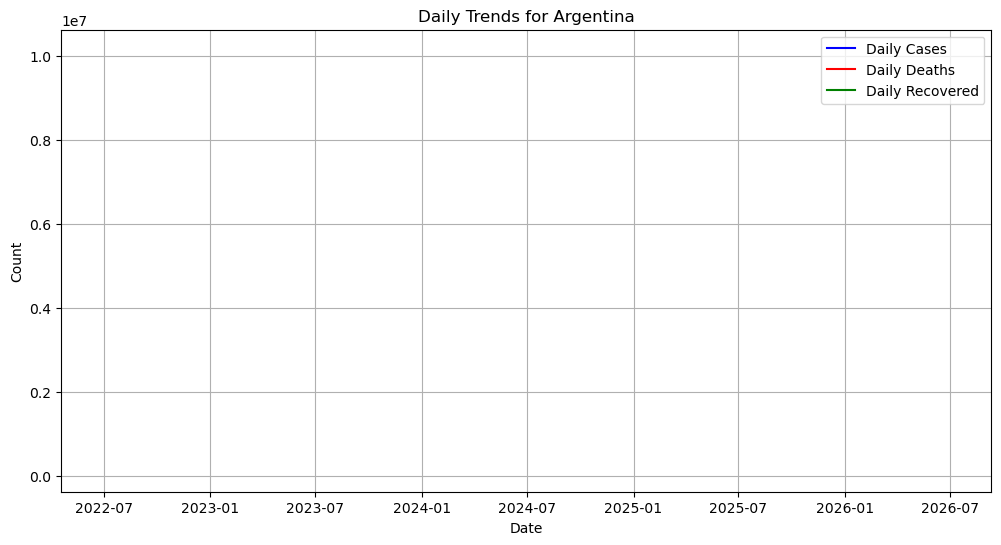

Data for Armenia:
           day   Cases  Deaths  Recovered
145 2024-06-30  451831  8777.0   435162.0
Data types for Armenia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


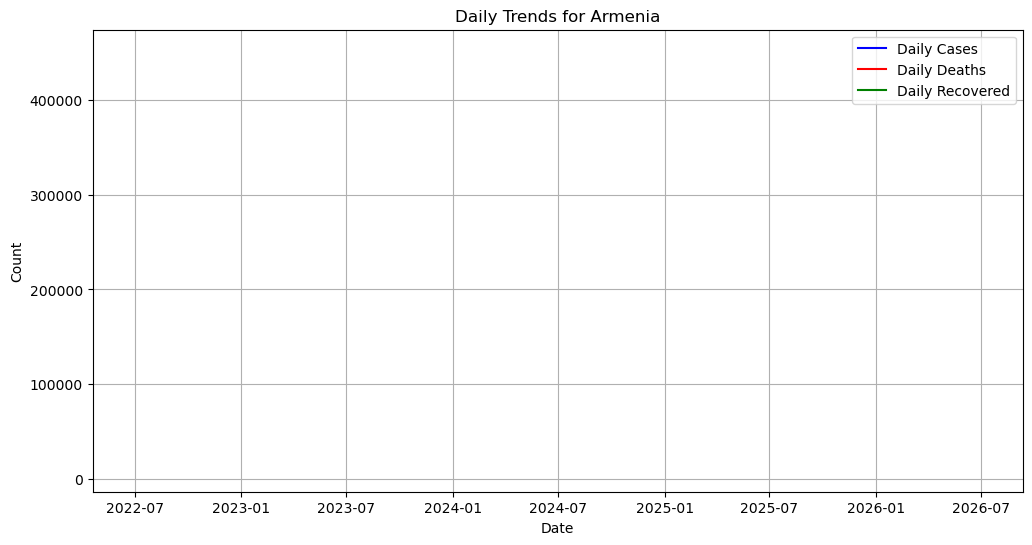

Data for Aruba:
          day  Cases  Deaths  Recovered
63 2024-06-30  44224   292.0    42438.0
Data types for Aruba:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


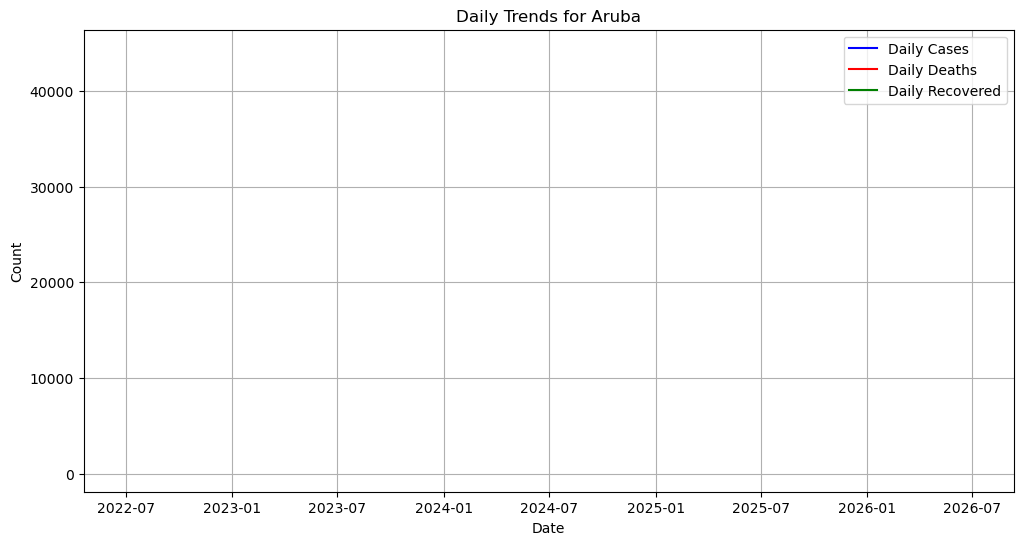

Data for Asia:
           day      Cases     Deaths    Recovered
213 2024-06-30  221500265  1553662.0  205673091.0
Data types for Asia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


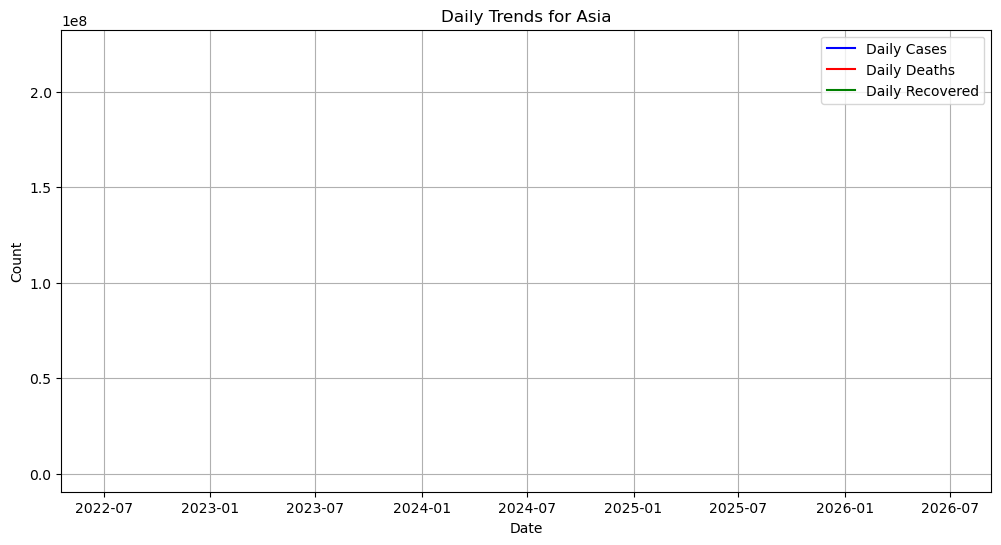

Data for Australia:
           day     Cases   Deaths   Recovered
230 2024-06-30  11853144  24414.0  11820014.0
Data types for Australia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


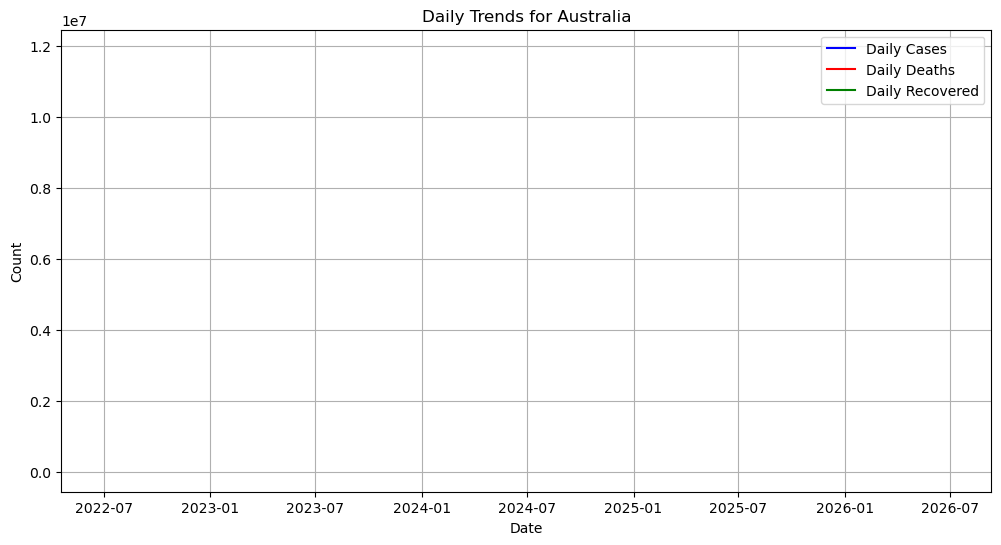

Data for Austria:
           day    Cases   Deaths  Recovered
172 2024-06-30  6081287  22542.0  6054934.0
Data types for Austria:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


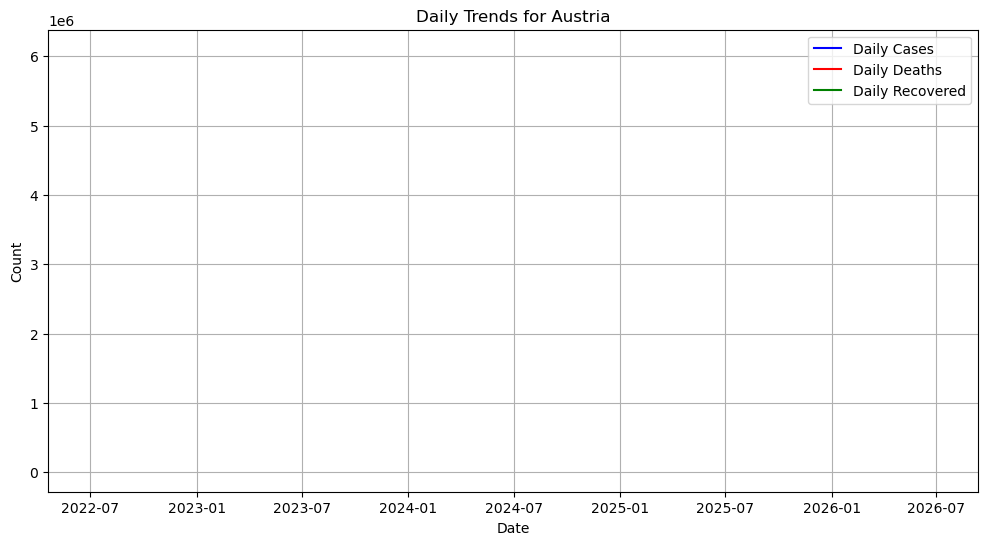

Data for Azerbaijan:
           day   Cases   Deaths  Recovered
131 2024-06-30  835234  10400.0   824089.0
Data types for Azerbaijan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


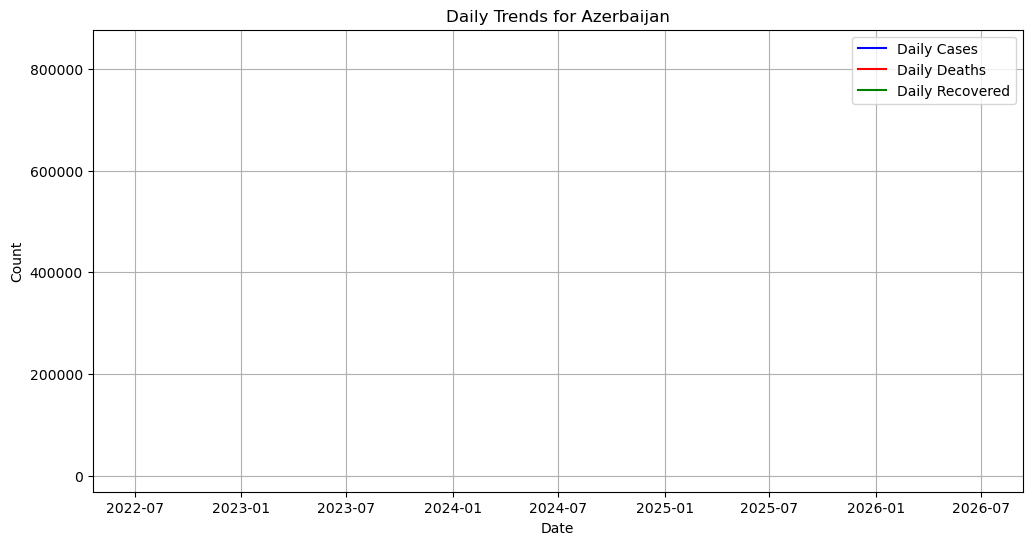

Data for Bahamas:
          day  Cases  Deaths  Recovered
62 2024-06-30  38084   844.0    36366.0
Data types for Bahamas:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


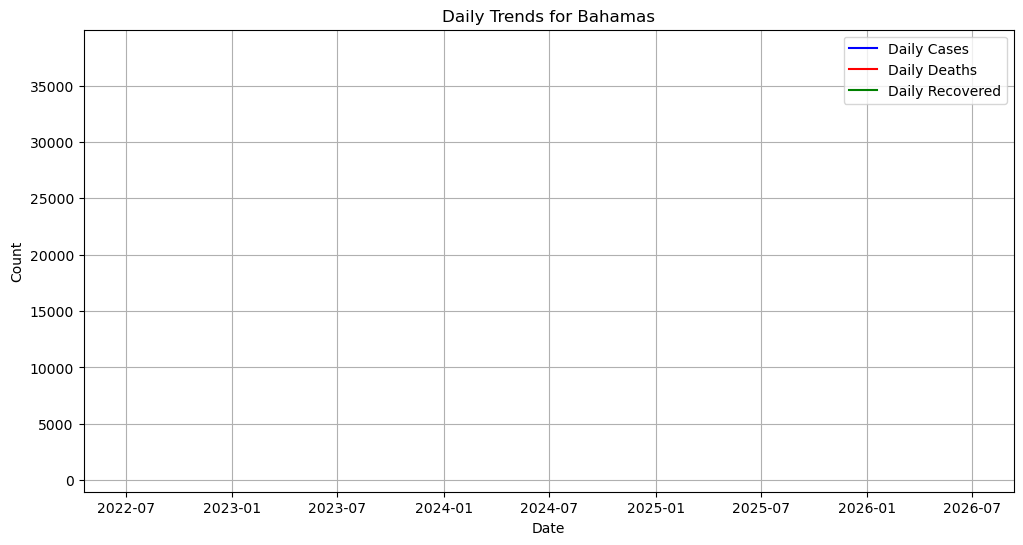

Data for Bahrain:
           day   Cases  Deaths  Recovered
132 2024-06-30  729549  1574.0   727915.0
Data types for Bahrain:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


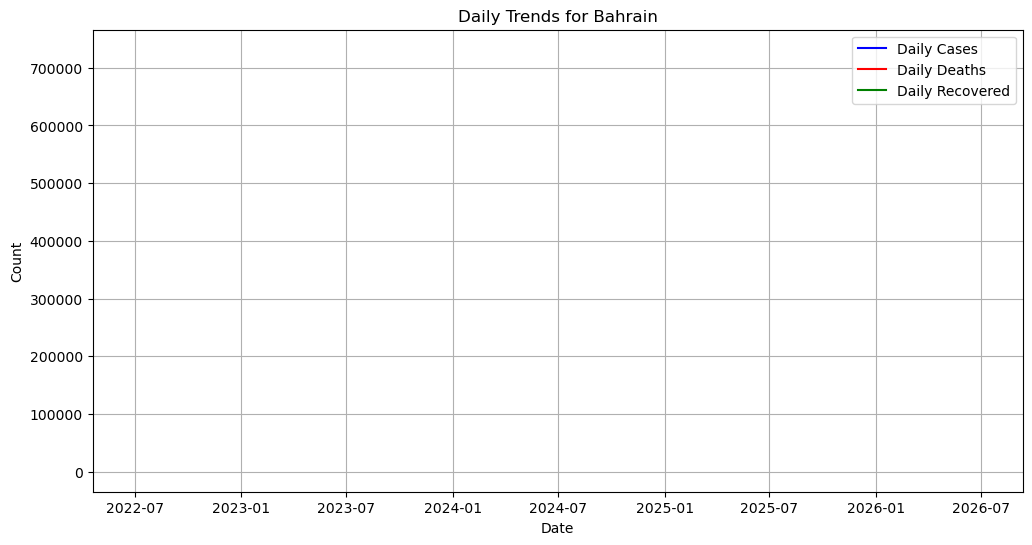

Data for Bangladesh:
           day    Cases   Deaths  Recovered
193 2024-06-30  2049377  29493.0        0.0
Data types for Bangladesh:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


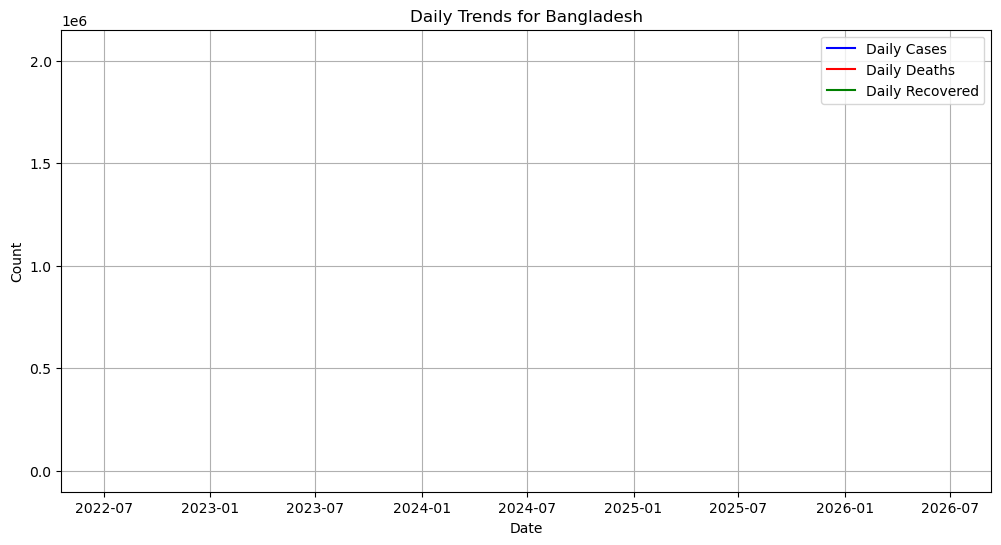

Data for Barbados:
           day   Cases  Deaths  Recovered
106 2024-06-30  110578   648.0   108647.0
Data types for Barbados:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


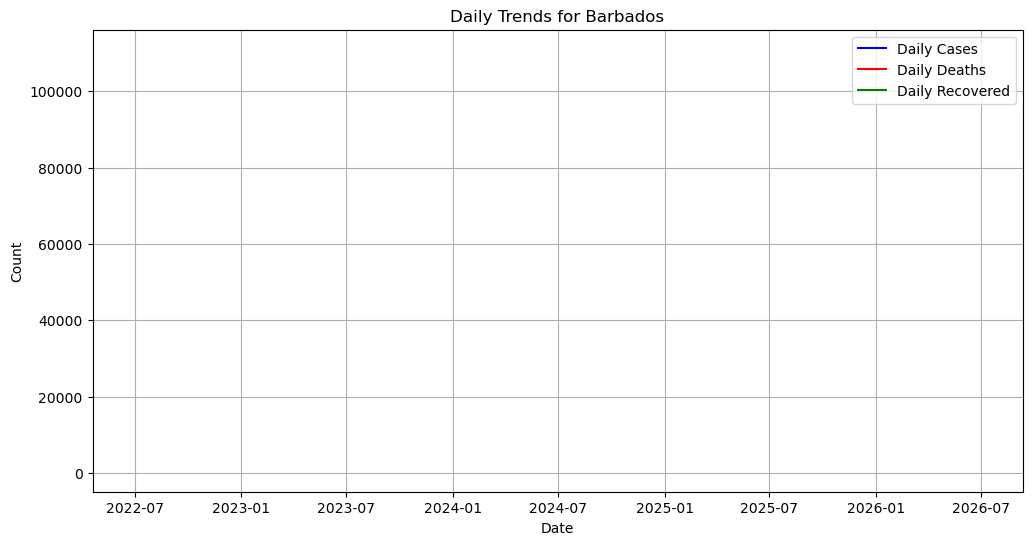

Data for Belarus:
           day   Cases  Deaths  Recovered
117 2024-06-30  994037  7118.0   985592.0
Data types for Belarus:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


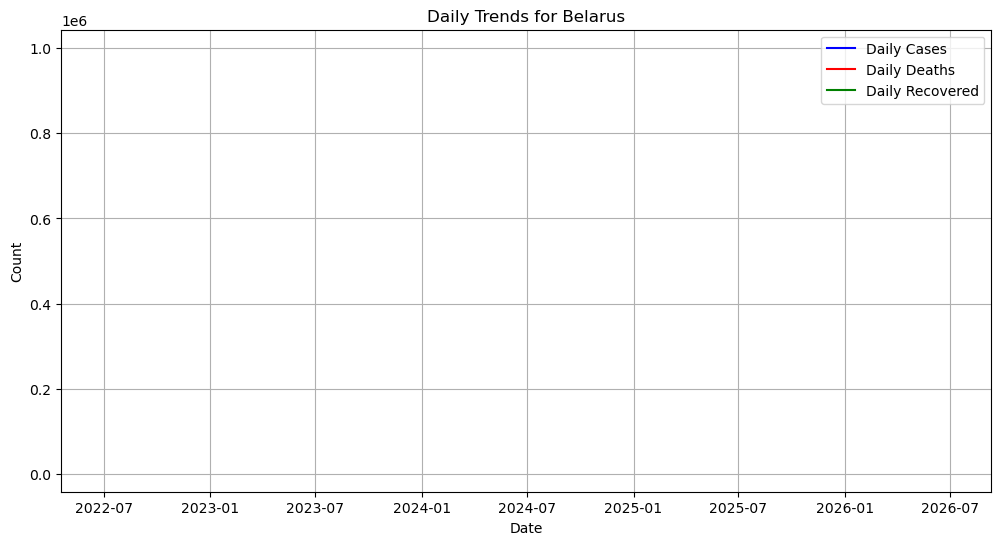

Data for Belgium:
           day    Cases   Deaths  Recovered
177 2024-06-30  4861695  34376.0  4826798.0
Data types for Belgium:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


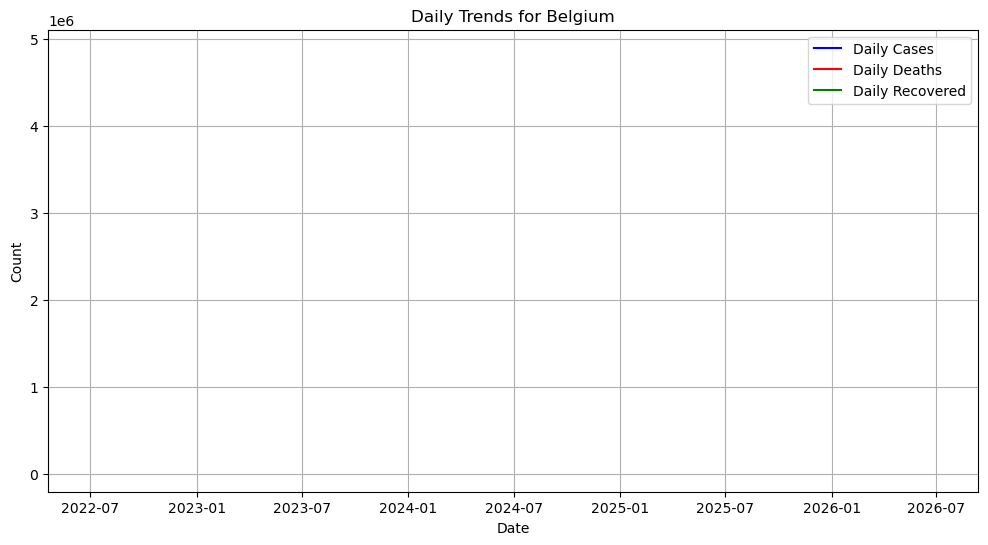

Data for Belize:
           day  Cases  Deaths  Recovered
116 2024-06-30  71409   688.0        0.0
Data types for Belize:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


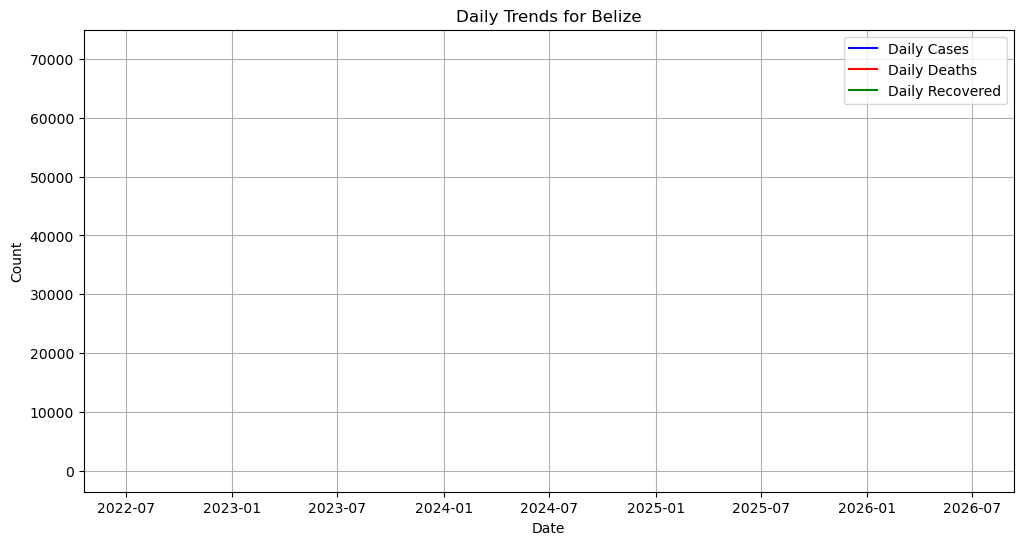

Data for Benin:
          day  Cases  Deaths  Recovered
84 2024-06-30  28036   163.0    27847.0
Data types for Benin:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


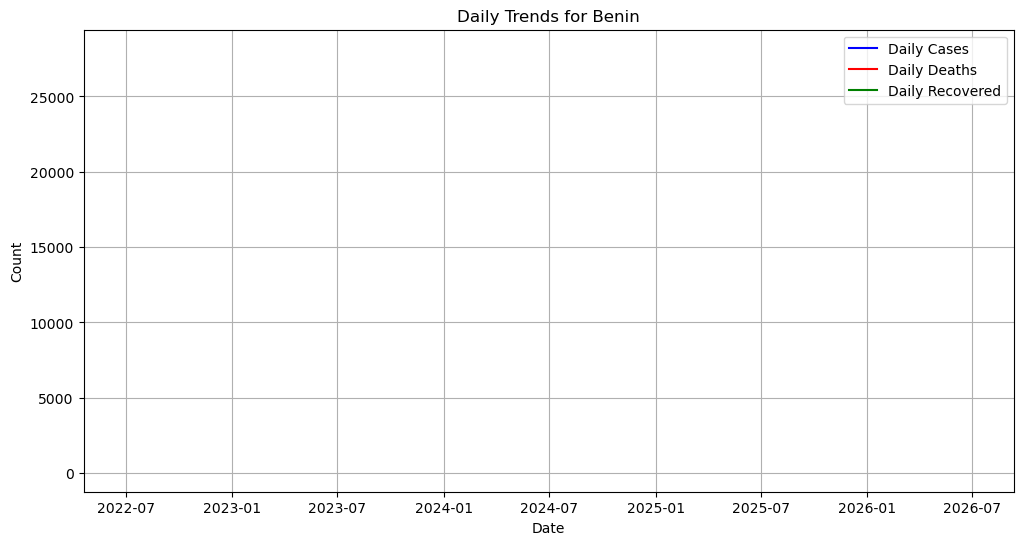

Data for Bermuda:
          day  Cases  Deaths  Recovered
22 2024-06-30  18860   165.0    18685.0
Data types for Bermuda:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


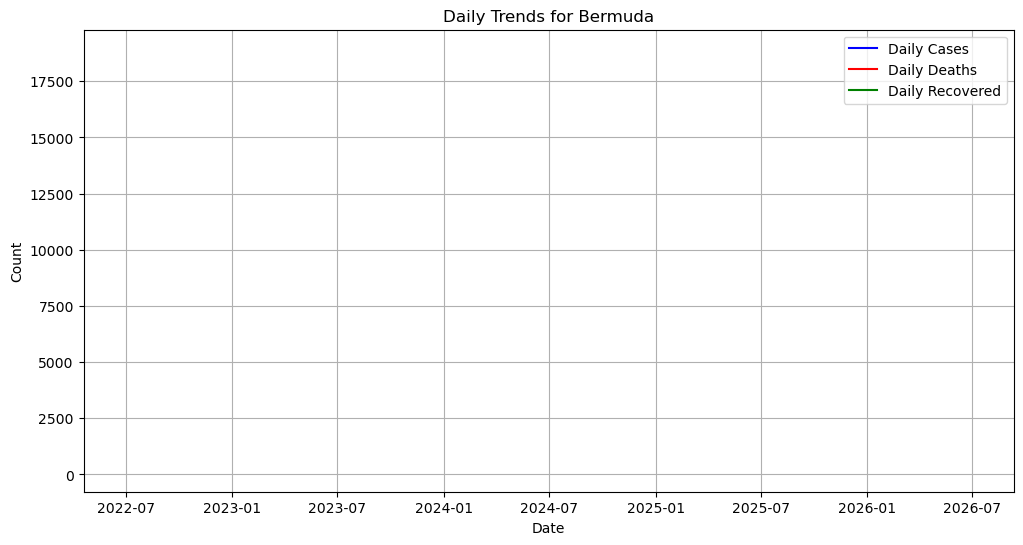

Data for Bhutan:
          day  Cases  Deaths  Recovered
68 2024-06-30  62697    21.0    61564.0
Data types for Bhutan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


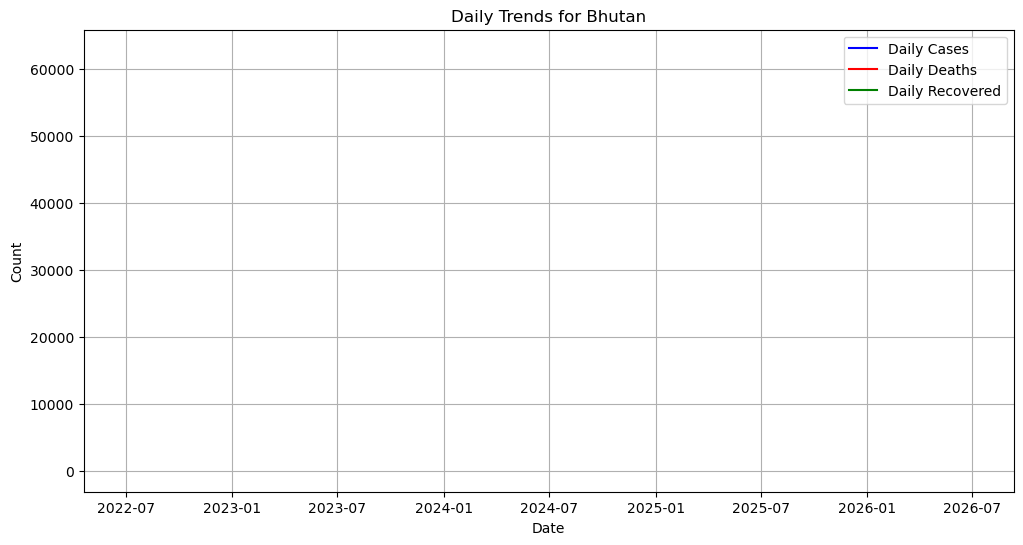

Data for Bolivia:
           day    Cases   Deaths  Recovered
208 2024-06-30  1212131  22407.0  1177145.0
Data types for Bolivia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


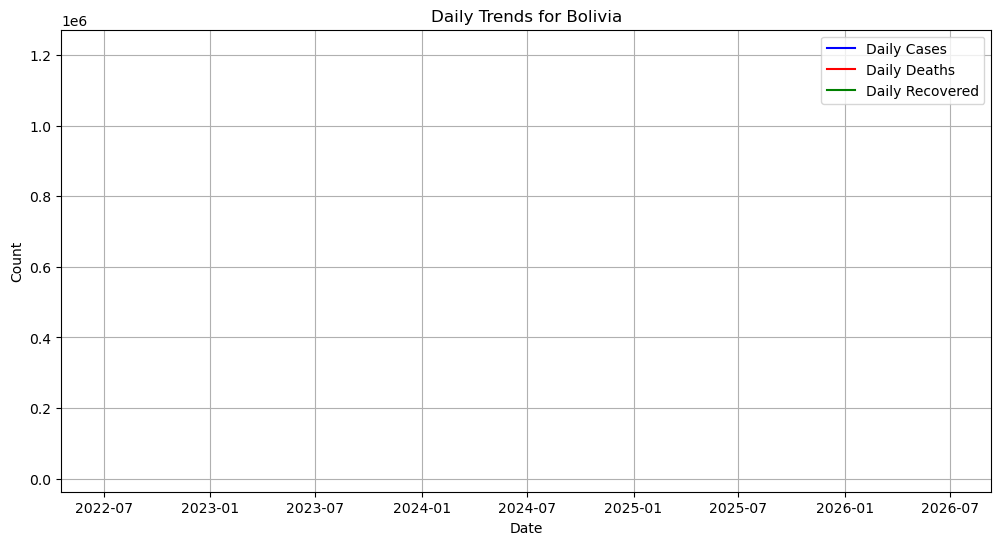

Data for Bosnia-and-Herzegovina:
           day   Cases   Deaths  Recovered
146 2024-06-30  403615  16388.0   379084.0
Data types for Bosnia-and-Herzegovina:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


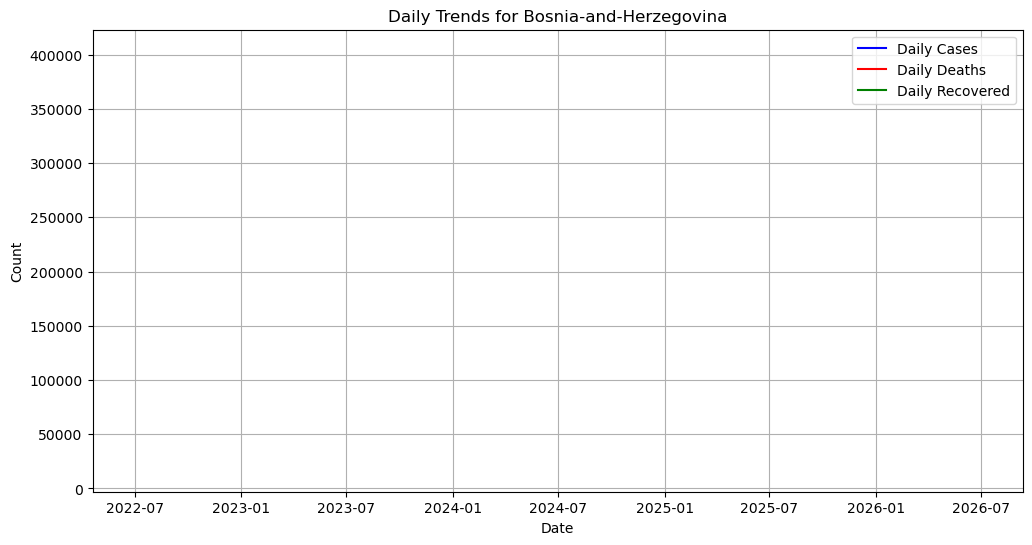

Data for Botswana:
           day   Cases  Deaths  Recovered
154 2024-06-30  330638  2801.0   327049.0
Data types for Botswana:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


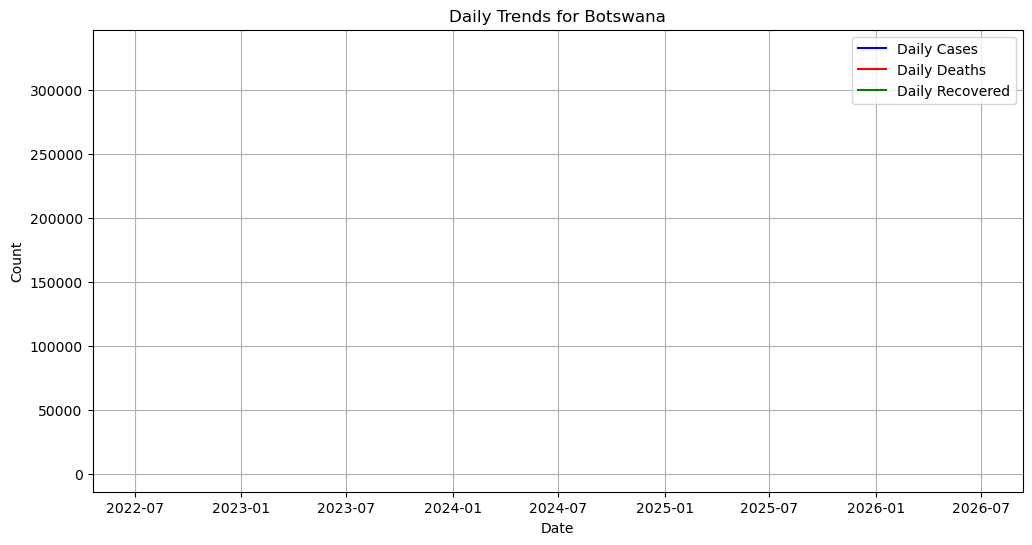

Data for Brazil:
           day     Cases    Deaths   Recovered
223 2024-06-30  38743918  711380.0  36249161.0
Data types for Brazil:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


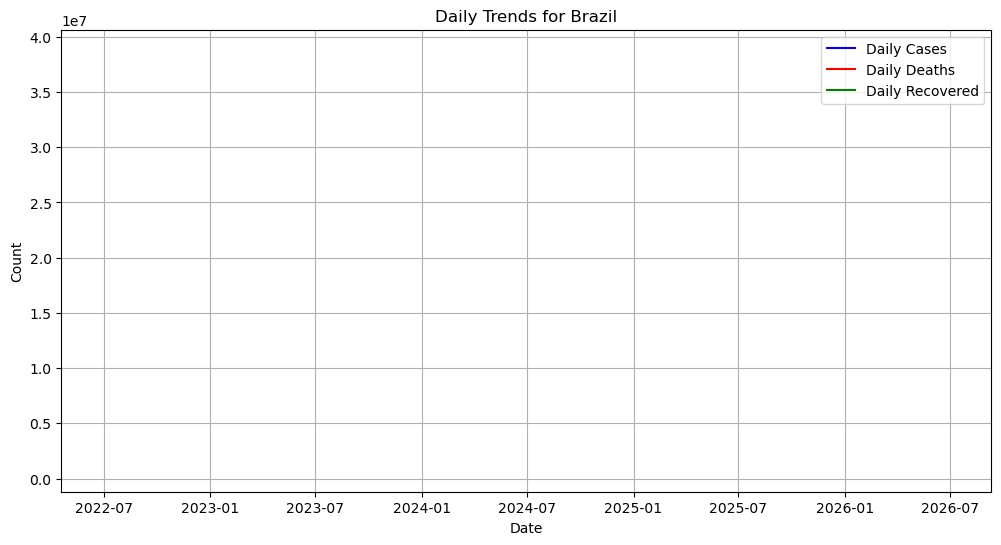

Data for British-Virgin-Islands:
          day  Cases  Deaths  Recovered
50 2024-06-30   7392    64.0        0.0
Data types for British-Virgin-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


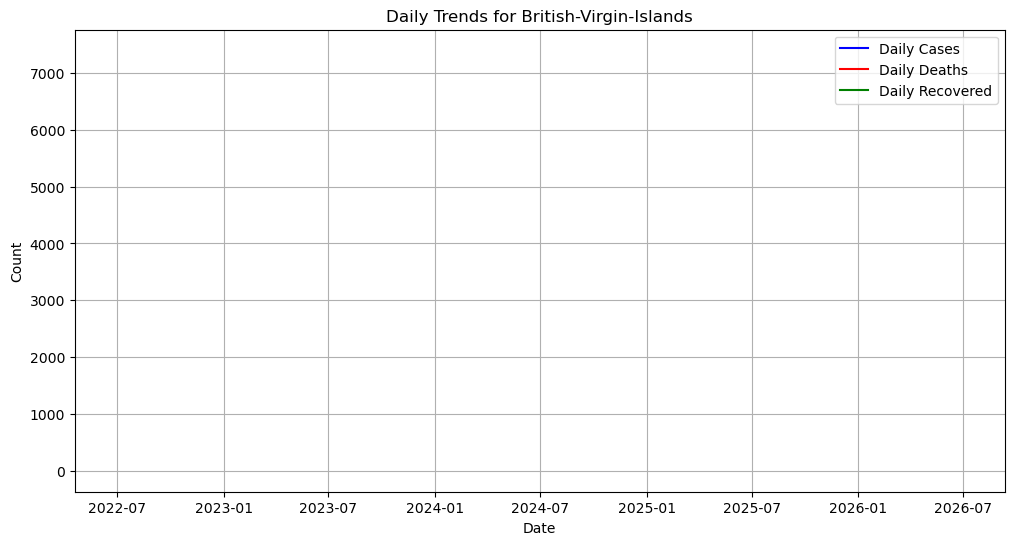

Data for Brunei:
           day   Cases  Deaths  Recovered
152 2024-06-30  343719   225.0   243601.0
Data types for Brunei:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


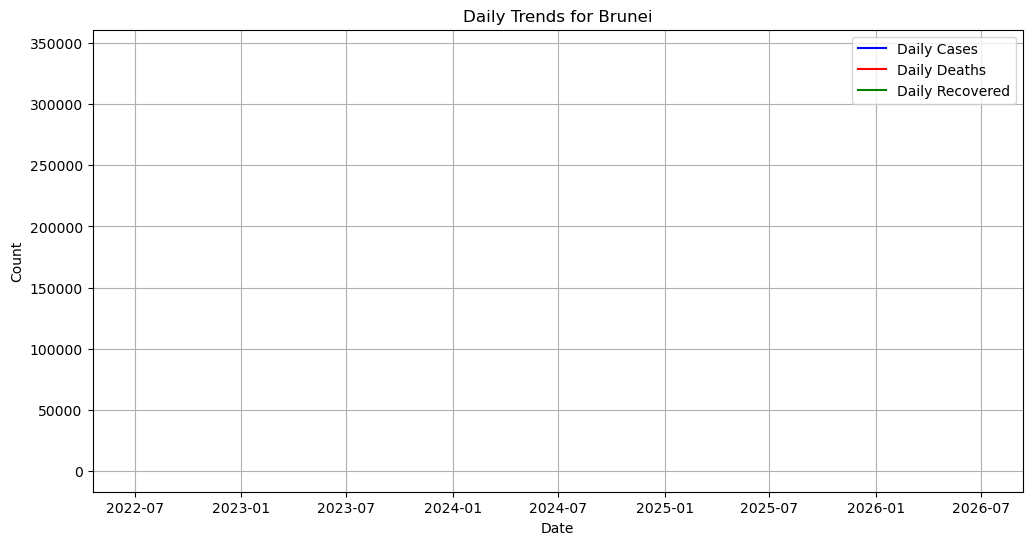

Data for Bulgaria:
           day    Cases   Deaths  Recovered
202 2024-06-30  1339851  38748.0  1292944.0
Data types for Bulgaria:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


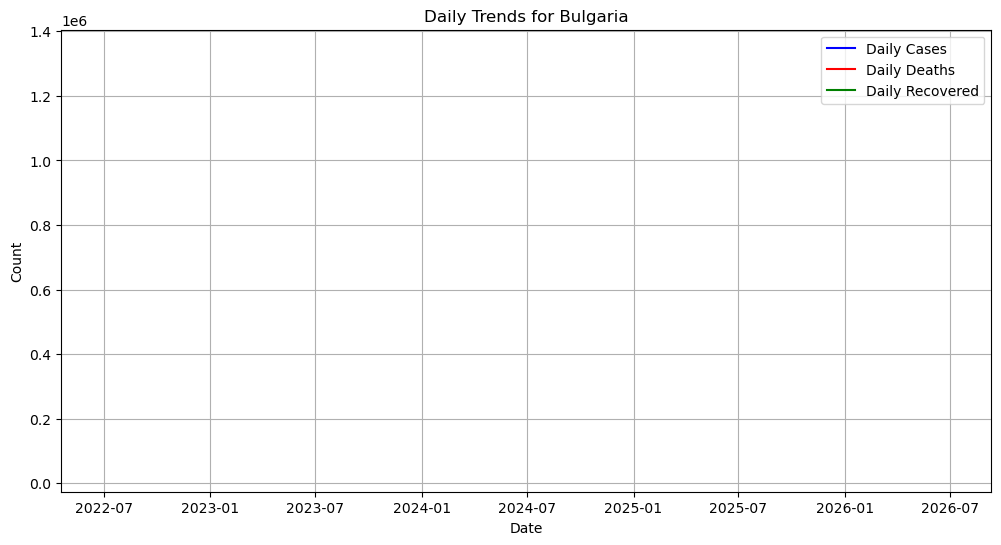

Data for Burkina-Faso:
          day  Cases  Deaths  Recovered
35 2024-06-30  22114   400.0    21596.0
Data types for Burkina-Faso:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


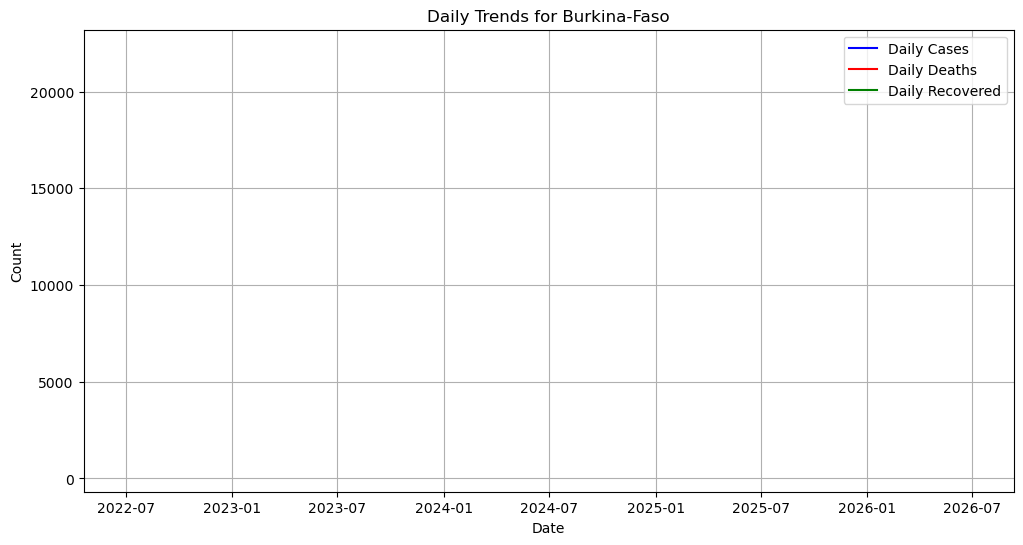

Data for Burundi:
          day  Cases  Deaths  Recovered
70 2024-06-30  54721    38.0    53569.0
Data types for Burundi:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


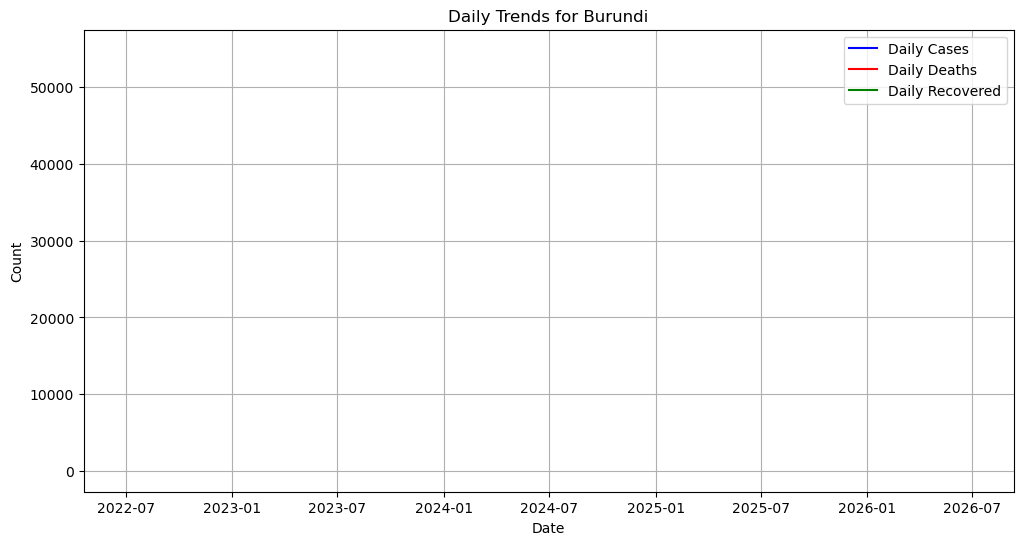

Data for CAR:
          day  Cases  Deaths  Recovered
44 2024-06-30  15440   113.0    15200.0
Data types for CAR:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


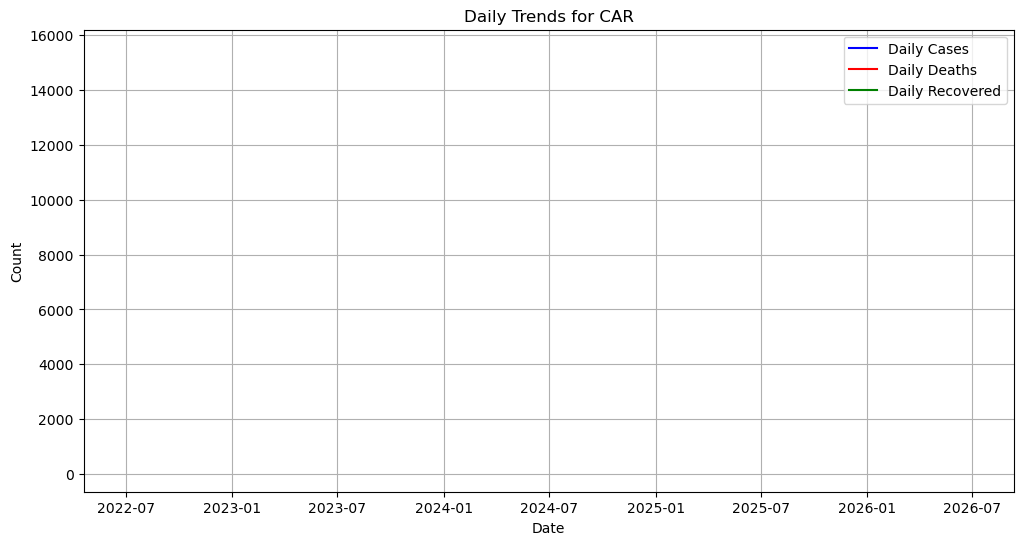

Data for Cabo-Verde:
          day  Cases  Deaths  Recovered
65 2024-06-30  64477   417.0    63755.0
Data types for Cabo-Verde:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


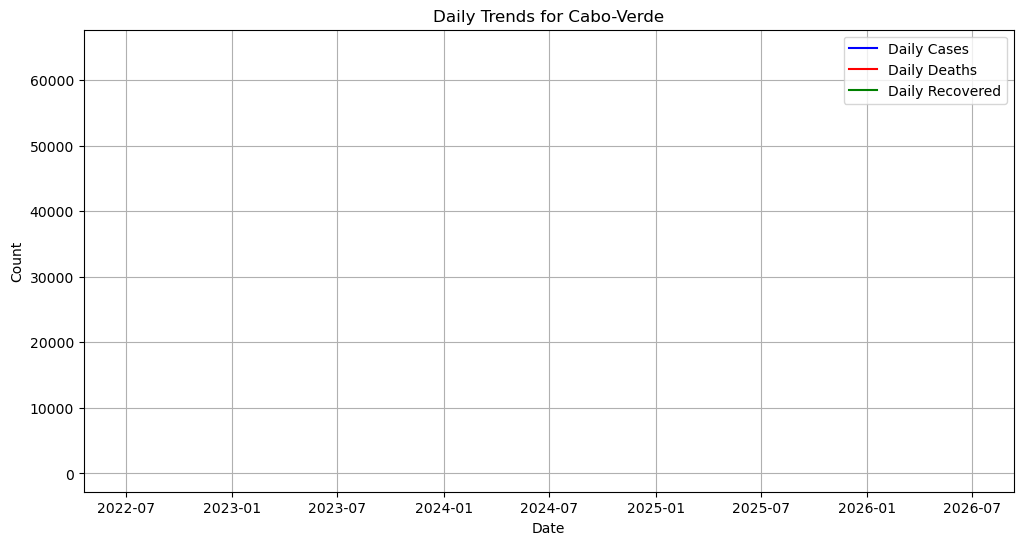

Data for Cambodia:
           day   Cases  Deaths  Recovered
102 2024-06-30  139103  3056.0   136044.0
Data types for Cambodia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


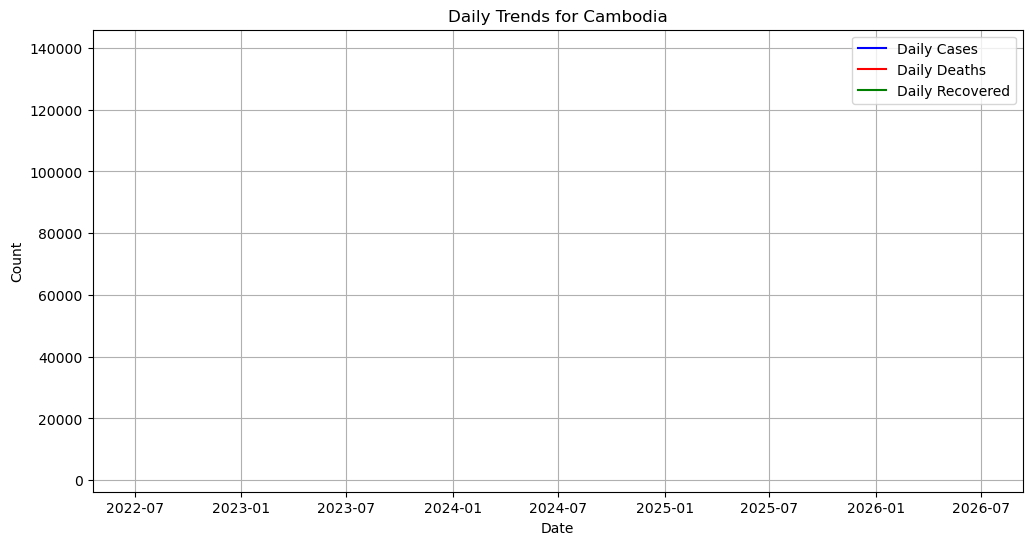

Data for Cameroon:
           day   Cases  Deaths  Recovered
104 2024-06-30  125379  1974.0   123280.0
Data types for Cameroon:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


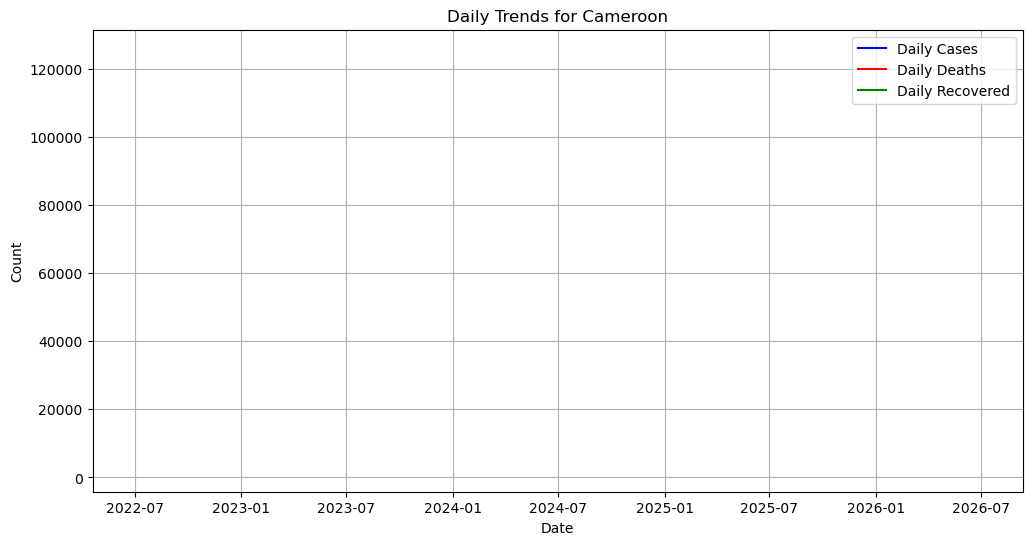

Data for Canada:
           day    Cases   Deaths  Recovered
176 2024-06-30  4946090  59034.0  4881312.0
Data types for Canada:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


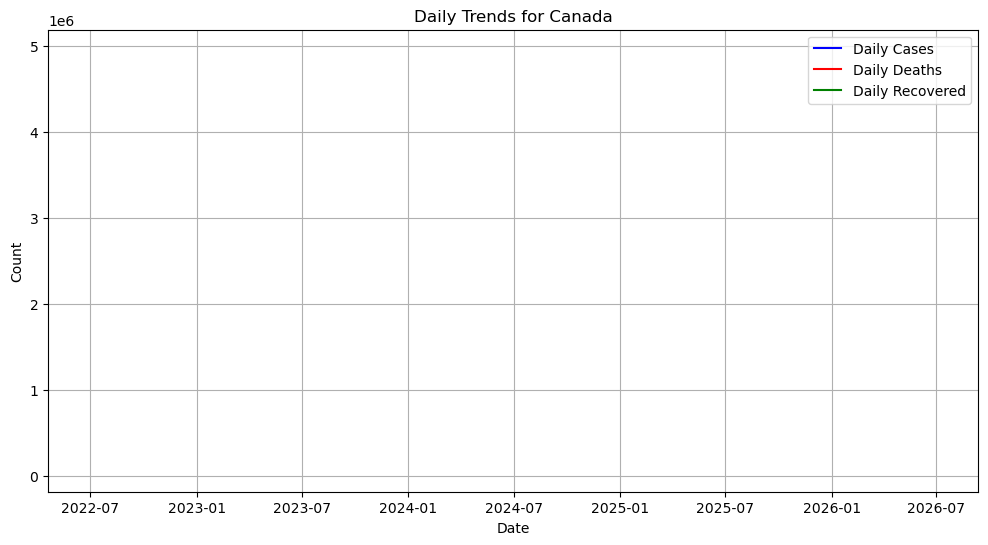

Data for Caribbean-Netherlands:
          day  Cases  Deaths  Recovered
21 2024-06-30  11682    38.0    10476.0
Data types for Caribbean-Netherlands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


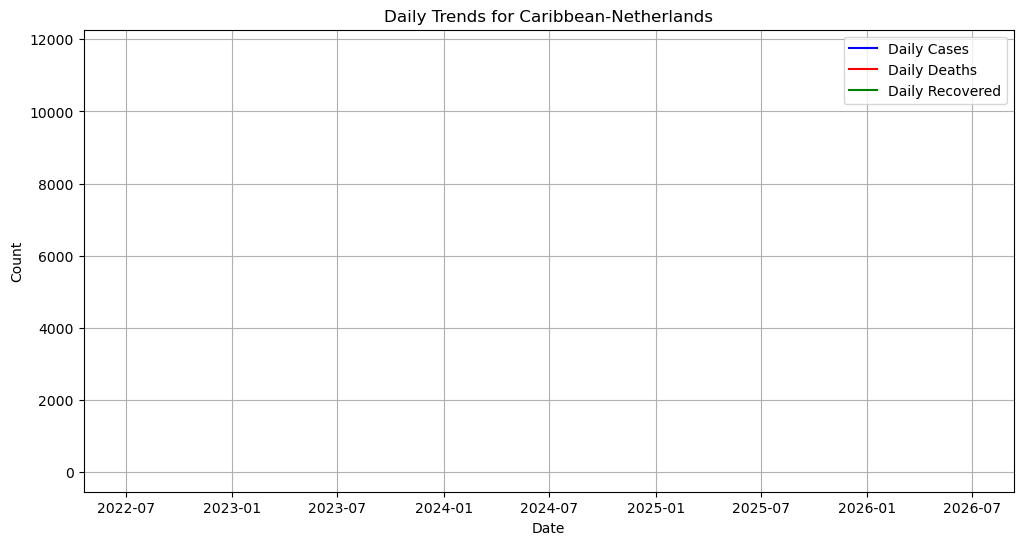

Data for Cayman-Islands:
          day  Cases  Deaths  Recovered
58 2024-06-30  31472    37.0     8553.0
Data types for Cayman-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


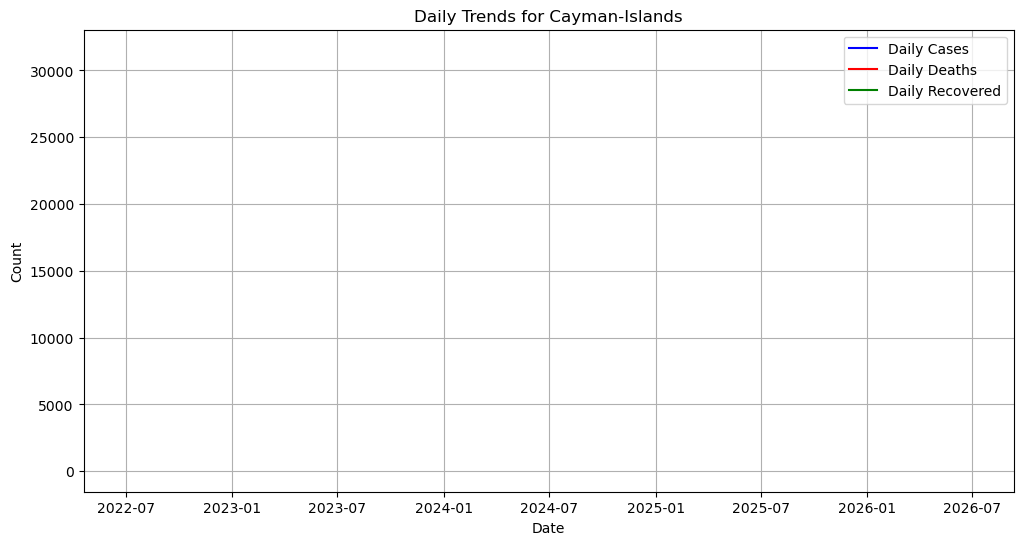

Data for Chad:
          day  Cases  Deaths  Recovered
27 2024-06-30   7701   194.0     4874.0
Data types for Chad:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


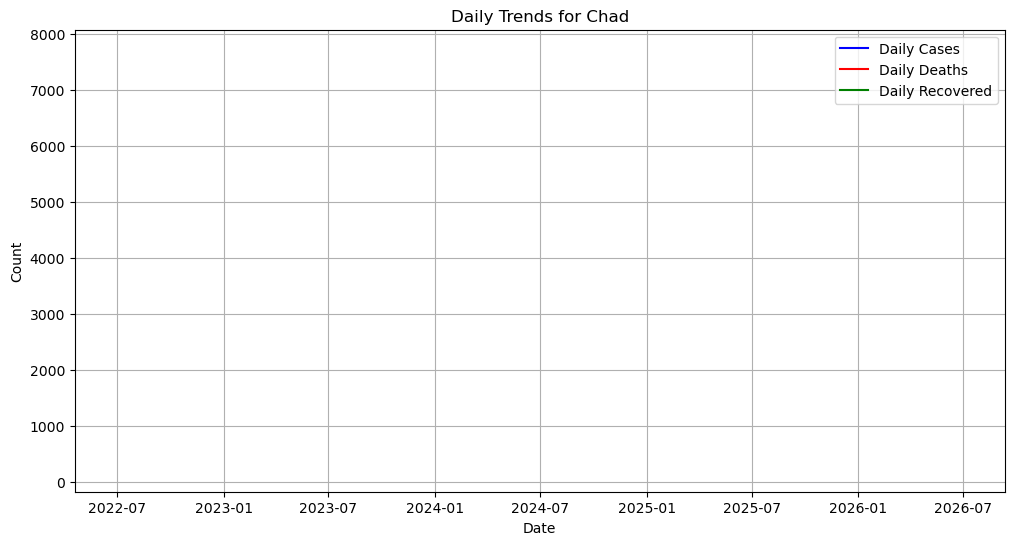

Data for Channel-Islands:
          day   Cases  Deaths  Recovered
90 2024-06-30  101717   228.0   101321.0
Data types for Channel-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


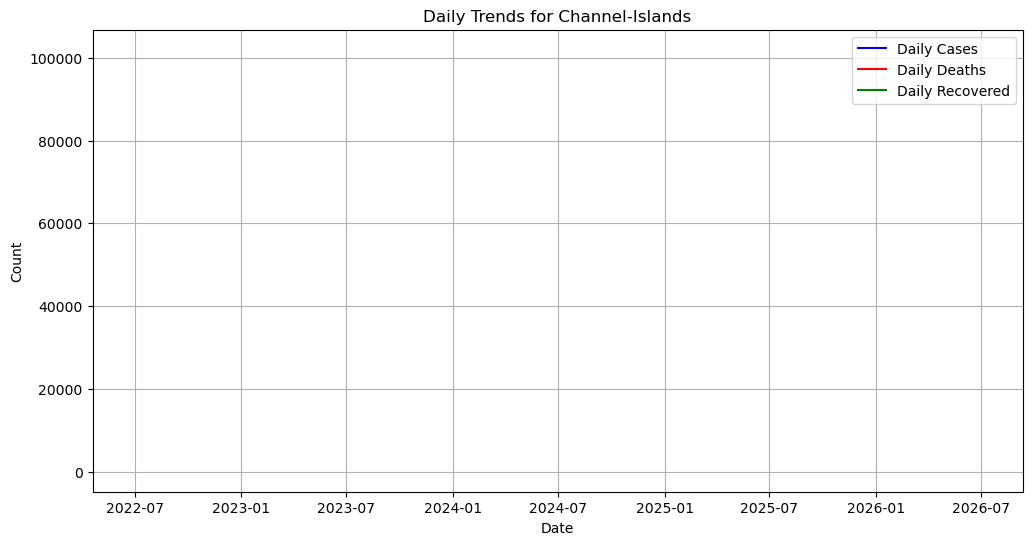

Data for Chile:
           day    Cases   Deaths  Recovered
174 2024-06-30  5384853  64497.0  5252450.0
Data types for Chile:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


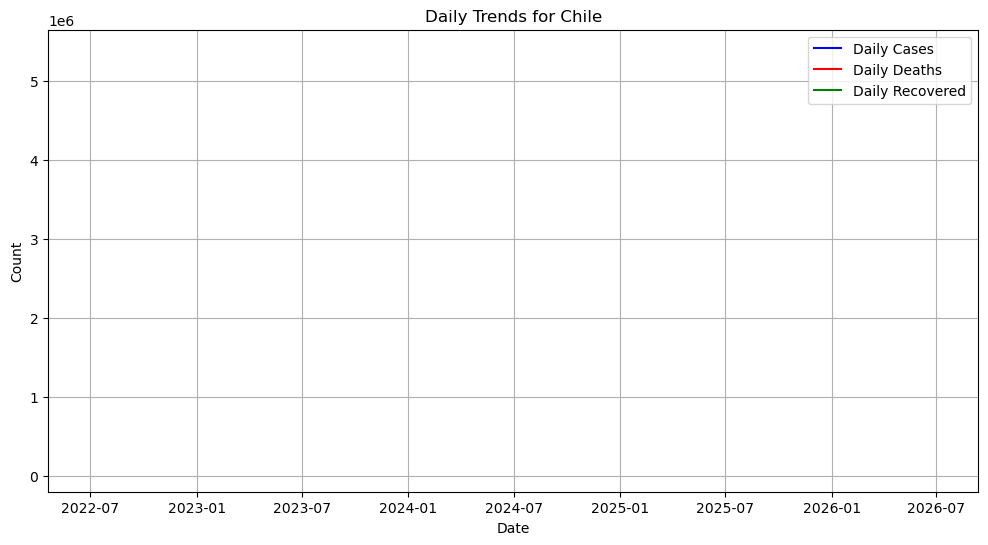

Data for China:
         day   Cases  Deaths  Recovered
7 2024-06-30  503302  5272.0   379053.0
Data types for China:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


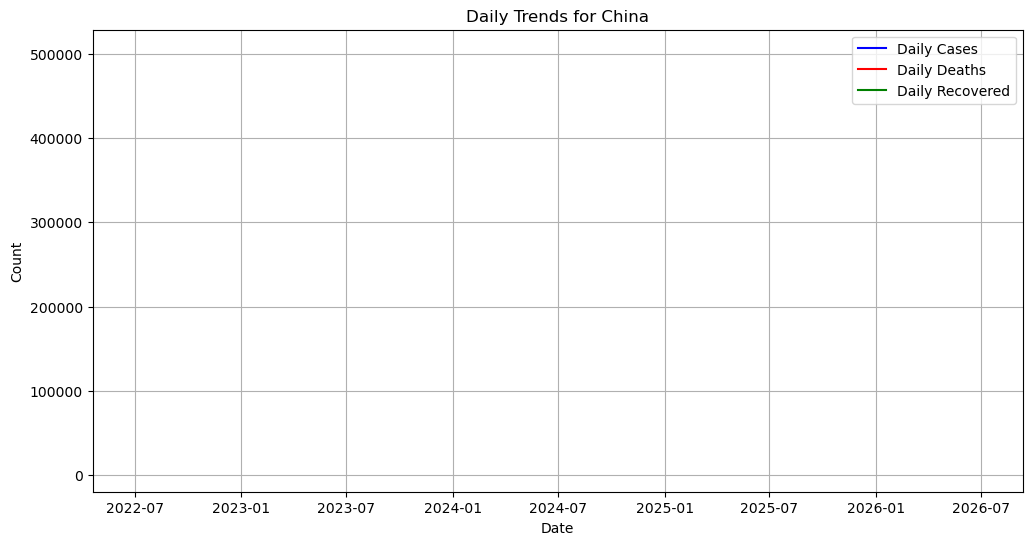

Data for Colombia:
           day    Cases    Deaths  Recovered
170 2024-06-30  6400173  143200.0  6212152.0
Data types for Colombia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


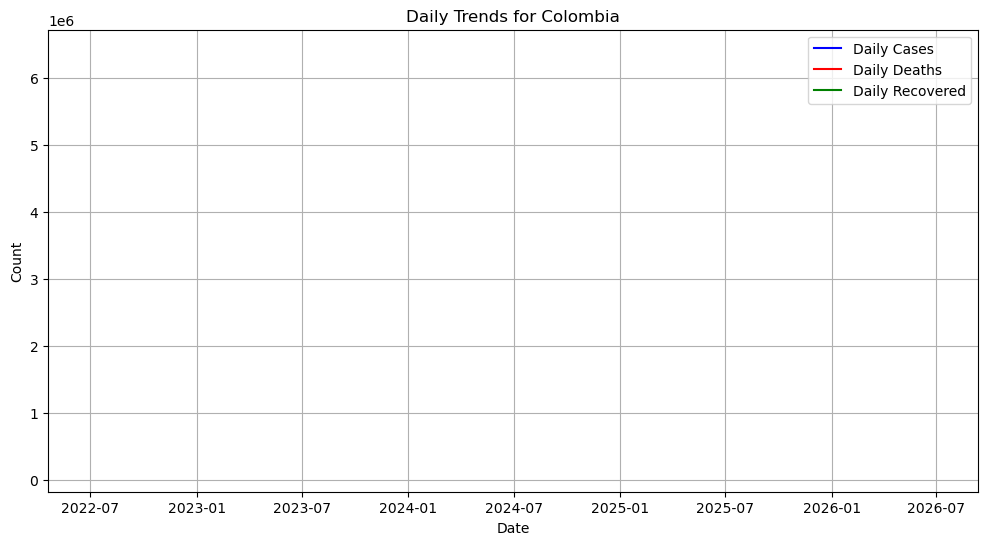

Data for Comoros:
          day  Cases  Deaths  Recovered
25 2024-06-30   9109   161.0     8939.0
Data types for Comoros:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


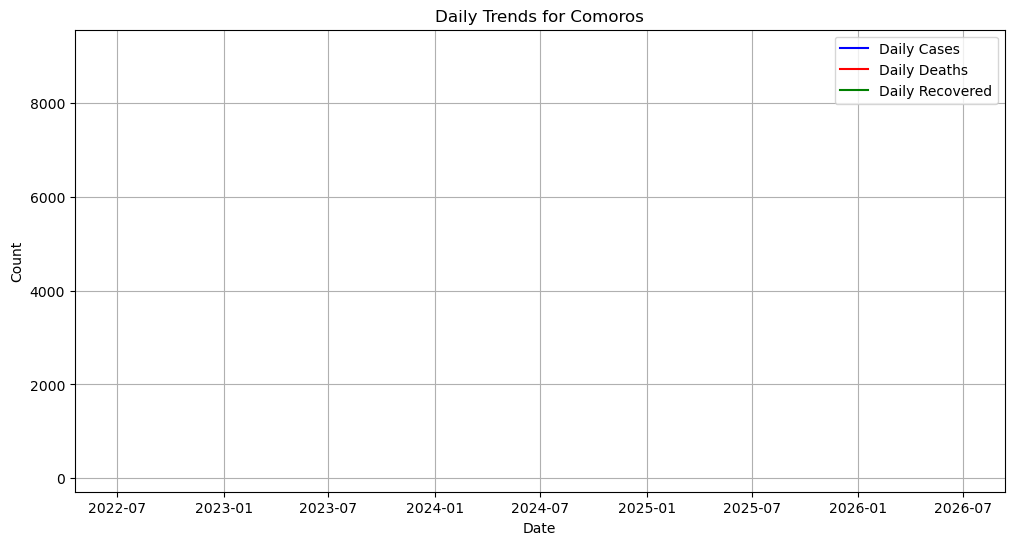

Data for Congo:
          day  Cases  Deaths  Recovered
59 2024-06-30  25375   386.0    24006.0
Data types for Congo:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


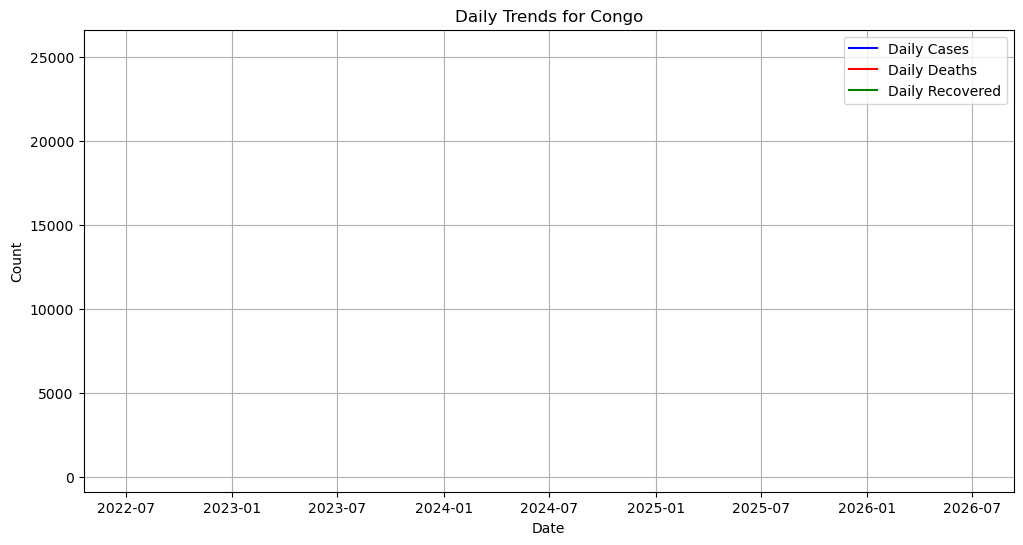

Data for Cook-Islands:
          day  Cases  Deaths  Recovered
51 2024-06-30   7203     2.0     7150.0
Data types for Cook-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


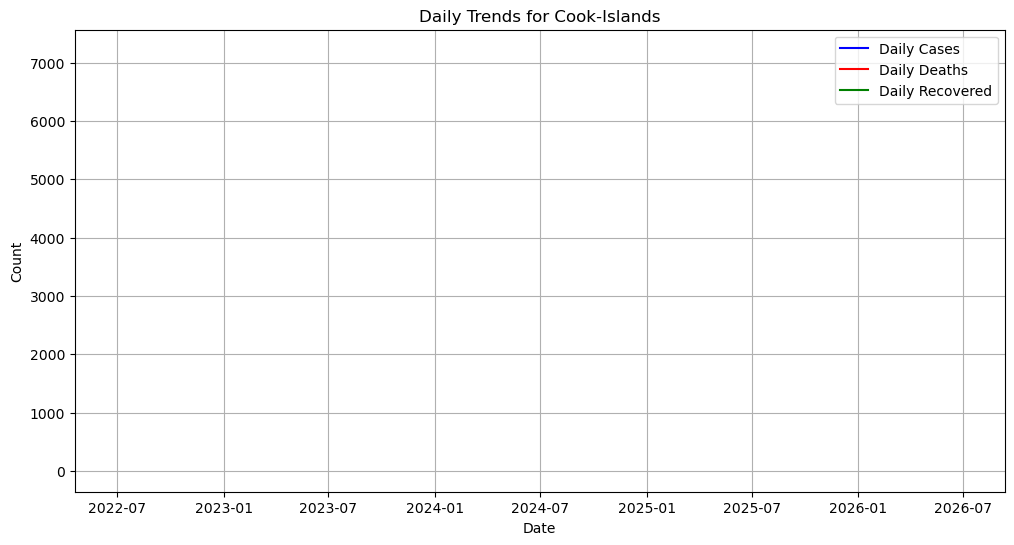

Data for Costa-Rica:
           day    Cases  Deaths  Recovered
207 2024-06-30  1238883  9428.0        0.0
Data types for Costa-Rica:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


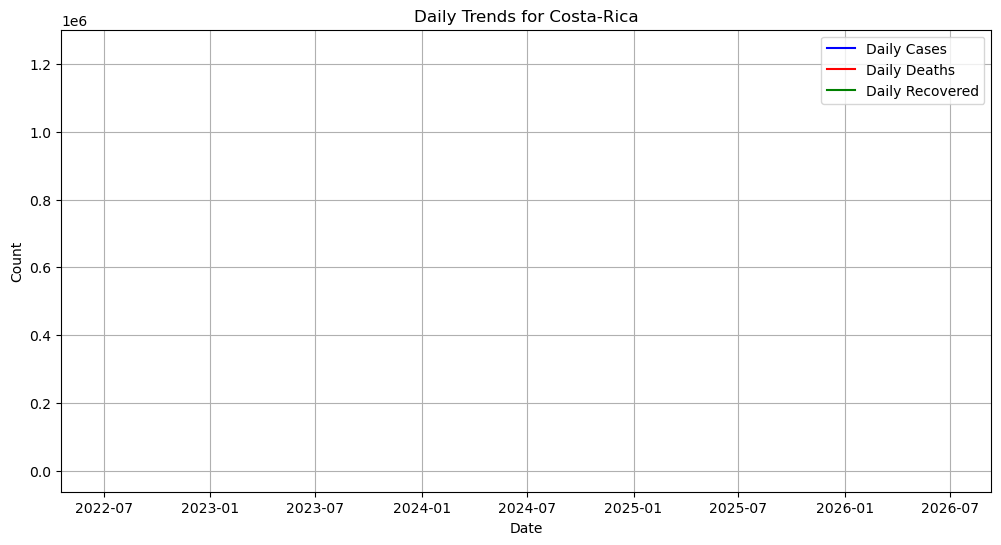

Data for Croatia:
           day    Cases   Deaths  Recovered
203 2024-06-30  1309728  18687.0  1258432.0
Data types for Croatia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


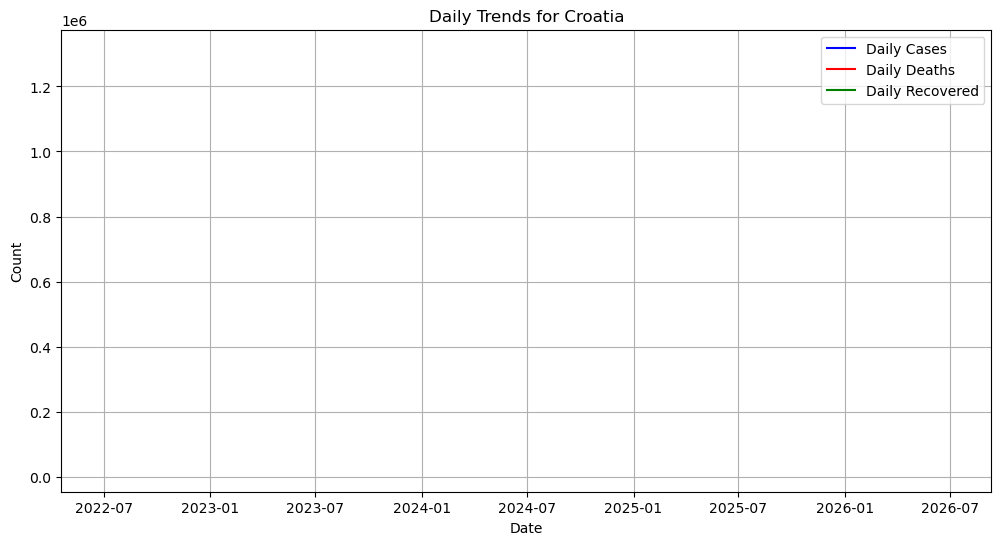

Data for Cuba:
           day    Cases  Deaths  Recovered
210 2024-06-30  1115251  8530.0  1106660.0
Data types for Cuba:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


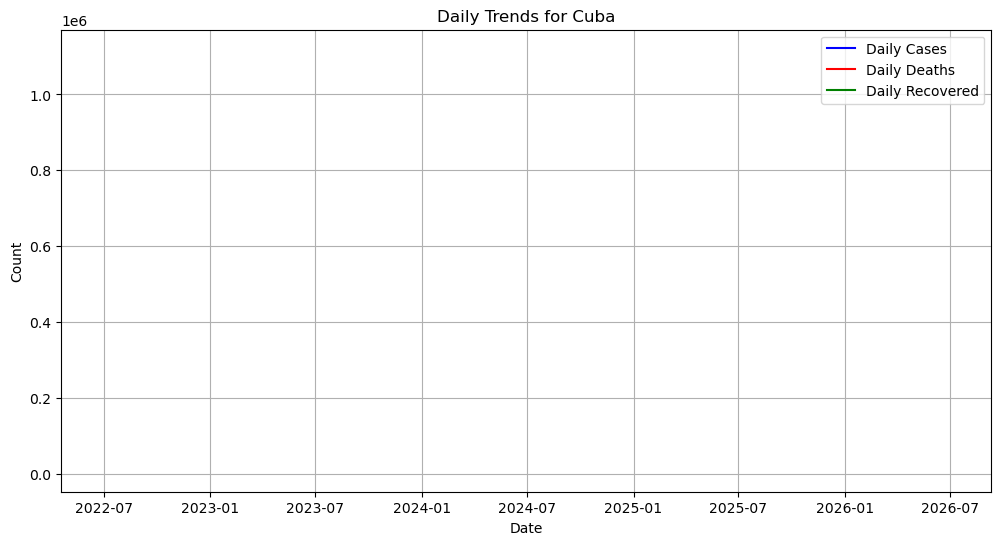

Data for Cura&ccedil;ao:
          day  Cases  Deaths  Recovered
56 2024-06-30  45986   295.0    44720.0
Data types for Cura&ccedil;ao:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


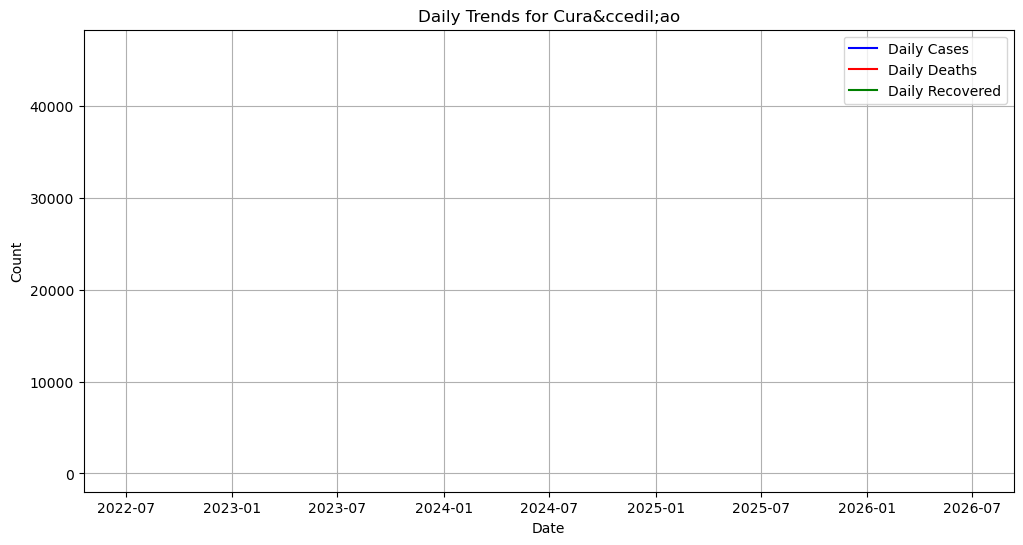

Data for Cyprus:
           day   Cases  Deaths  Recovered
133 2024-06-30  681110  1365.0   679745.0
Data types for Cyprus:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


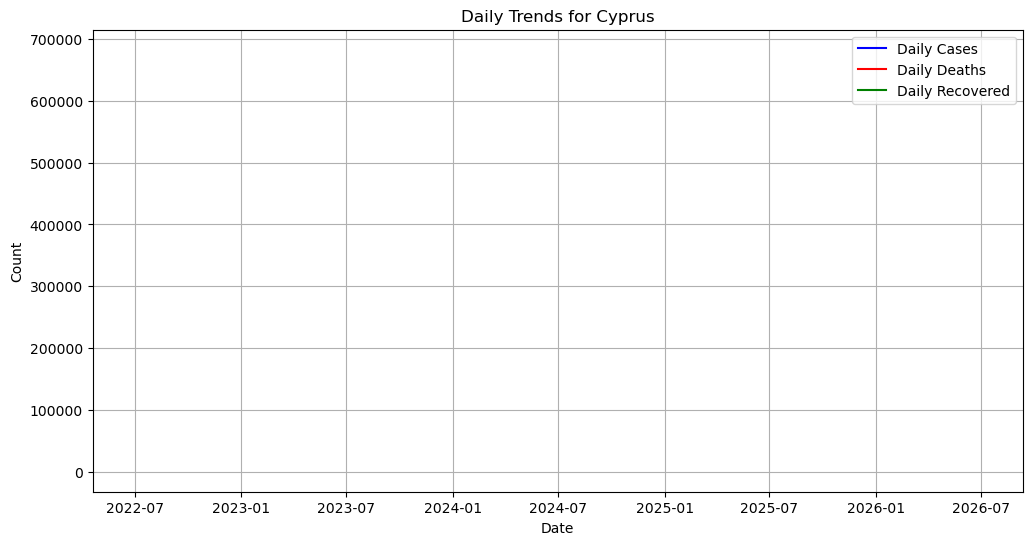

Data for Czechia:
           day    Cases   Deaths  Recovered
180 2024-06-30  4759041  43517.0  4715206.0
Data types for Czechia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


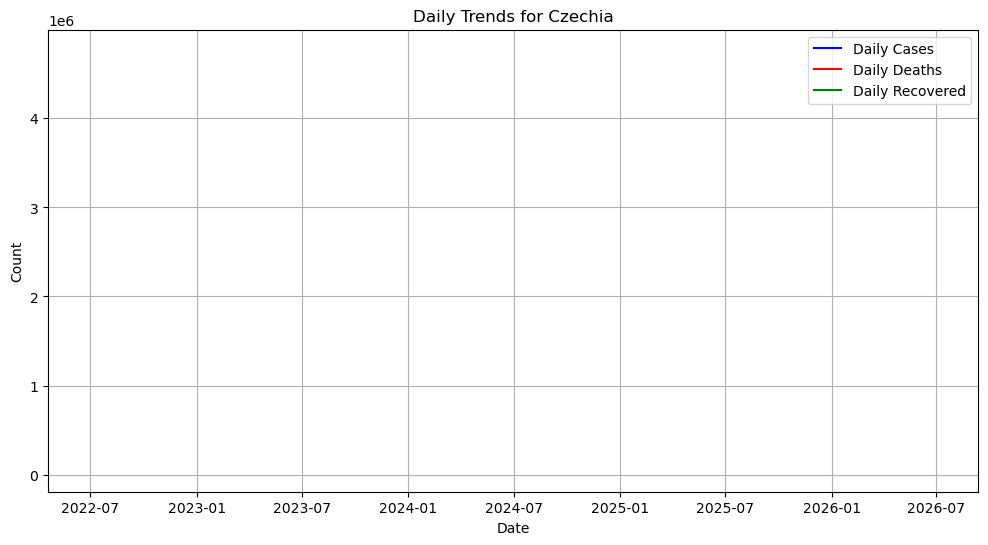

Data for DPRK:
           day    Cases  Deaths  Recovered
164 2024-06-30  4772813    74.0  4772739.0
Data types for DPRK:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


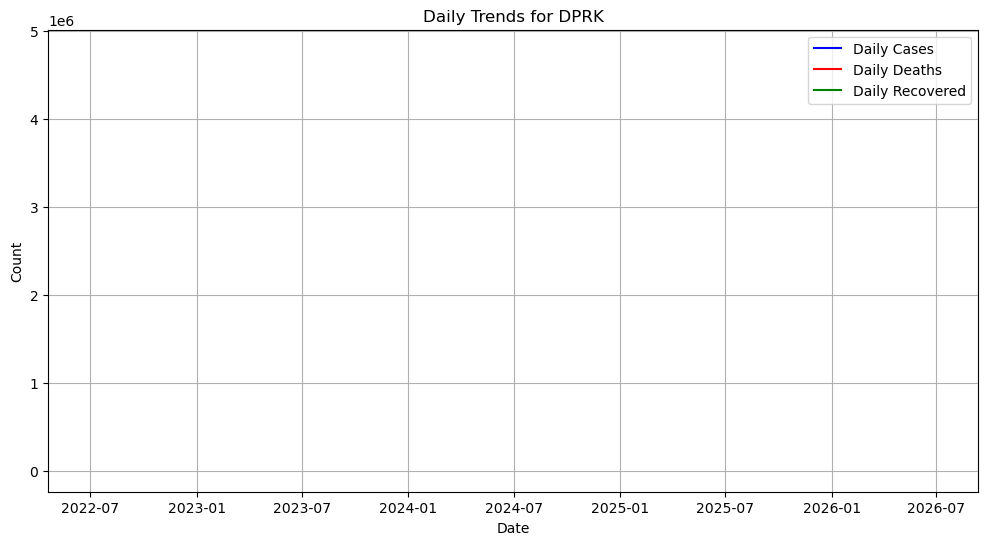

Data for DRC:
           day  Cases  Deaths  Recovered
108 2024-06-30  99338  1468.0    84489.0
Data types for DRC:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


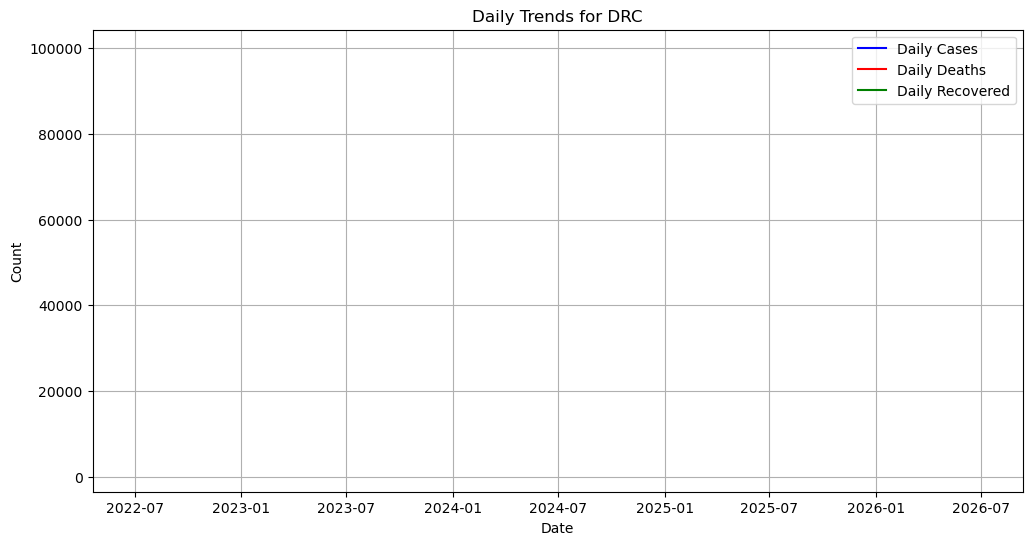

Data for Denmark:
           day    Cases  Deaths  Recovered
185 2024-06-30  3183756  8814.0  3174942.0
Data types for Denmark:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


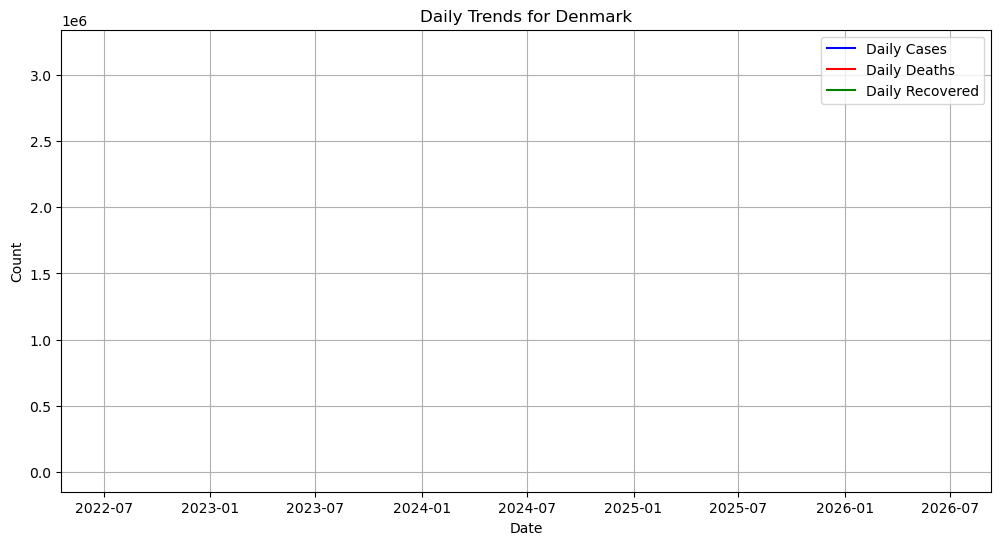

Data for Diamond-Princess:
         day  Cases  Deaths  Recovered
3 2024-06-30    712    13.0      699.0
Data types for Diamond-Princess:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


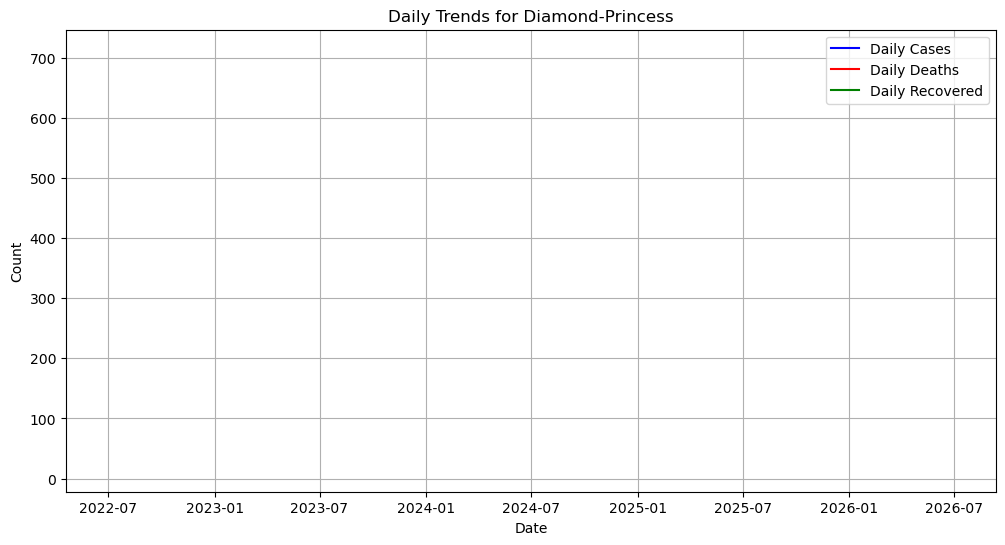

Data for Djibouti:
          day  Cases  Deaths  Recovered
14 2024-06-30  15690   189.0    15427.0
Data types for Djibouti:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


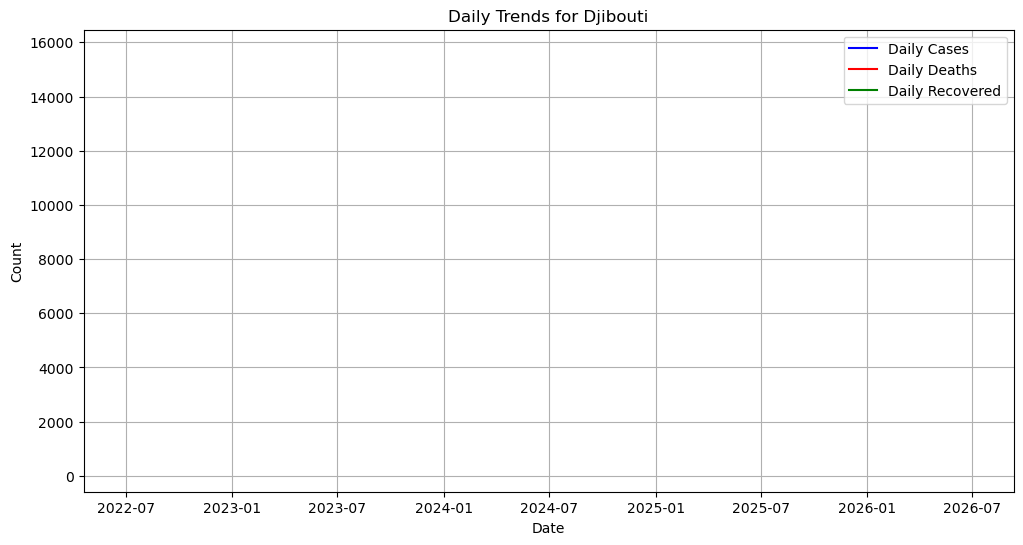

Data for Dominica:
          day  Cases  Deaths  Recovered
43 2024-06-30  16038    74.0    15964.0
Data types for Dominica:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


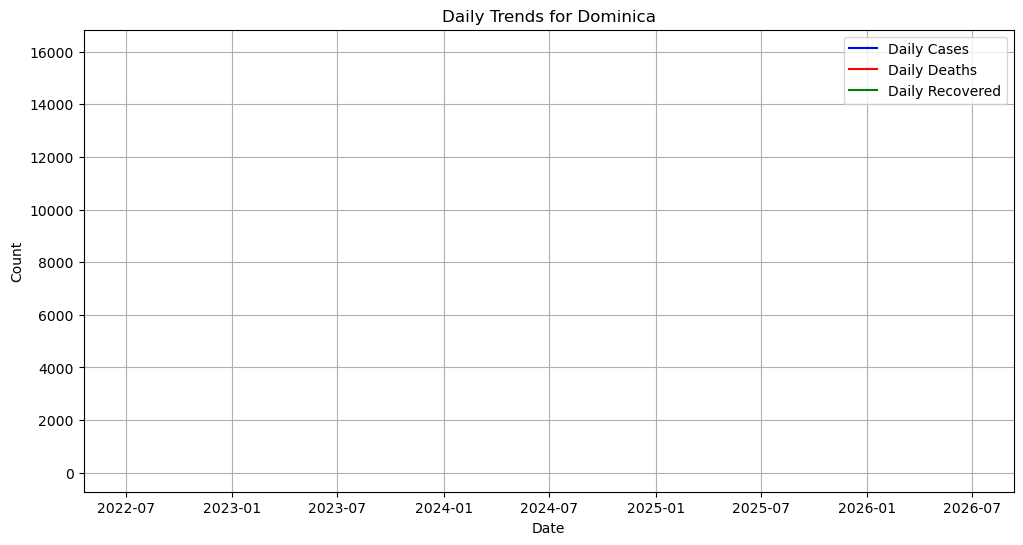

Data for Dominican-Republic:
           day   Cases  Deaths  Recovered
134 2024-06-30  675890  4384.0   671316.0
Data types for Dominican-Republic:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


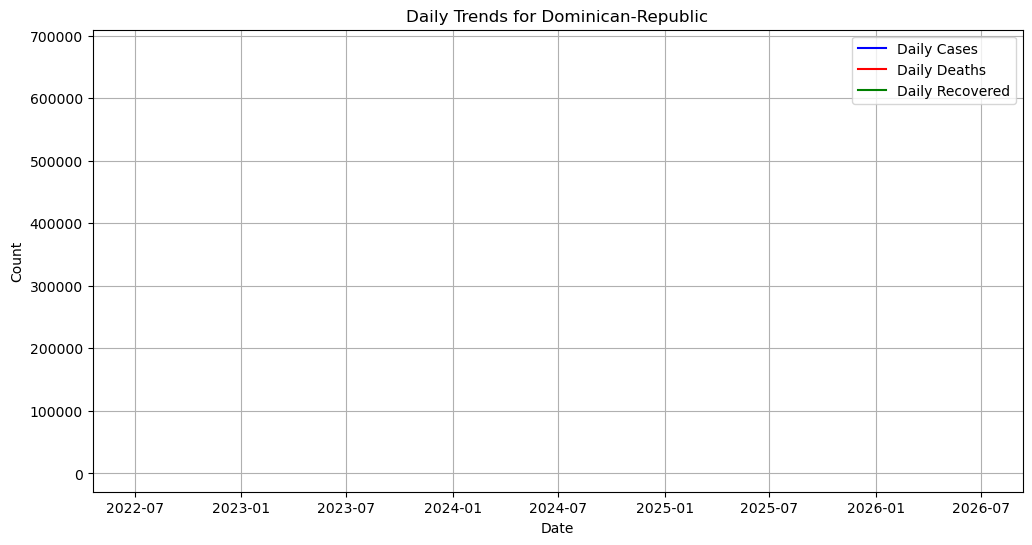

Data for Ecuador:
           day    Cases   Deaths  Recovered
122 2024-06-30  1070188  36043.0  1034145.0
Data types for Ecuador:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


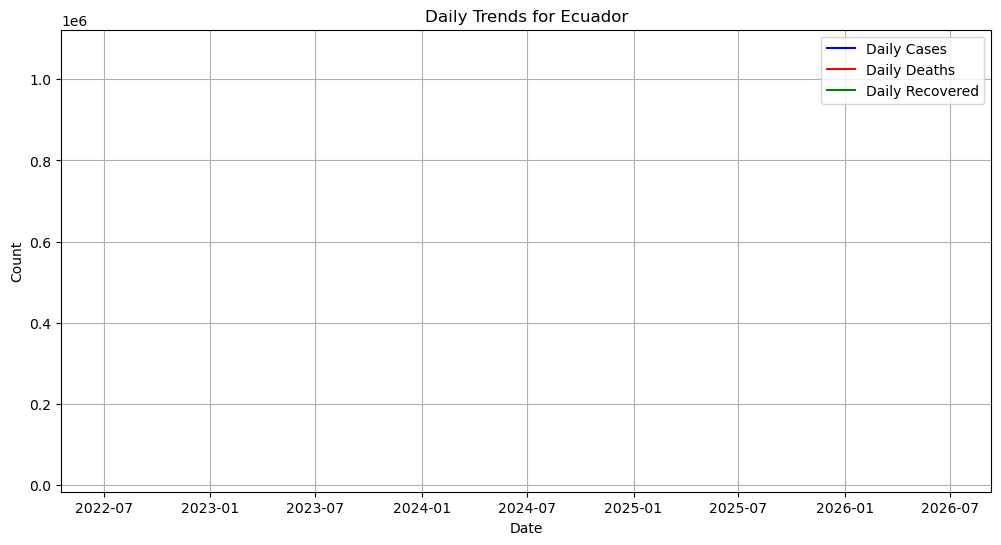

Data for Egypt:
           day   Cases   Deaths  Recovered
119 2024-06-30  516023  24613.0   442182.0
Data types for Egypt:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


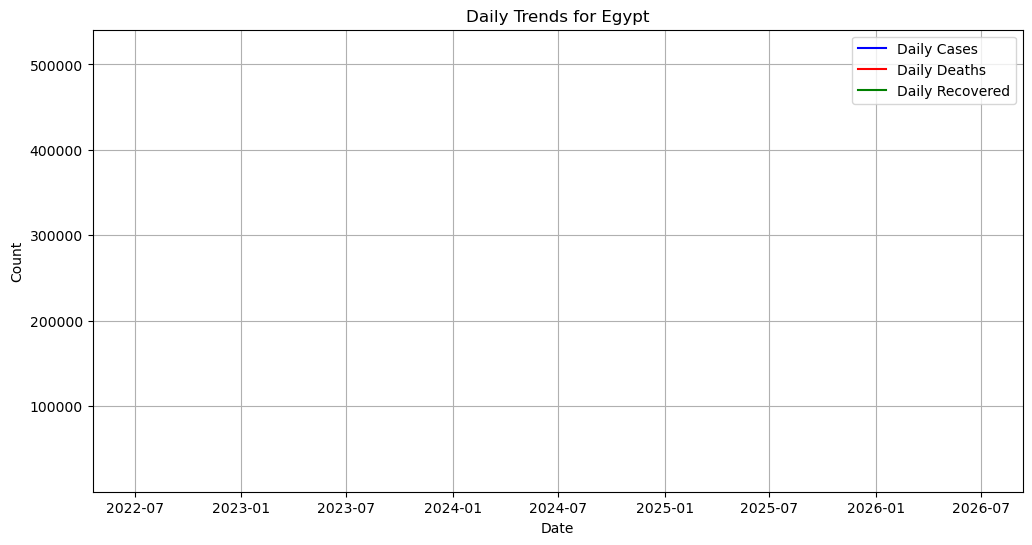

Data for El-Salvador:
          day   Cases  Deaths  Recovered
95 2024-06-30  201855  4230.0   179410.0
Data types for El-Salvador:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


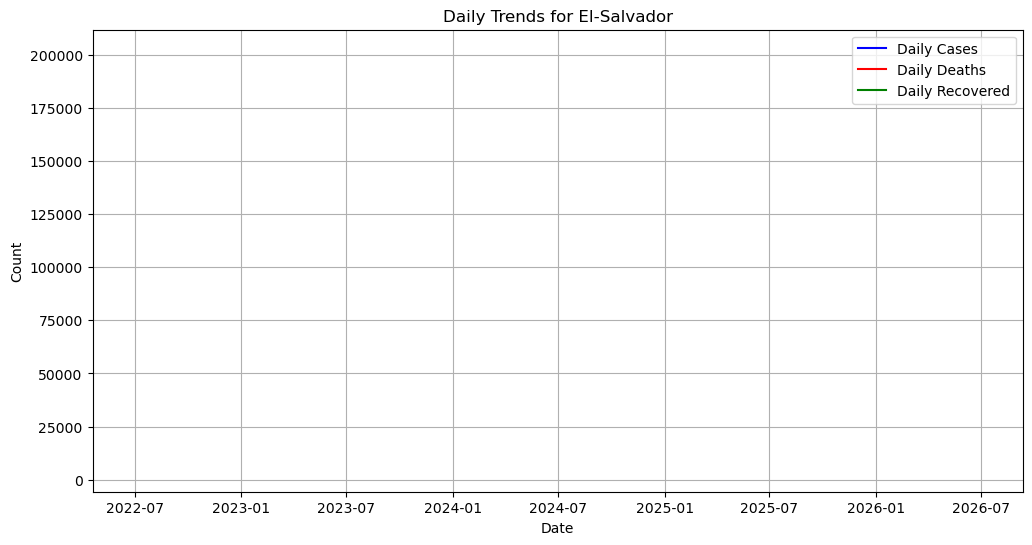

Data for Equatorial-Guinea:
          day  Cases  Deaths  Recovered
18 2024-06-30  17229   183.0    16907.0
Data types for Equatorial-Guinea:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


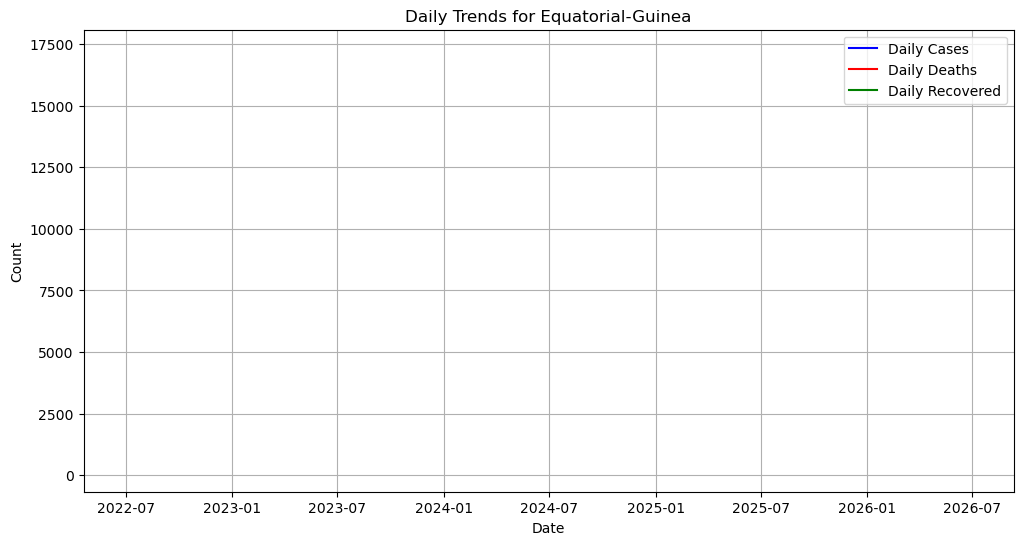

Data for Eritrea:
          day  Cases  Deaths  Recovered
16 2024-06-30  10189   103.0    10086.0
Data types for Eritrea:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


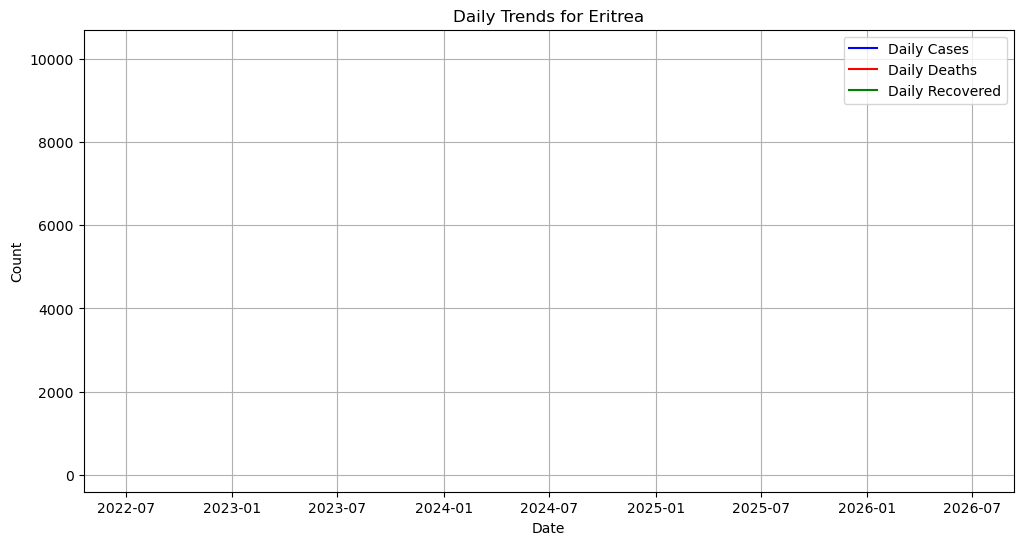

Data for Estonia:
           day   Cases  Deaths  Recovered
139 2024-06-30  628070  3001.0        0.0
Data types for Estonia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


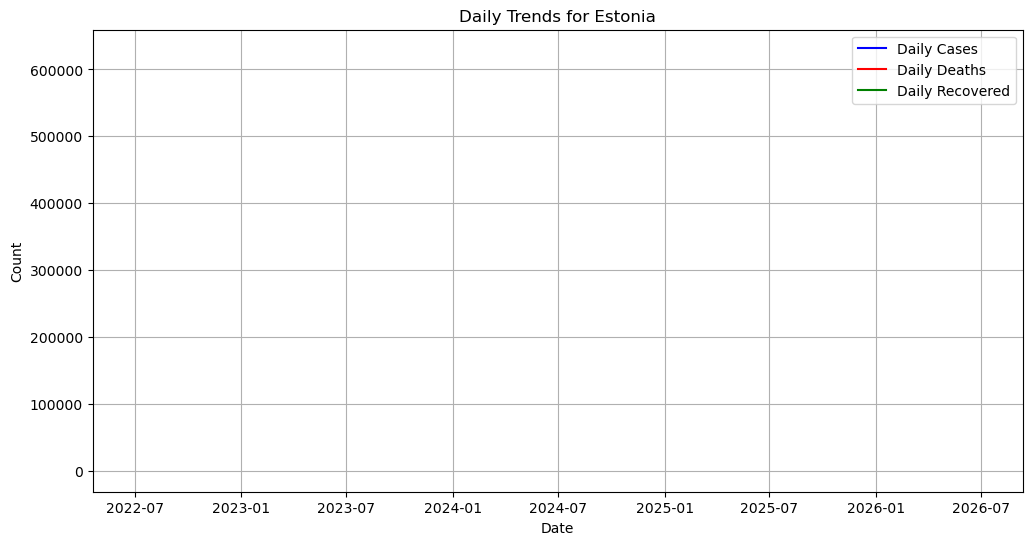

Data for Eswatini:
           day  Cases  Deaths  Recovered
114 2024-06-30  75191  1427.0    73116.0
Data types for Eswatini:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


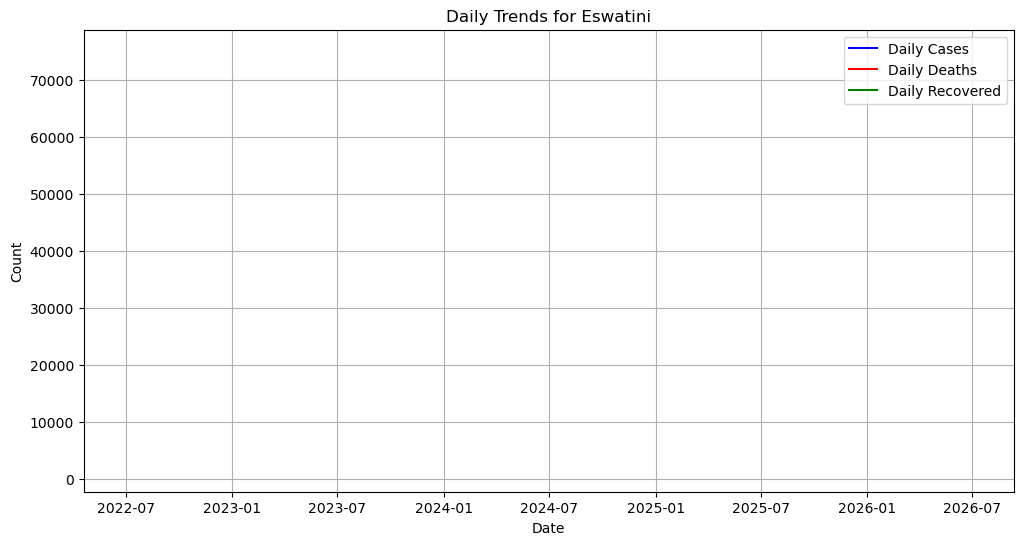

Data for Ethiopia:
           day   Cases  Deaths  Recovered
142 2024-06-30  501157  7574.0   488171.0
Data types for Ethiopia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


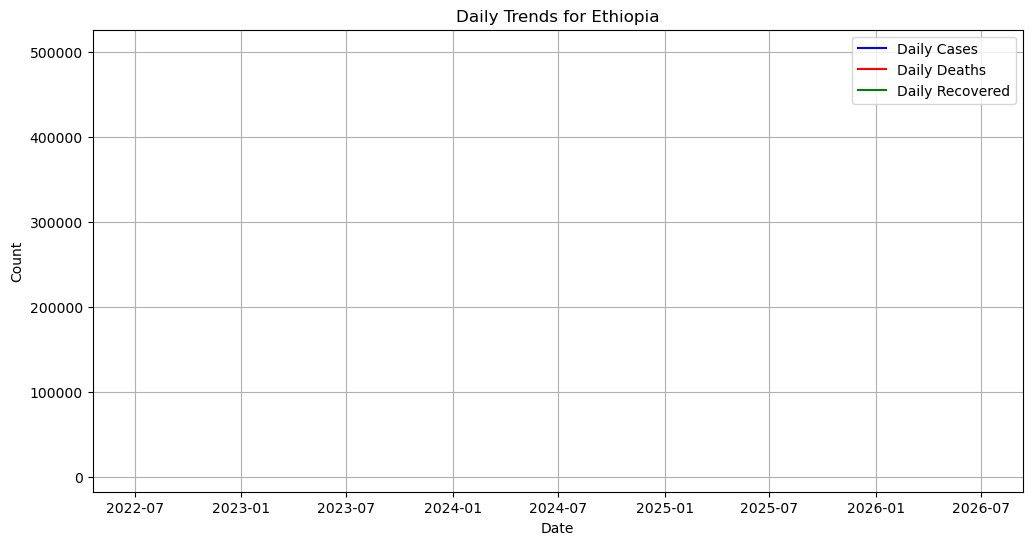

Data for Europe:
           day      Cases     Deaths    Recovered
214 2024-06-30  253406198  2101824.0  248754104.0
Data types for Europe:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


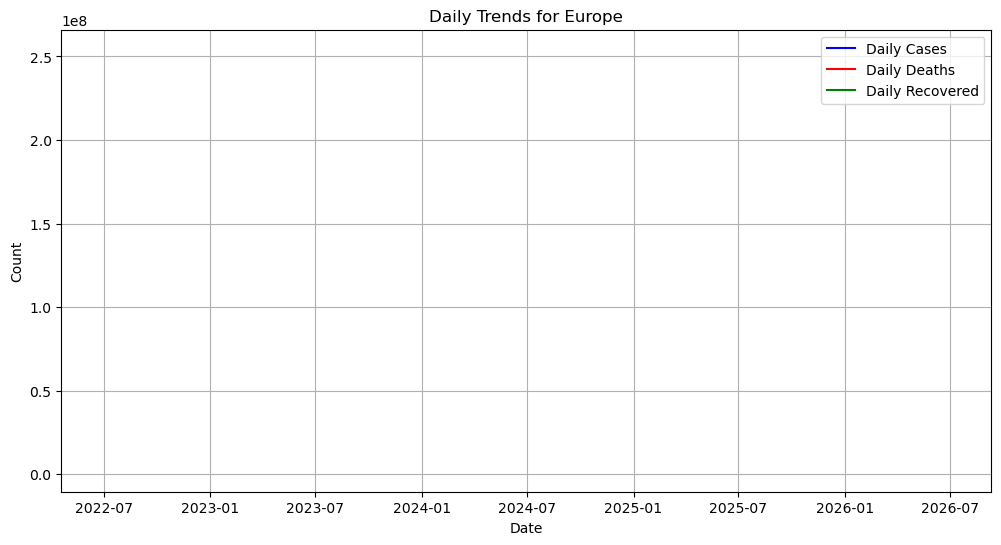

Data for Faeroe-Islands:
          day  Cases  Deaths  Recovered
81 2024-06-30  34658    28.0        0.0
Data types for Faeroe-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


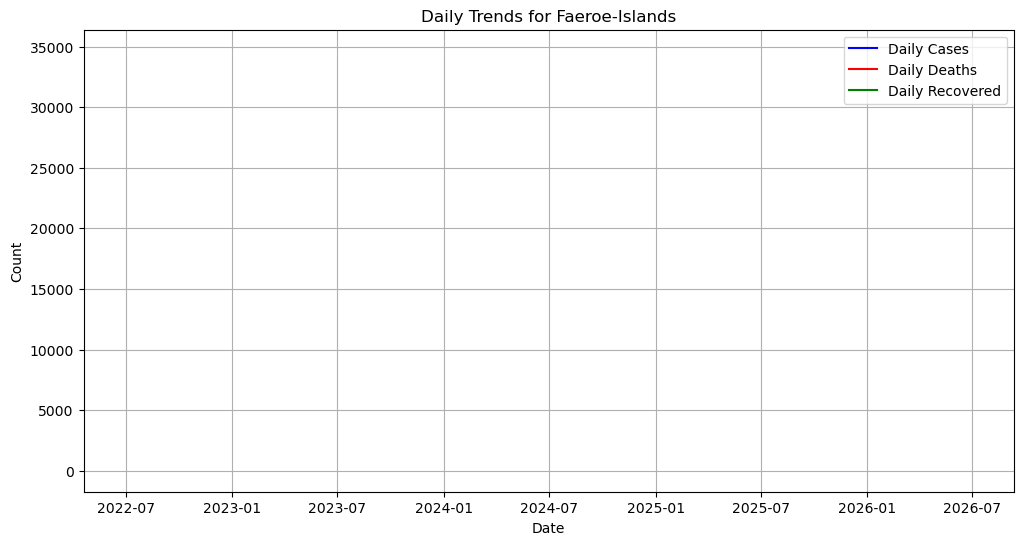

Data for Falkland-Islands:
         day  Cases  Deaths  Recovered
1 2024-06-30   1930     0.0     1930.0
Data types for Falkland-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


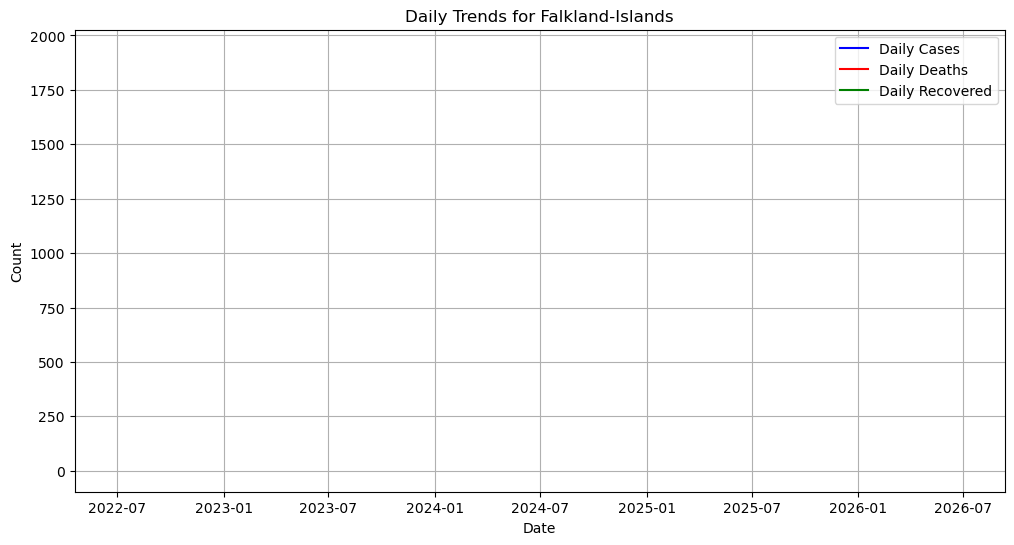

Data for Fiji:
          day  Cases  Deaths  Recovered
92 2024-06-30  69117   885.0    67226.0
Data types for Fiji:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


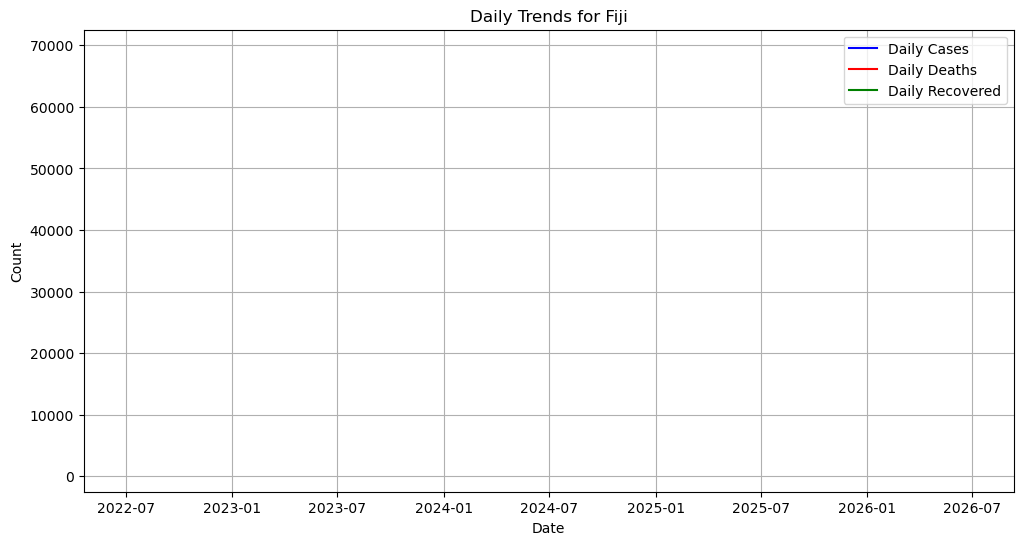

Data for Finland:
           day    Cases   Deaths  Recovered
198 2024-06-30  1516117  11958.0  1503989.0
Data types for Finland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


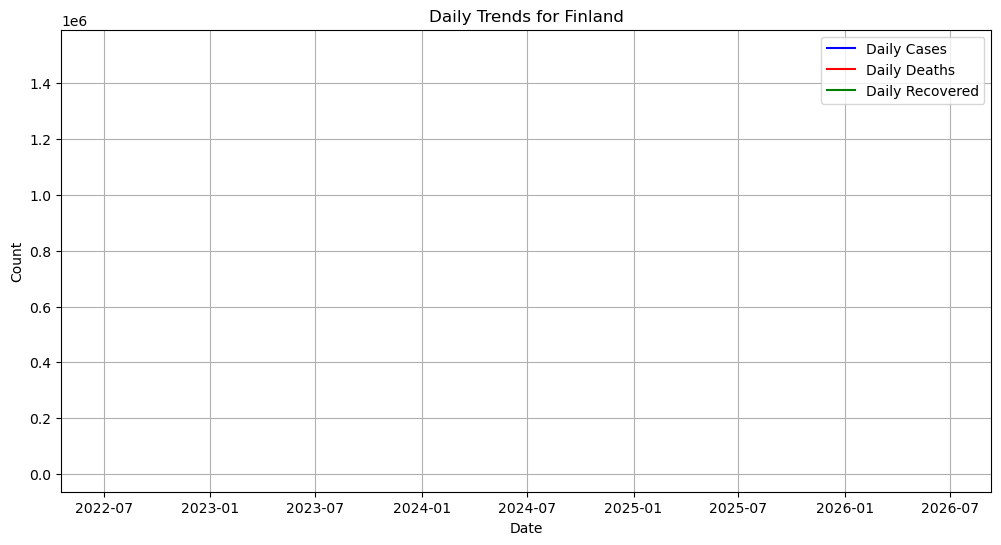

Data for France:
           day     Cases    Deaths   Recovered
221 2024-06-30  40138560  167642.0  39970918.0
Data types for France:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


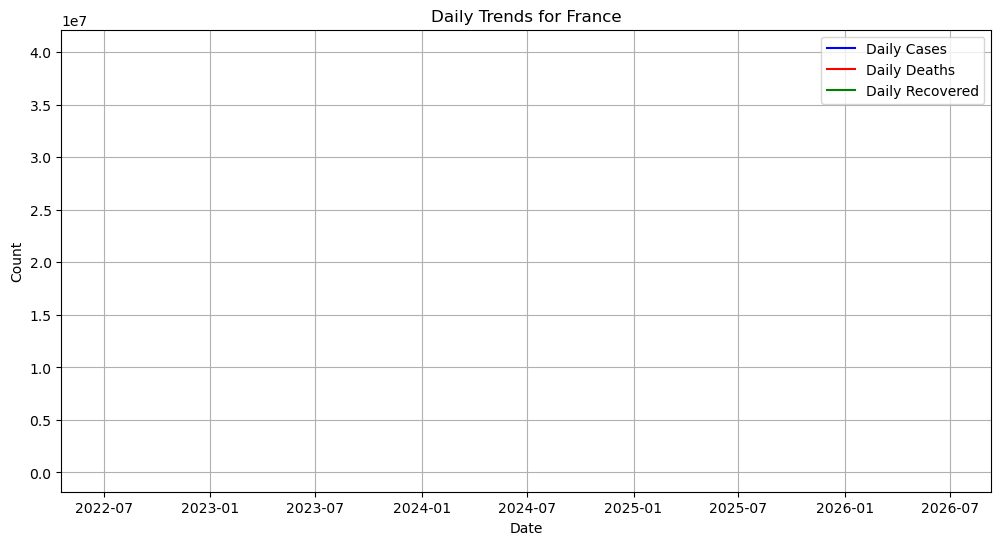

Data for French-Guiana:
          day  Cases  Deaths  Recovered
89 2024-06-30  98041   420.0    11254.0
Data types for French-Guiana:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


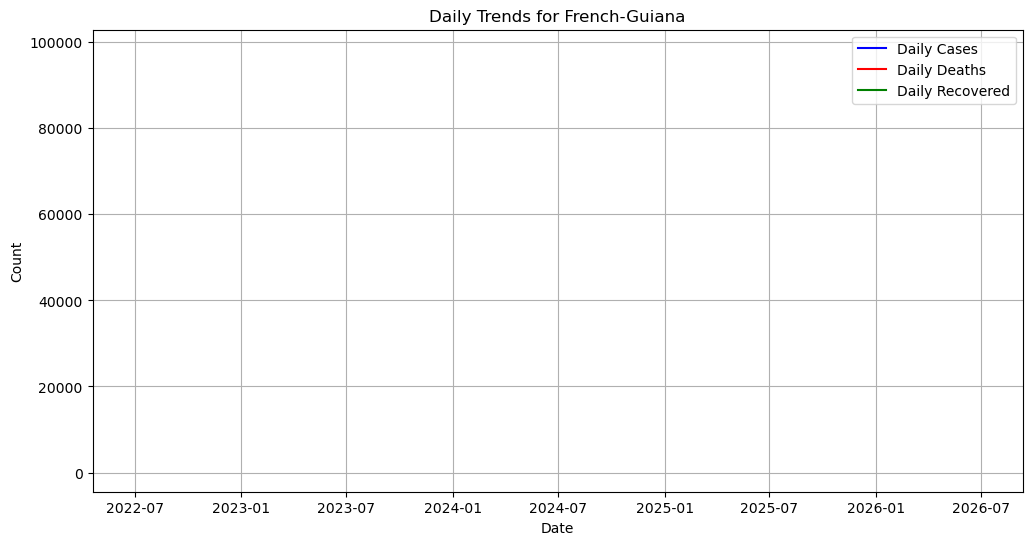

Data for French-Polynesia:
           day  Cases  Deaths  Recovered
113 2024-06-30  79254   650.0        0.0
Data types for French-Polynesia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


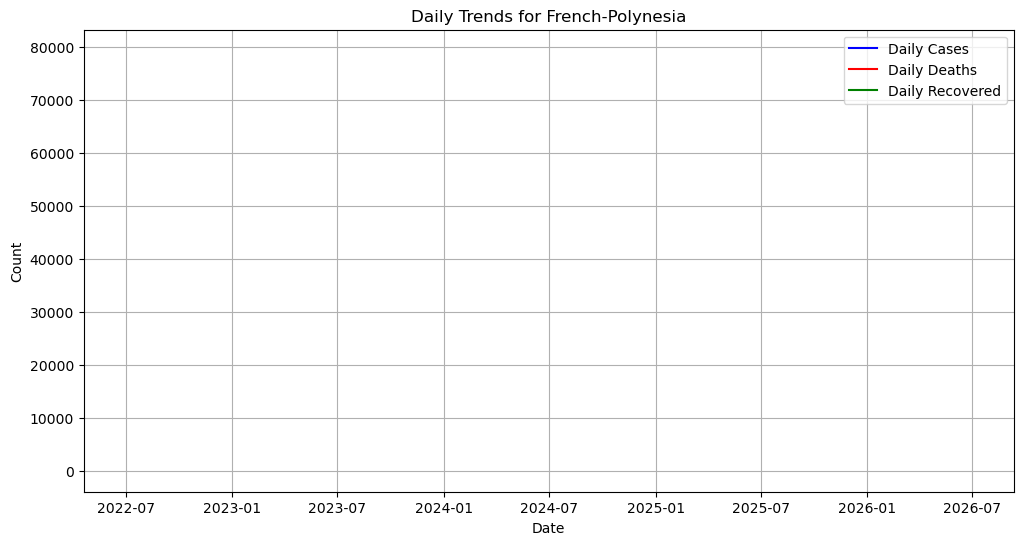

Data for Gabon:
          day  Cases  Deaths  Recovered
72 2024-06-30  49051   307.0    48674.0
Data types for Gabon:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


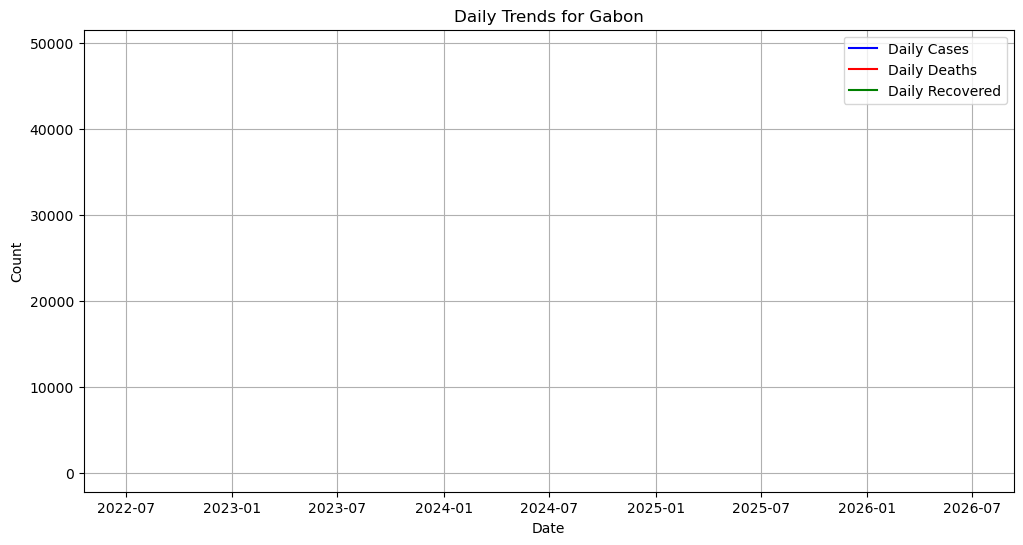

Data for Gambia:
          day  Cases  Deaths  Recovered
23 2024-06-30  12626   372.0    12189.0
Data types for Gambia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


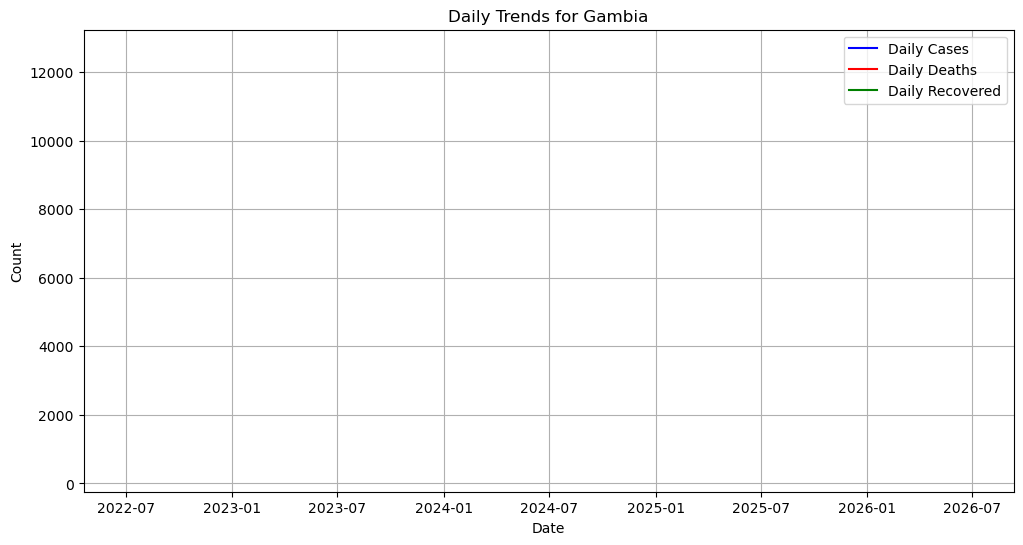

Data for Georgia:
           day    Cases   Deaths  Recovered
195 2024-06-30  1861665  17132.0        0.0
Data types for Georgia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


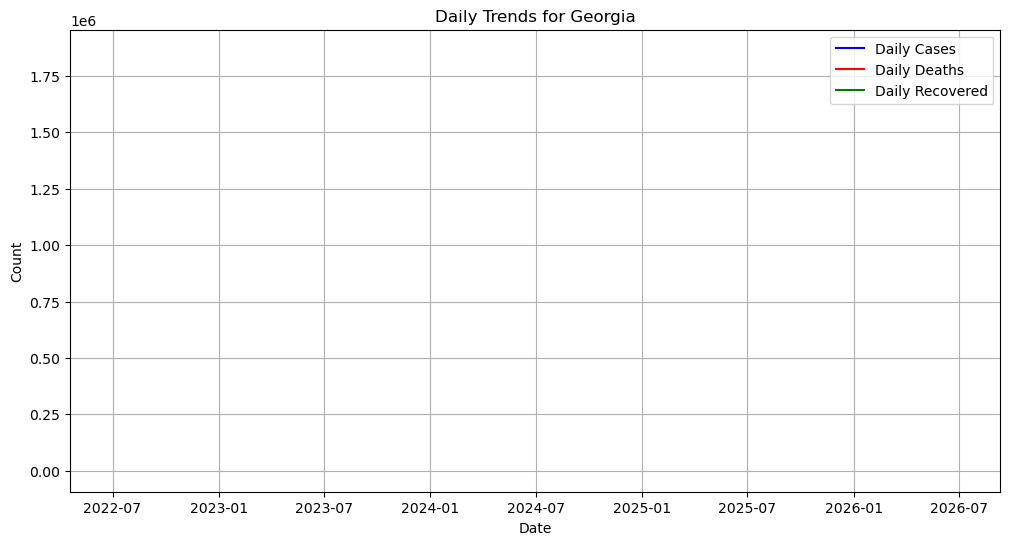

Data for Germany:
           day     Cases    Deaths   Recovered
222 2024-06-30  38828995  183027.0  38240600.0
Data types for Germany:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


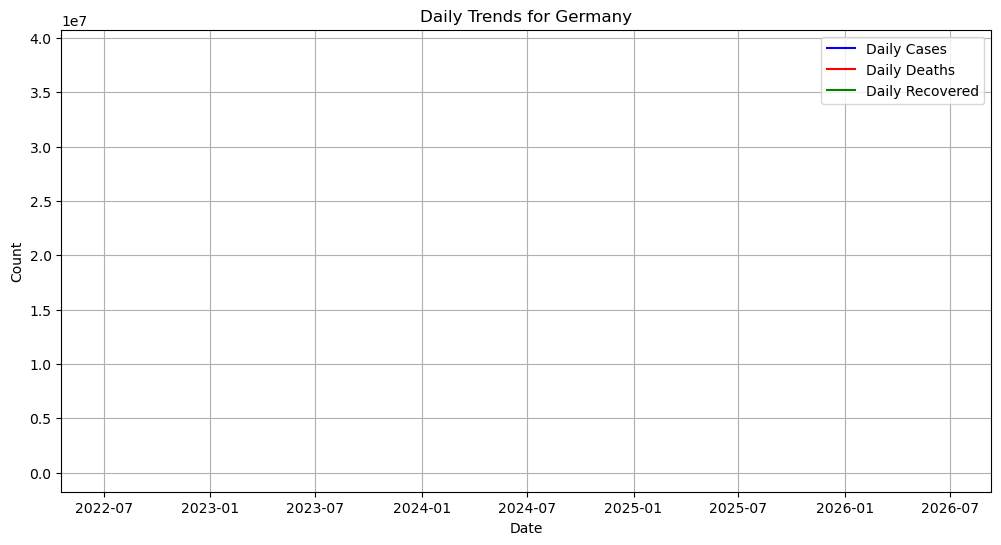

Data for Ghana:
           day   Cases  Deaths  Recovered
100 2024-06-30  171889  1462.0   170425.0
Data types for Ghana:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


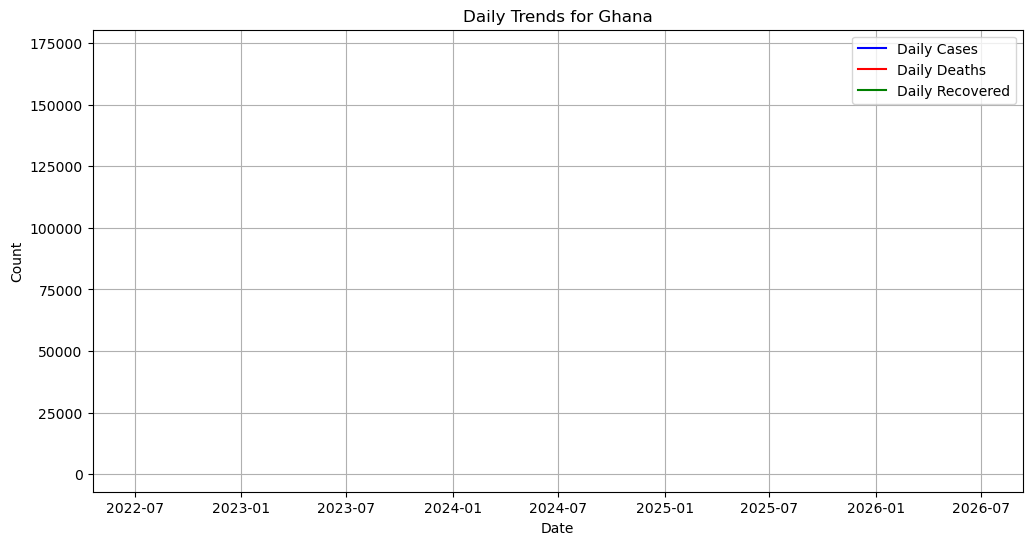

Data for Gibraltar:
          day  Cases  Deaths  Recovered
37 2024-06-30  20550   113.0        0.0
Data types for Gibraltar:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


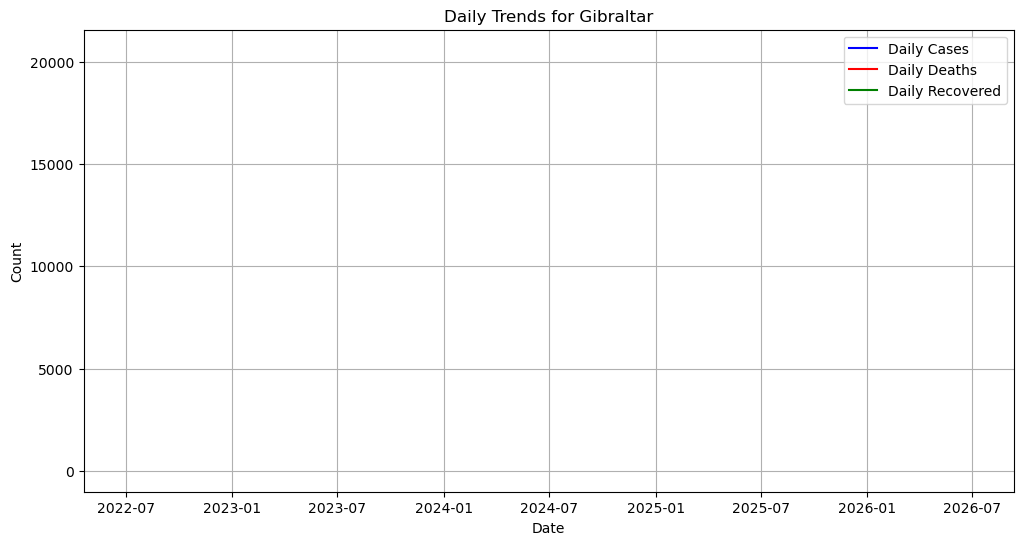

Data for Greece:
           day    Cases   Deaths  Recovered
171 2024-06-30  6101379  37869.0        0.0
Data types for Greece:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


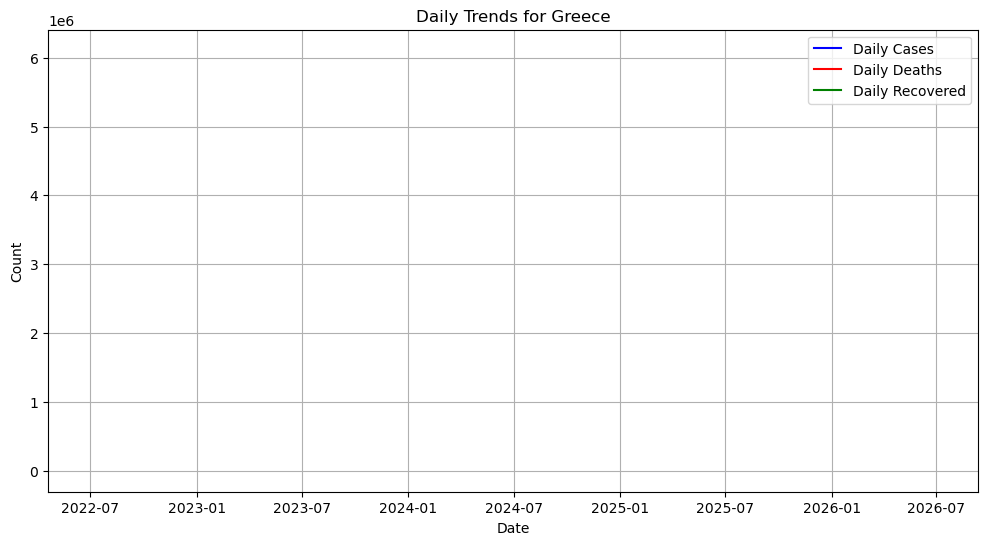

Data for Greenland:
          day  Cases  Deaths  Recovered
15 2024-06-30  11971    21.0     2761.0
Data types for Greenland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


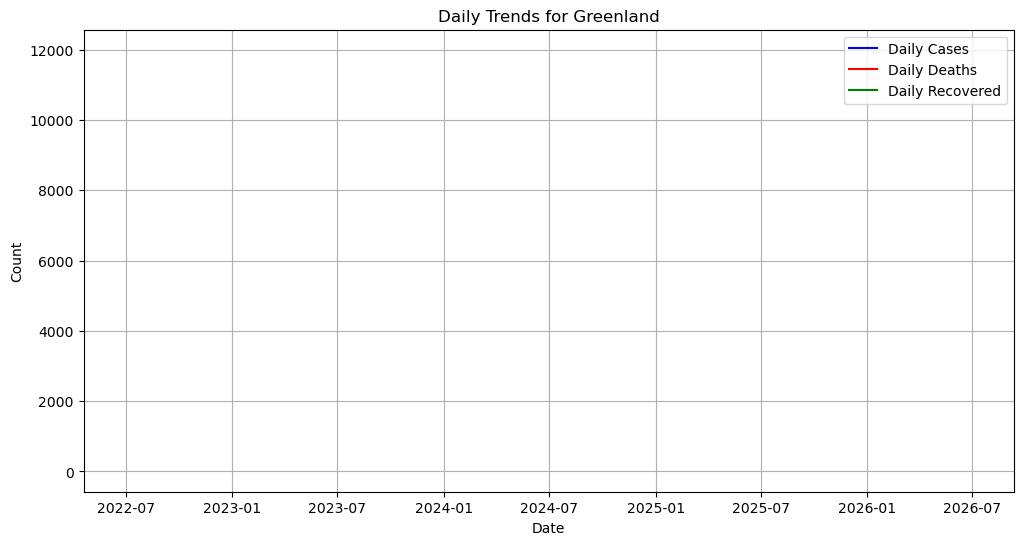

Data for Grenada:
          day  Cases  Deaths  Recovered
24 2024-06-30  19693   238.0    19358.0
Data types for Grenada:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


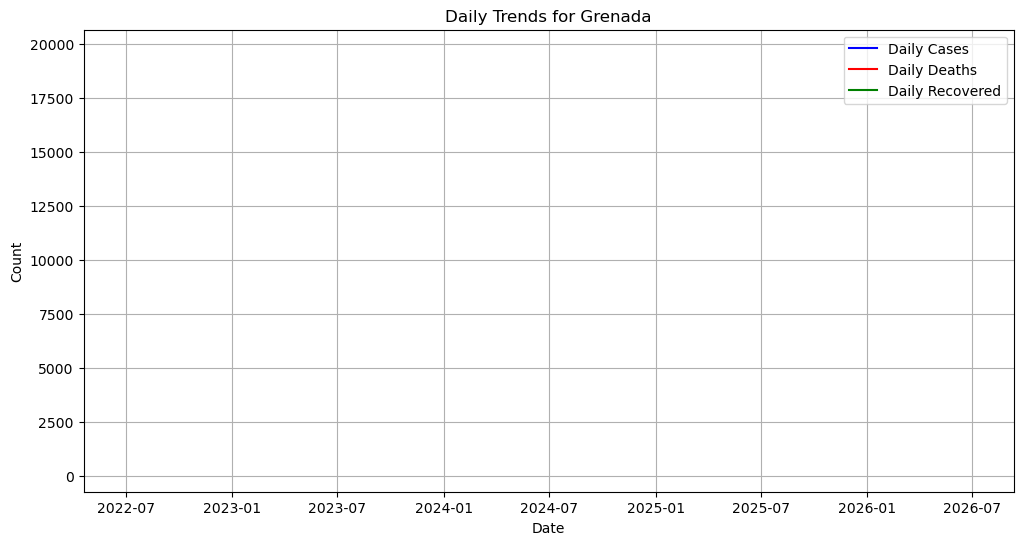

Data for Guadeloupe:
          day   Cases  Deaths  Recovered
94 2024-06-30  203235  1021.0        0.0
Data types for Guadeloupe:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


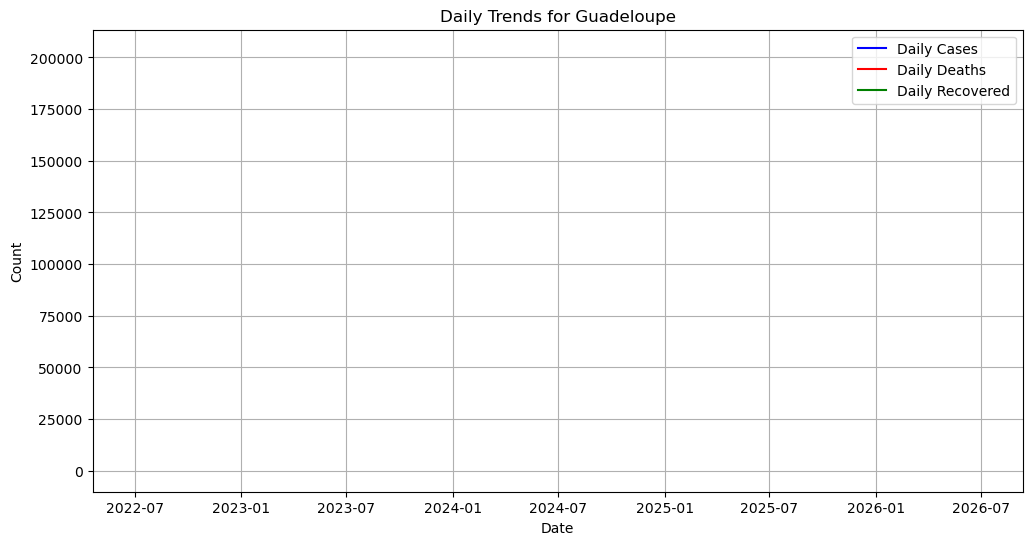

Data for Guatemala:
           day    Cases   Deaths  Recovered
204 2024-06-30  1291293  20289.0  1269891.0
Data types for Guatemala:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


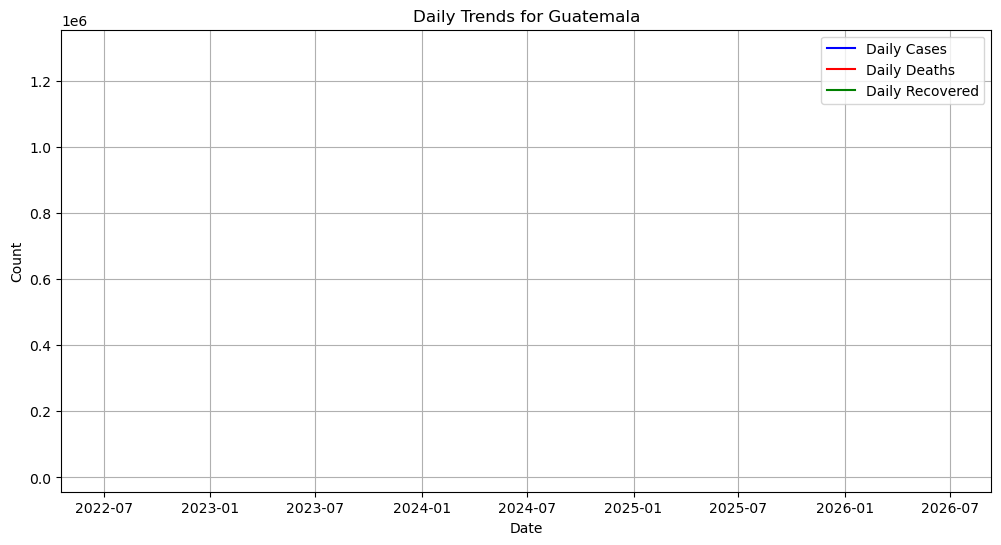

Data for Guinea:
          day  Cases  Deaths  Recovered
78 2024-06-30  38572   468.0    37757.0
Data types for Guinea:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


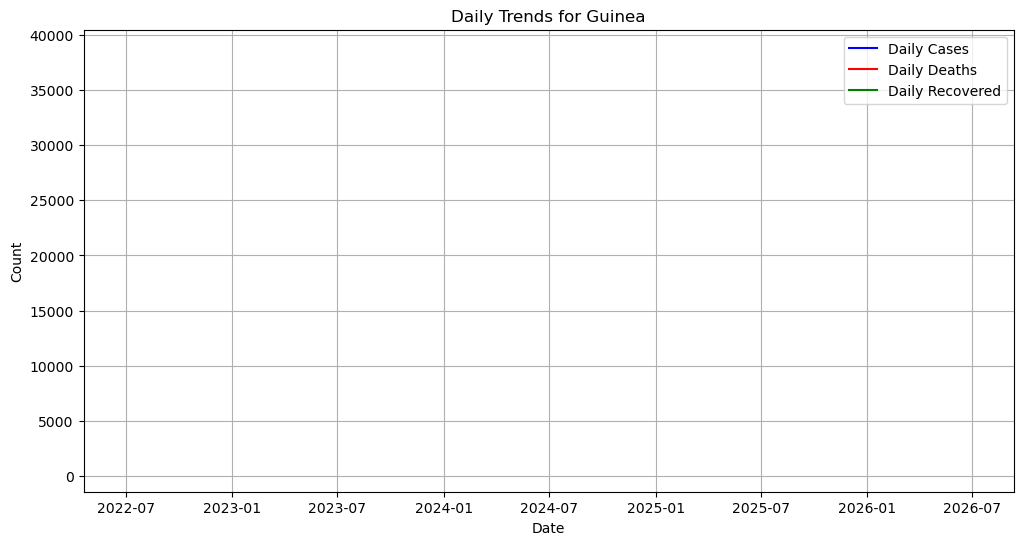

Data for Guinea-Bissau:
          day  Cases  Deaths  Recovered
26 2024-06-30   9614   177.0     8929.0
Data types for Guinea-Bissau:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


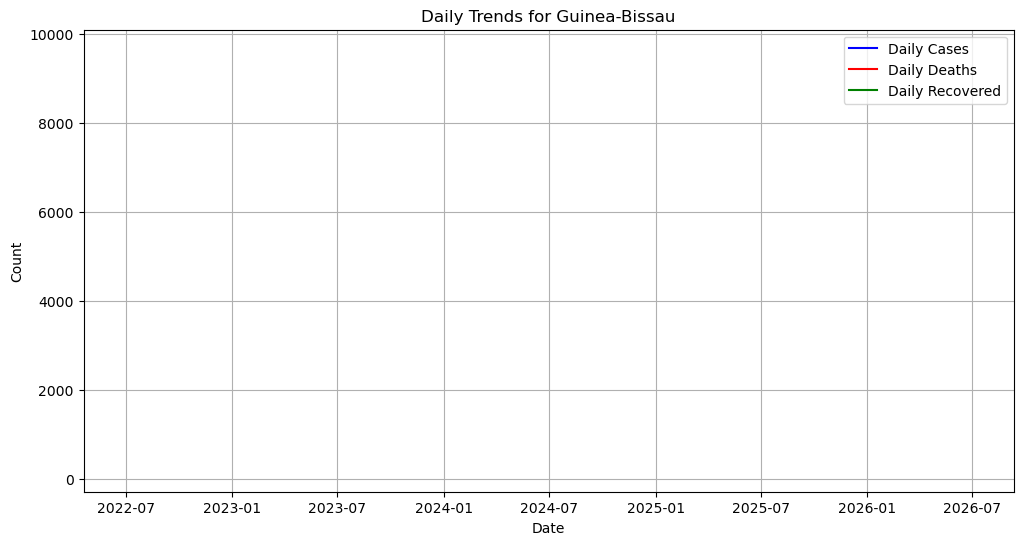

Data for Guyana:
           day  Cases  Deaths  Recovered
115 2024-06-30  74137  1300.0    72013.0
Data types for Guyana:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


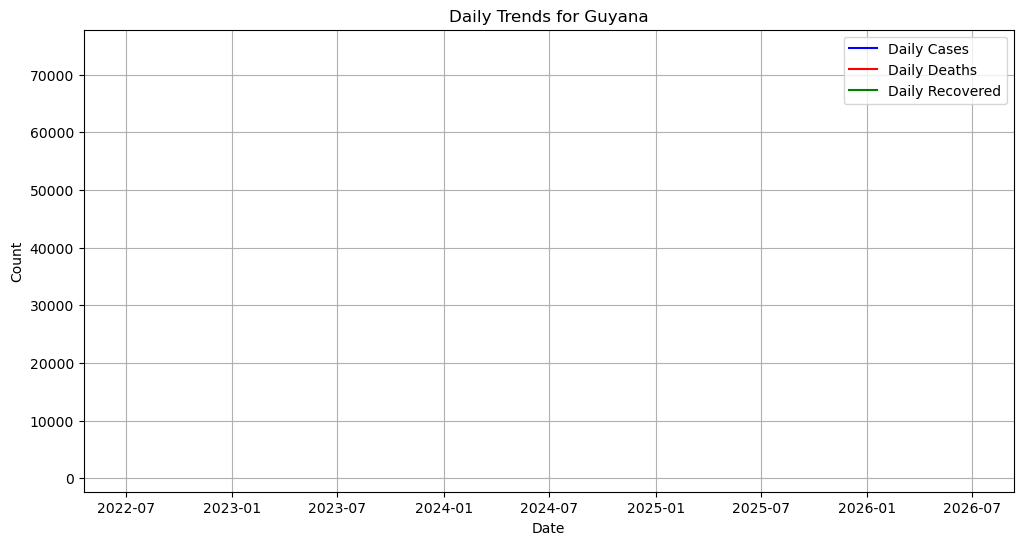

Data for Haiti:
          day  Cases  Deaths  Recovered
80 2024-06-30  34667   860.0    33734.0
Data types for Haiti:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


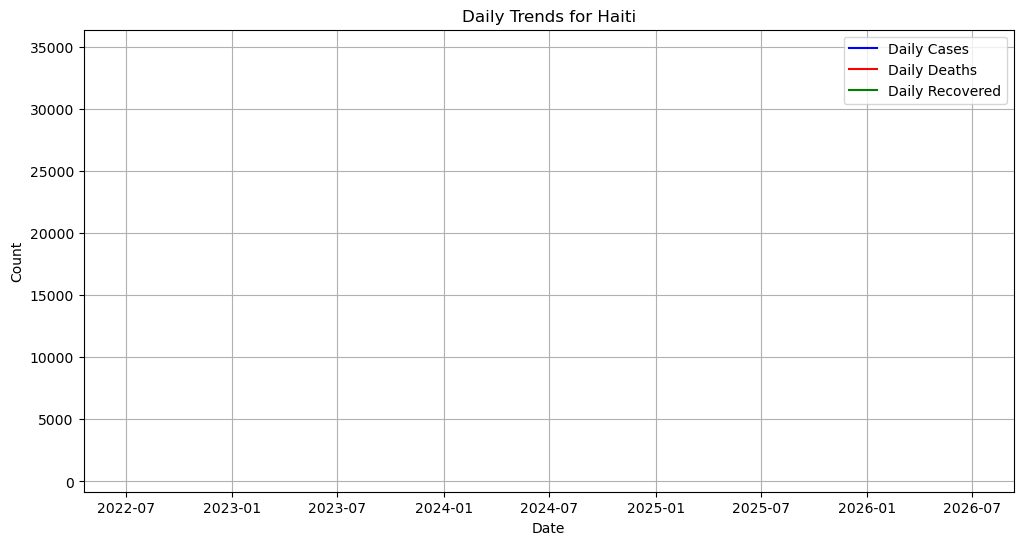

Data for Honduras:
           day   Cases   Deaths  Recovered
144 2024-06-30  474590  11165.0        0.0
Data types for Honduras:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


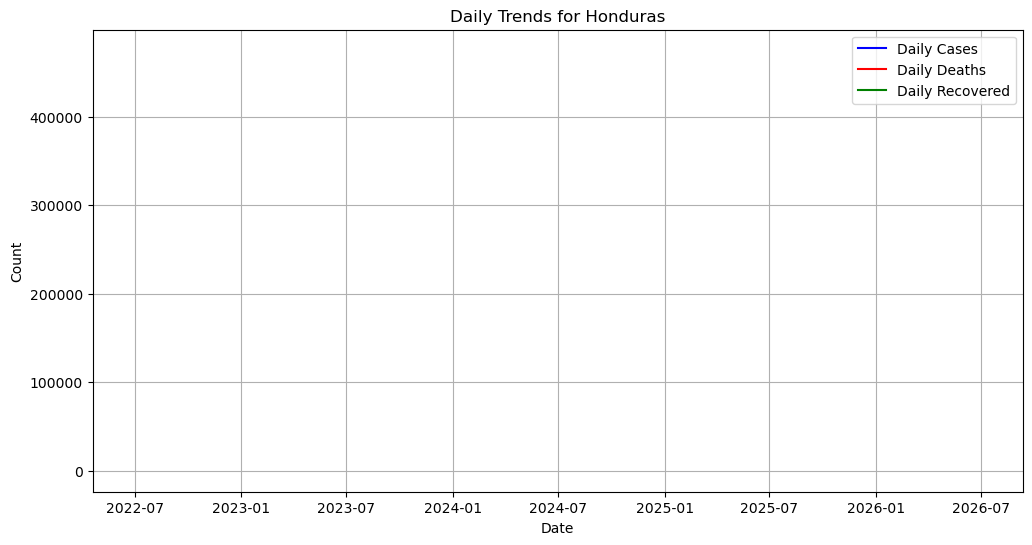

Data for Hong-Kong:
           day    Cases   Deaths  Recovered
187 2024-06-30  2937609  14924.0  2916005.0
Data types for Hong-Kong:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


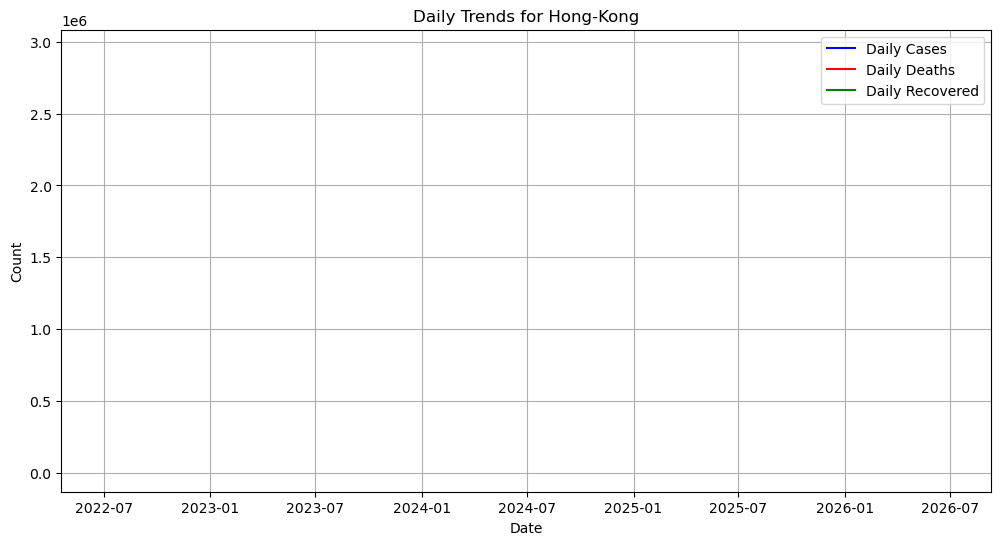

Data for Hungary:
           day    Cases   Deaths  Recovered
192 2024-06-30  2230232  49048.0  2152155.0
Data types for Hungary:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


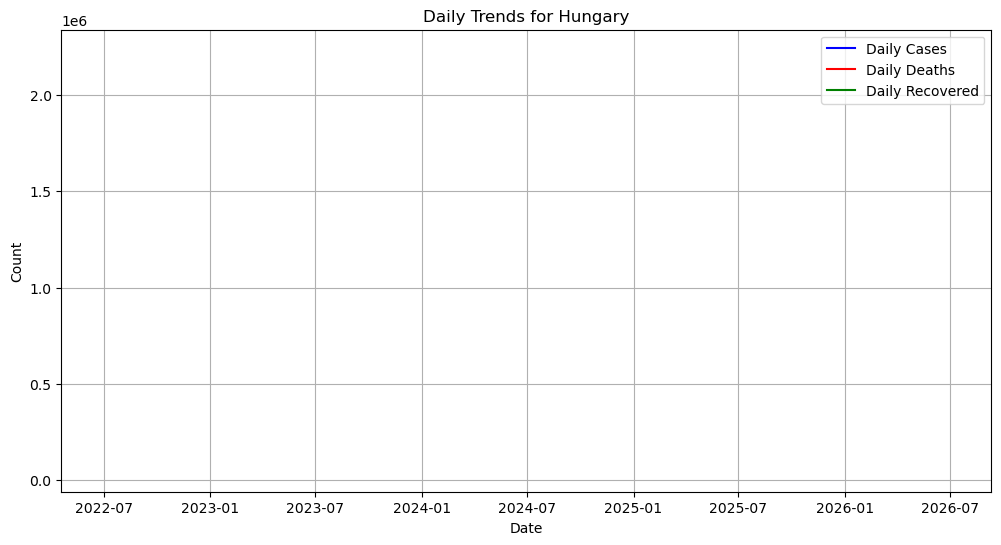

Data for Iceland:
           day   Cases  Deaths  Recovered
163 2024-06-30  209906   229.0        0.0
Data types for Iceland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


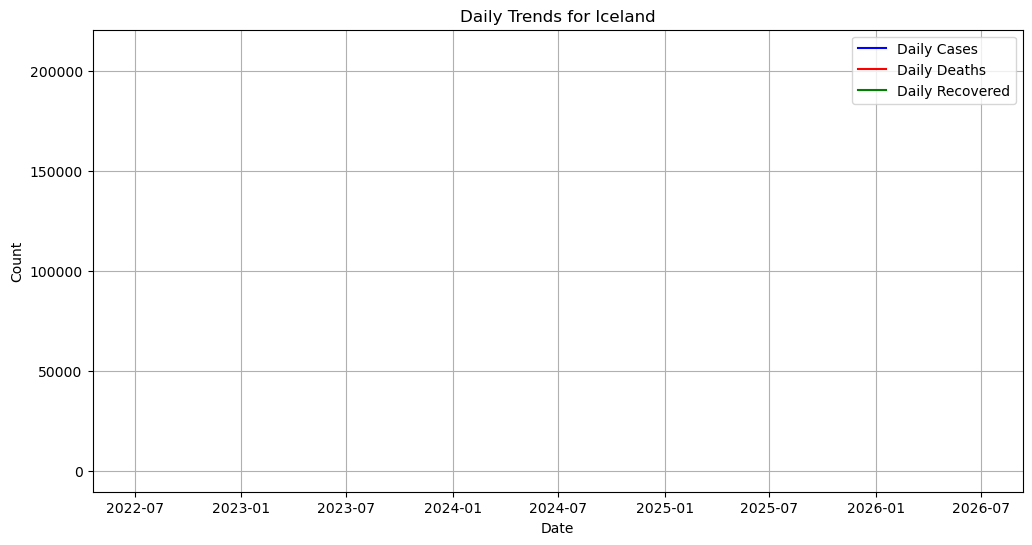

Data for India:
           day     Cases    Deaths  Recovered
220 2024-06-30  45035393  533570.0        0.0
Data types for India:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


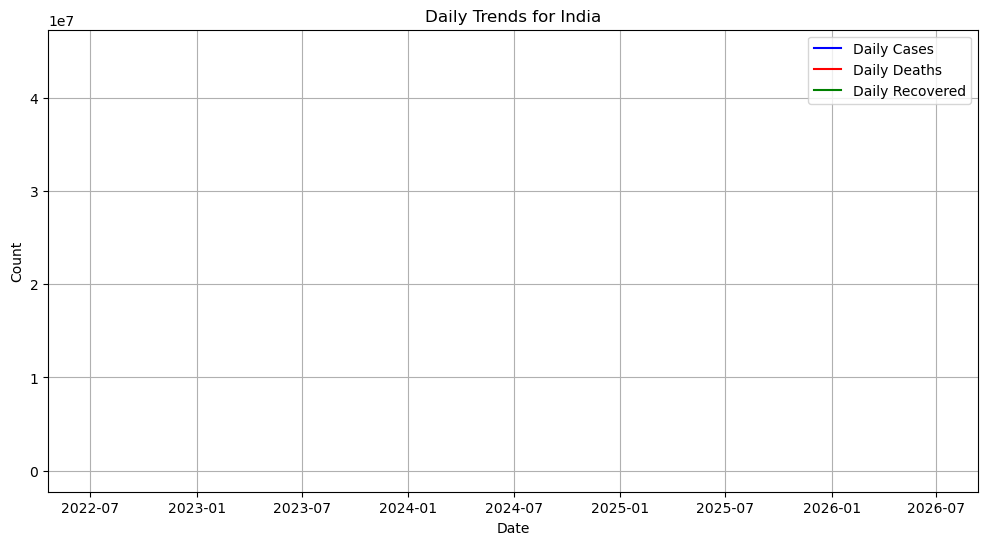

Data for Indonesia:
           day    Cases    Deaths  Recovered
237 2024-06-30  6829221  162063.0  6647104.0
Data types for Indonesia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


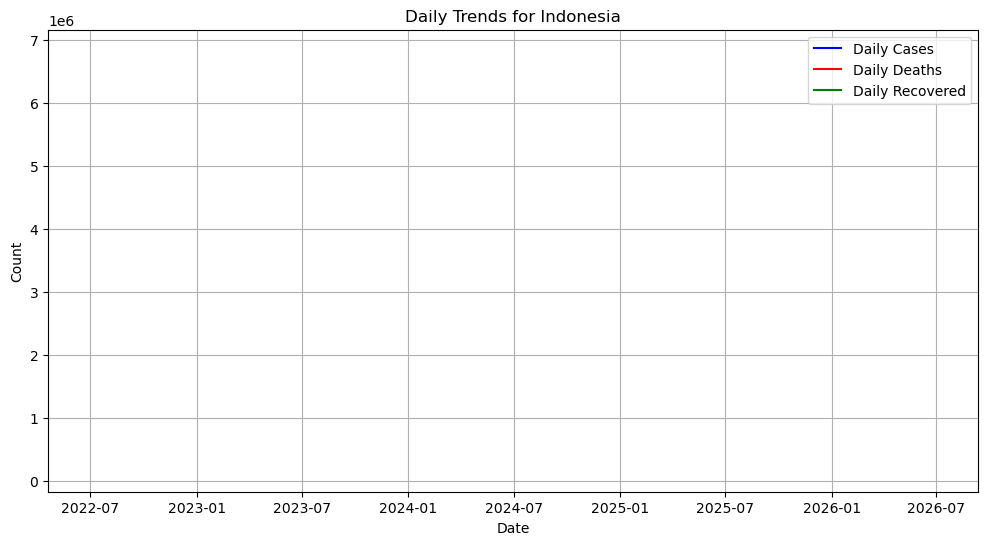

Data for Iran:
           day    Cases    Deaths  Recovered
236 2024-06-30  7627186  146811.0        0.0
Data types for Iran:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


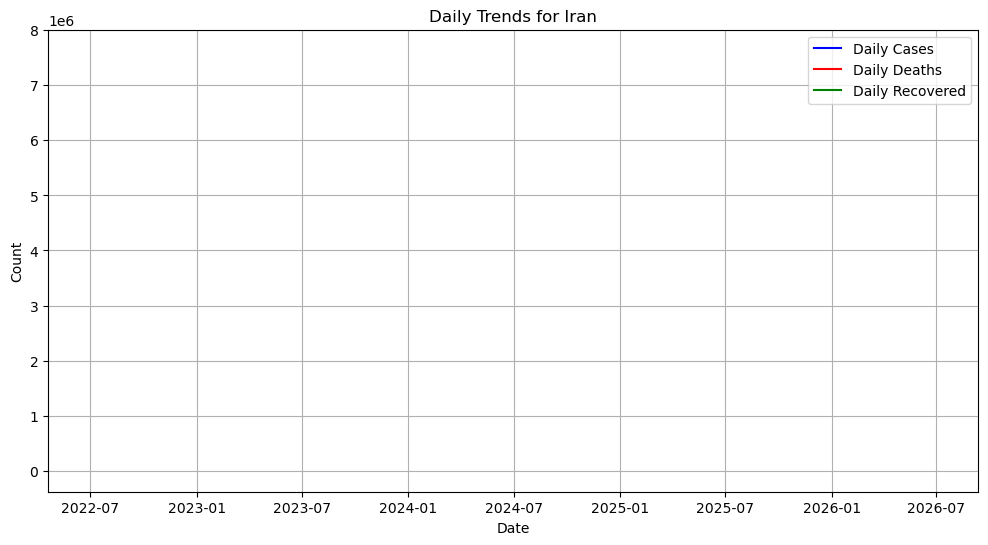

Data for Iraq:
           day    Cases   Deaths  Recovered
191 2024-06-30  2465545  25375.0  2439497.0
Data types for Iraq:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


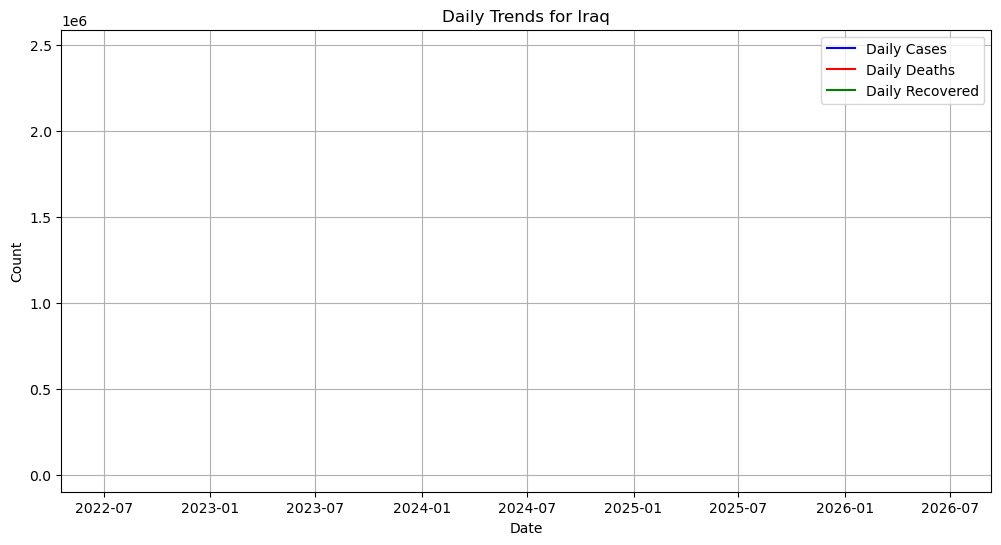

Data for Ireland:
           day    Cases  Deaths  Recovered
196 2024-06-30  1734582  9491.0  1724921.0
Data types for Ireland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


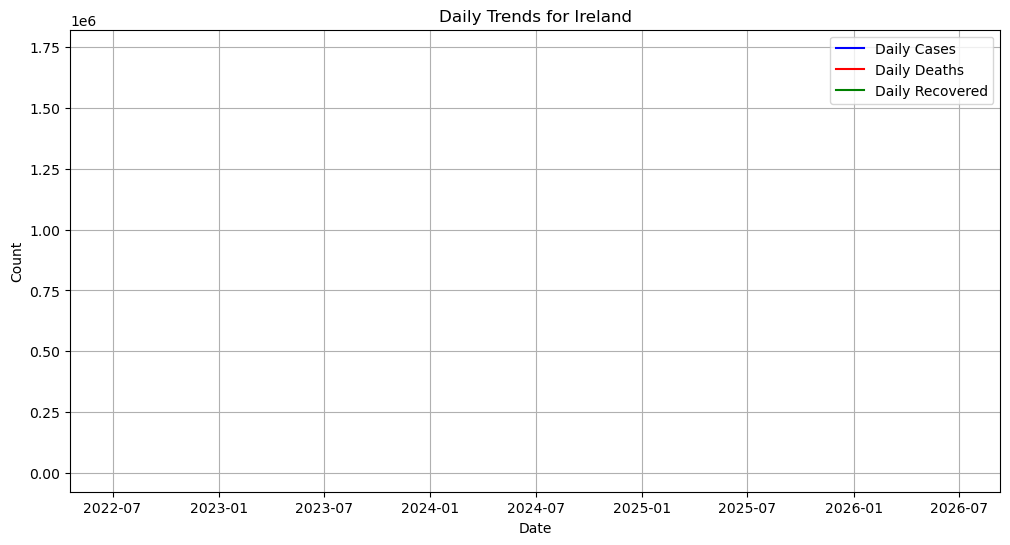

Data for Isle-of-Man:
          day  Cases  Deaths  Recovered
57 2024-06-30  38008   116.0        0.0
Data types for Isle-of-Man:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


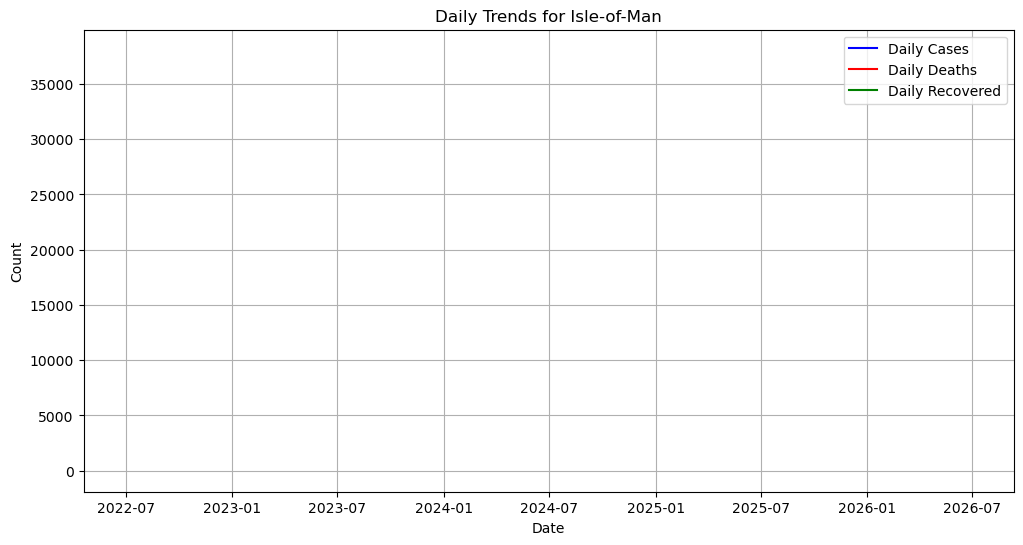

Data for Israel:
           day    Cases   Deaths  Recovered
178 2024-06-30  4841772  12707.0  4798473.0
Data types for Israel:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


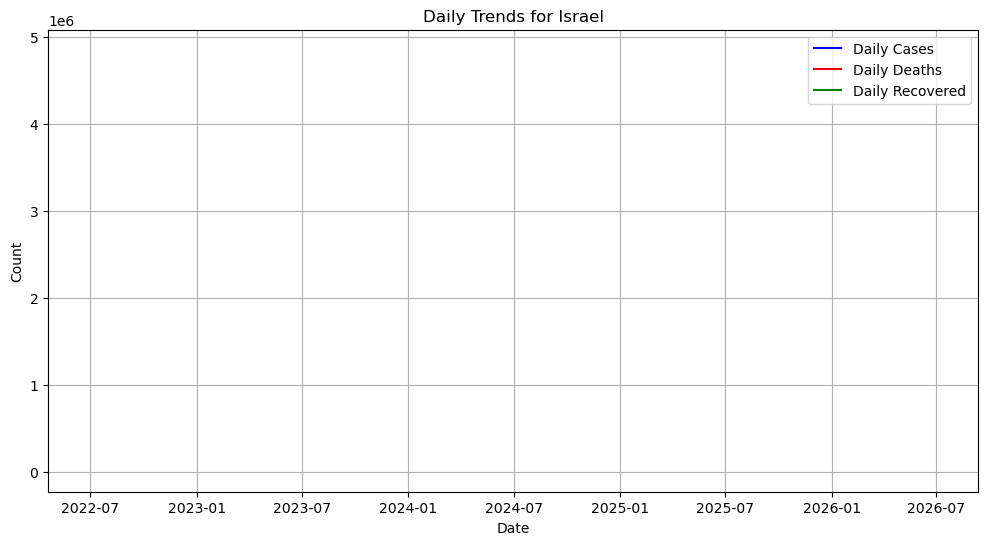

Data for Italy:
           day     Cases    Deaths   Recovered
226 2024-06-30  26723249  196487.0  26361218.0
Data types for Italy:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


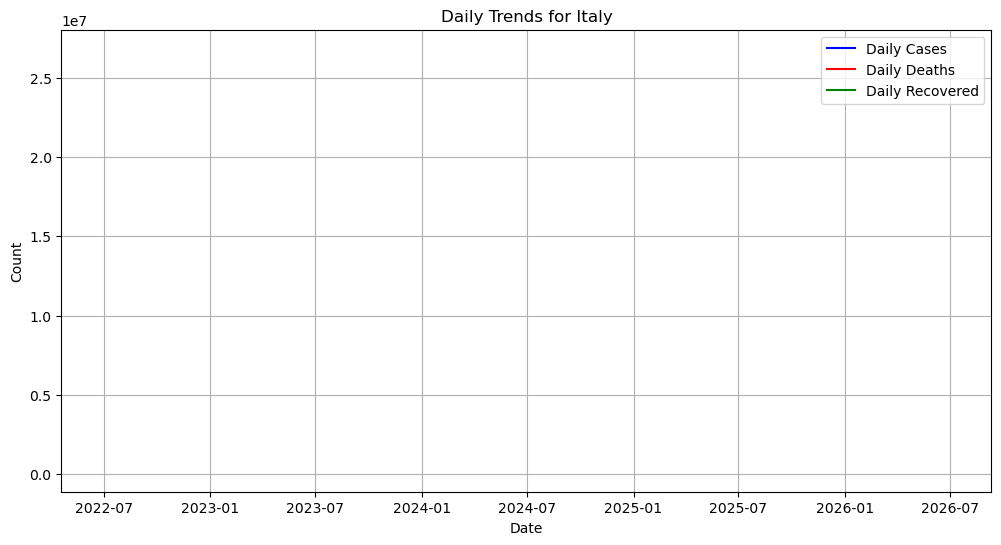

Data for Ivory-Coast:
           day  Cases  Deaths  Recovered
111 2024-06-30  88384   835.0    87497.0
Data types for Ivory-Coast:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


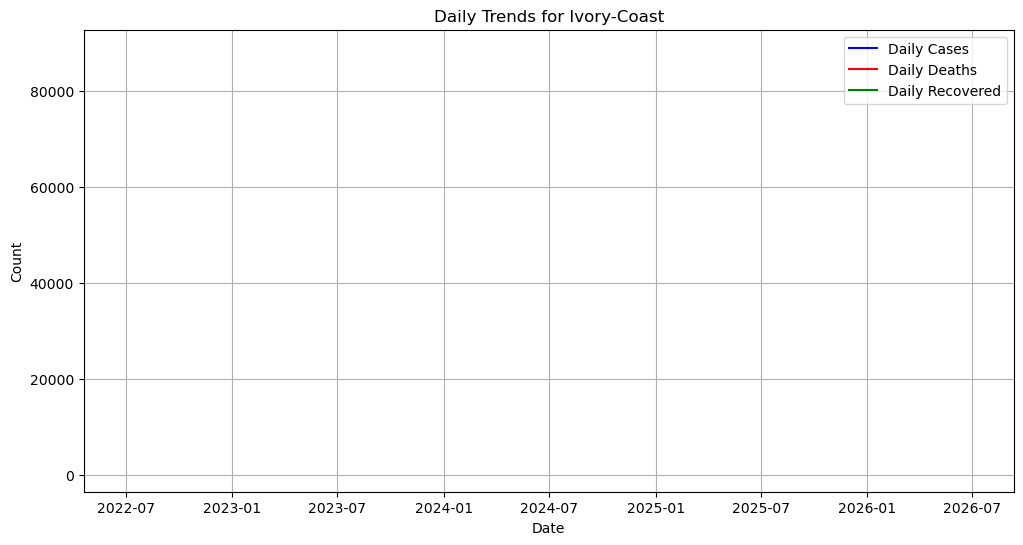

Data for Jamaica:
           day   Cases  Deaths  Recovered
101 2024-06-30  156869  3756.0        0.0
Data types for Jamaica:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


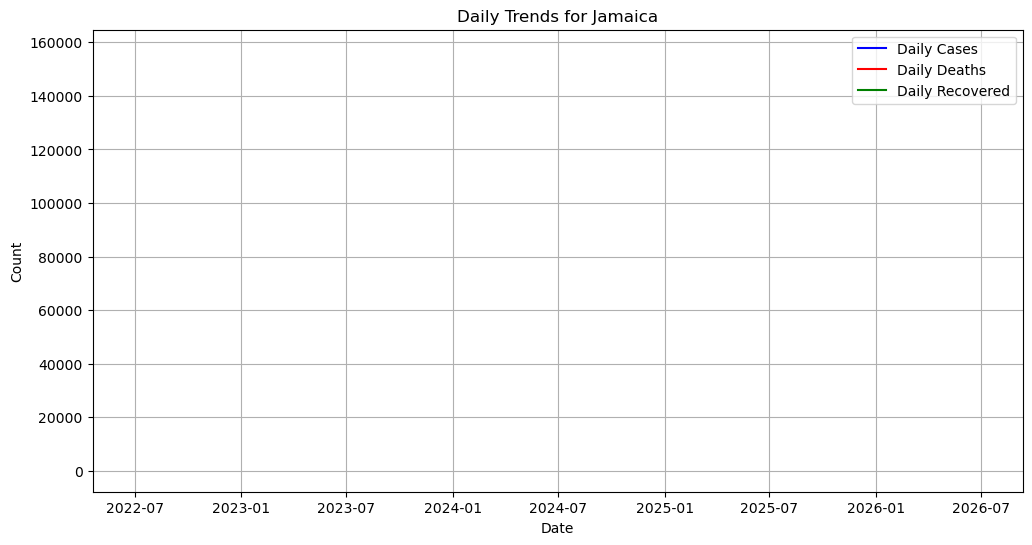

Data for Japan:
           day     Cases   Deaths  Recovered
225 2024-06-30  33803572  74694.0        0.0
Data types for Japan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


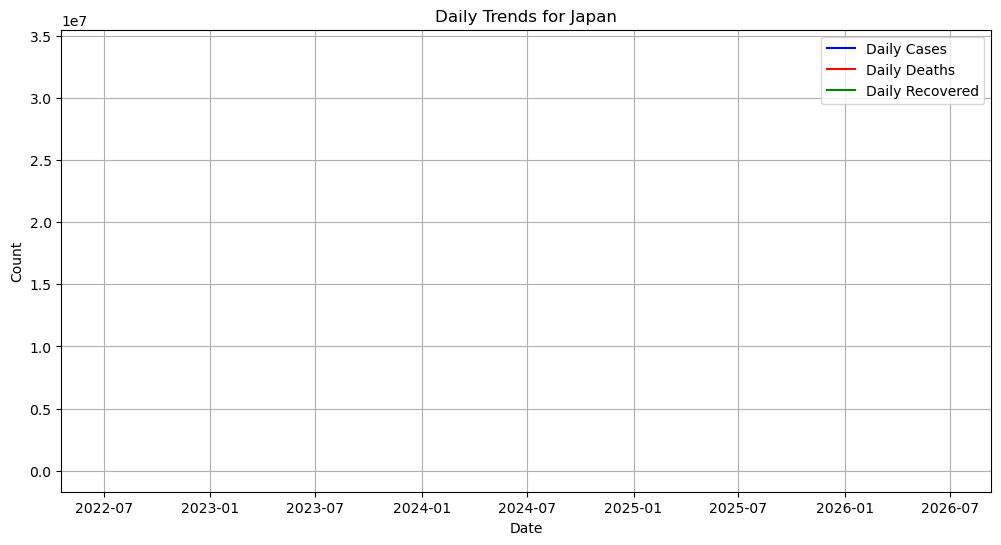

Data for Jordan:
           day    Cases   Deaths  Recovered
165 2024-06-30  1746997  14122.0  1731007.0
Data types for Jordan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


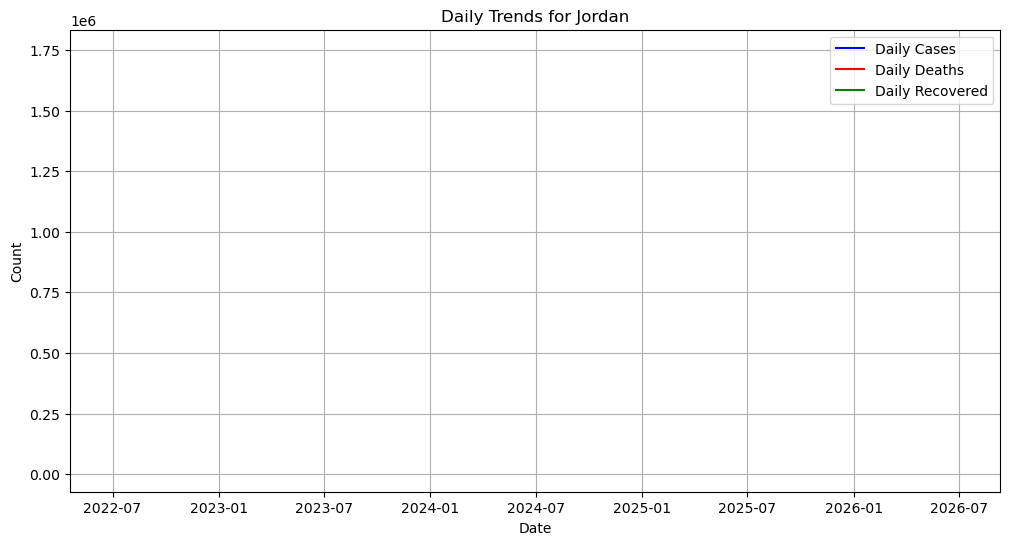

Data for Kazakhstan:
           day    Cases   Deaths  Recovered
167 2024-06-30  1411831  13848.0  1383020.0
Data types for Kazakhstan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


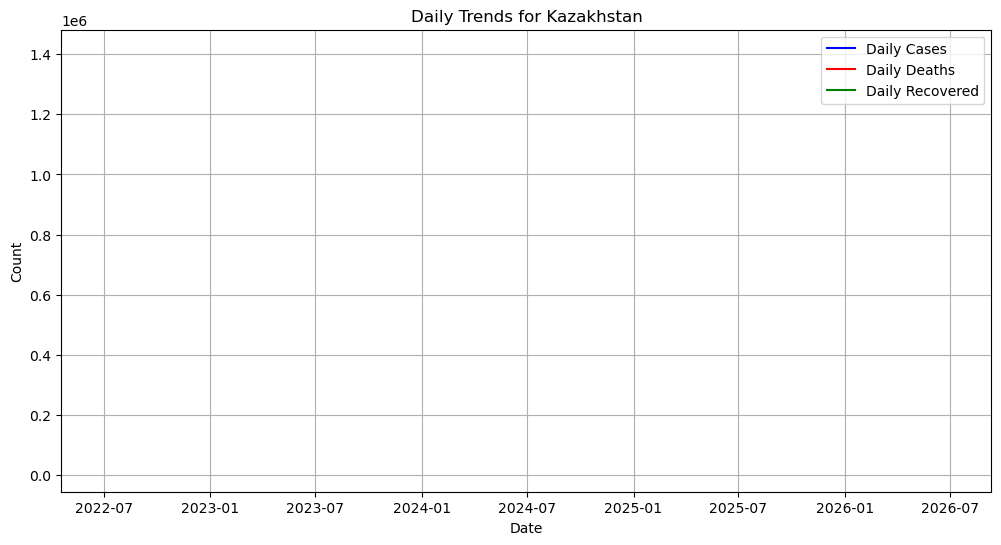

Data for Kenya:
           day   Cases  Deaths  Recovered
151 2024-06-30  344130  5689.0   337309.0
Data types for Kenya:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


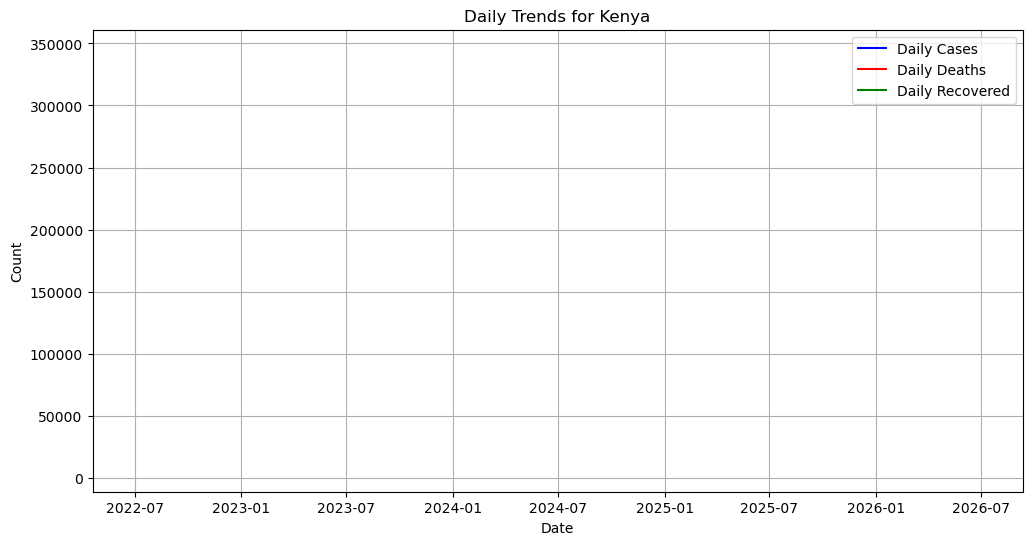

Data for Kiribati:
          day  Cases  Deaths  Recovered
34 2024-06-30   5085    24.0     2703.0
Data types for Kiribati:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


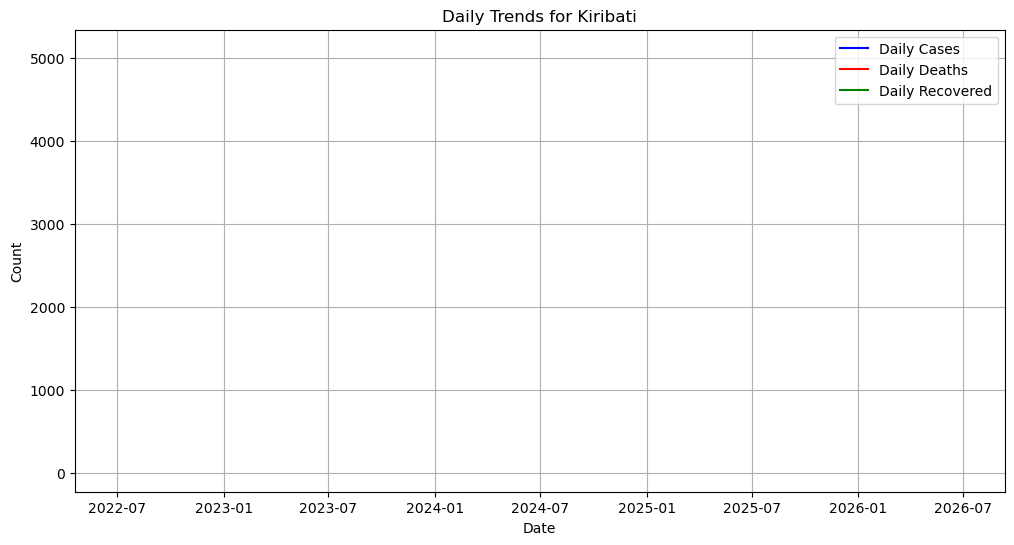

Data for Kuwait:
           day   Cases  Deaths  Recovered
136 2024-06-30  667158  2570.0        0.0
Data types for Kuwait:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


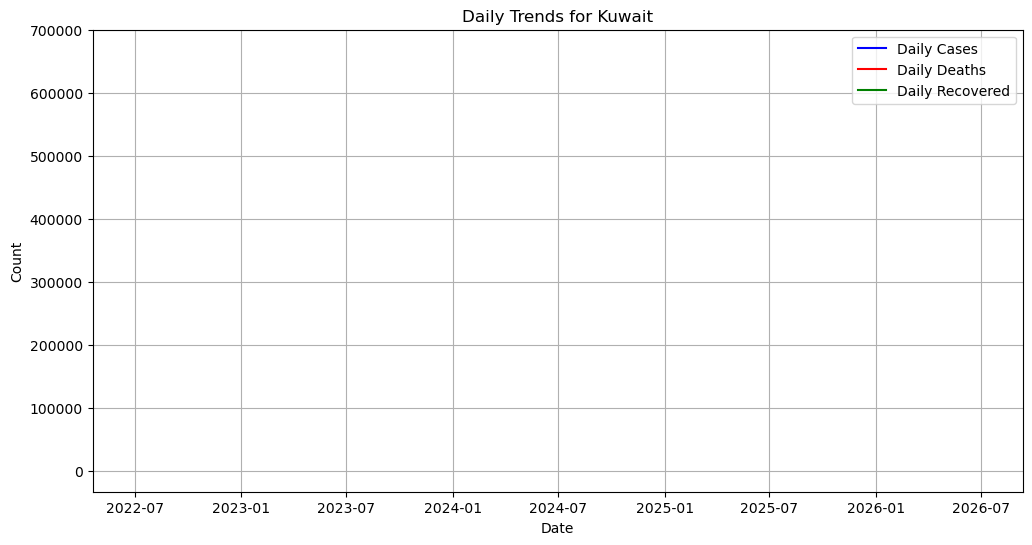

Data for Kyrgyzstan:
          day   Cases  Deaths  Recovered
91 2024-06-30  206897  2991.0   196406.0
Data types for Kyrgyzstan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


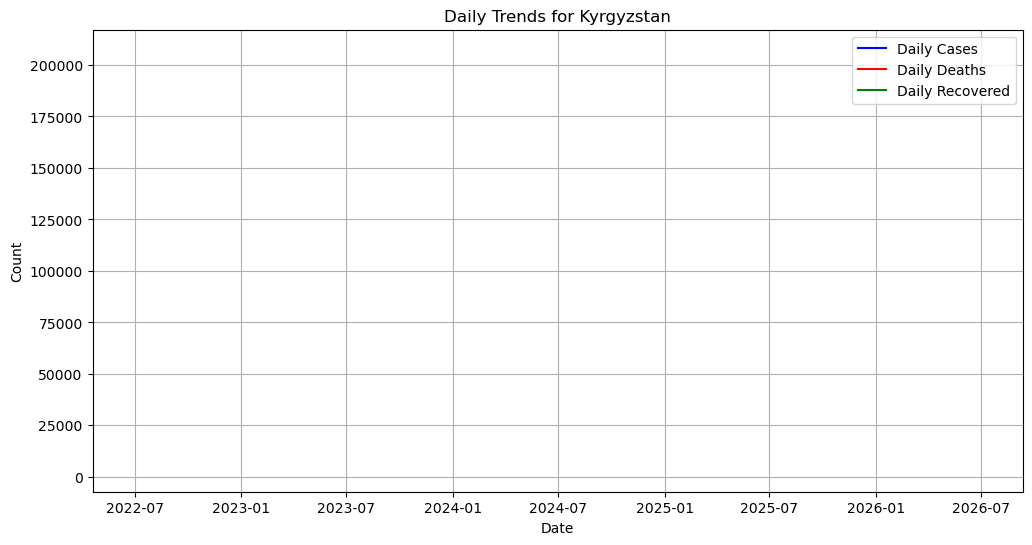

Data for Laos:
           day   Cases  Deaths  Recovered
162 2024-06-30  218970   758.0        0.0
Data types for Laos:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


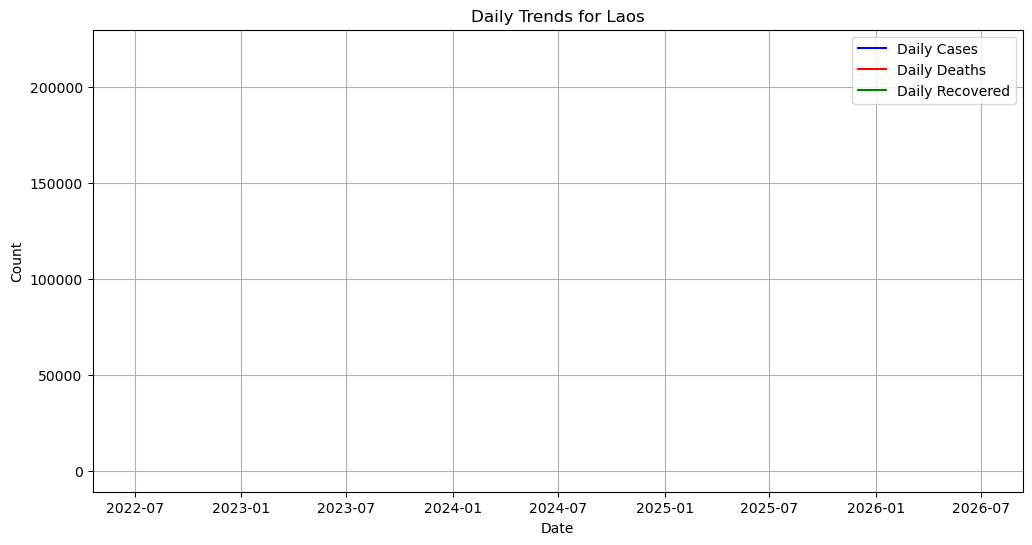

Data for Latvia:
           day   Cases  Deaths  Recovered
128 2024-06-30  982505  6715.0   971406.0
Data types for Latvia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


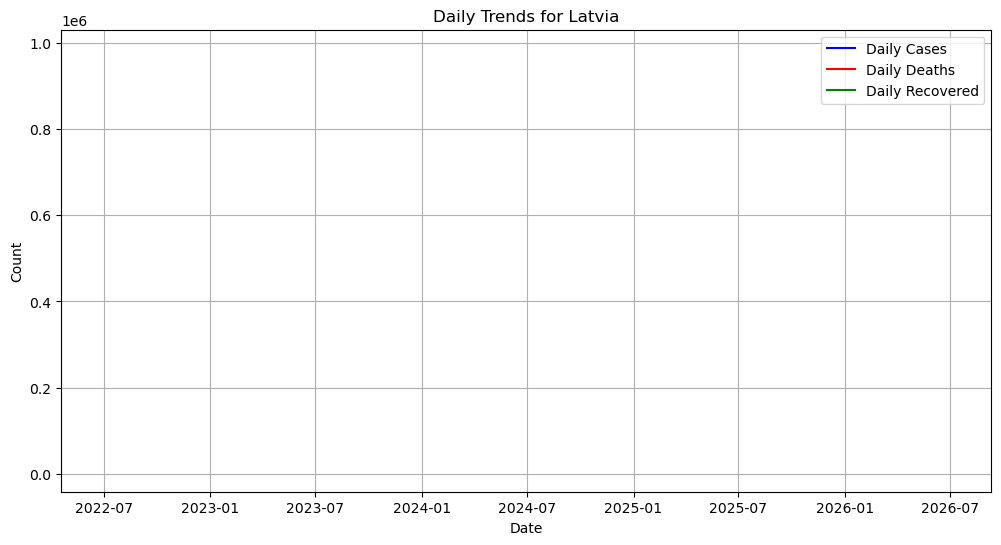

Data for Lebanon:
           day    Cases   Deaths  Recovered
206 2024-06-30  1243838  10952.0  1087587.0
Data types for Lebanon:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


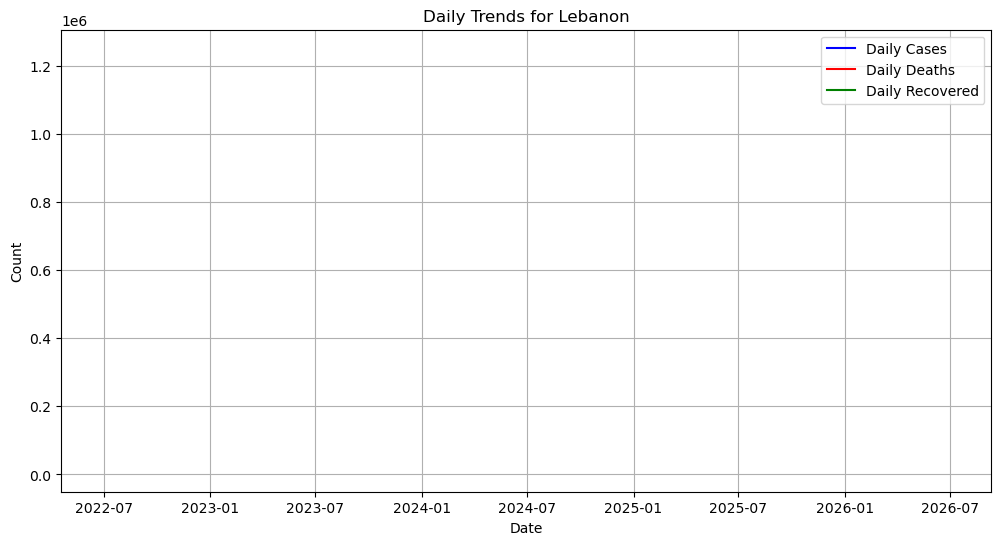

Data for Lesotho:
          day  Cases  Deaths  Recovered
79 2024-06-30  36138   723.0    25980.0
Data types for Lesotho:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


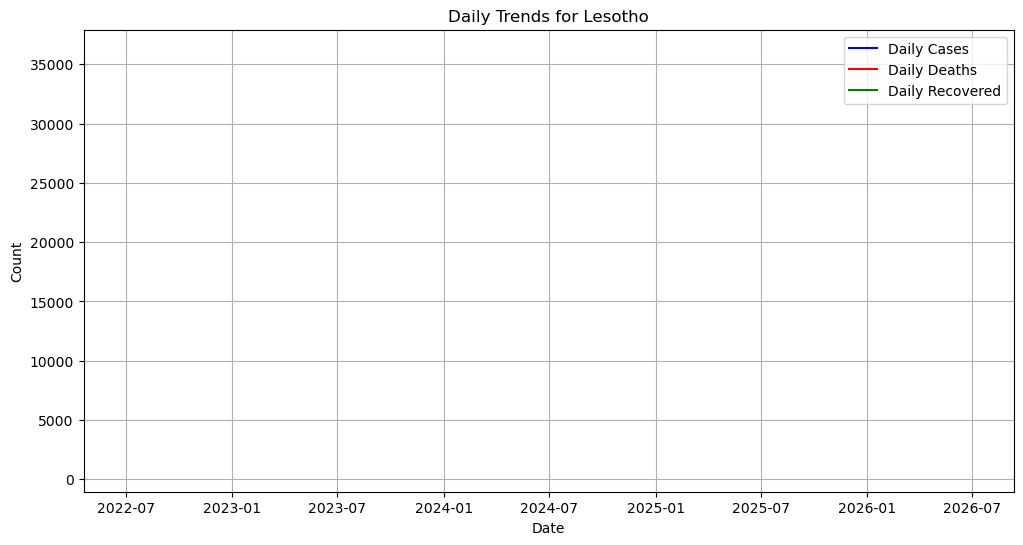

Data for Liberia:
          day  Cases  Deaths  Recovered
19 2024-06-30   8090   295.0     7783.0
Data types for Liberia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


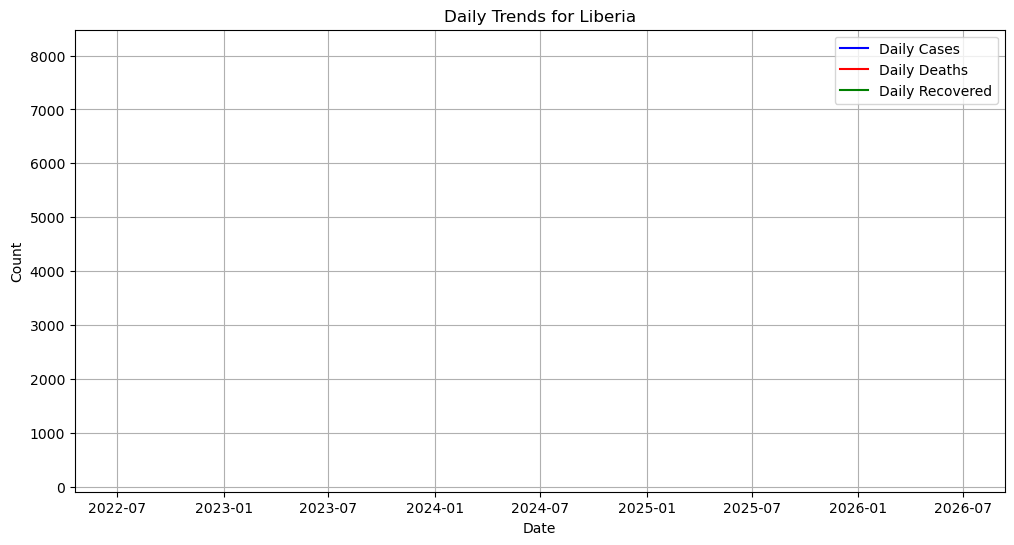

Data for Libya:
           day   Cases  Deaths  Recovered
141 2024-06-30  507274  6437.0   500835.0
Data types for Libya:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


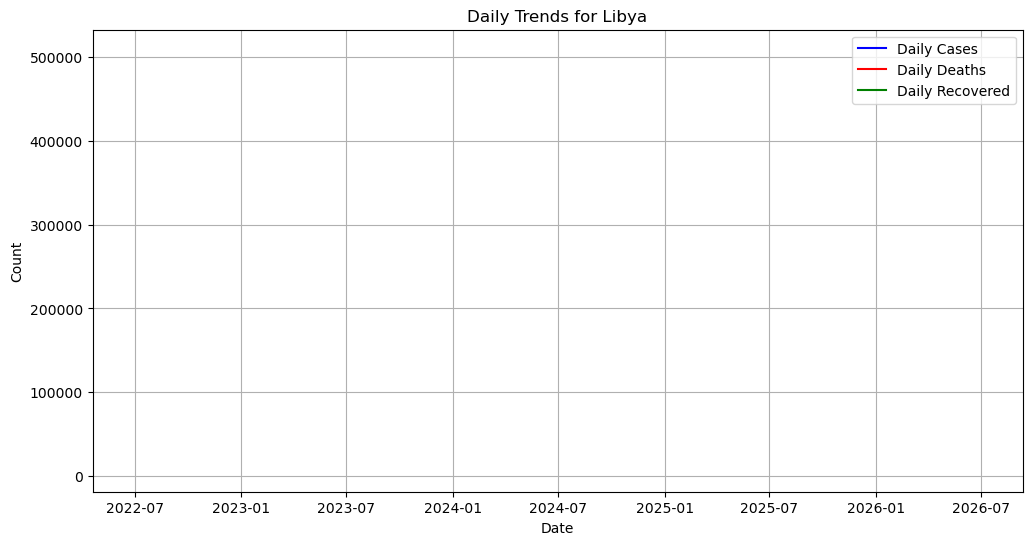

Data for Liechtenstein:
          day  Cases  Deaths  Recovered
36 2024-06-30  21574    94.0        0.0
Data types for Liechtenstein:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


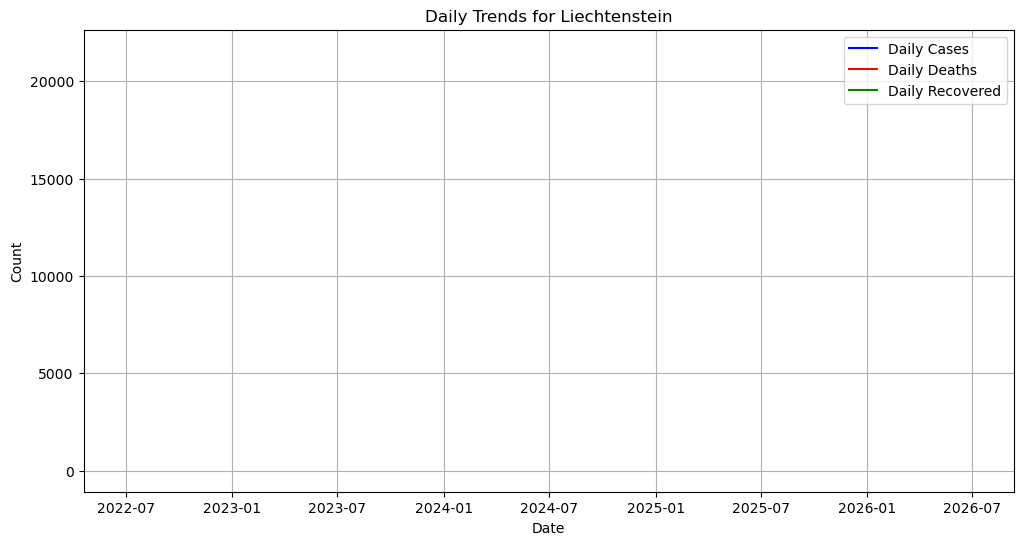

Data for Lithuania:
           day    Cases  Deaths  Recovered
200 2024-06-30  1397806  9897.0  1387478.0
Data types for Lithuania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


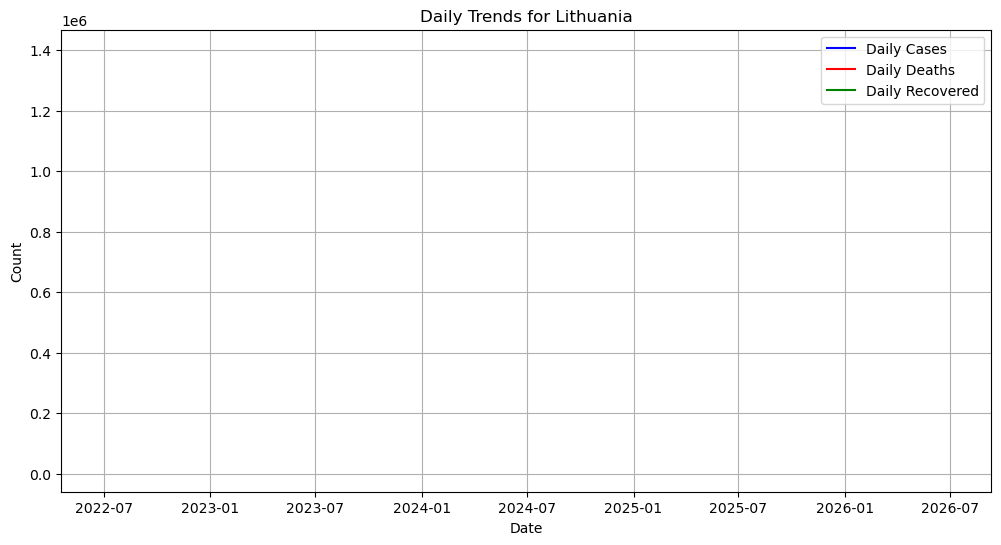

Data for Luxembourg:
           day   Cases  Deaths  Recovered
148 2024-06-30  391232  1232.0        0.0
Data types for Luxembourg:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


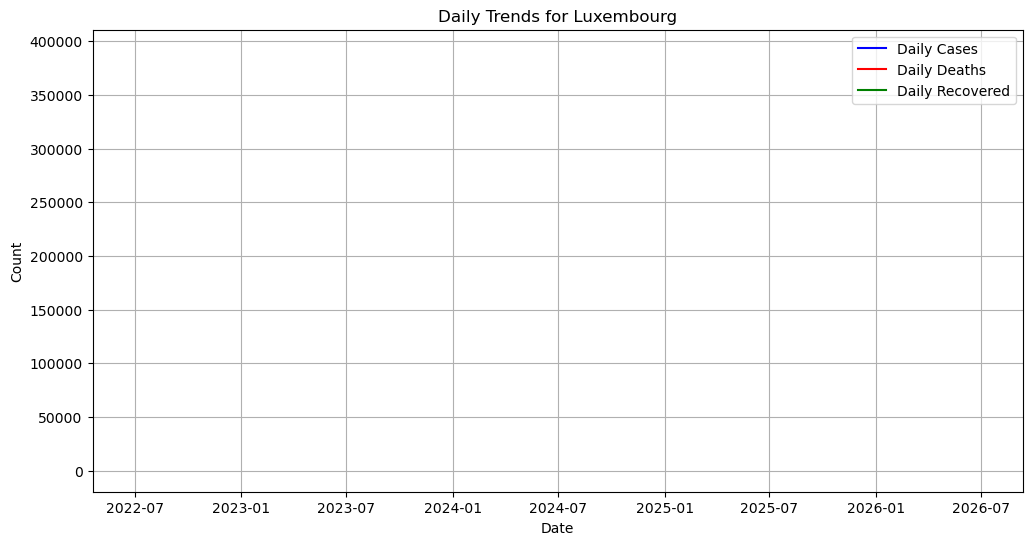

Data for MS-Zaandam:
         day  Cases  Deaths  Recovered
6 2024-06-30      9     2.0        7.0
Data types for MS-Zaandam:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


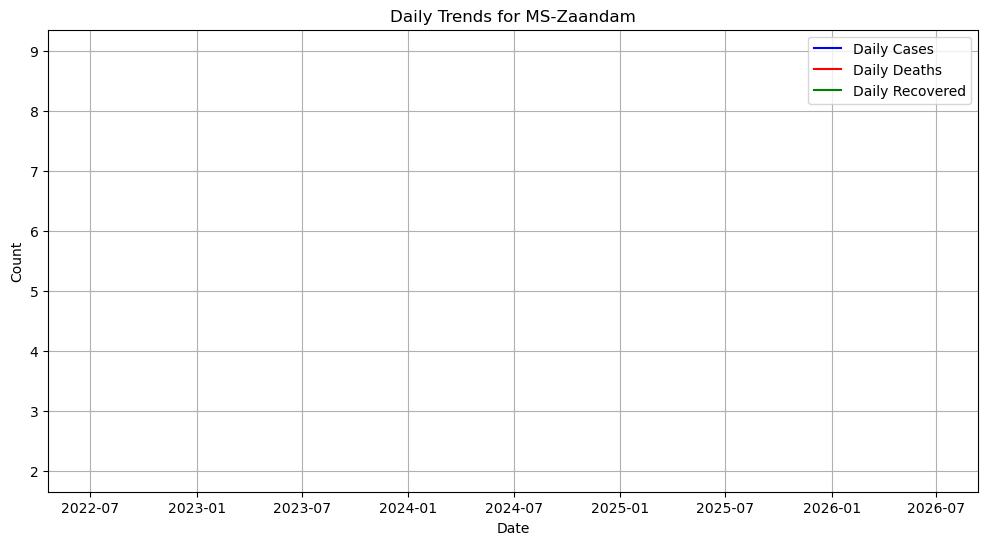

Data for Macao:
          day  Cases  Deaths  Recovered
85 2024-06-30  27673   123.0     3487.0
Data types for Macao:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


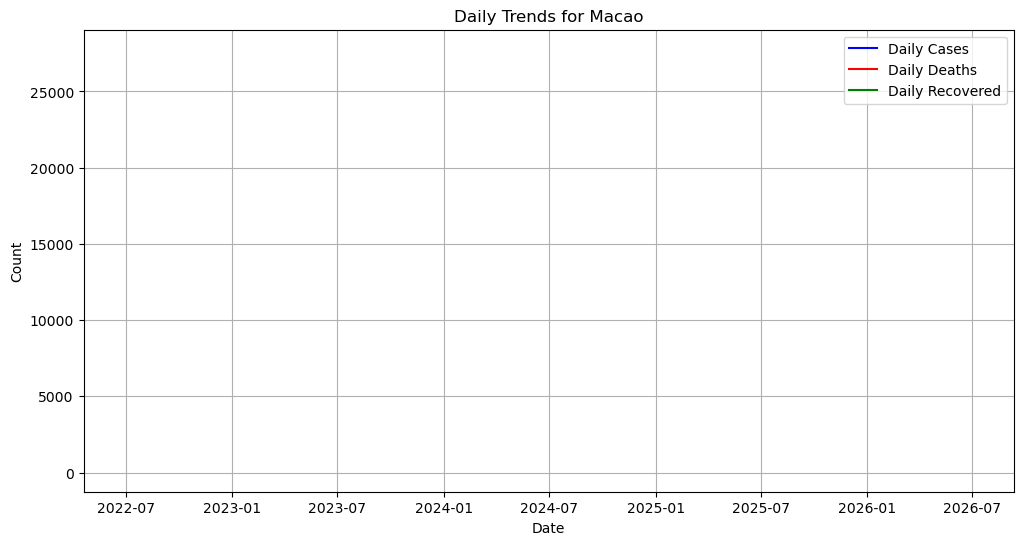

Data for Madagascar:
          day  Cases  Deaths  Recovered
64 2024-06-30  68486  1426.0    66862.0
Data types for Madagascar:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


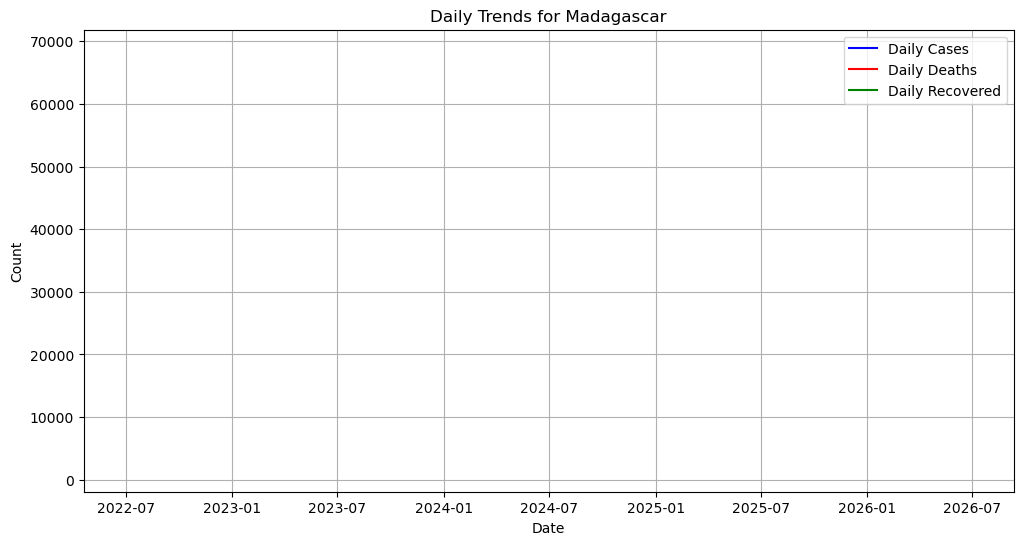

Data for Malawi:
           day  Cases  Deaths  Recovered
109 2024-06-30  89535  2686.0        0.0
Data types for Malawi:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


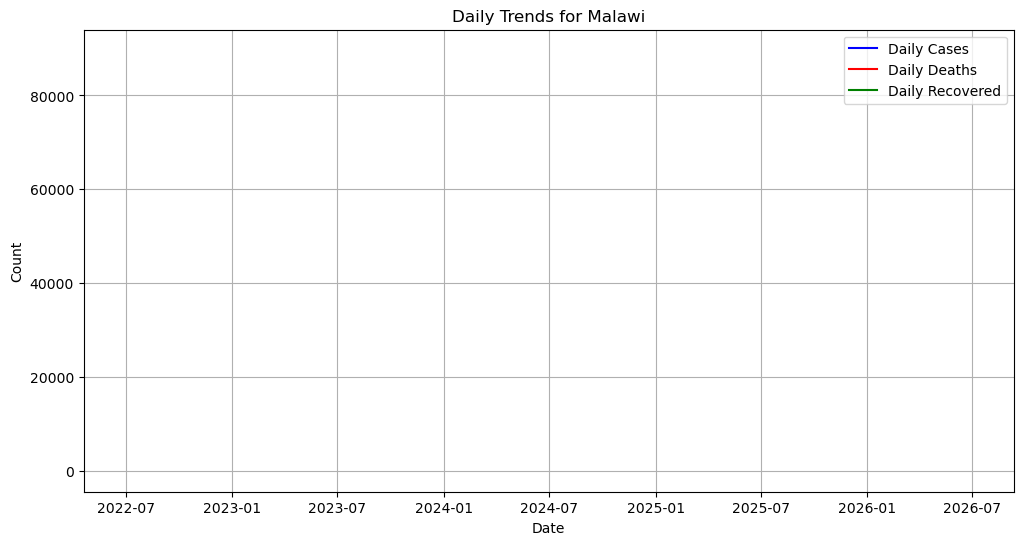

Data for Malaysia:
           day    Cases   Deaths  Recovered
175 2024-06-30  5278406  37348.0  5233268.0
Data types for Malaysia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


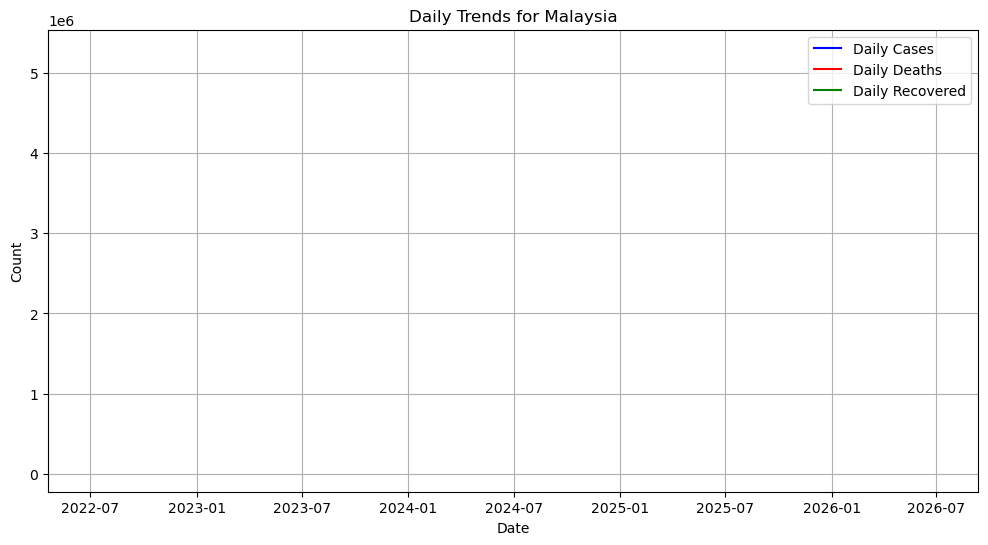

Data for Maldives:
          day   Cases  Deaths  Recovered
97 2024-06-30  186694   316.0   163687.0
Data types for Maldives:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


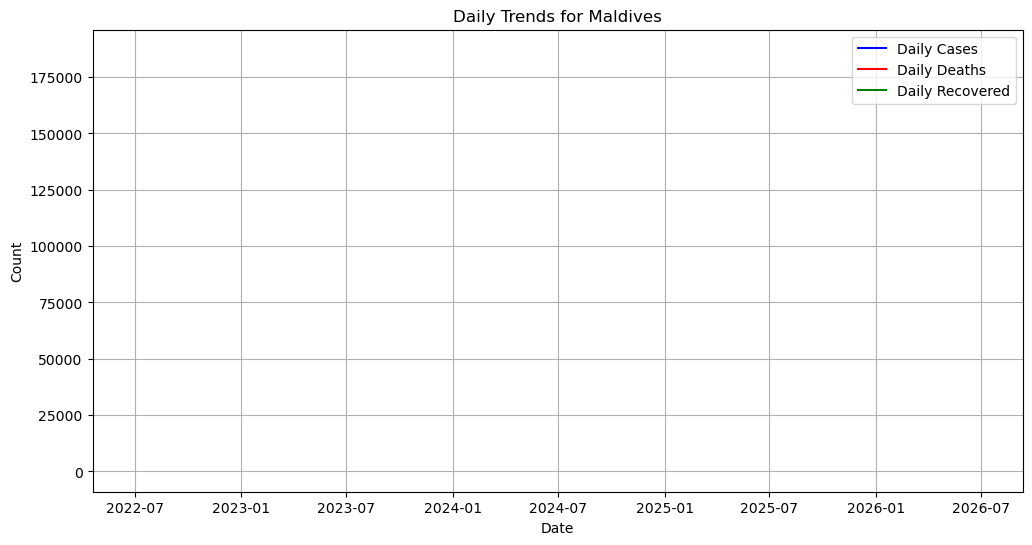

Data for Mali:
          day  Cases  Deaths  Recovered
82 2024-06-30  33164   743.0    32332.0
Data types for Mali:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


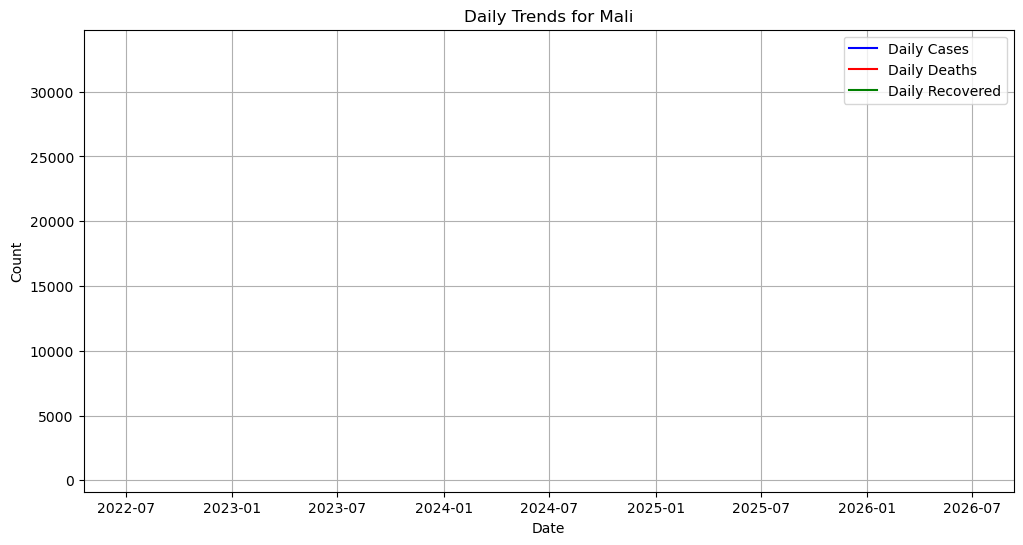

Data for Malta:
           day   Cases  Deaths  Recovered
105 2024-06-30  121420   885.0   120149.0
Data types for Malta:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


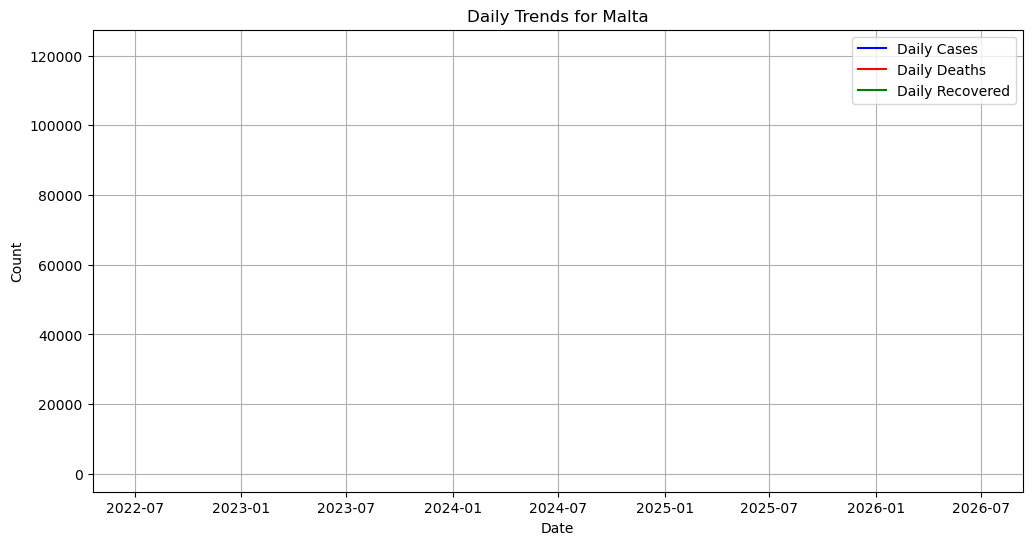

Data for Marshall-Islands:
          day  Cases  Deaths  Recovered
42 2024-06-30  16138    17.0    16121.0
Data types for Marshall-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


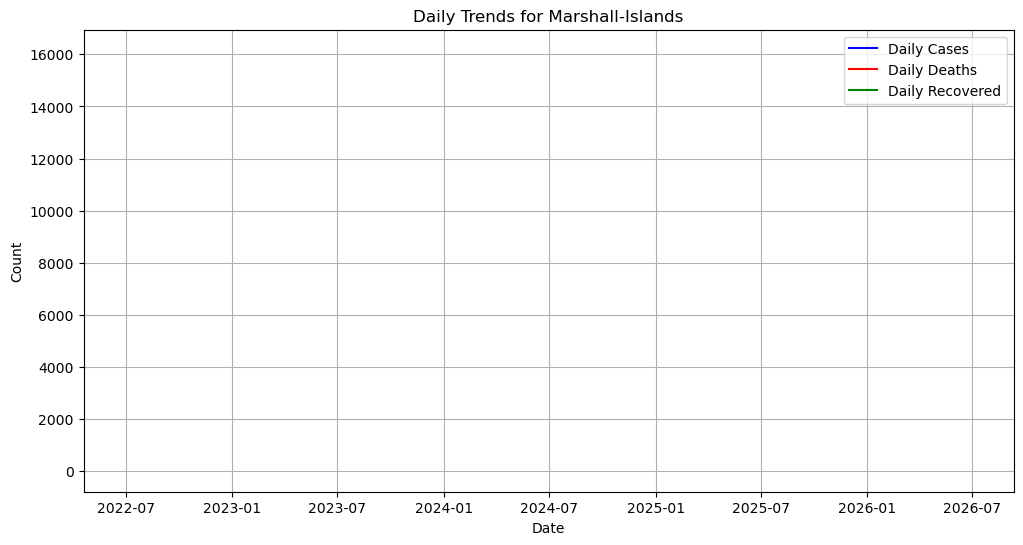

Data for Martinique:
           day   Cases  Deaths  Recovered
161 2024-06-30  230354  1102.0        0.0
Data types for Martinique:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


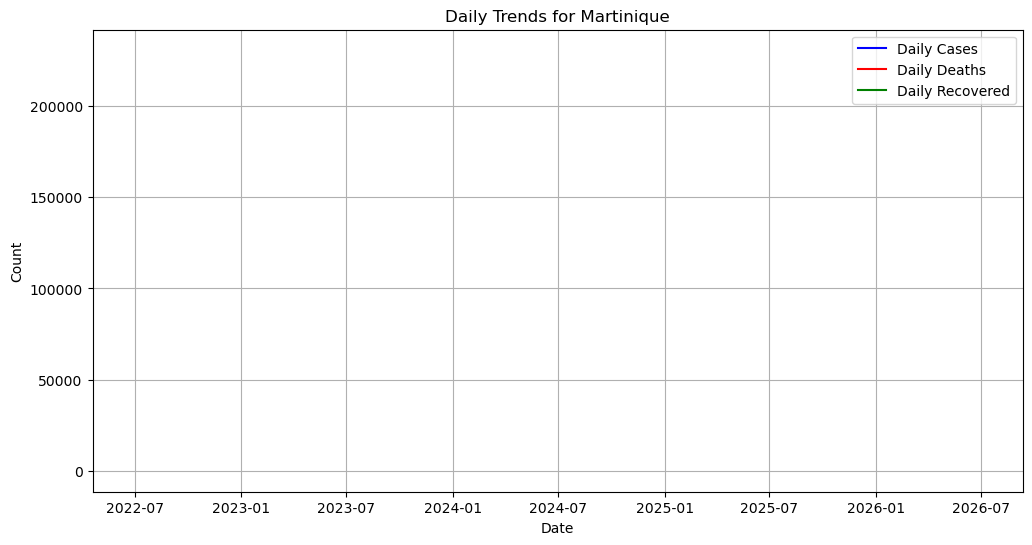

Data for Mauritania:
          day  Cases  Deaths  Recovered
67 2024-06-30  63848   997.0    62471.0
Data types for Mauritania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


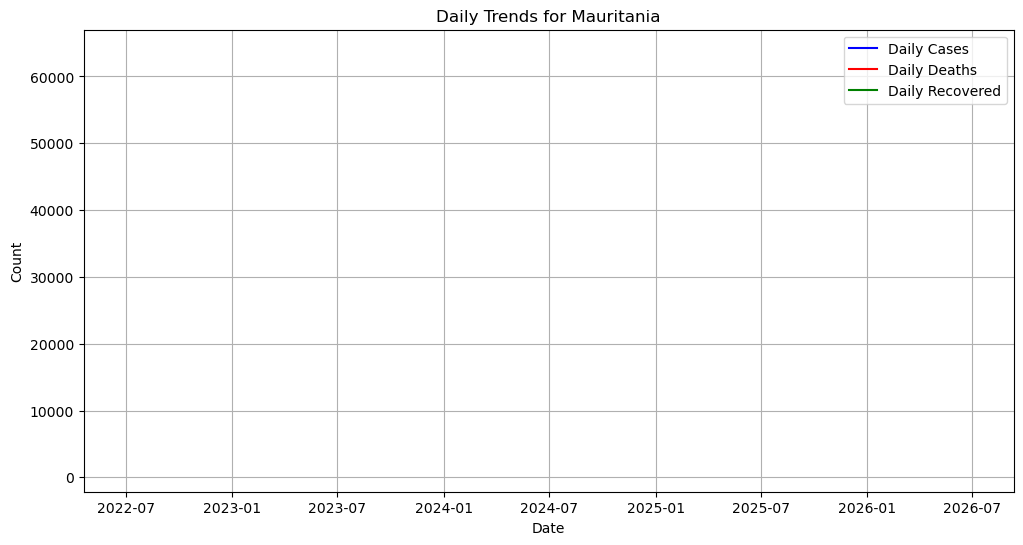

Data for Mauritius:
          day  Cases  Deaths  Recovered
76 2024-06-30  43025  1051.0    41278.0
Data types for Mauritius:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


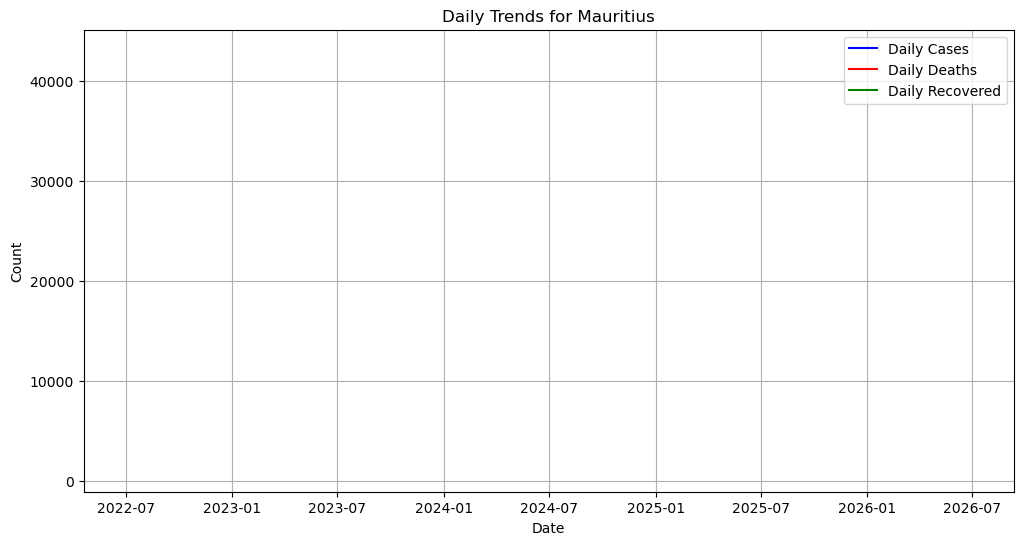

Data for Mayotte:
          day  Cases  Deaths  Recovered
61 2024-06-30  42027   188.0        0.0
Data types for Mayotte:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


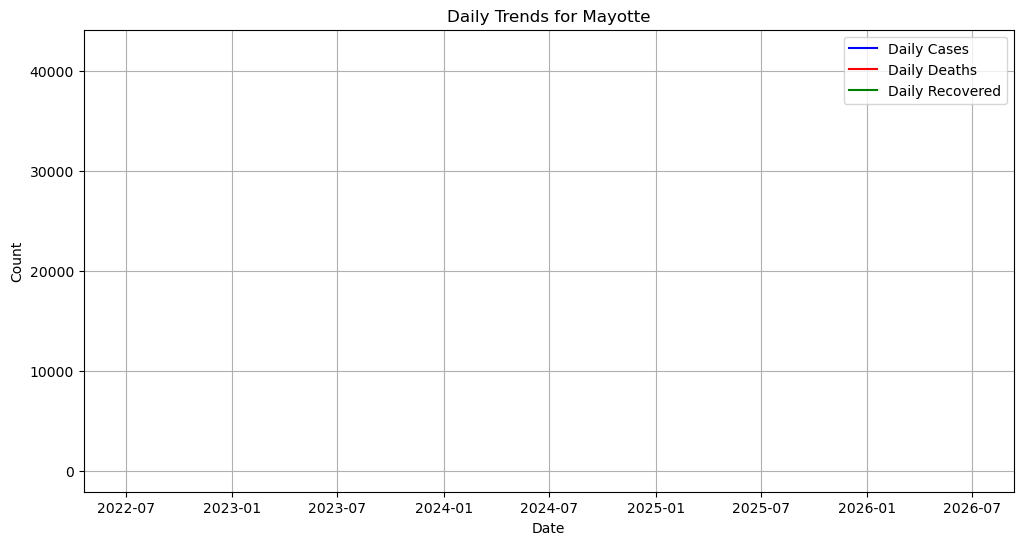

Data for Mexico:
           day    Cases    Deaths  Recovered
235 2024-06-30  7702809  334958.0  6899865.0
Data types for Mexico:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


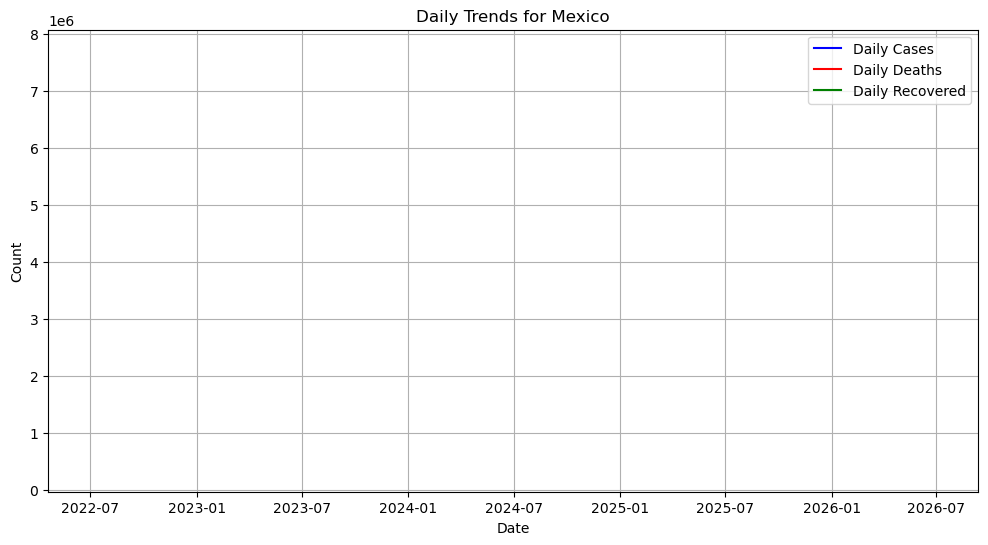

Data for Micronesia:
          day  Cases  Deaths  Recovered
86 2024-06-30  26547    65.0        0.0
Data types for Micronesia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


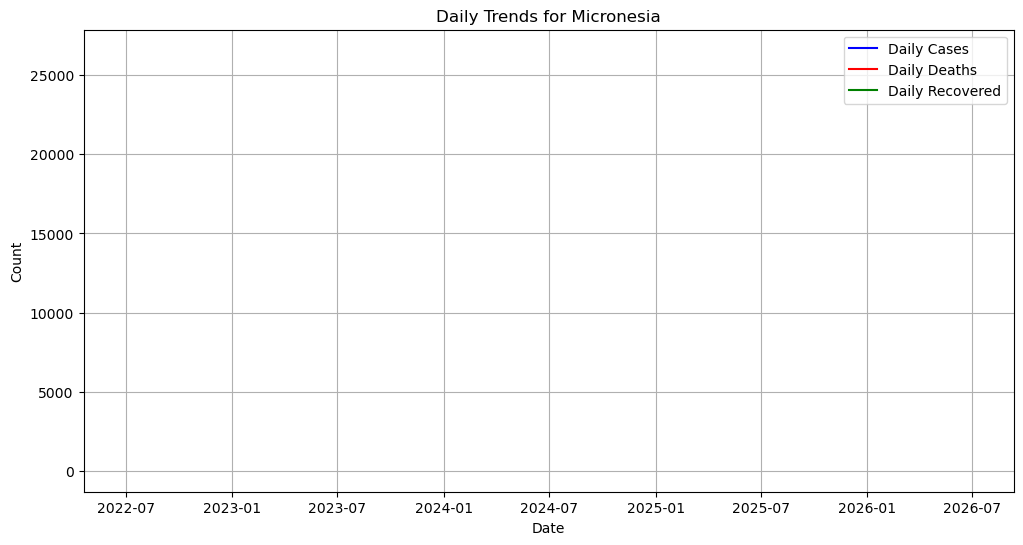

Data for Moldova:
           day   Cases   Deaths  Recovered
138 2024-06-30  635145  12218.0        0.0
Data types for Moldova:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


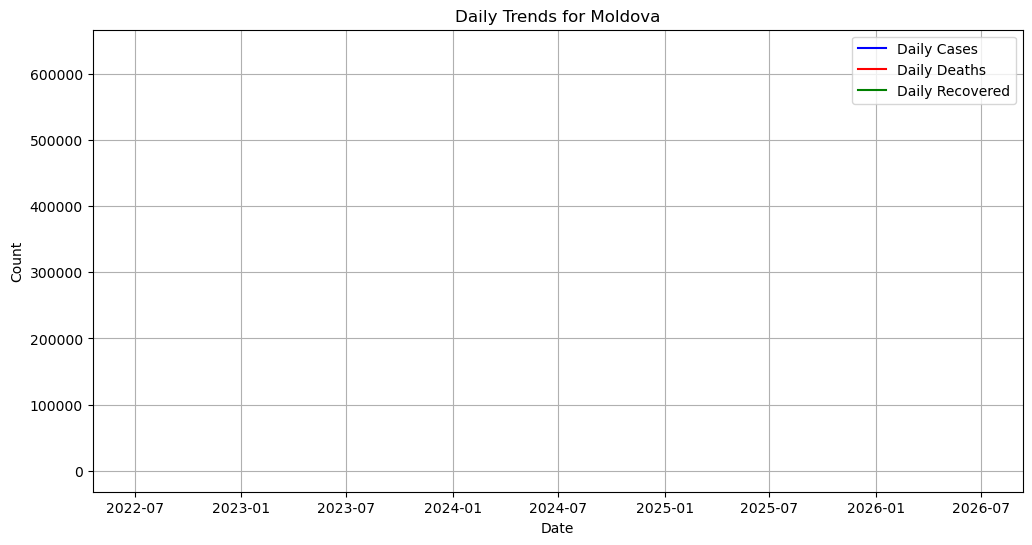

Data for Monaco:
          day  Cases  Deaths  Recovered
39 2024-06-30  17181    67.0        0.0
Data types for Monaco:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


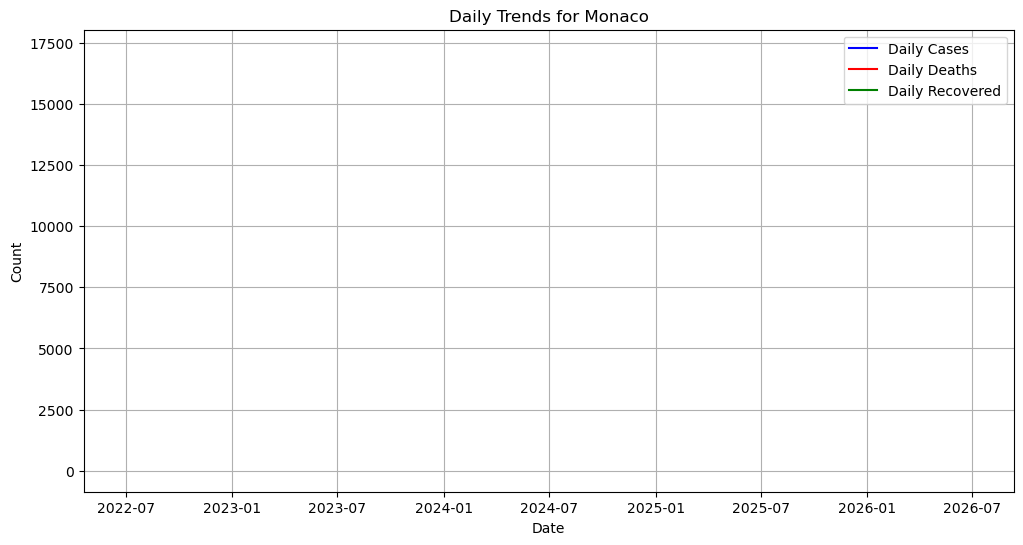

Data for Mongolia:
           day    Cases  Deaths  Recovered
126 2024-06-30  1011496  2284.0  1009212.0
Data types for Mongolia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


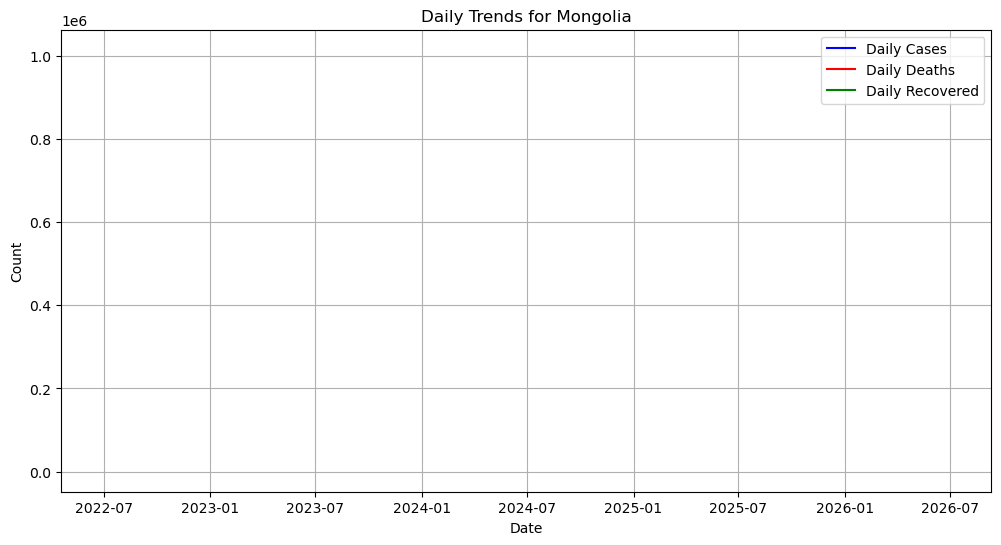

Data for Montenegro:
           day   Cases  Deaths  Recovered
155 2024-06-30  296542  2846.0   291794.0
Data types for Montenegro:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


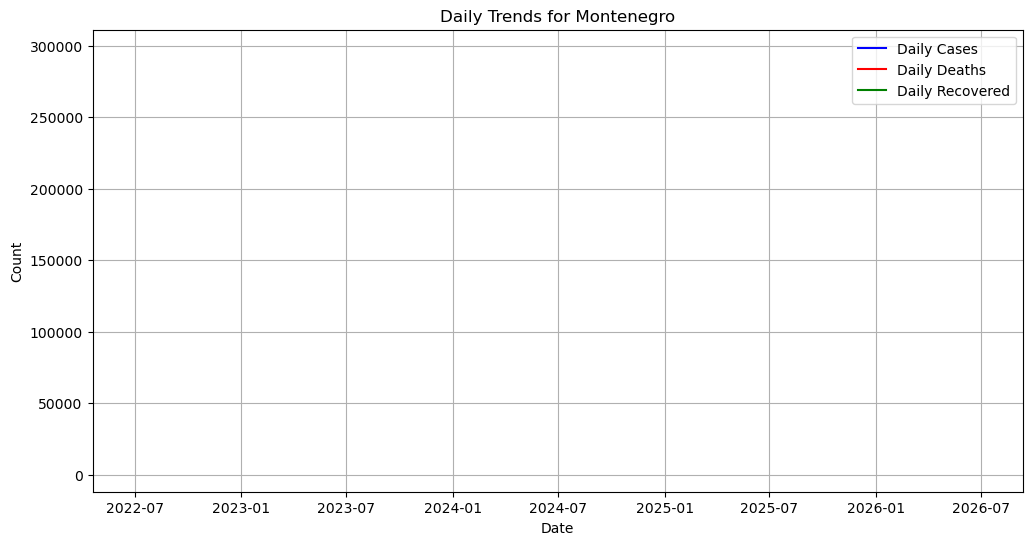

Data for Montserrat:
         day  Cases  Deaths  Recovered
2 2024-06-30   1403     8.0     1376.0
Data types for Montserrat:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


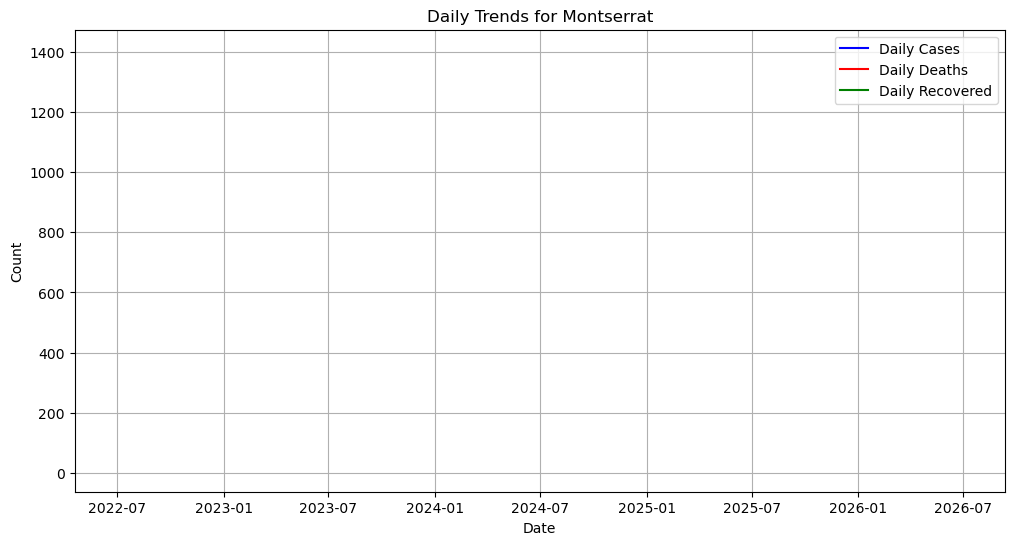

Data for Morocco:
           day    Cases   Deaths  Recovered
205 2024-06-30  1278992  16303.0        0.0
Data types for Morocco:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


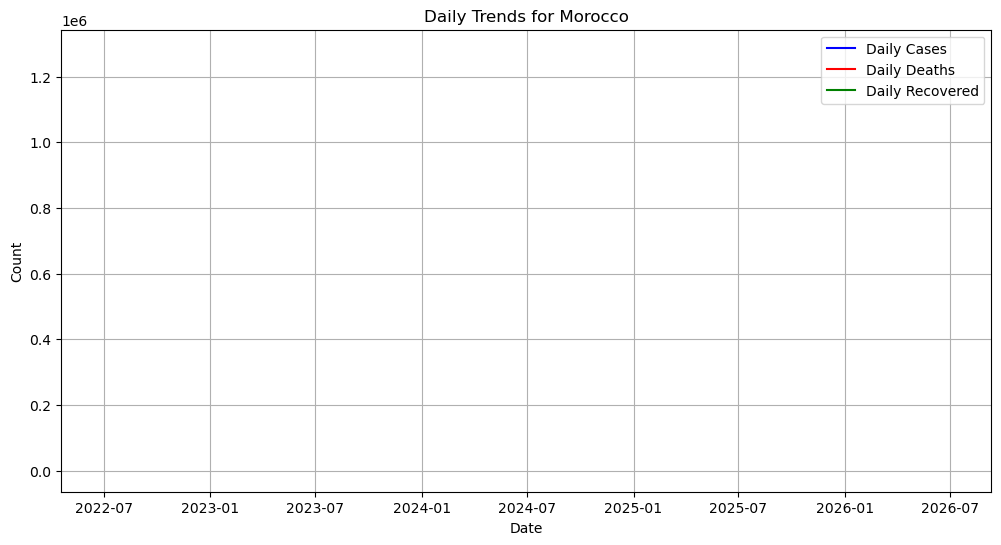

Data for Mozambique:
           day   Cases  Deaths  Recovered
160 2024-06-30  233731  2250.0   228805.0
Data types for Mozambique:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


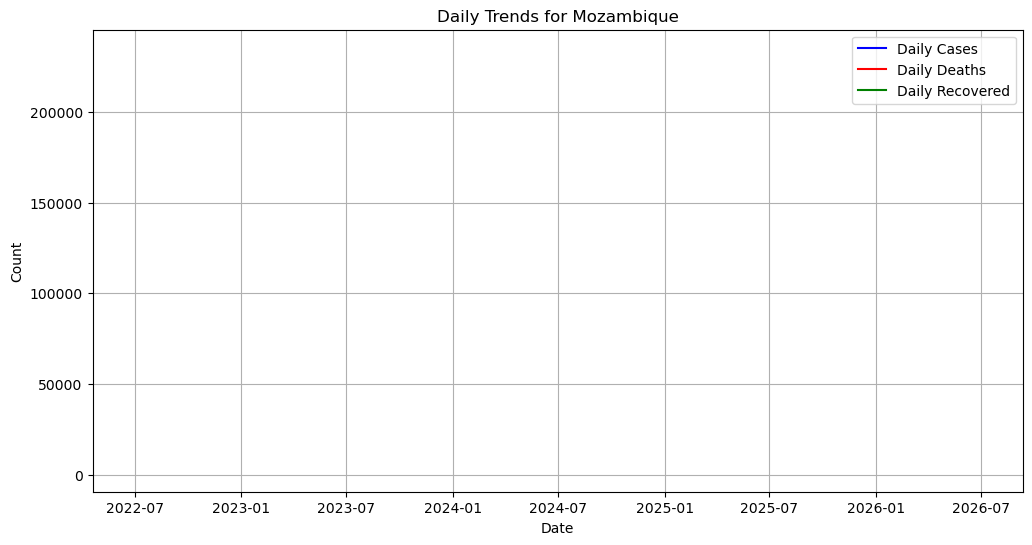

Data for Myanmar:
           day   Cases   Deaths  Recovered
137 2024-06-30  641873  19495.0   620159.0
Data types for Myanmar:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


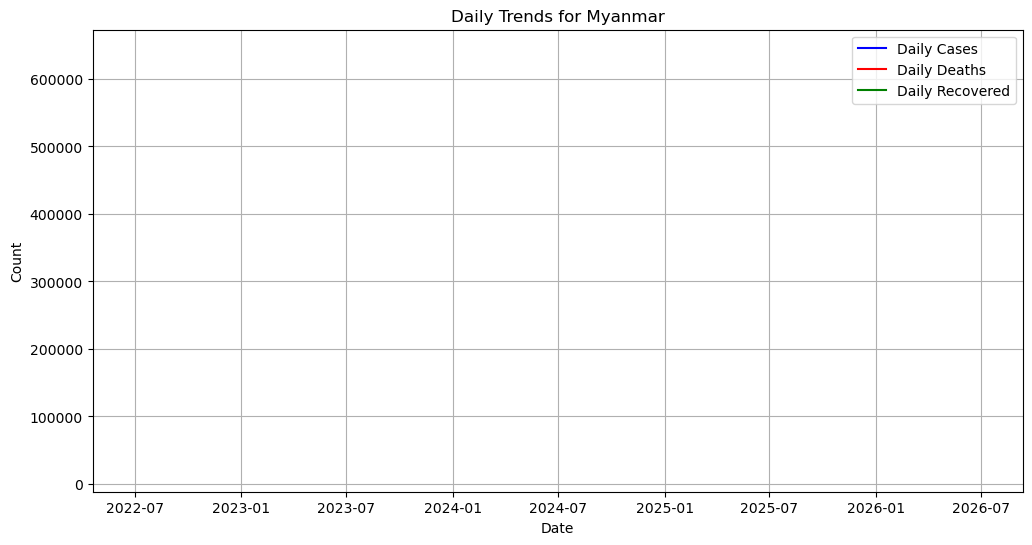

Data for Namibia:
          day   Cases  Deaths  Recovered
98 2024-06-30  172389  4106.0   167099.0
Data types for Namibia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


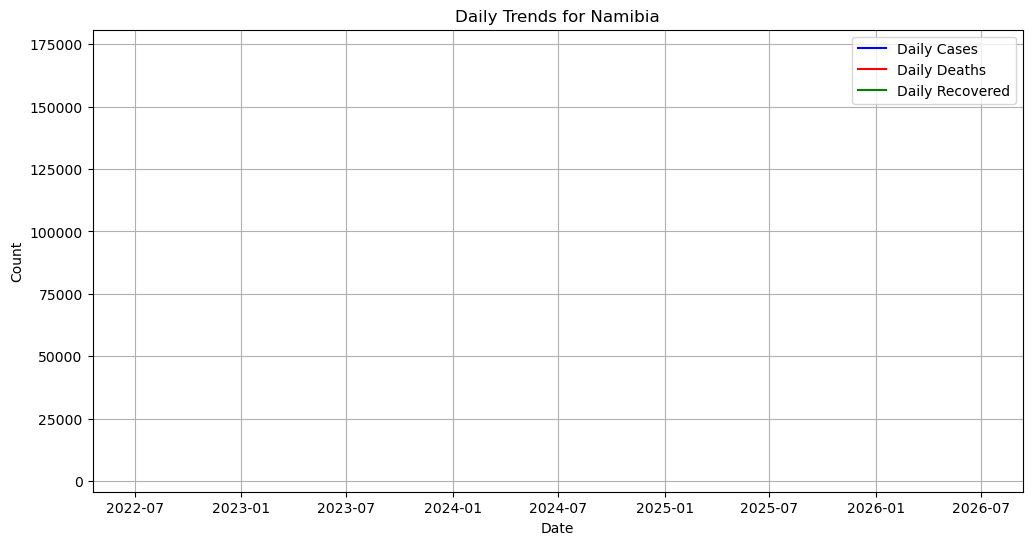

Data for Nauru:
          day  Cases  Deaths  Recovered
20 2024-06-30   5393     1.0     5347.0
Data types for Nauru:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


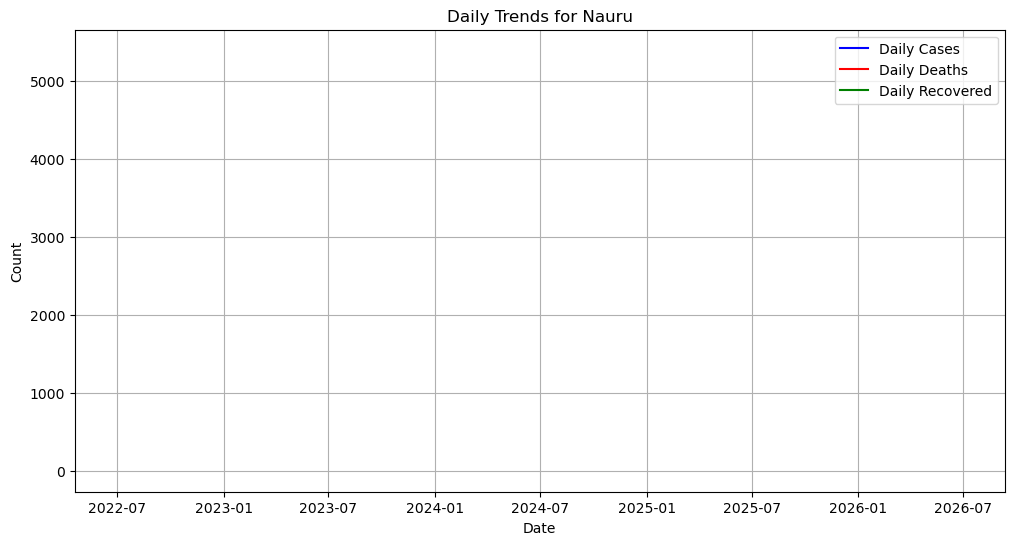

Data for Nepal:
           day    Cases   Deaths  Recovered
127 2024-06-30  1003450  12031.0   991322.0
Data types for Nepal:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


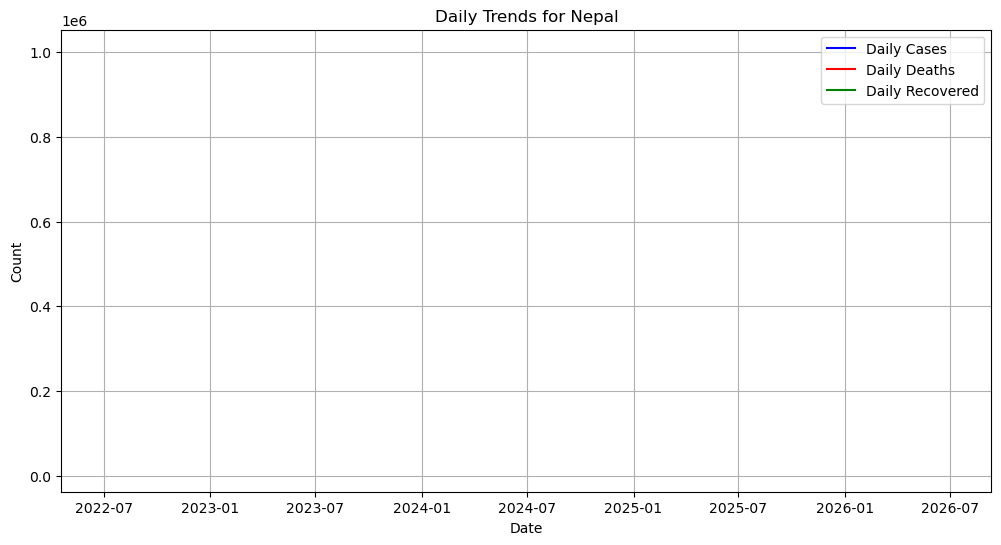

Data for Netherlands:
           day    Cases   Deaths  Recovered
234 2024-06-30  8635786  22992.0  8612599.0
Data types for Netherlands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


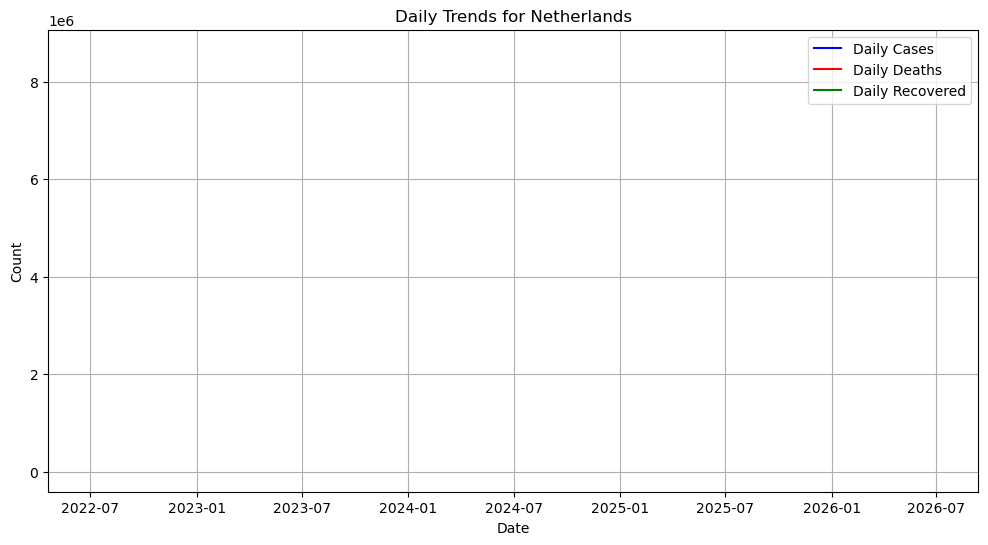

Data for New-Caledonia:
           day  Cases  Deaths  Recovered
112 2024-06-30  80064   314.0        0.0
Data types for New-Caledonia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


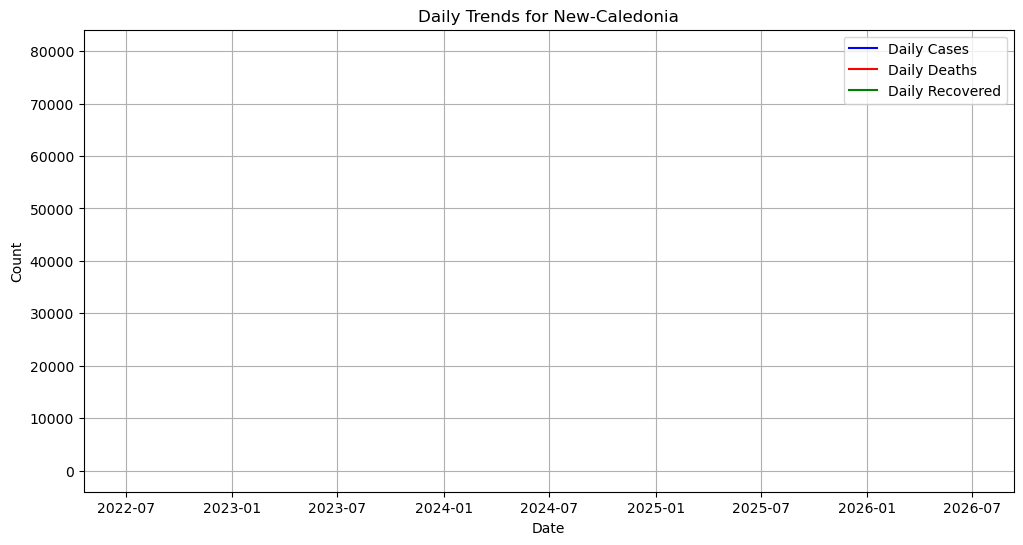

Data for New-Zealand:
           day    Cases  Deaths  Recovered
189 2024-06-30  2621111  5697.0  2613791.0
Data types for New-Zealand:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


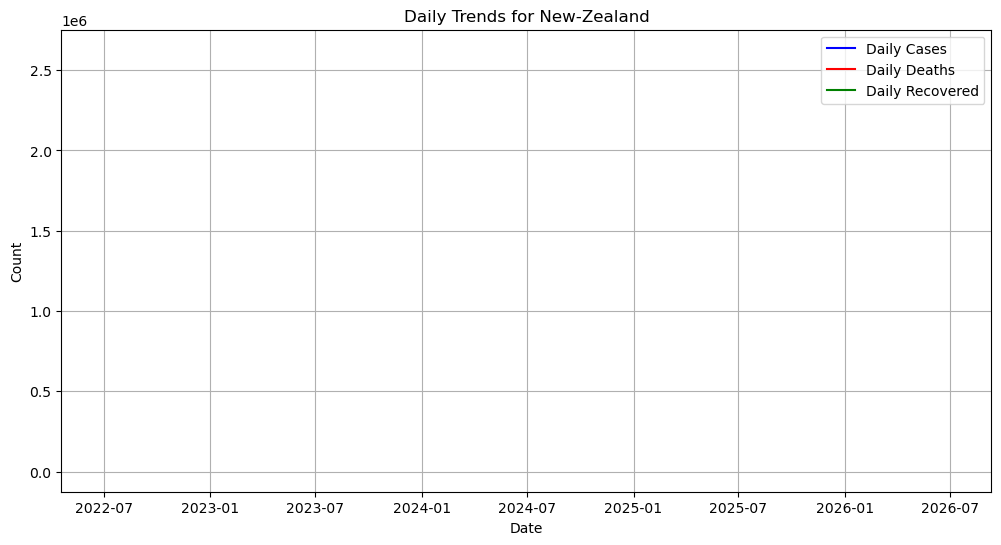

Data for Nicaragua:
          day  Cases  Deaths  Recovered
12 2024-06-30  18491   225.0     4225.0
Data types for Nicaragua:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


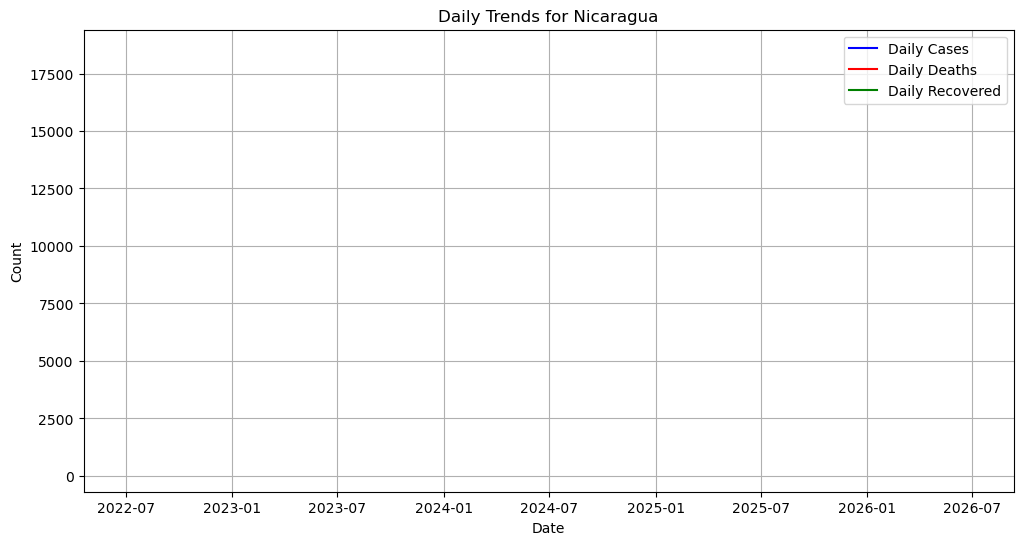

Data for Niger:
          day  Cases  Deaths  Recovered
17 2024-06-30   9931   312.0     8890.0
Data types for Niger:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


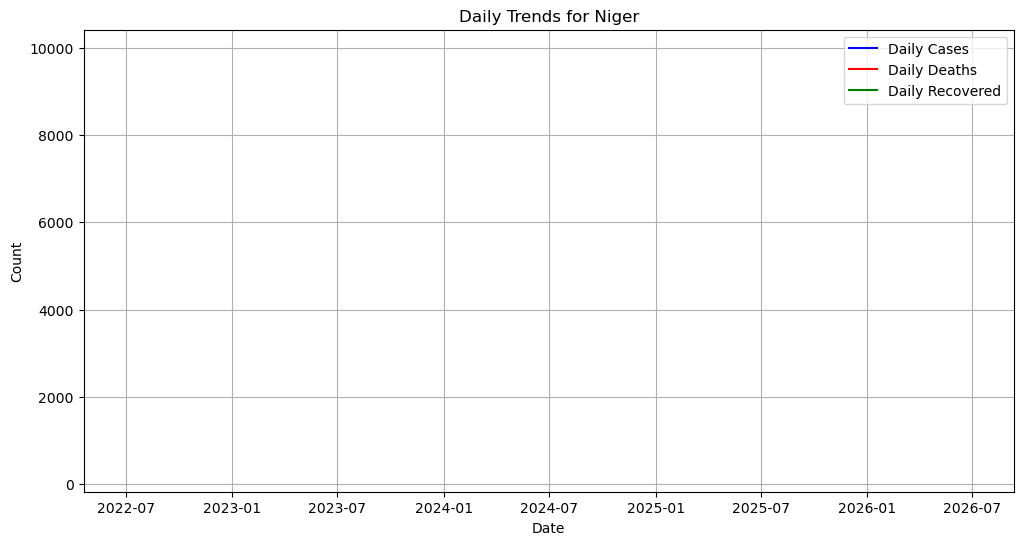

Data for Nigeria:
           day   Cases  Deaths  Recovered
157 2024-06-30  267188  3155.0   259953.0
Data types for Nigeria:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


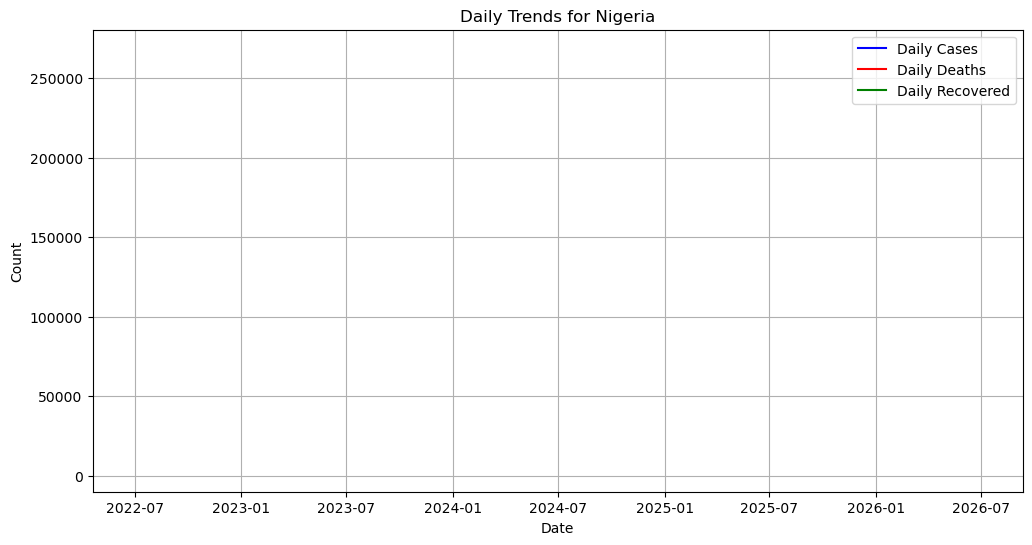

Data for Niue:
          day  Cases  Deaths  Recovered
11 2024-06-30   1059     0.0     1056.0
Data types for Niue:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


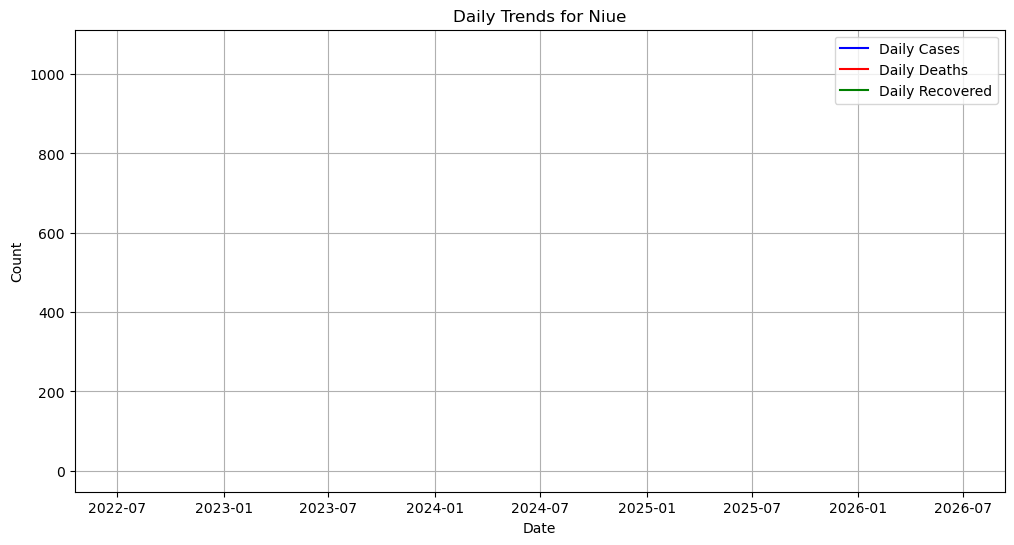

Data for North-America:
           day      Cases     Deaths    Recovered
212 2024-06-30  131889132  1695941.0  127665129.0
Data types for North-America:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


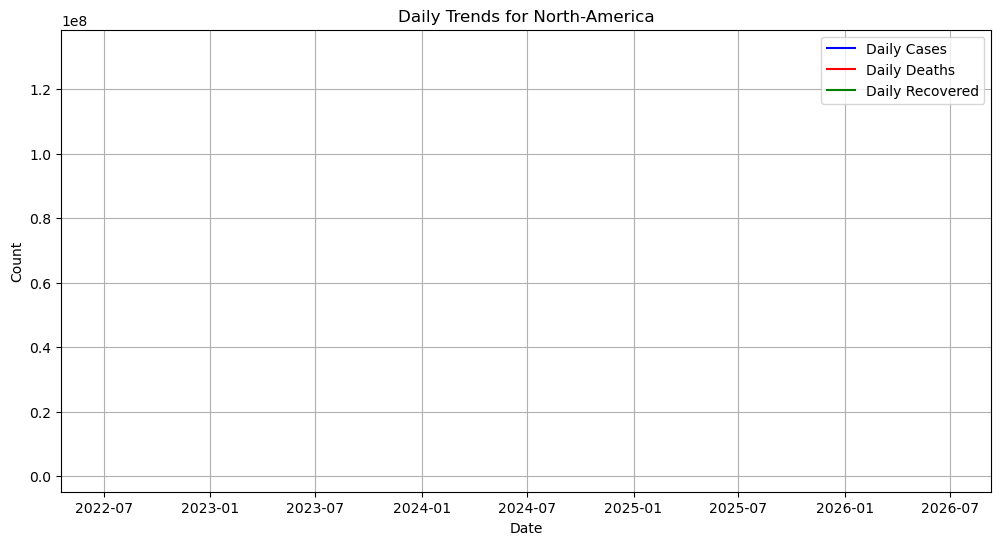

Data for North-Macedonia:
           day   Cases  Deaths  Recovered
149 2024-06-30  350567  9976.0   337068.0
Data types for North-Macedonia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


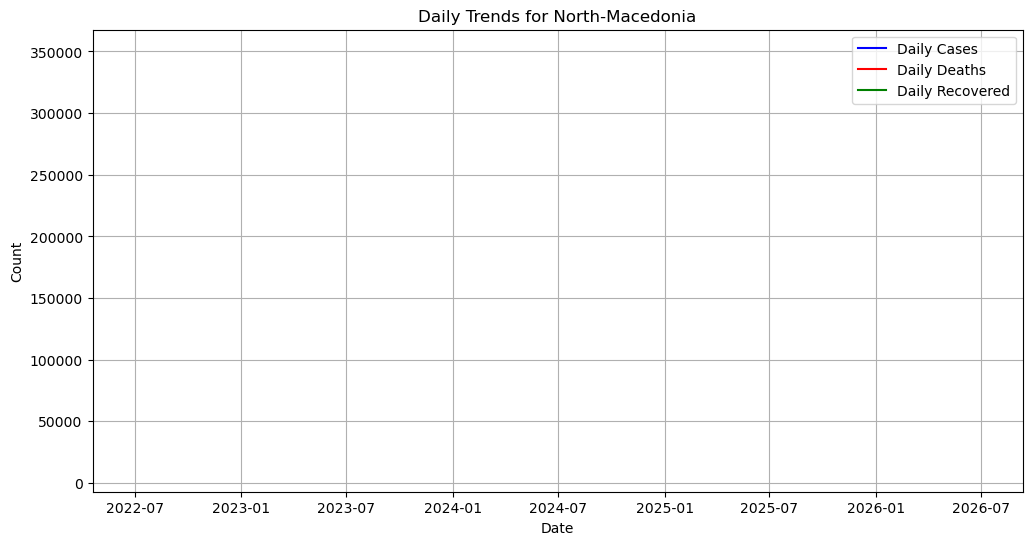

Data for Norway:
           day    Cases  Deaths  Recovered
199 2024-06-30  1509732  6638.0  1503094.0
Data types for Norway:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


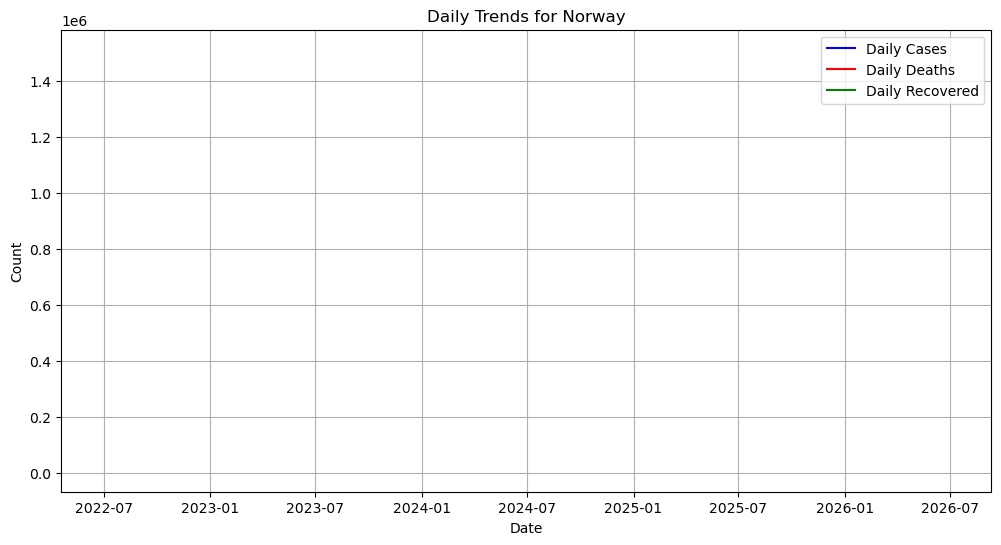

Data for Oceania:
           day     Cases   Deaths   Recovered
216 2024-06-30  14895771  33015.0  14752388.0
Data types for Oceania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


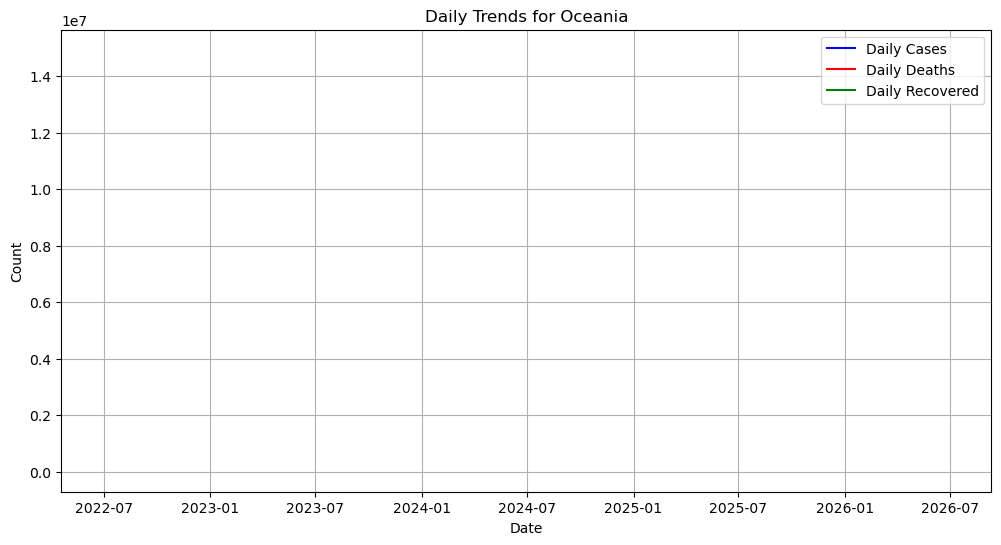

Data for Oman:
           day   Cases  Deaths  Recovered
147 2024-06-30  399449  4628.0        0.0
Data types for Oman:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


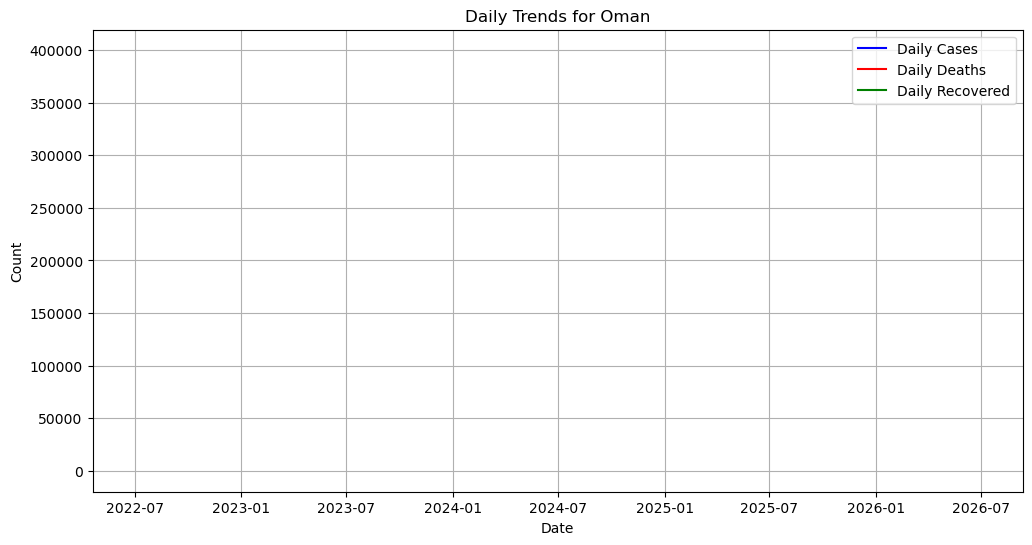

Data for Pakistan:
           day    Cases   Deaths  Recovered
197 2024-06-30  1581936  30664.0  1538689.0
Data types for Pakistan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


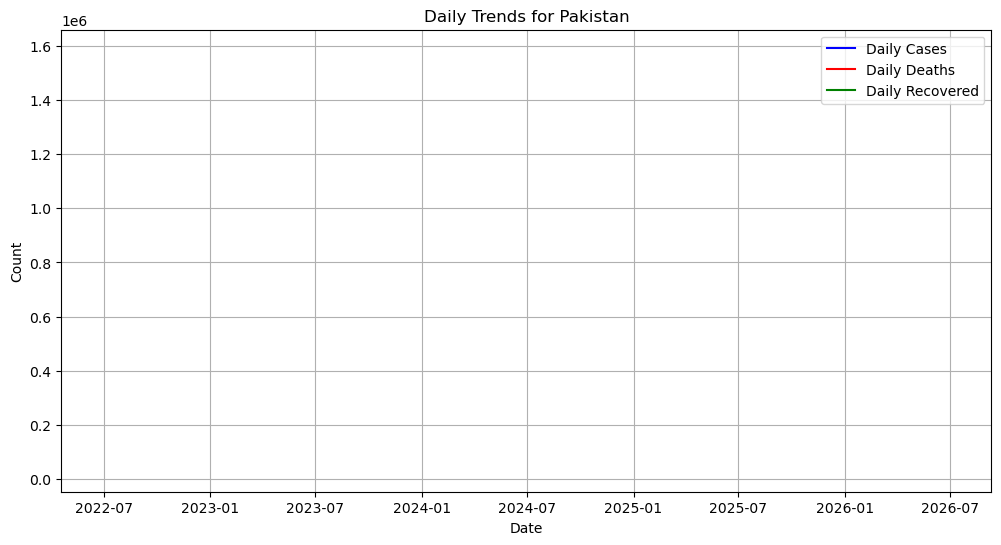

Data for Palau:
          day  Cases  Deaths  Recovered
54 2024-06-30   6290    10.0     6276.0
Data types for Palau:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


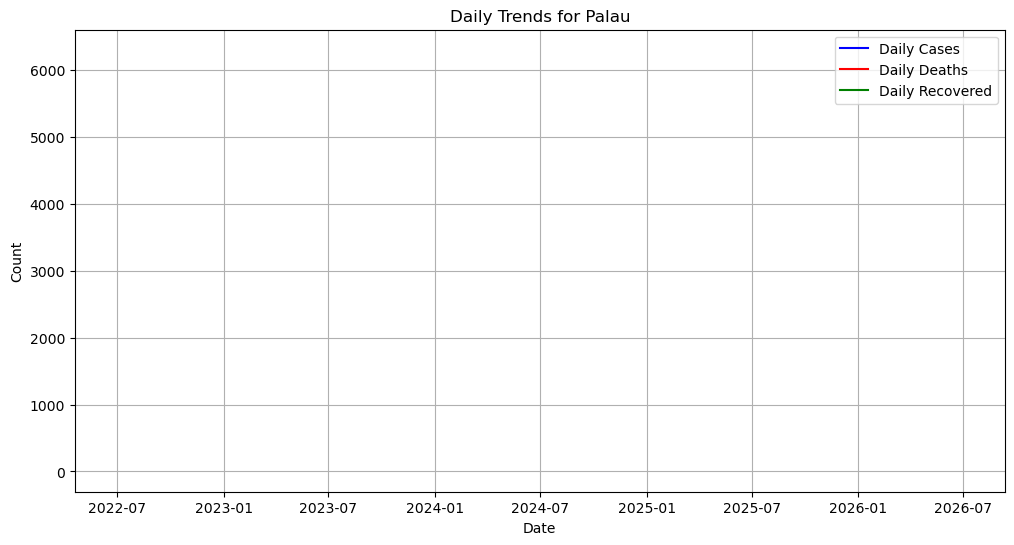

Data for Palestine:
           day   Cases  Deaths  Recovered
140 2024-06-30  621008  5404.0   615445.0
Data types for Palestine:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


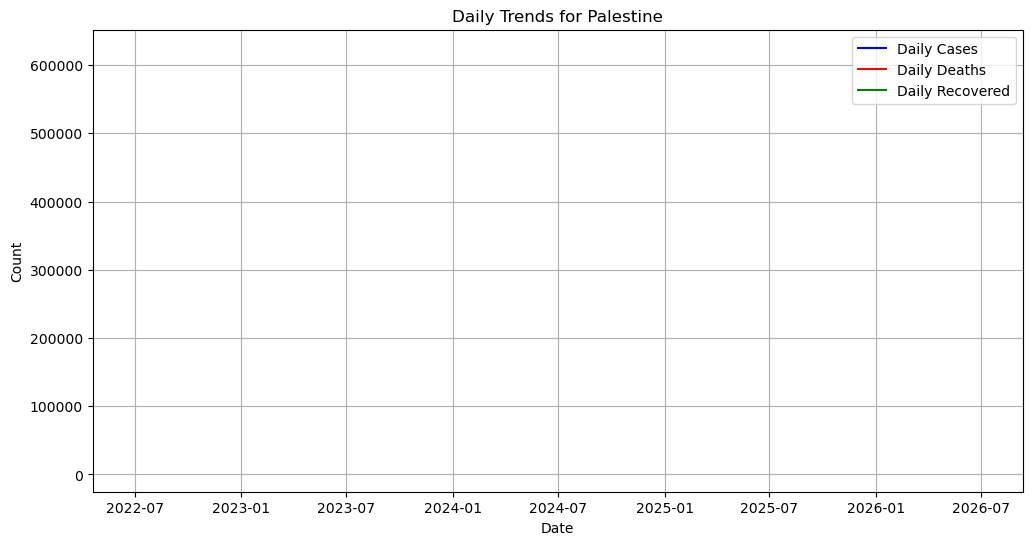

Data for Panama:
           day    Cases  Deaths  Recovered
124 2024-06-30  1059893  8727.0  1051102.0
Data types for Panama:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


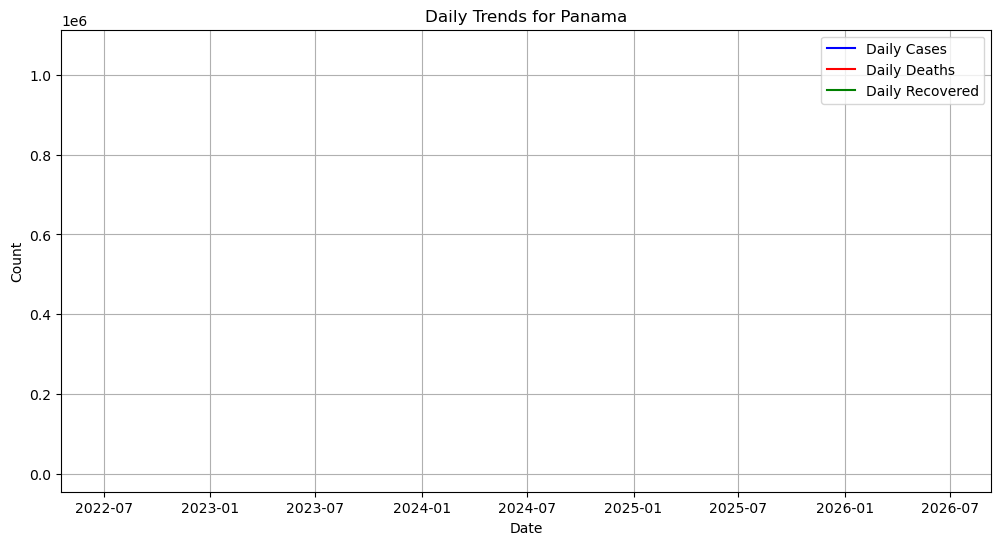

Data for Papua-New-Guinea:
          day  Cases  Deaths  Recovered
74 2024-06-30  46864   670.0    46168.0
Data types for Papua-New-Guinea:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


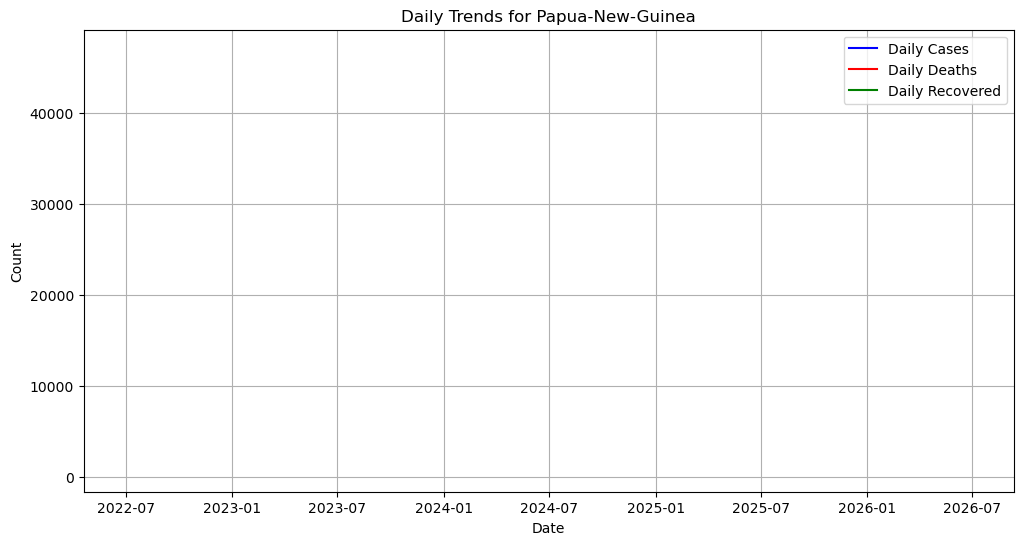

Data for Paraguay:
           day   Cases   Deaths  Recovered
130 2024-06-30  837602  20155.0        0.0
Data types for Paraguay:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


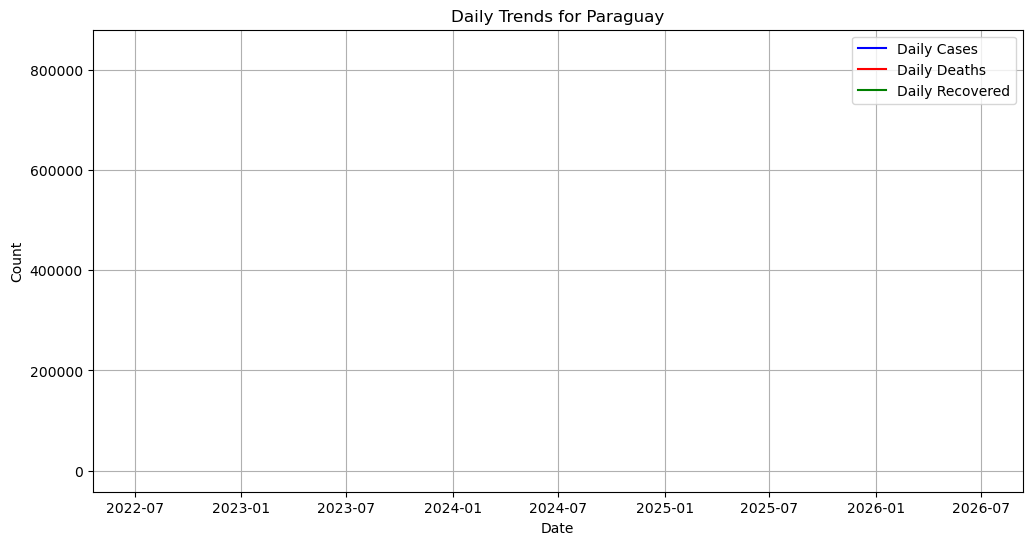

Data for Peru:
           day    Cases    Deaths  Recovered
181 2024-06-30  4572667  222161.0  4350506.0
Data types for Peru:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


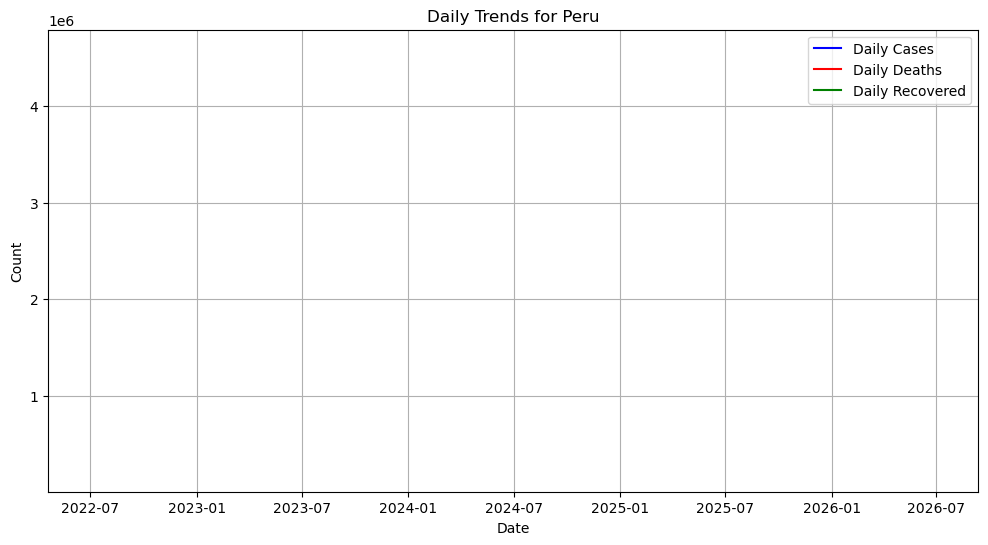

Data for Philippines:
           day    Cases   Deaths  Recovered
183 2024-06-30  4140383  66864.0  4067381.0
Data types for Philippines:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


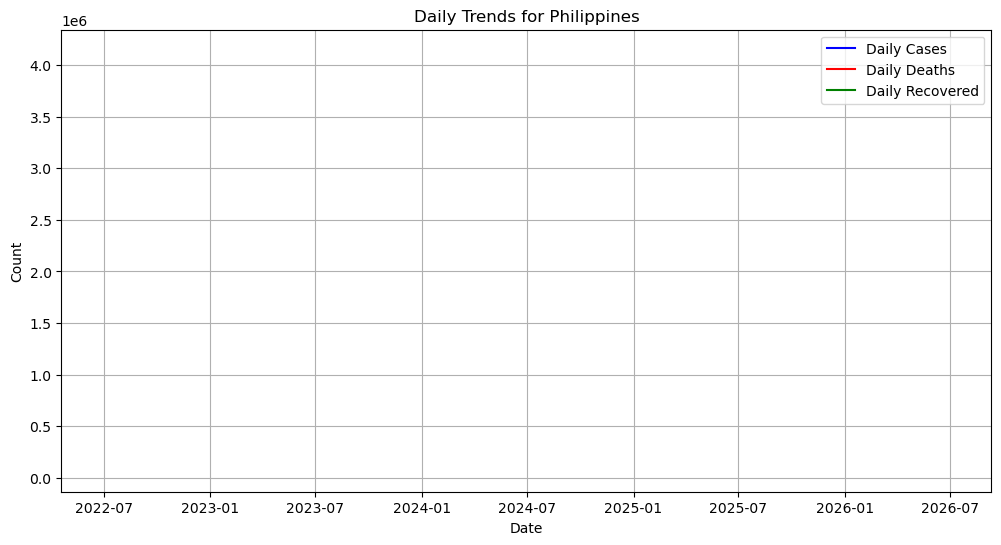

Data for Poland:
           day    Cases    Deaths  Recovered
169 2024-06-30  6661991  120598.0        0.0
Data types for Poland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


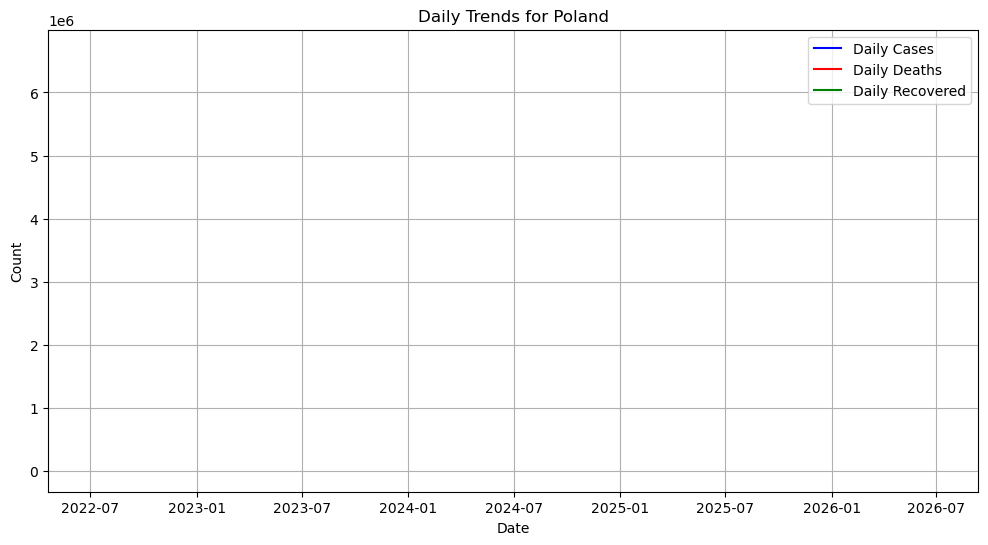

Data for Portugal:
           day    Cases   Deaths  Recovered
173 2024-06-30  5643062  28126.0  5614809.0
Data types for Portugal:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


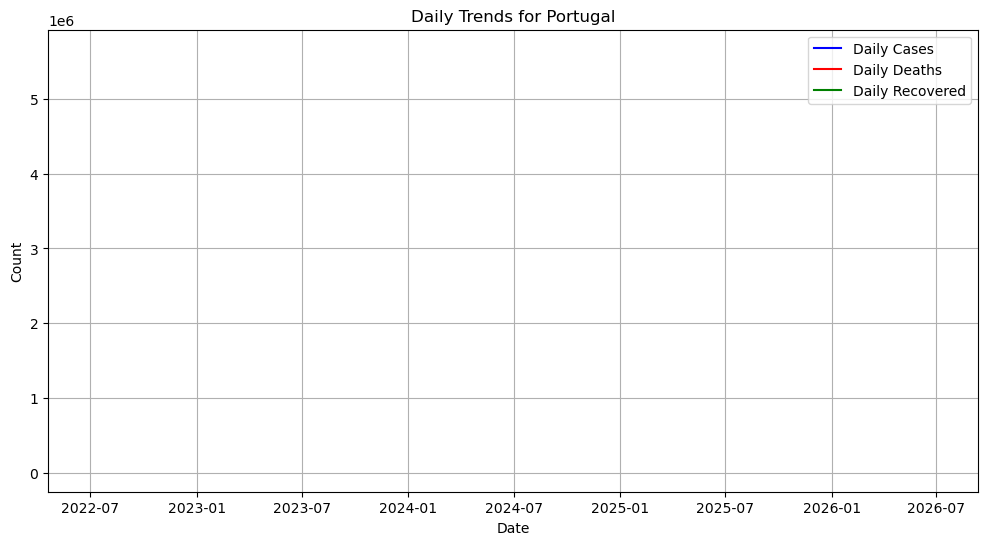

Data for Qatar:
           day   Cases  Deaths  Recovered
121 2024-06-30  514524   690.0   513687.0
Data types for Qatar:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


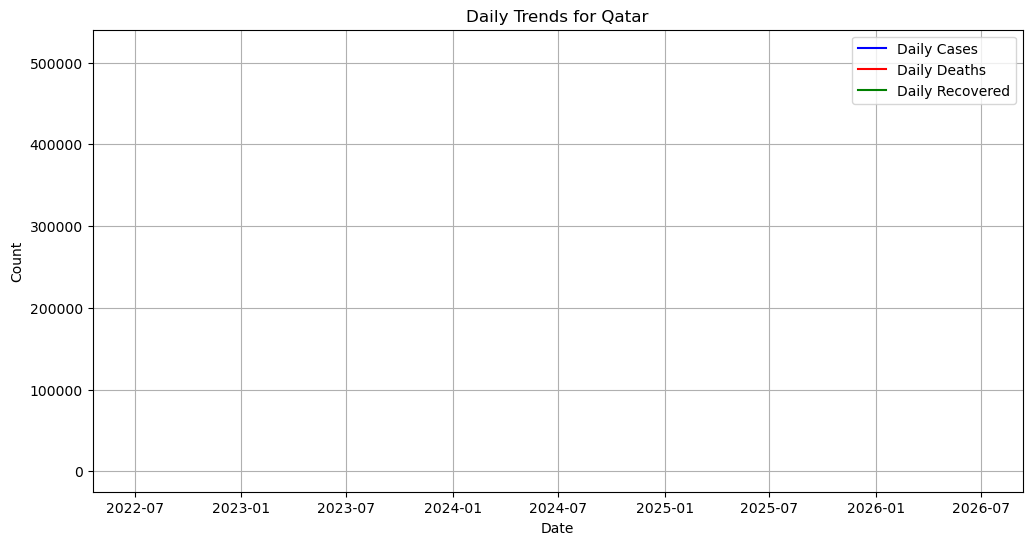

Data for R&eacute;union:
           day   Cases  Deaths  Recovered
143 2024-06-30  494595   921.0        0.0
Data types for R&eacute;union:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


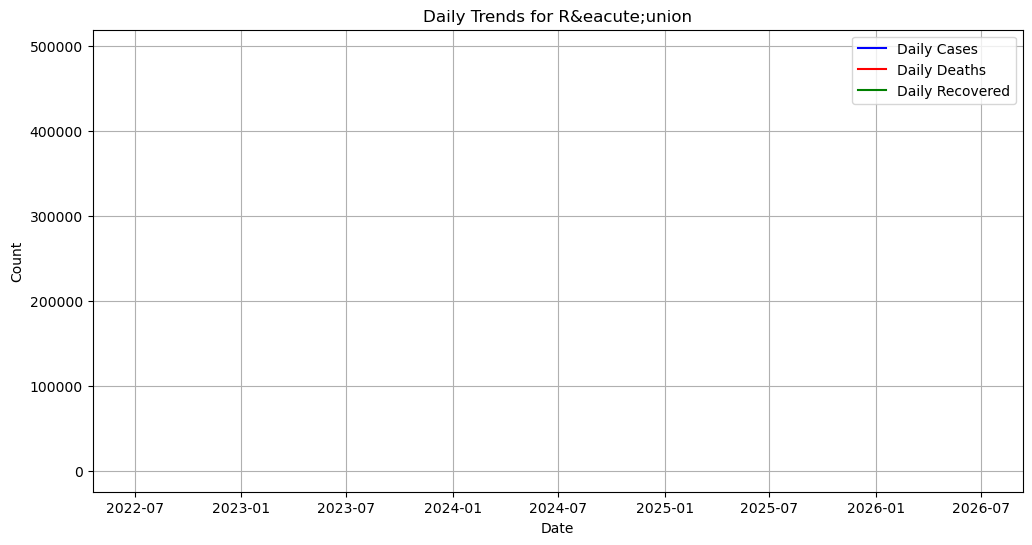

Data for Romania:
           day    Cases   Deaths  Recovered
184 2024-06-30  3529735  68929.0  3460149.0
Data types for Romania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


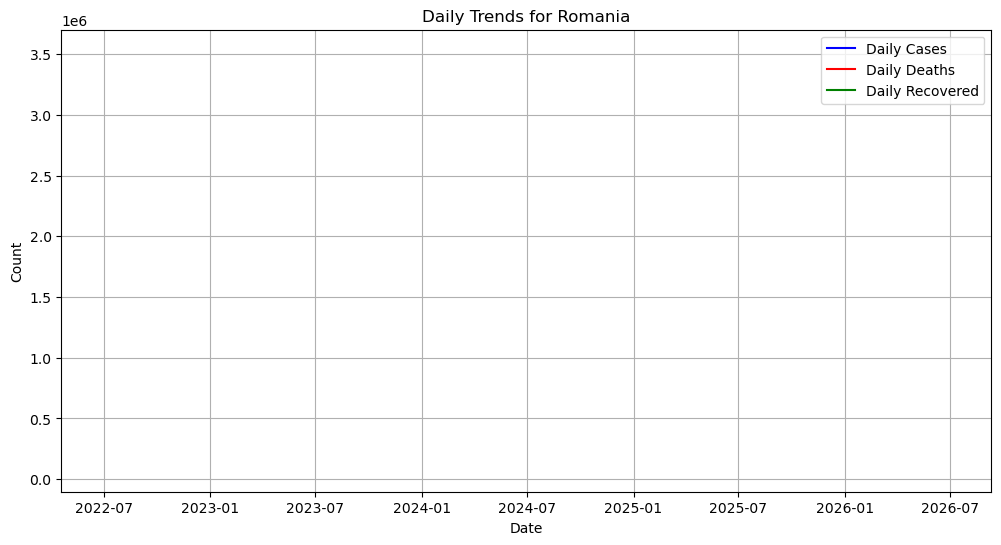

Data for Russia:
           day     Cases    Deaths   Recovered
228 2024-06-30  24124215  402756.0  23545818.0
Data types for Russia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


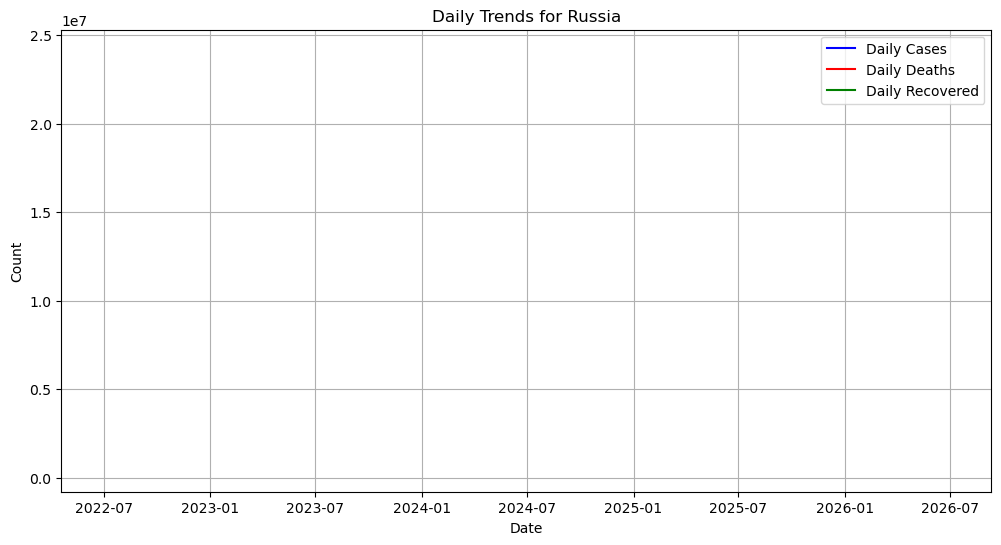

Data for Rwanda:
           day   Cases  Deaths  Recovered
103 2024-06-30  133518  1468.0   132039.0
Data types for Rwanda:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


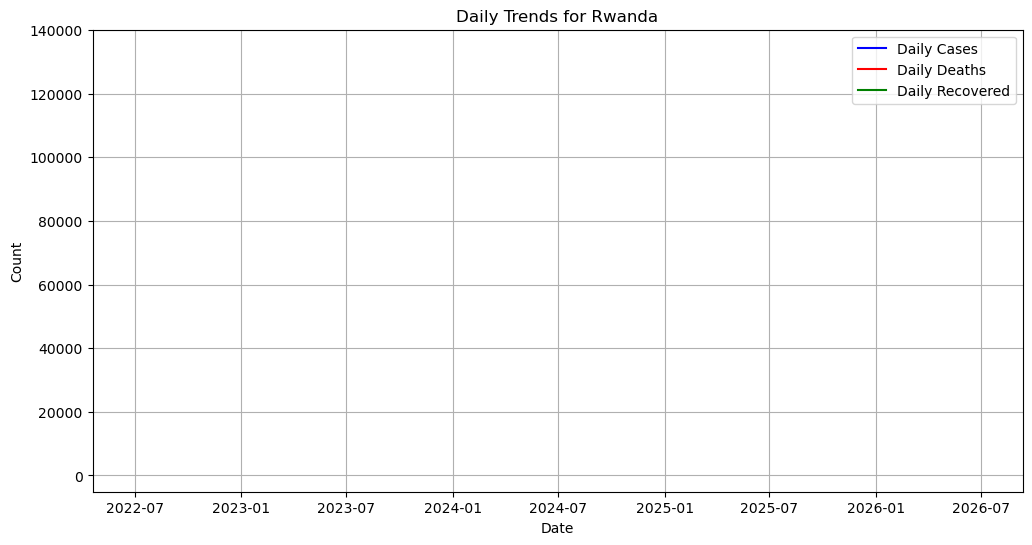

Data for S-Korea:
           day     Cases   Deaths   Recovered
224 2024-06-30  34571873  35934.0  34535939.0
Data types for S-Korea:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


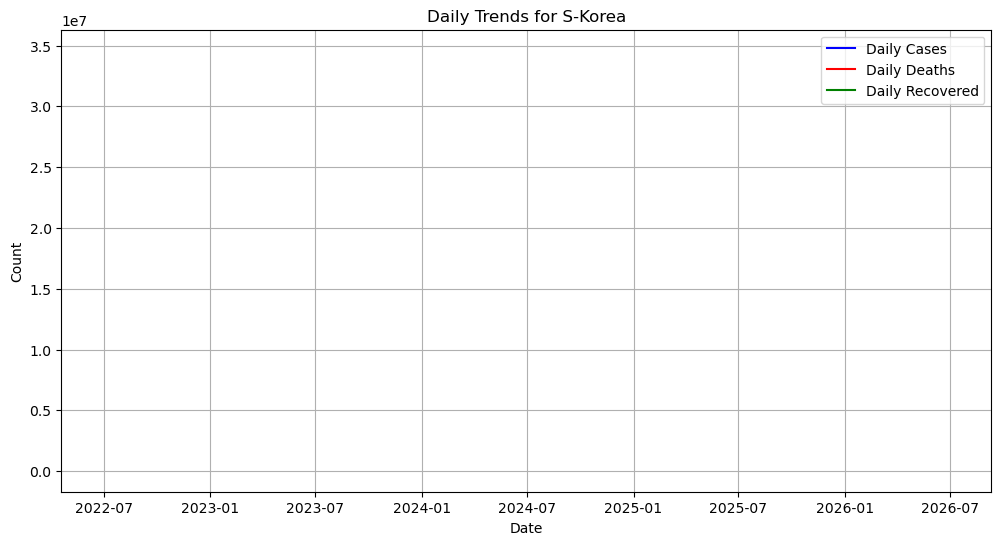

Data for Saint-Helena:
         day  Cases  Deaths  Recovered
0 2024-06-30   2166     0.0        2.0
Data types for Saint-Helena:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


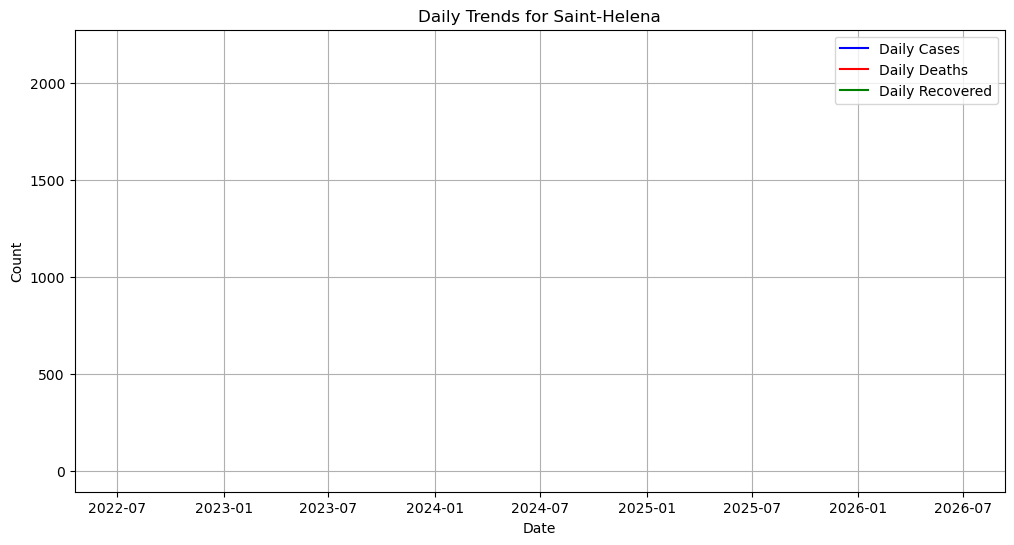

Data for Saint-Kitts-and-Nevis:
          day  Cases  Deaths  Recovered
32 2024-06-30   6607    48.0     6559.0
Data types for Saint-Kitts-and-Nevis:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


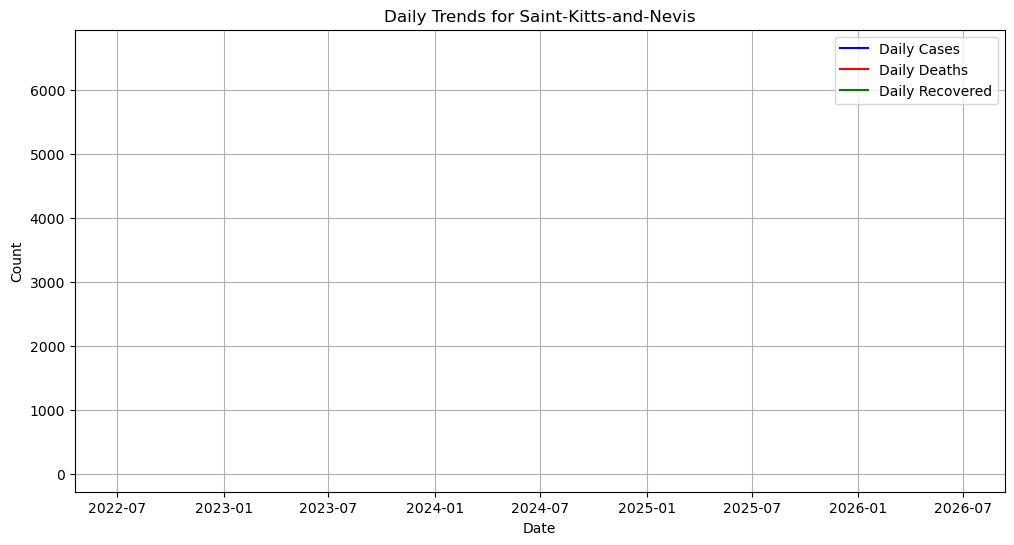

Data for Saint-Lucia:
          day  Cases  Deaths  Recovered
83 2024-06-30  30215   410.0    29805.0
Data types for Saint-Lucia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


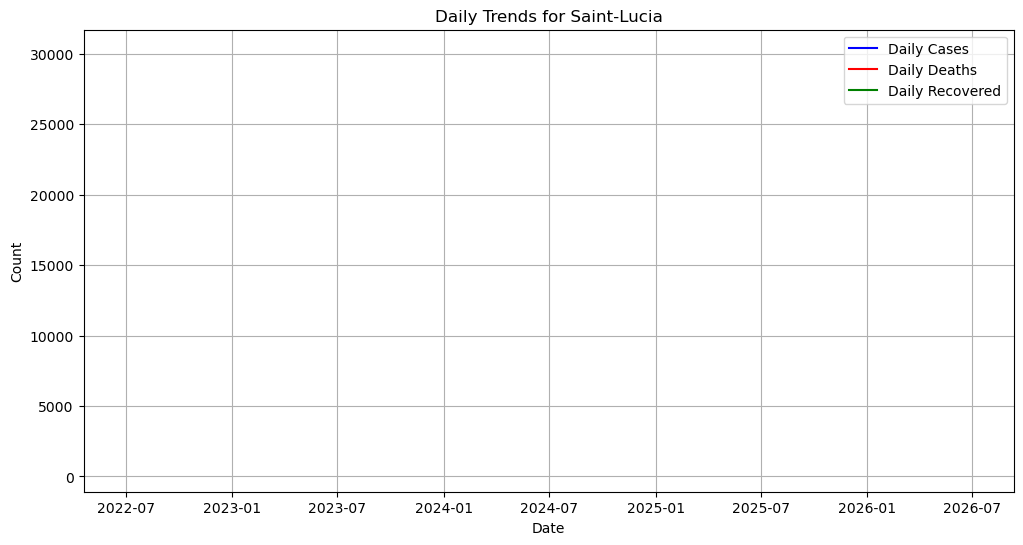

Data for Saint-Martin:
          day  Cases  Deaths  Recovered
45 2024-06-30  12324    63.0        0.0
Data types for Saint-Martin:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


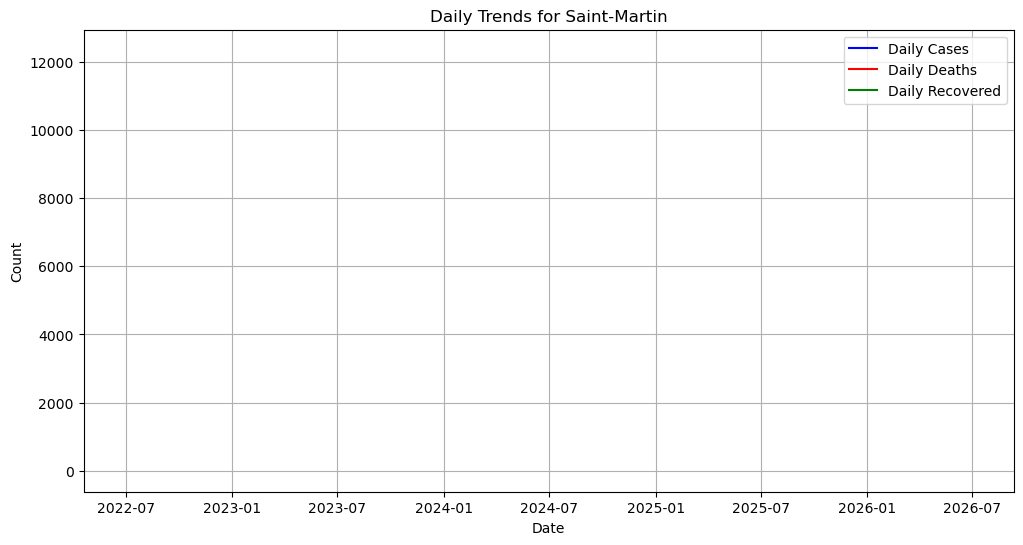

Data for Saint-Pierre-Miquelon:
         day  Cases  Deaths  Recovered
9 2024-06-30   3452     2.0     2449.0
Data types for Saint-Pierre-Miquelon:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


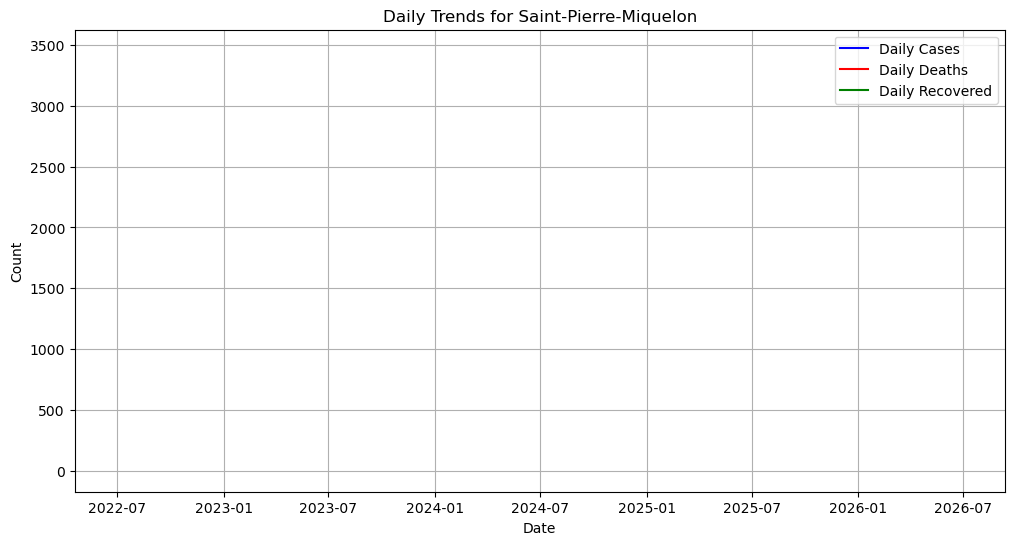

Data for Samoa:
          day  Cases  Deaths  Recovered
40 2024-06-30  17006    31.0     1605.0
Data types for Samoa:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


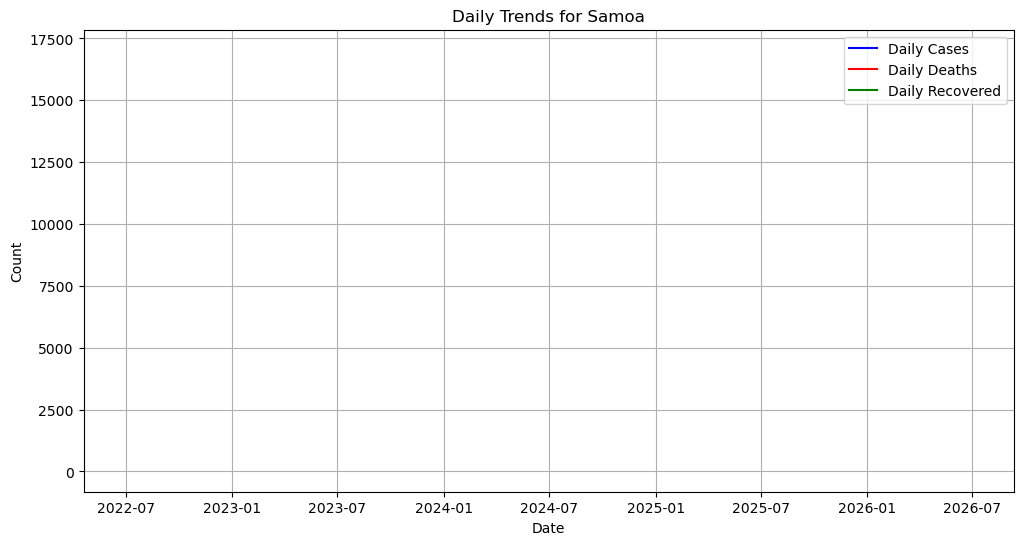

Data for San-Marino:
          day  Cases  Deaths  Recovered
87 2024-06-30  26185   128.0    26011.0
Data types for San-Marino:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


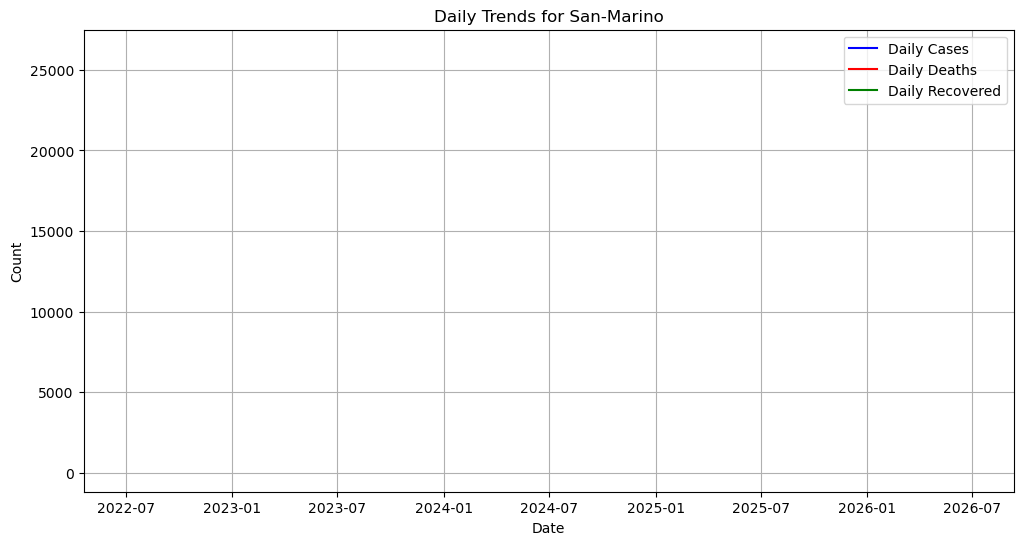

Data for Sao-Tome-and-Principe:
          day  Cases  Deaths  Recovered
52 2024-06-30   6778    80.0     6685.0
Data types for Sao-Tome-and-Principe:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


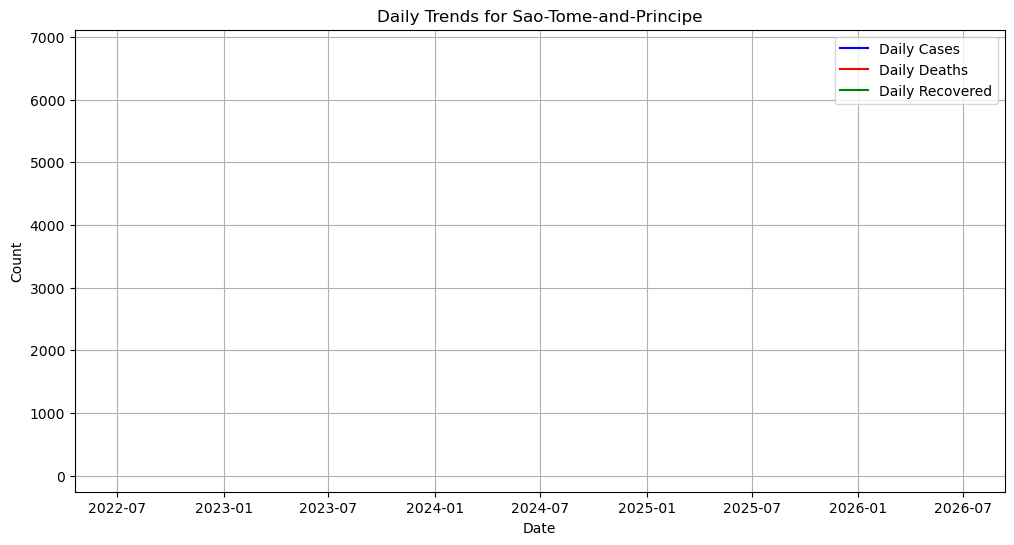

Data for Saudi-Arabia:
           day   Cases  Deaths  Recovered
129 2024-06-30  841469  9646.0        0.0
Data types for Saudi-Arabia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


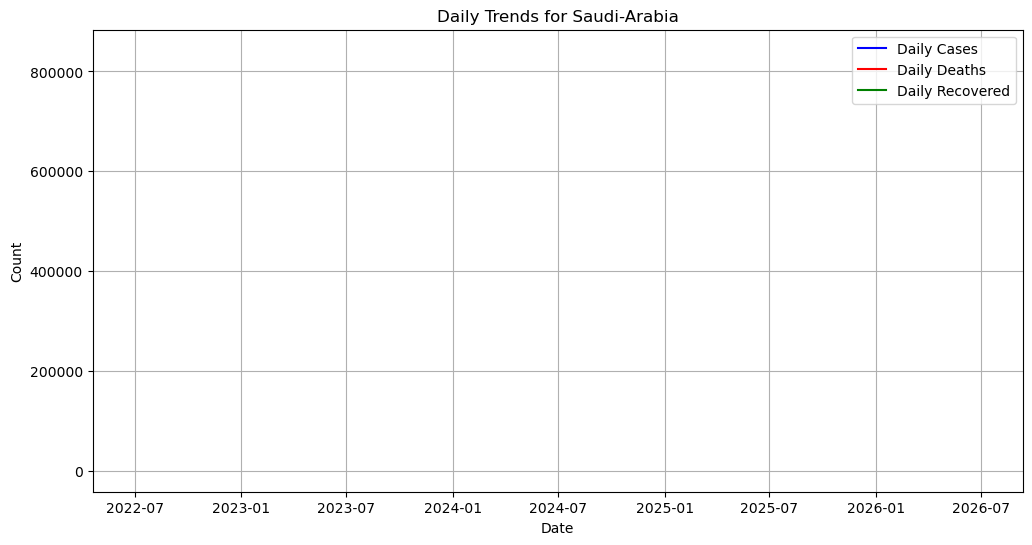

Data for Senegal:
           day  Cases  Deaths  Recovered
110 2024-06-30  89053  1971.0    87024.0
Data types for Senegal:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


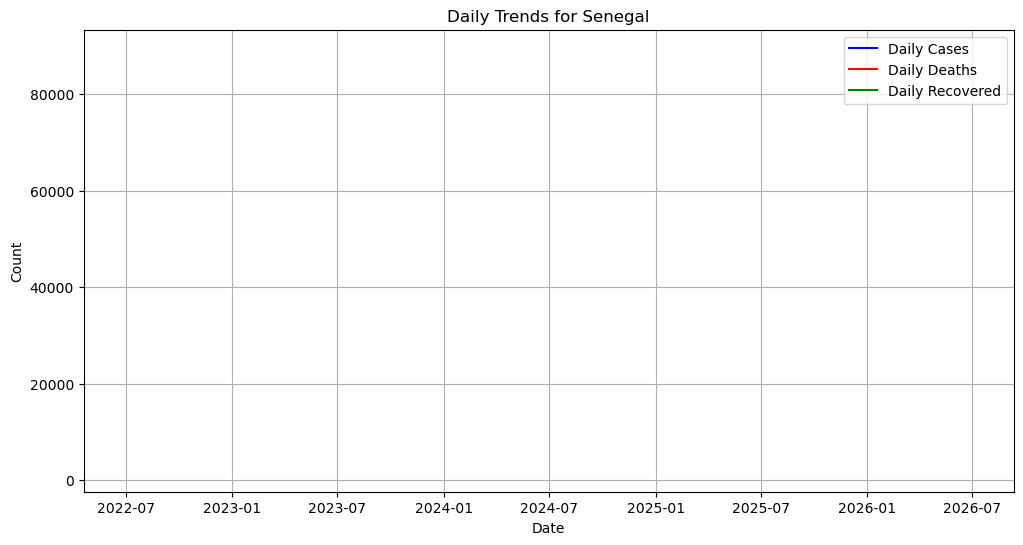

Data for Serbia:
           day    Cases   Deaths  Recovered
190 2024-06-30  2615054  18057.0  2596608.0
Data types for Serbia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


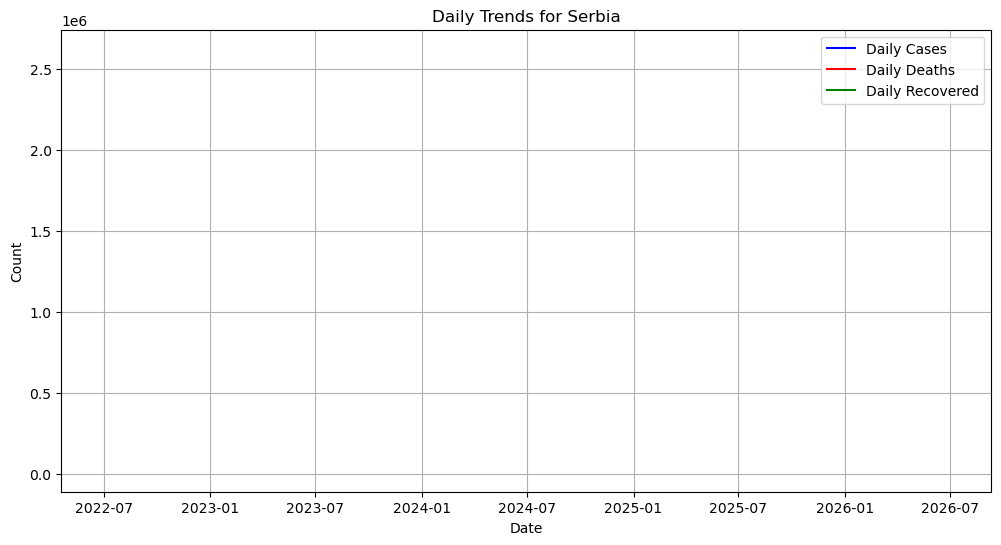

Data for Seychelles:
          day  Cases  Deaths  Recovered
71 2024-06-30  51220   172.0    51048.0
Data types for Seychelles:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


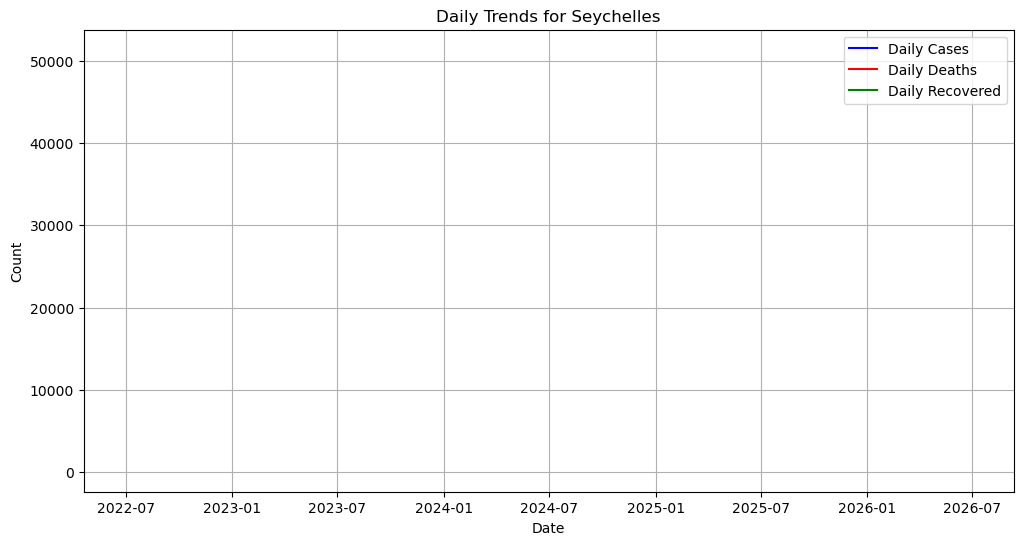

Data for Sierra-Leone:
          day  Cases  Deaths  Recovered
49 2024-06-30   7779   126.0        0.0
Data types for Sierra-Leone:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


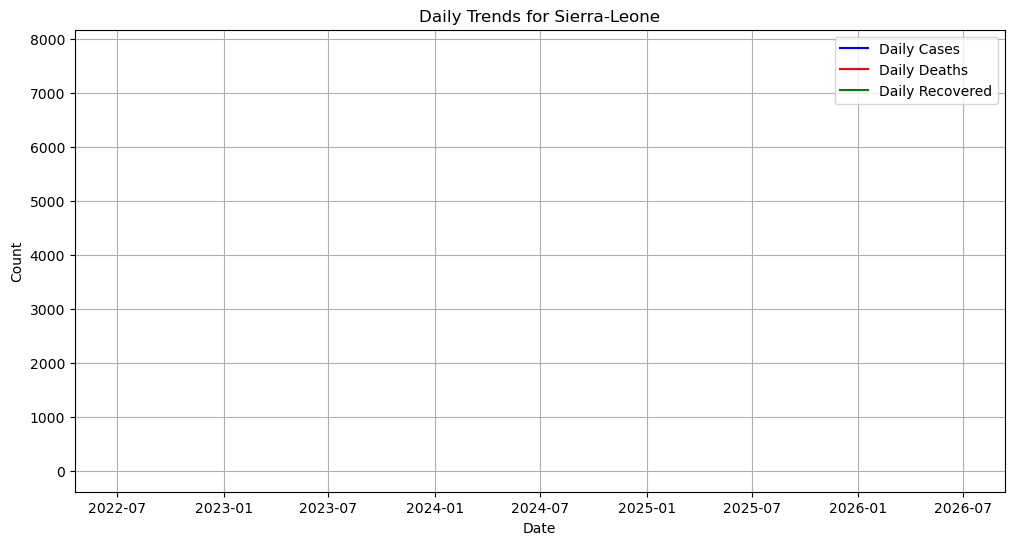

Data for Singapore:
           day    Cases  Deaths  Recovered
186 2024-06-30  3006155  2024.0  3004131.0
Data types for Singapore:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


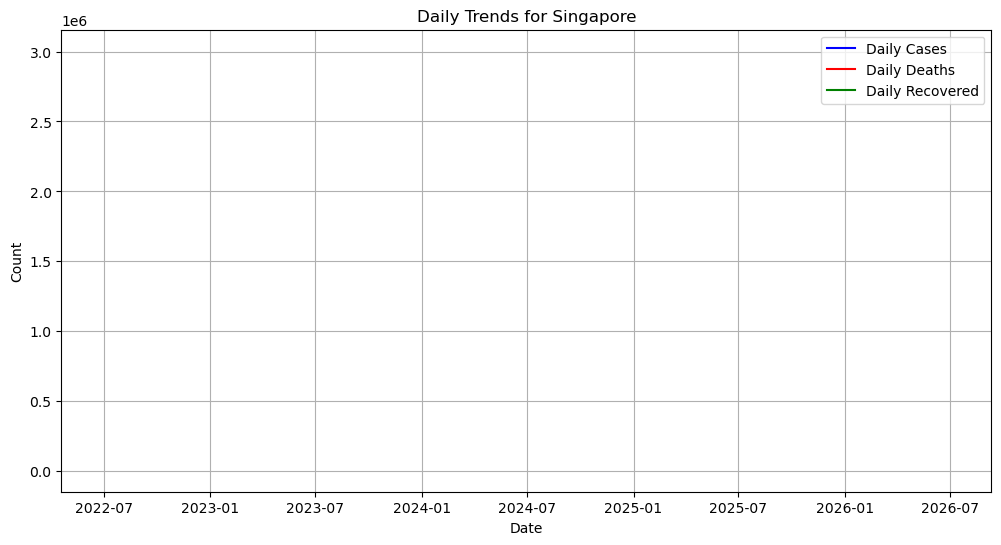

Data for Sint-Maarten:
          day  Cases  Deaths  Recovered
29 2024-06-30  11051    92.0    10905.0
Data types for Sint-Maarten:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


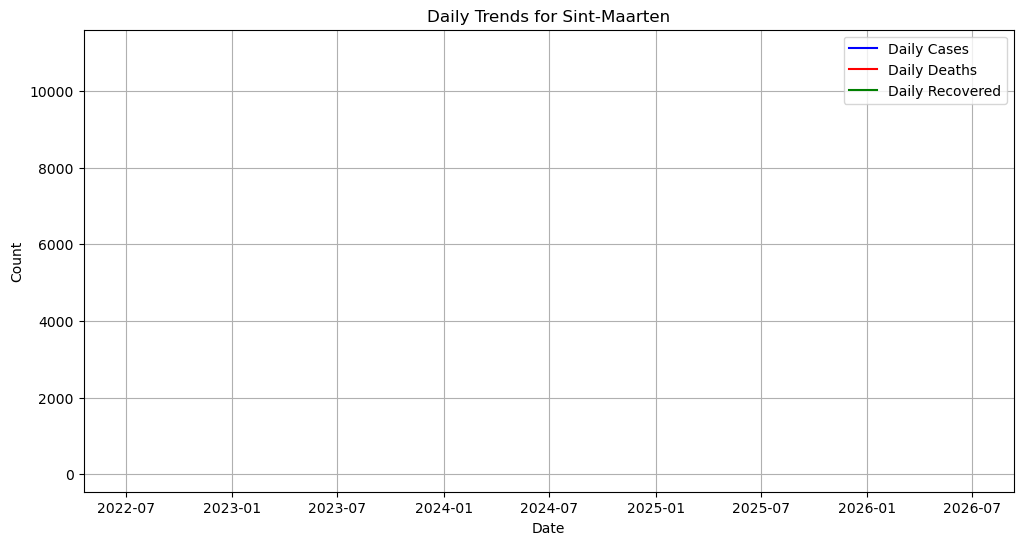

Data for Slovakia:
           day    Cases   Deaths  Recovered
194 2024-06-30  1877605  21224.0  1856381.0
Data types for Slovakia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


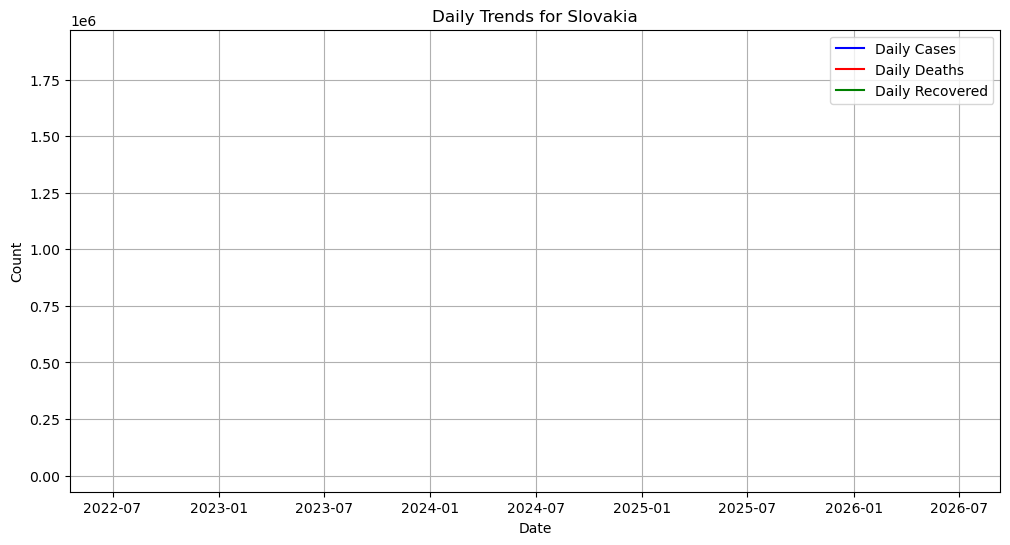

Data for Slovenia:
           day    Cases  Deaths  Recovered
201 2024-06-30  1356546  7100.0  1349424.0
Data types for Slovenia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


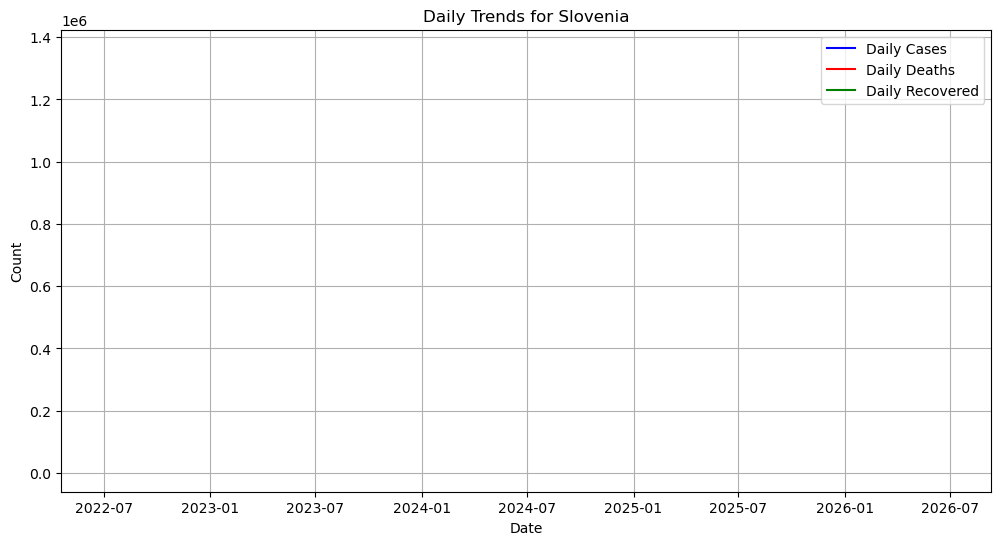

Data for Solomon-Islands:
          day  Cases  Deaths  Recovered
88 2024-06-30  25954   199.0        0.0
Data types for Solomon-Islands:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


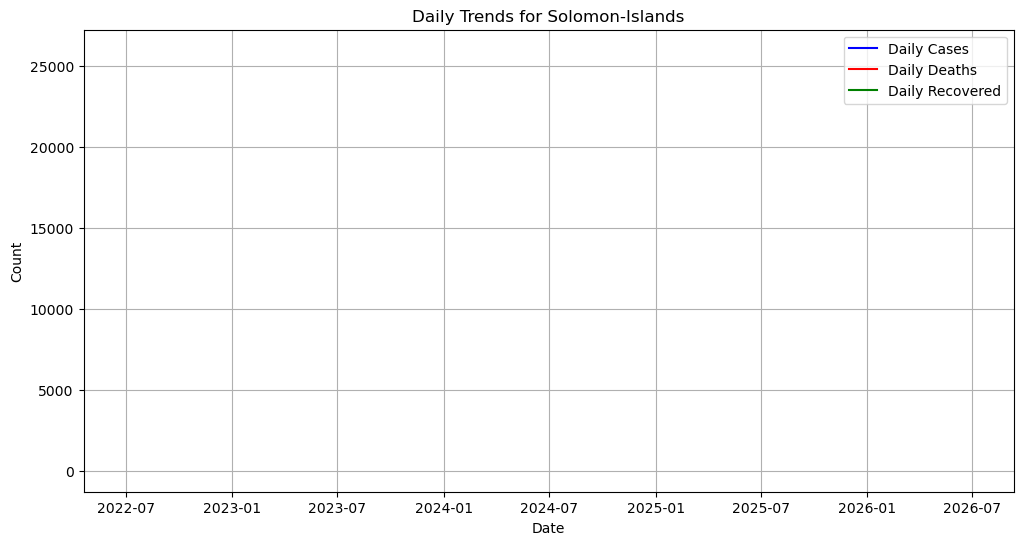

Data for Somalia:
          day  Cases  Deaths  Recovered
60 2024-06-30  27334  1361.0    13182.0
Data types for Somalia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


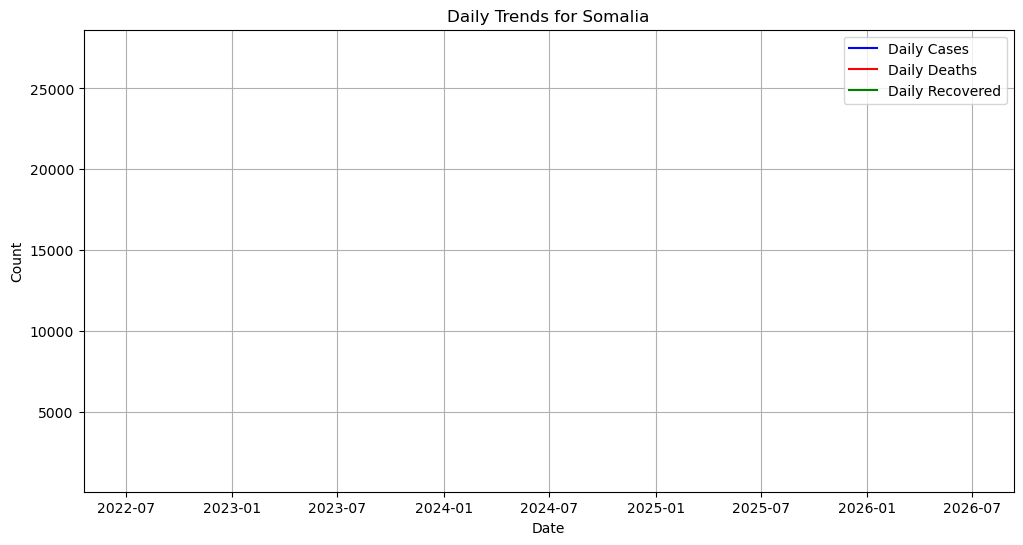

Data for South-Africa:
           day    Cases    Deaths  Recovered
166 2024-06-30  4076463  102595.0  3912506.0
Data types for South-Africa:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


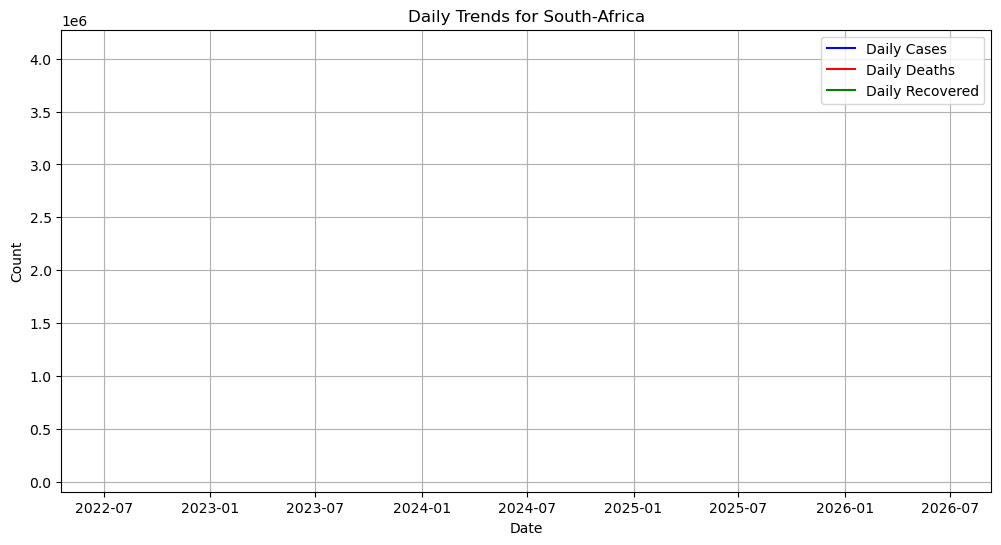

Data for South-America:
           day     Cases     Deaths   Recovered
215 2024-06-30  70200879  1367332.0  66683585.0
Data types for South-America:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


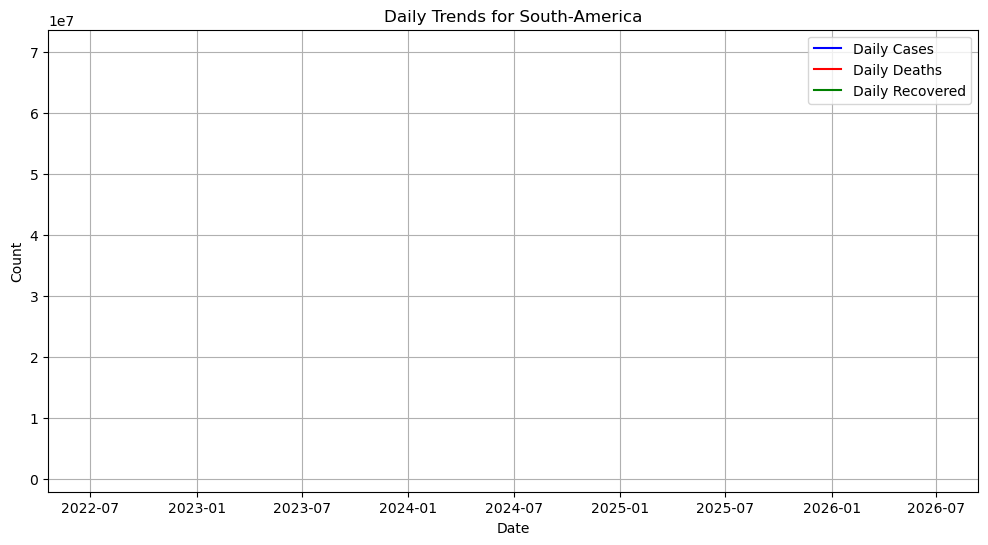

Data for South-Sudan:
          day  Cases  Deaths  Recovered
38 2024-06-30  18819   147.0    18115.0
Data types for South-Sudan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


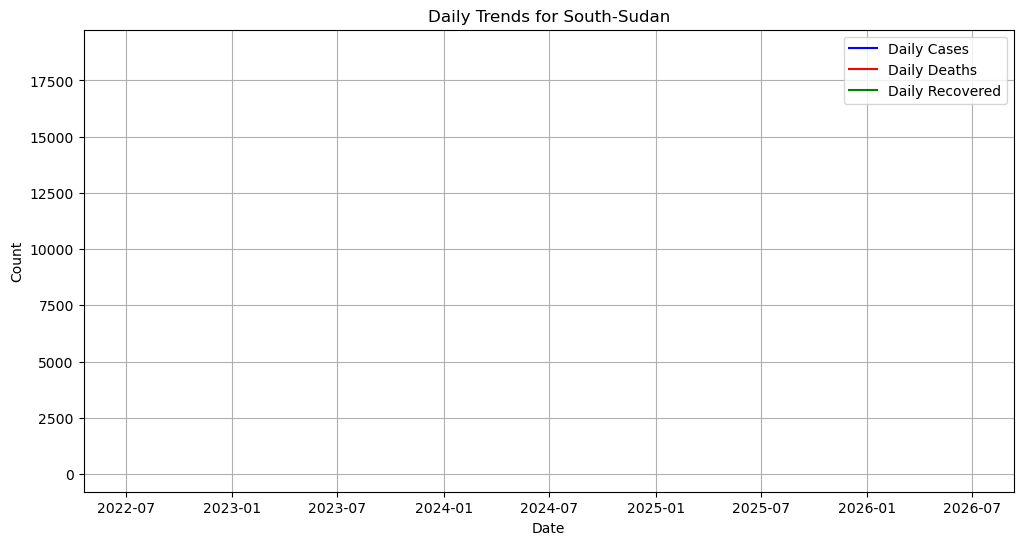

Data for Spain:
           day     Cases    Deaths   Recovered
211 2024-06-30  13914811  121760.0  13762417.0
Data types for Spain:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


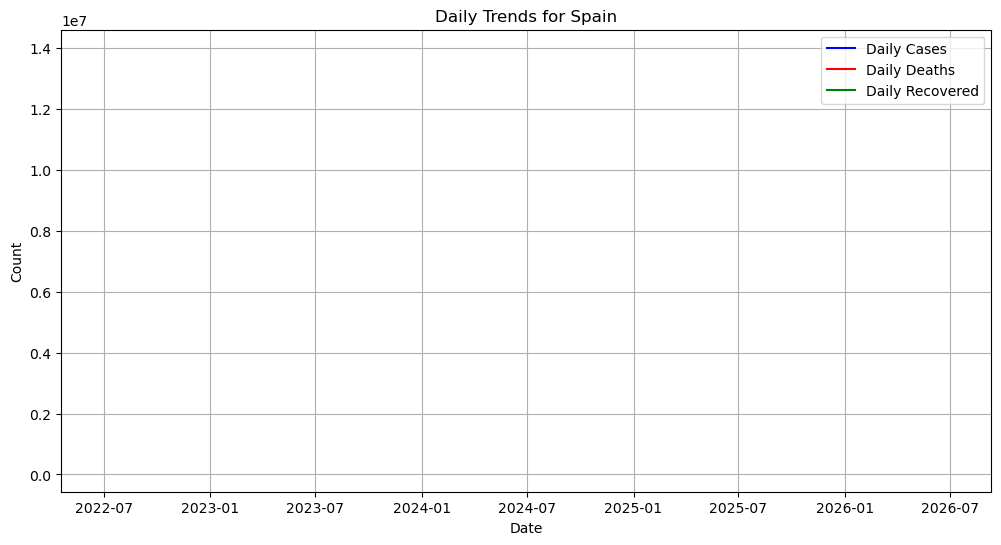

Data for Sri-Lanka:
           day   Cases   Deaths  Recovered
135 2024-06-30  672754  16897.0   655852.0
Data types for Sri-Lanka:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


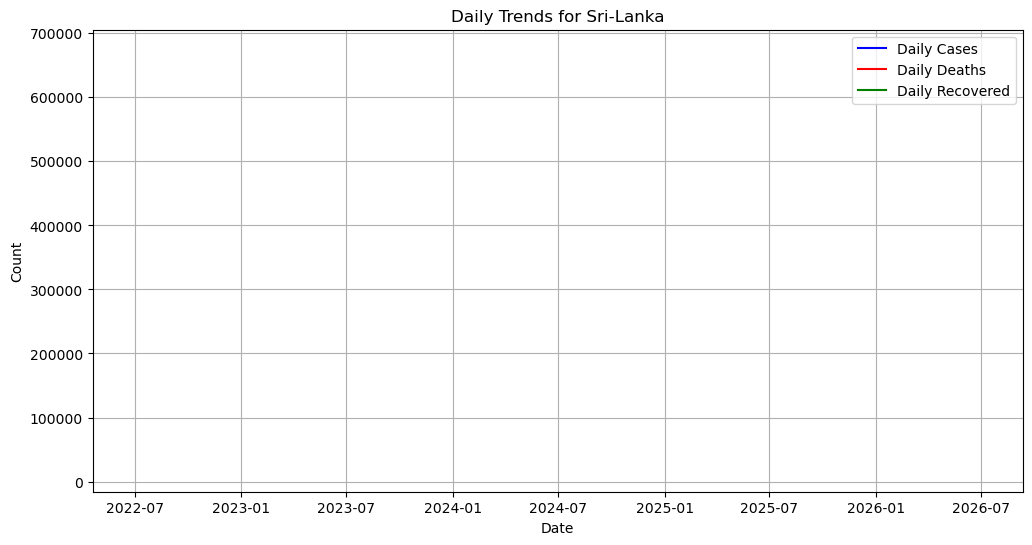

Data for St-Barth:
          day  Cases  Deaths  Recovered
31 2024-06-30   5507     6.0        0.0
Data types for St-Barth:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


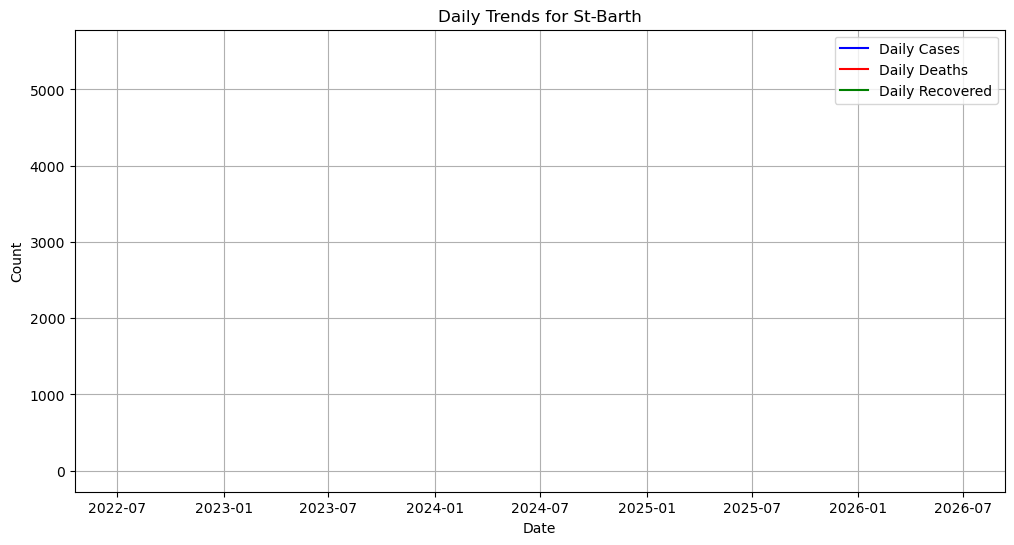

Data for St-Vincent-Grenadines:
          day  Cases  Deaths  Recovered
47 2024-06-30   9674   124.0     9493.0
Data types for St-Vincent-Grenadines:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


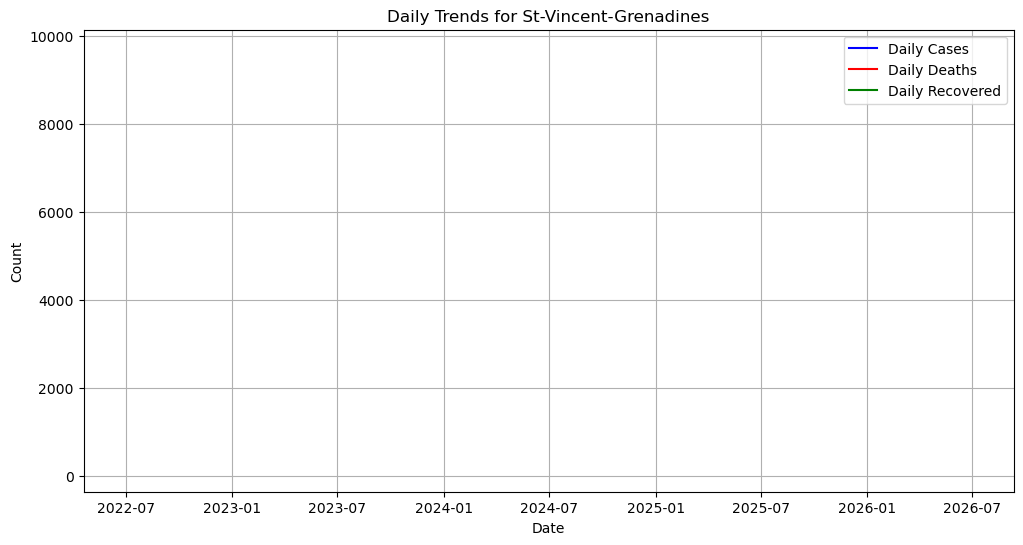

Data for Sudan:
          day  Cases  Deaths  Recovered
66 2024-06-30  63993  5046.0    58947.0
Data types for Sudan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


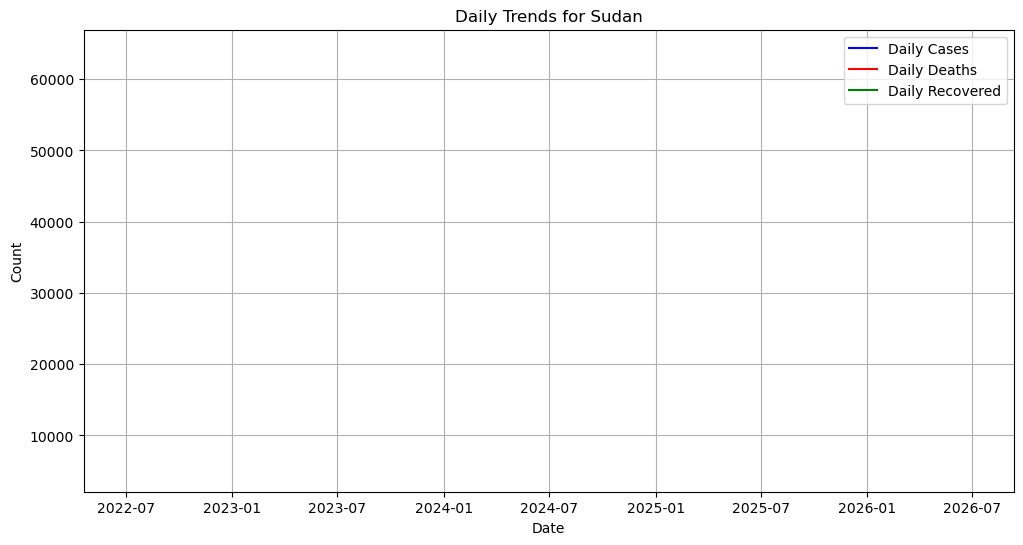

Data for Suriname:
          day  Cases  Deaths  Recovered
93 2024-06-30  82588  1408.0        0.0
Data types for Suriname:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


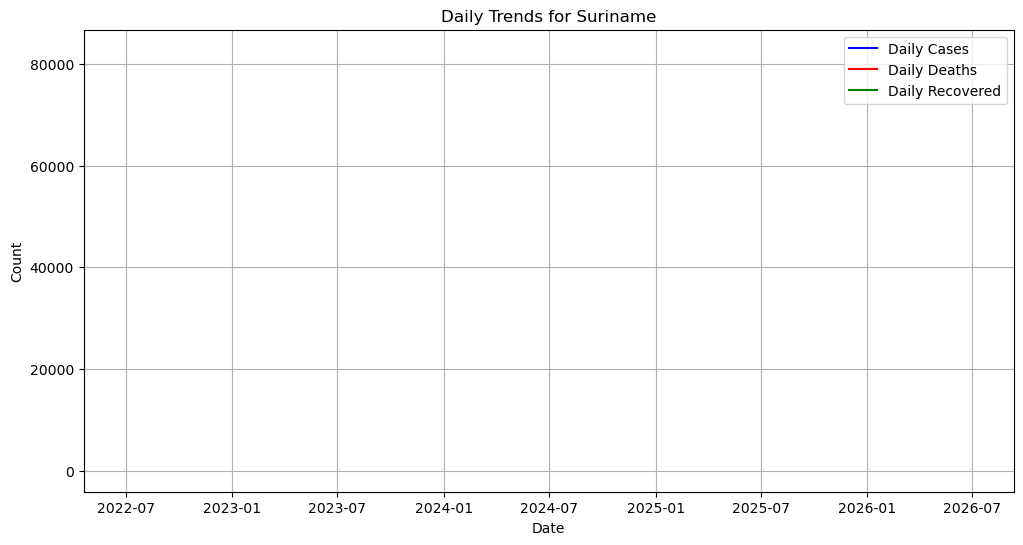

Data for Sweden:
           day    Cases   Deaths  Recovered
188 2024-06-30  2754129  27407.0  2726492.0
Data types for Sweden:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


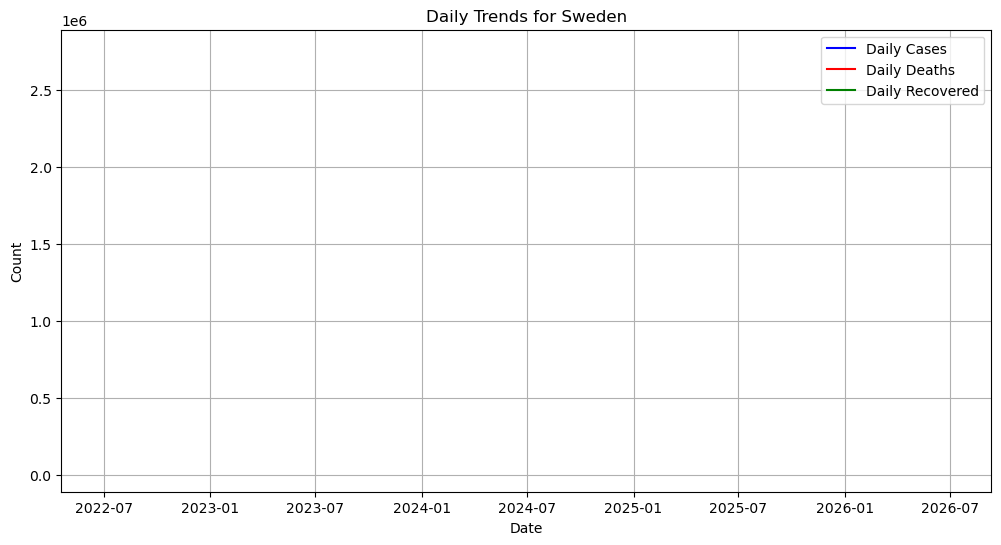

Data for Switzerland:
           day    Cases   Deaths  Recovered
182 2024-06-30  4453053  14452.0  4438309.0
Data types for Switzerland:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


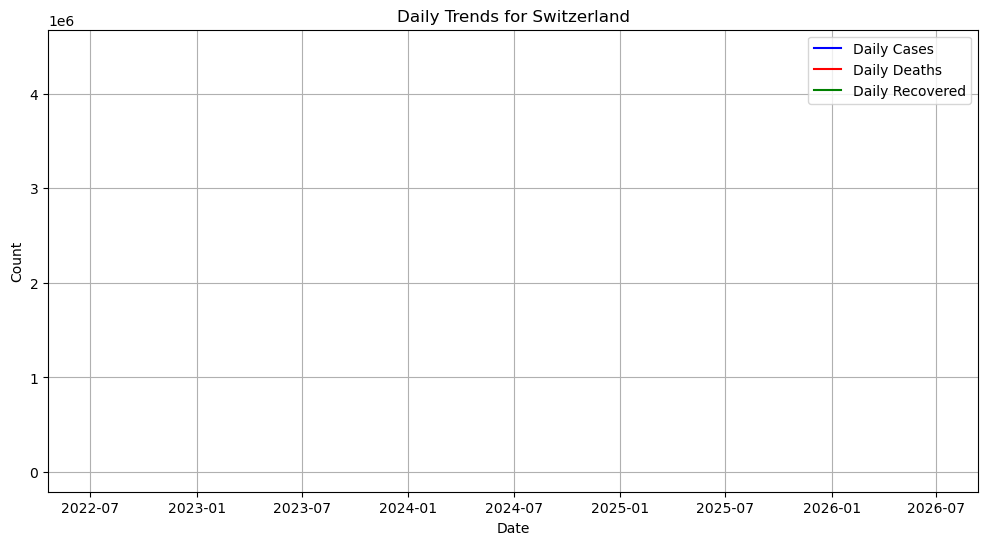

Data for Syria:
          day  Cases  Deaths  Recovered
69 2024-06-30  57743  3165.0    54578.0
Data types for Syria:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


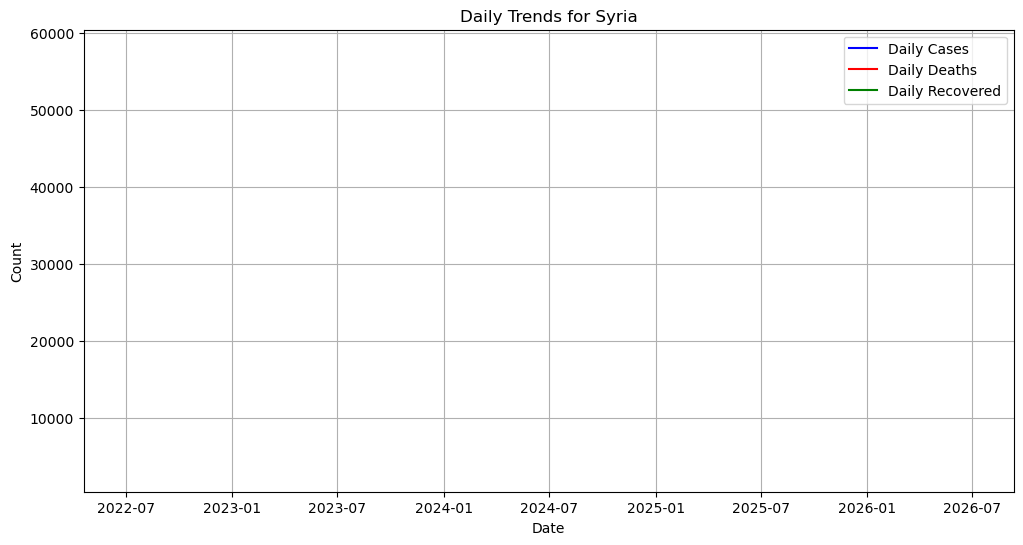

Data for Taiwan:
           day     Cases   Deaths   Recovered
232 2024-06-30  10241523  19005.0  10222518.0
Data types for Taiwan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


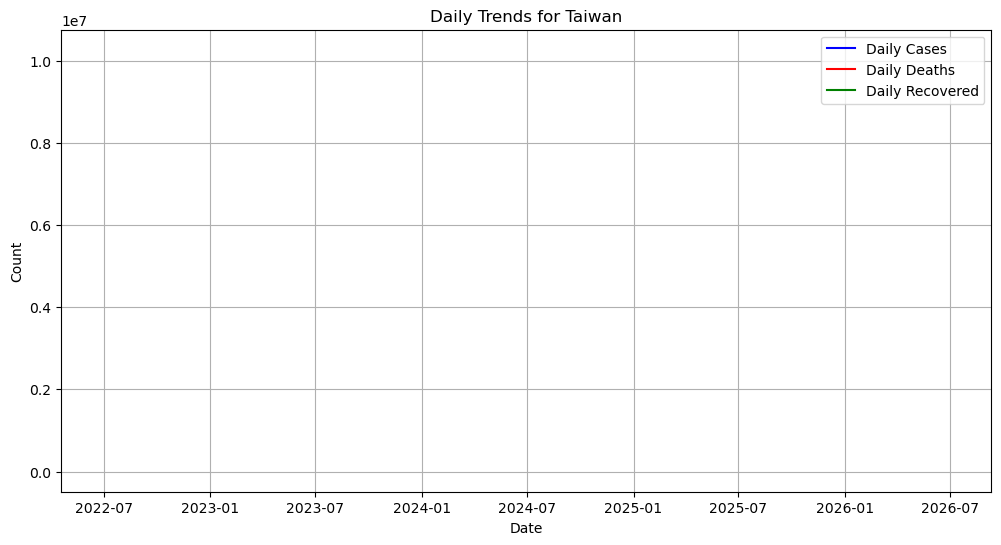

Data for Tajikistan:
          day  Cases  Deaths  Recovered
13 2024-06-30  17786   125.0    17264.0
Data types for Tajikistan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


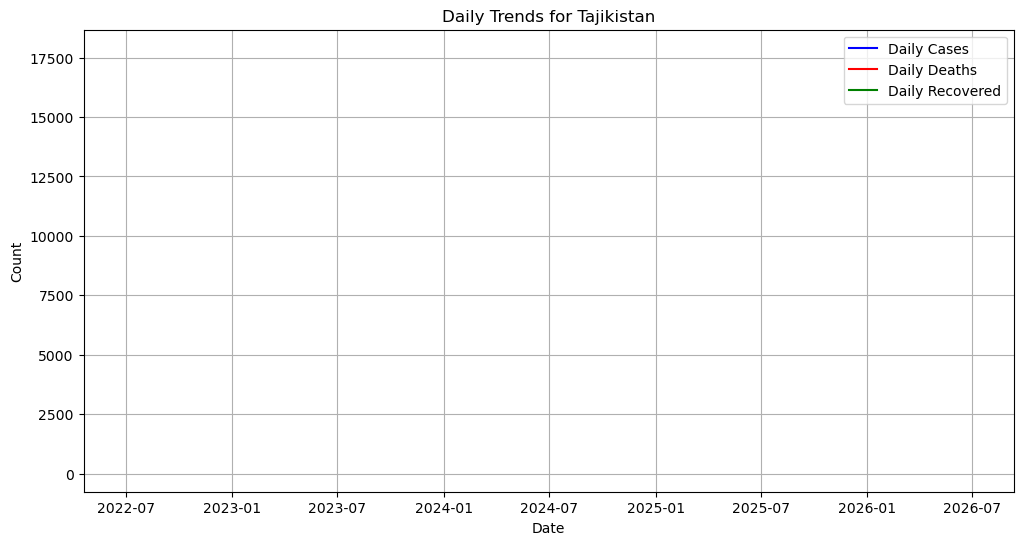

Data for Tanzania:
          day  Cases  Deaths  Recovered
75 2024-06-30  43223   846.0        0.0
Data types for Tanzania:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


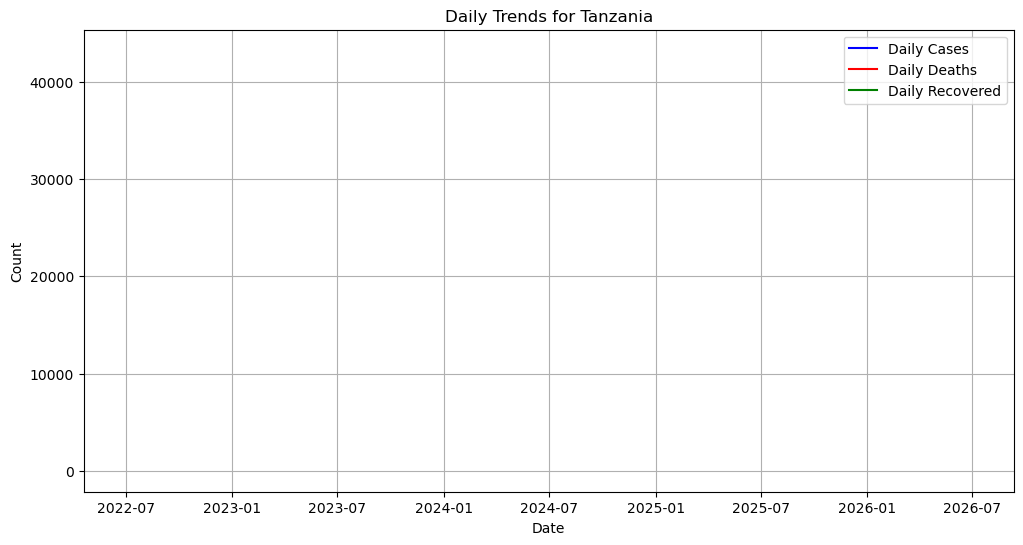

Data for Thailand:
           day    Cases   Deaths  Recovered
179 2024-06-30  4770149  34586.0  4692636.0
Data types for Thailand:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


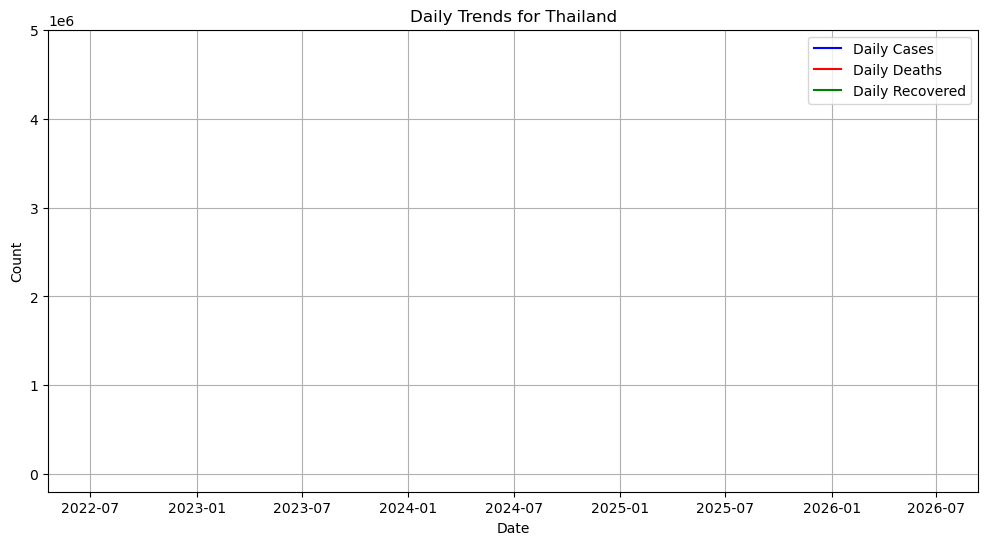

Data for Timor-Leste:
          day  Cases  Deaths  Recovered
33 2024-06-30  23460   138.0    23102.0
Data types for Timor-Leste:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


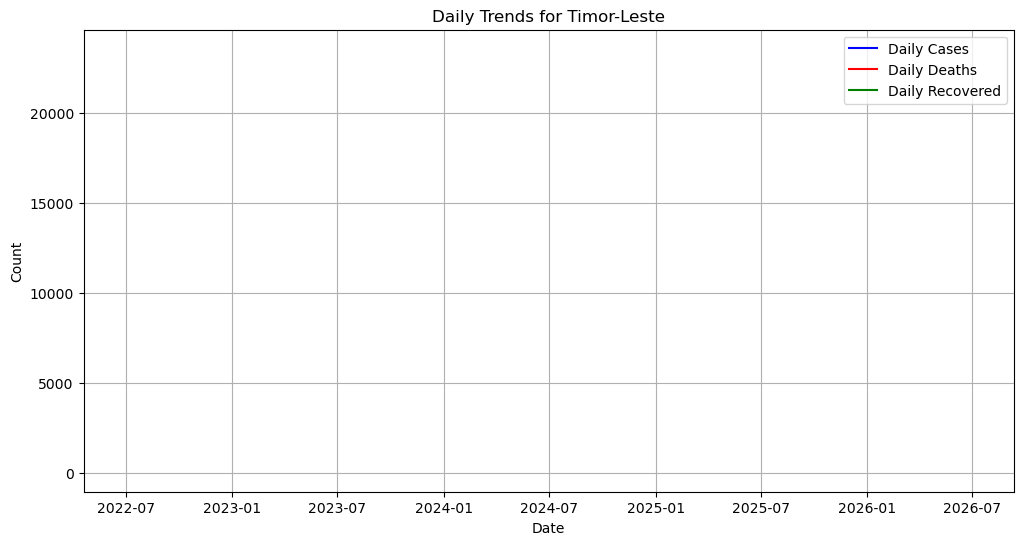

Data for Togo:
          day  Cases  Deaths  Recovered
77 2024-06-30  39572   290.0    39281.0
Data types for Togo:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


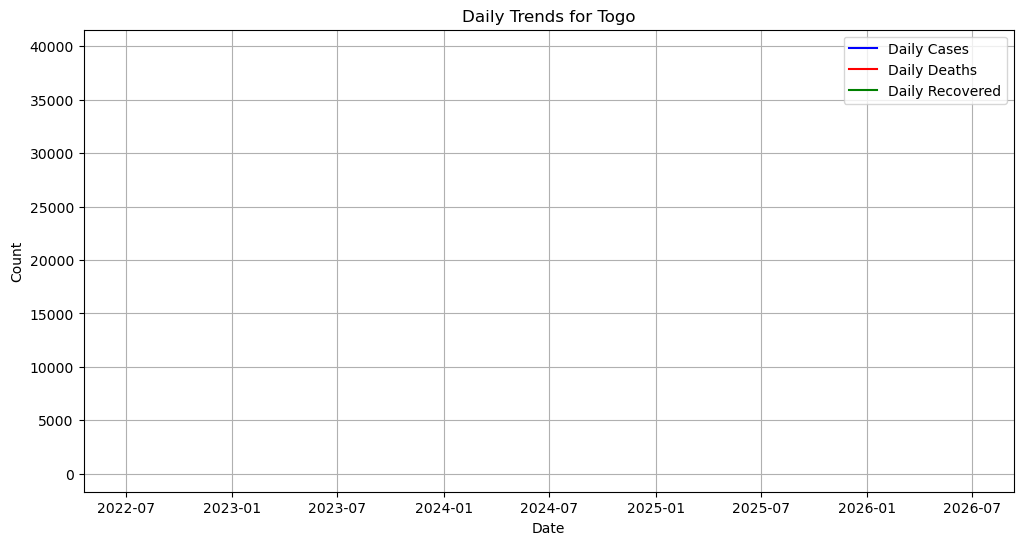

Data for Tokelau:
         day  Cases  Deaths  Recovered
8 2024-06-30     80     0.0        0.0
Data types for Tokelau:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


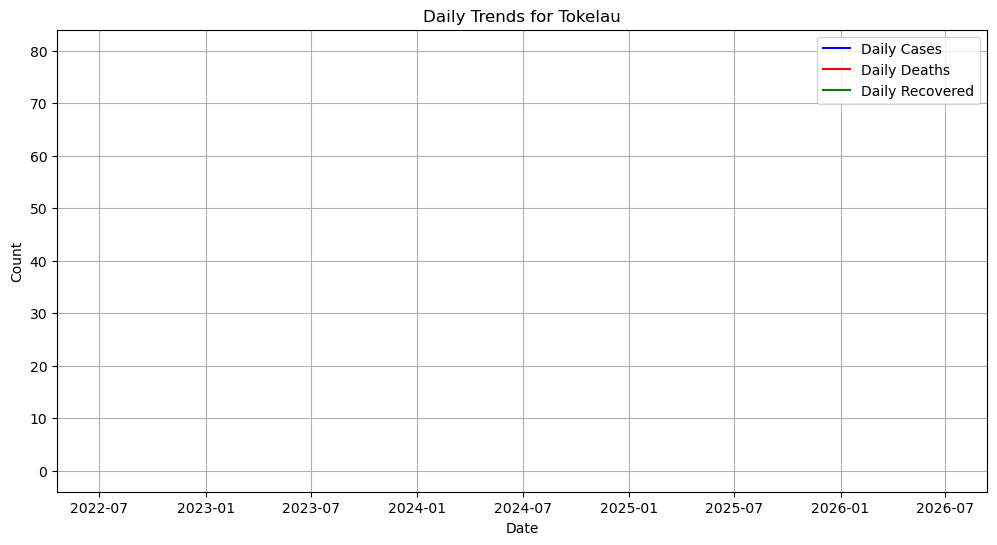

Data for Tonga:
          day  Cases  Deaths  Recovered
41 2024-06-30  16950    13.0    15638.0
Data types for Tonga:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


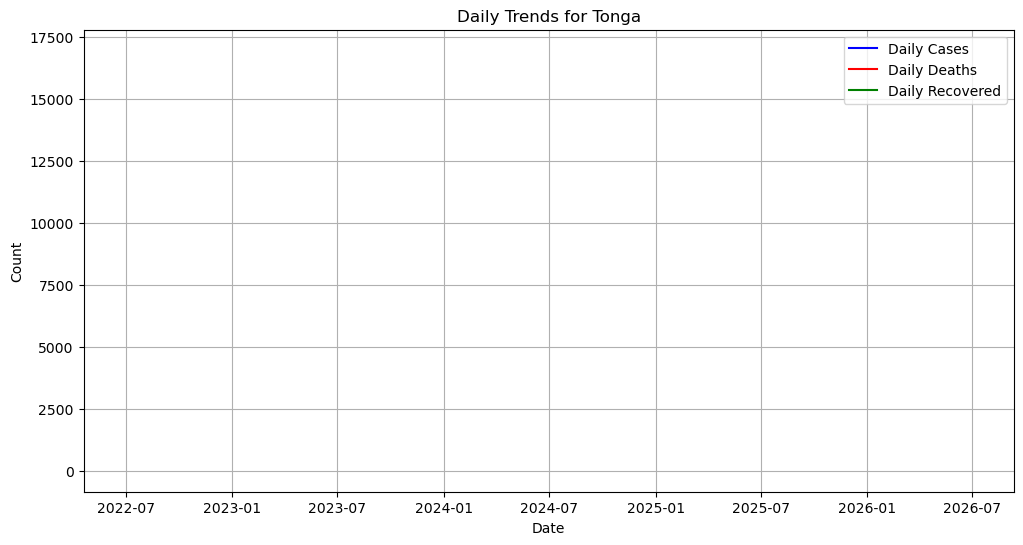

Data for Trinidad-and-Tobago:
          day   Cases  Deaths  Recovered
96 2024-06-30  191496  4390.0   187078.0
Data types for Trinidad-and-Tobago:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


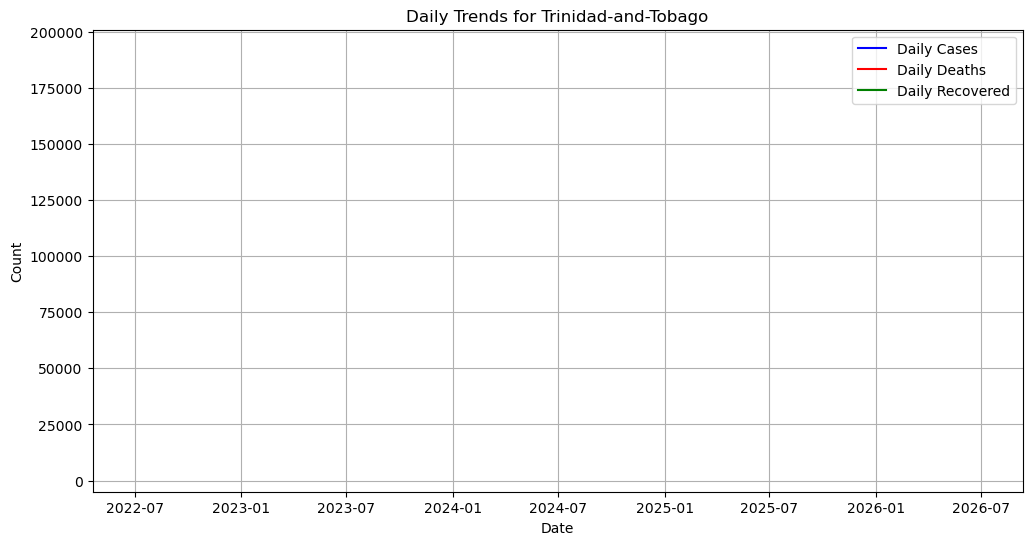

Data for Tunisia:
           day    Cases   Deaths  Recovered
209 2024-06-30  1153361  29423.0        0.0
Data types for Tunisia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


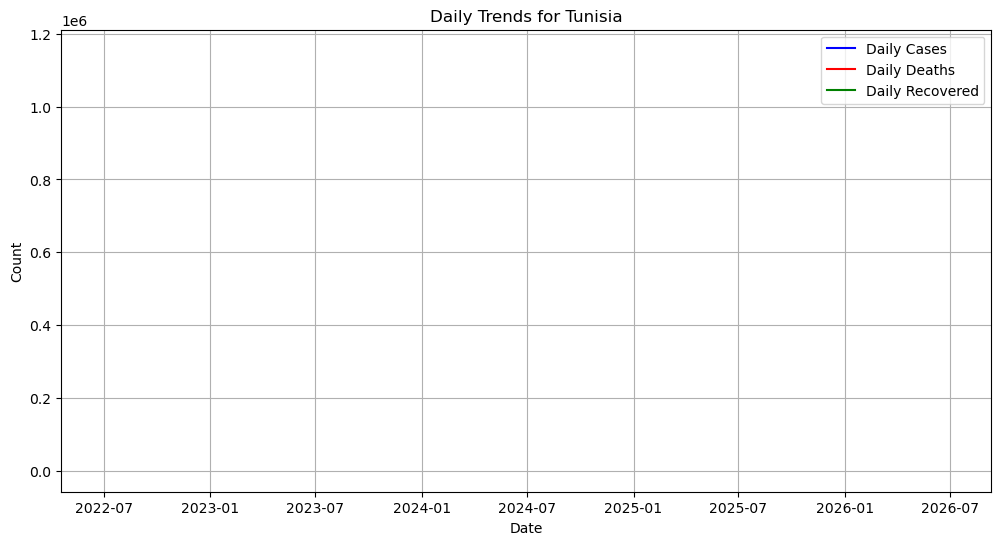

Data for Turkey:
           day     Cases    Deaths  Recovered
229 2024-06-30  17232066  102174.0        0.0
Data types for Turkey:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


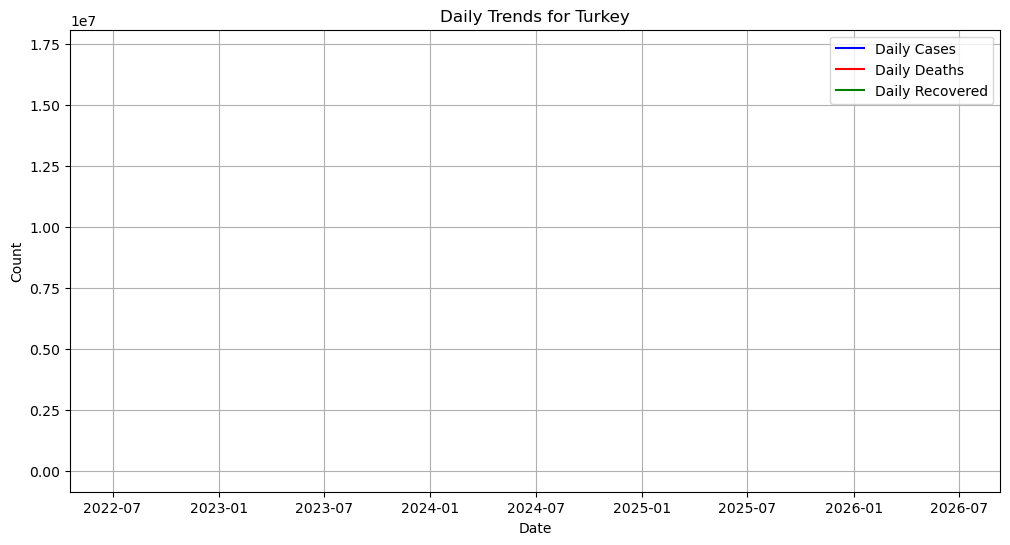

Data for Turks-and-Caicos:
          day  Cases  Deaths  Recovered
53 2024-06-30   6752    40.0     6709.0
Data types for Turks-and-Caicos:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


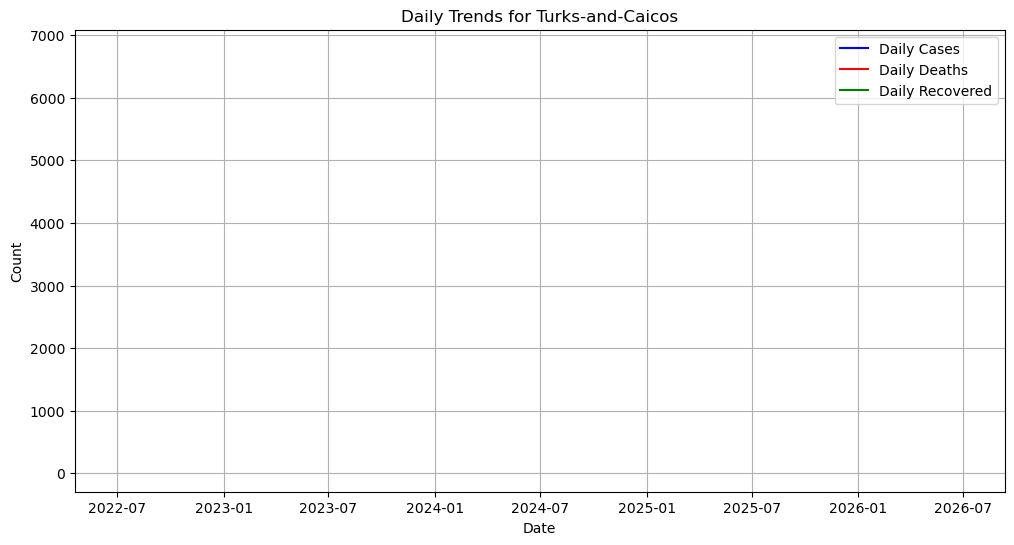

Data for Tuvalu:
          day  Cases  Deaths  Recovered
10 2024-06-30   2943     1.0        0.0
Data types for Tuvalu:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


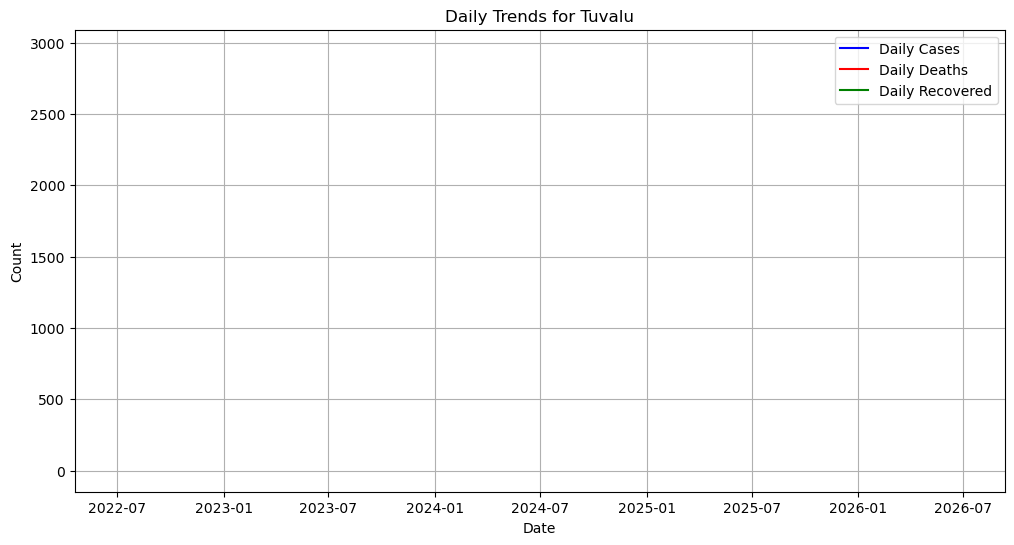

Data for UAE:
           day    Cases  Deaths  Recovered
123 2024-06-30  1067030  2349.0        0.0
Data types for UAE:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


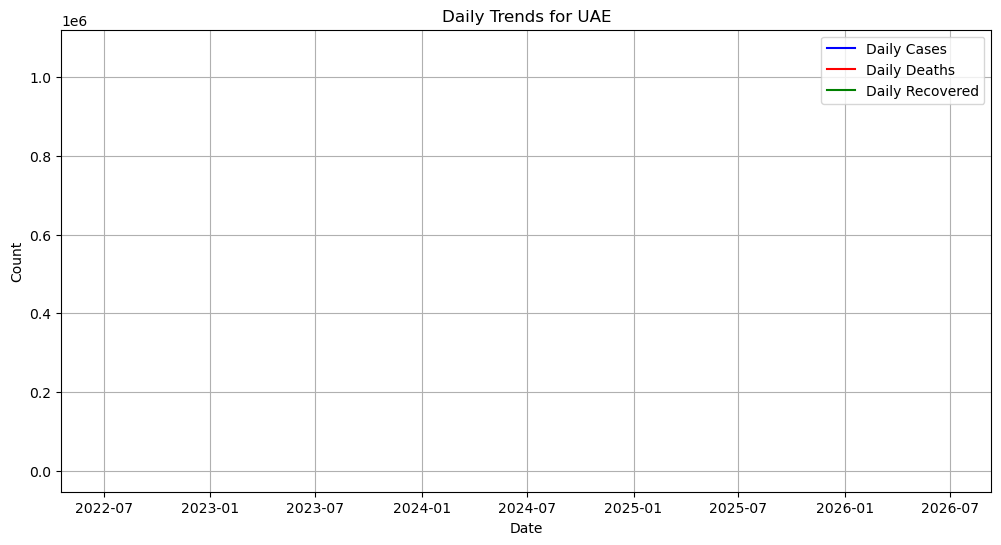

Data for UK:
           day     Cases    Deaths   Recovered
227 2024-06-30  24910387  232112.0  24678275.0
Data types for UK:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


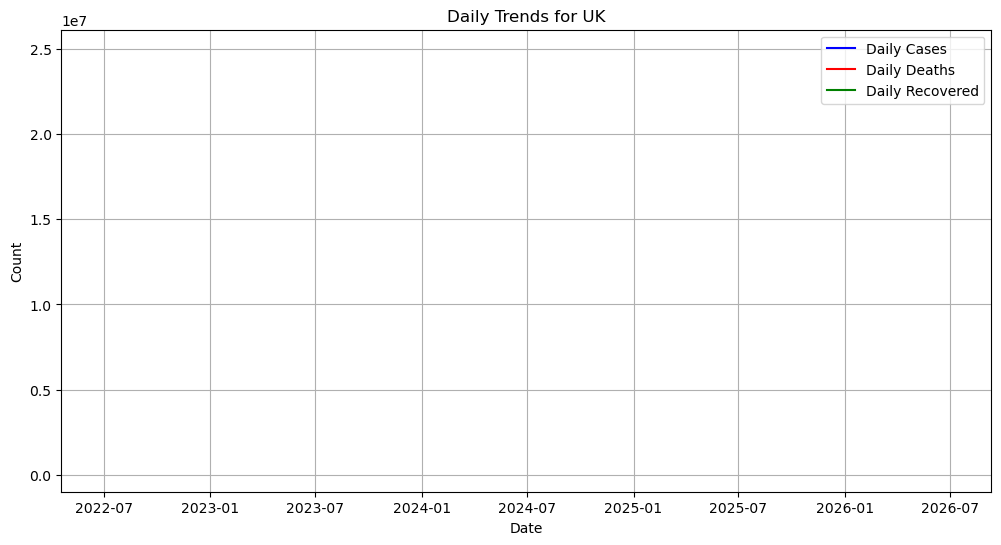

Data for USA:
           day      Cases     Deaths    Recovered
219 2024-06-30  111820082  1219487.0  109814428.0
Data types for USA:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


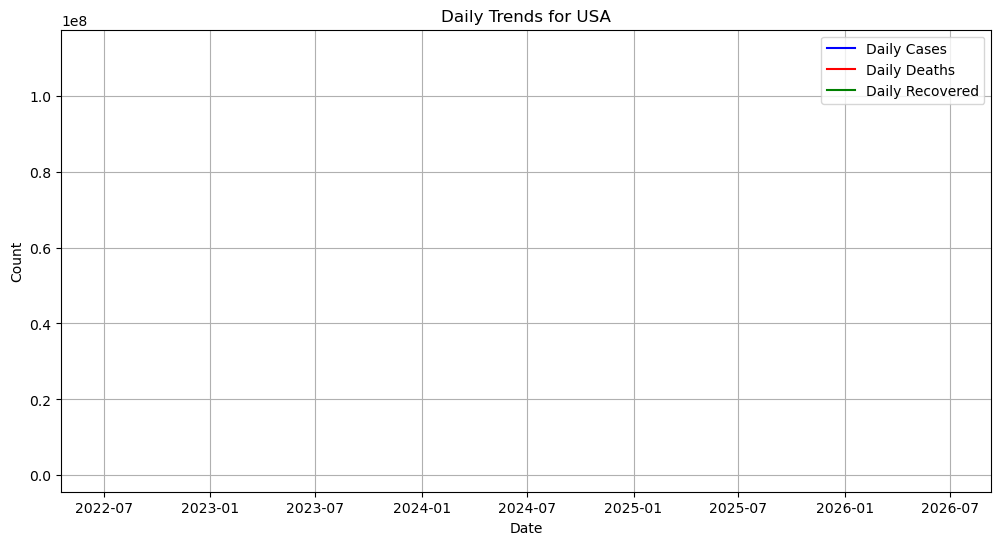

Data for Uganda:
          day   Cases  Deaths  Recovered
99 2024-06-30  172149  3632.0   100431.0
Data types for Uganda:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


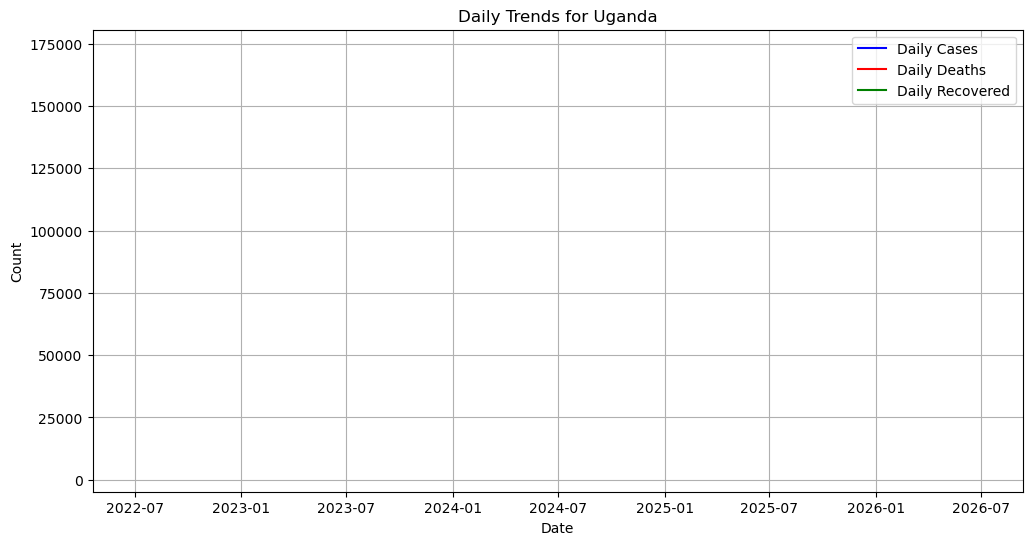

Data for Ukraine:
           day    Cases    Deaths  Recovered
168 2024-06-30  5557995  112418.0  5445577.0
Data types for Ukraine:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


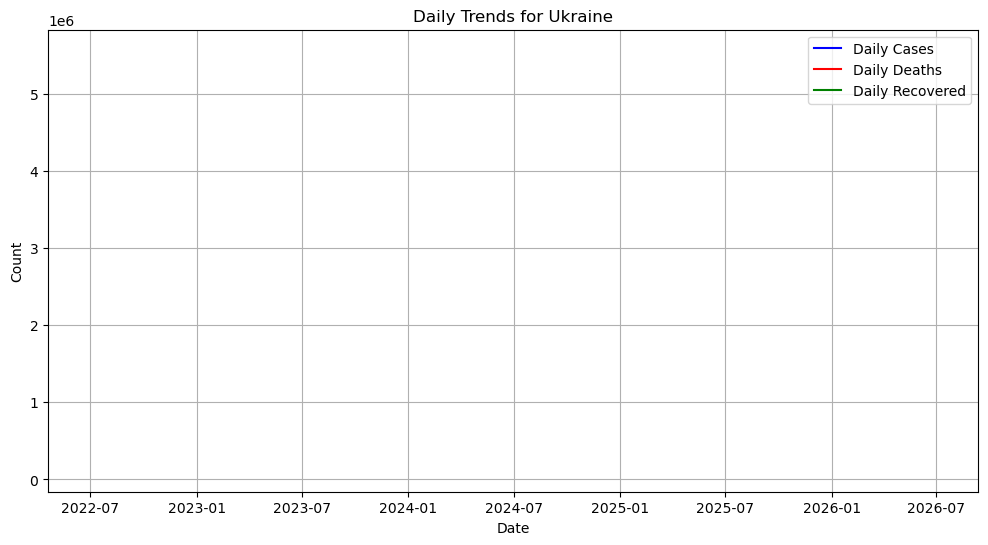

Data for Uruguay:
           day    Cases  Deaths  Recovered
125 2024-06-30  1041111  7664.0  1030944.0
Data types for Uruguay:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


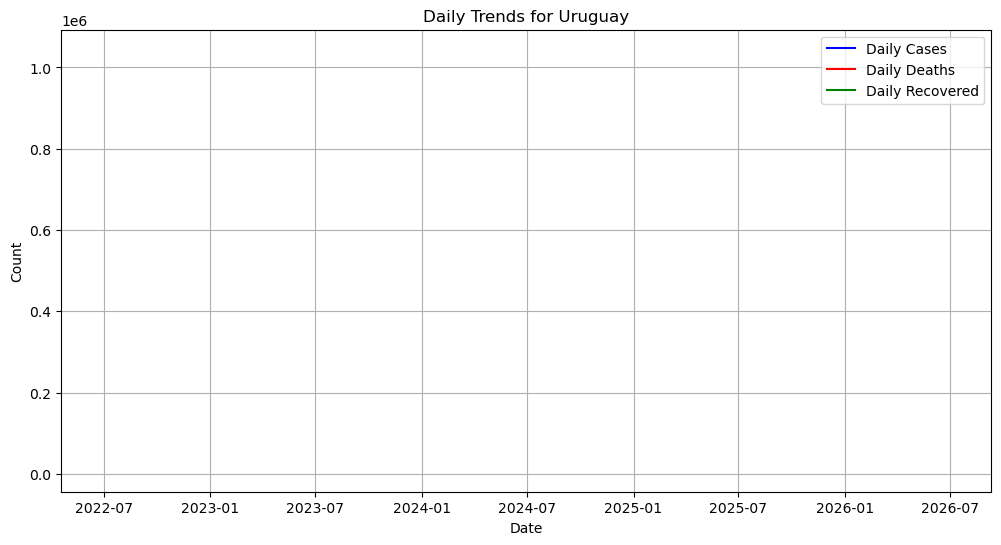

Data for Uzbekistan:
           day   Cases  Deaths  Recovered
120 2024-06-30  253662  1637.0   241486.0
Data types for Uzbekistan:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


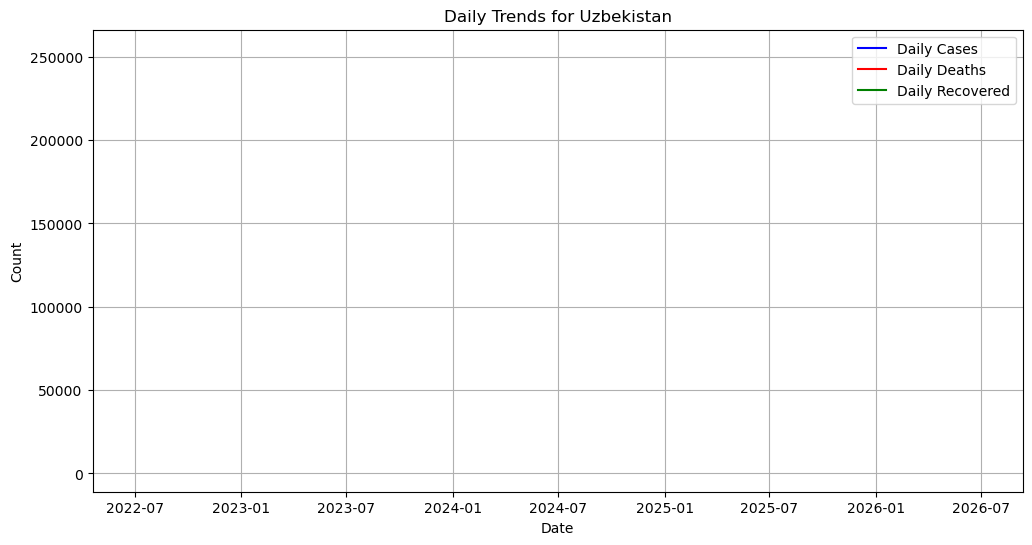

Data for Vanuatu:
          day  Cases  Deaths  Recovered
28 2024-06-30  12019    14.0    11976.0
Data types for Vanuatu:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


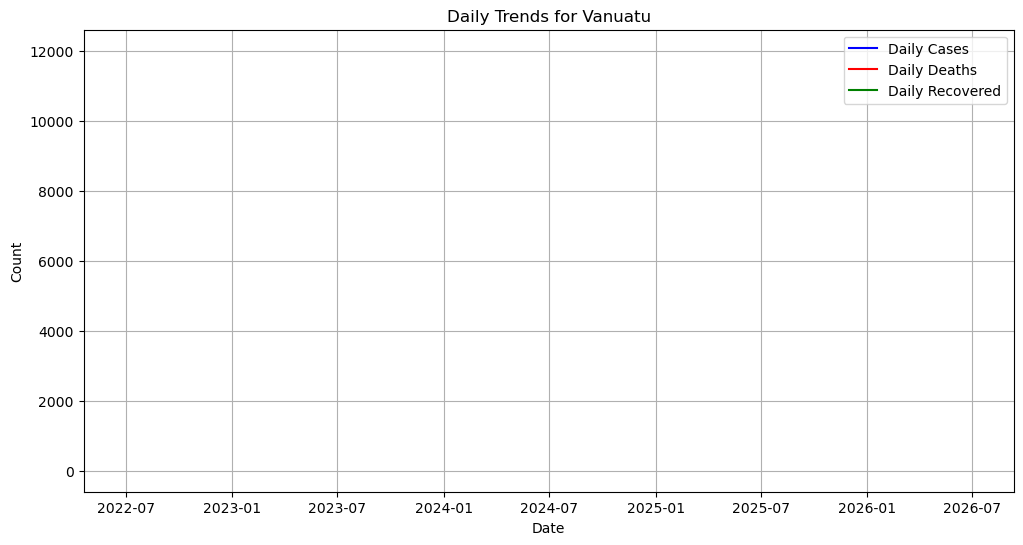

Data for Vatican-City:
         day  Cases  Deaths  Recovered
4 2024-06-30     29     0.0       29.0
Data types for Vatican-City:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


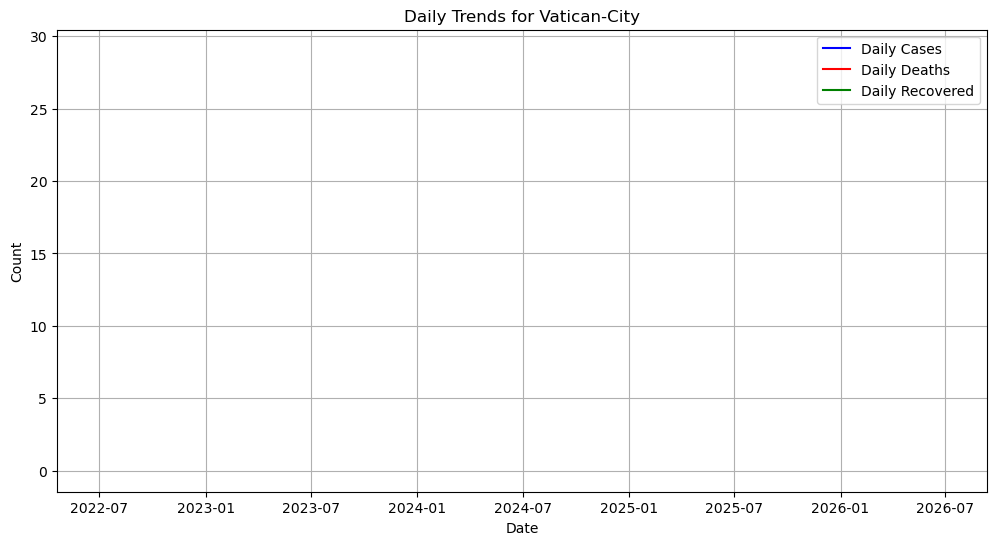

Data for Venezuela:
           day   Cases  Deaths  Recovered
118 2024-06-30  552695  5856.0   546537.0
Data types for Venezuela:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


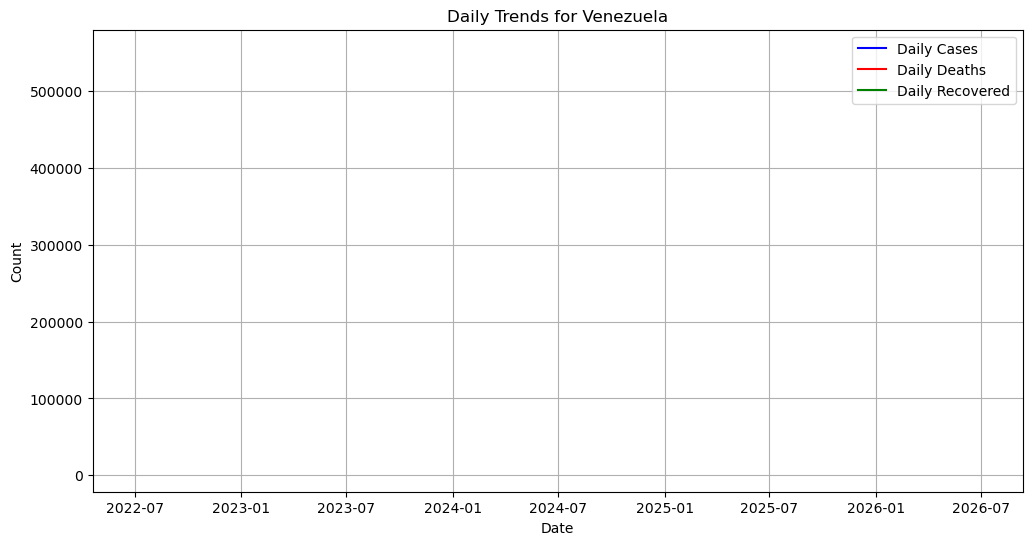

Data for Vietnam:
           day     Cases   Deaths   Recovered
231 2024-06-30  11625195  43206.0  10640971.0
Data types for Vietnam:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


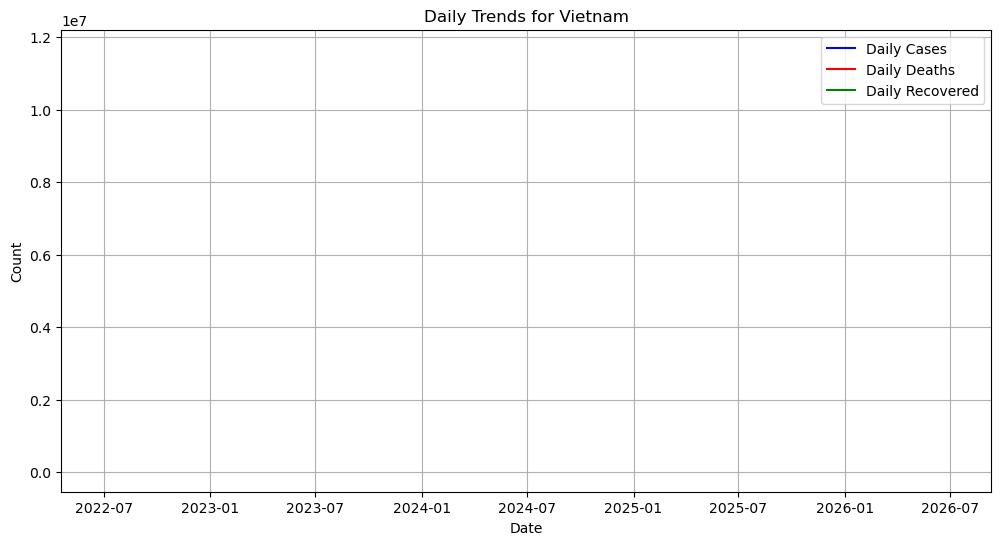

Data for Wallis-and-Futuna:
          day  Cases  Deaths  Recovered
30 2024-06-30   3550     8.0      438.0
Data types for Wallis-and-Futuna:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


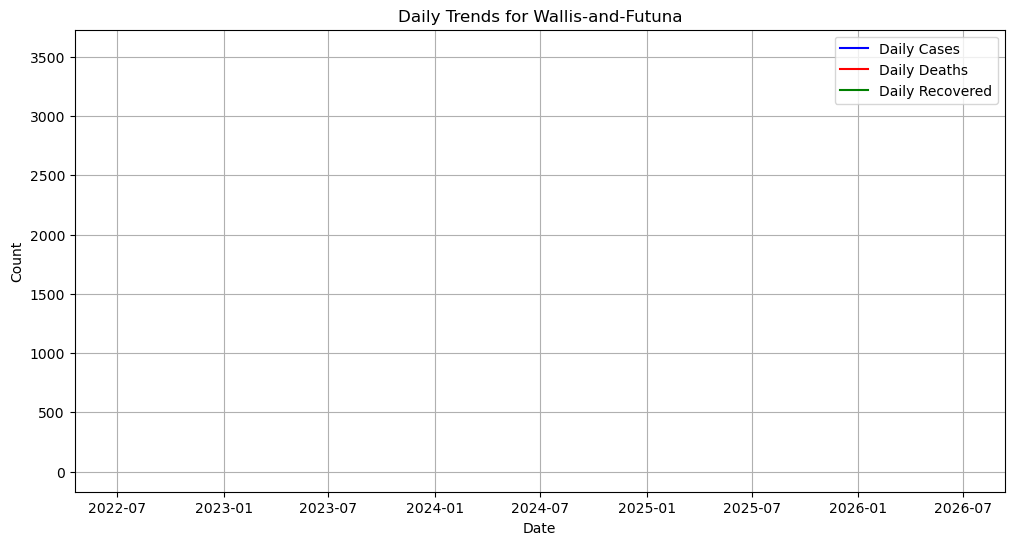

Data for Western-Sahara:
         day  Cases  Deaths  Recovered
5 2024-06-30     10     1.0        9.0
Data types for Western-Sahara:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


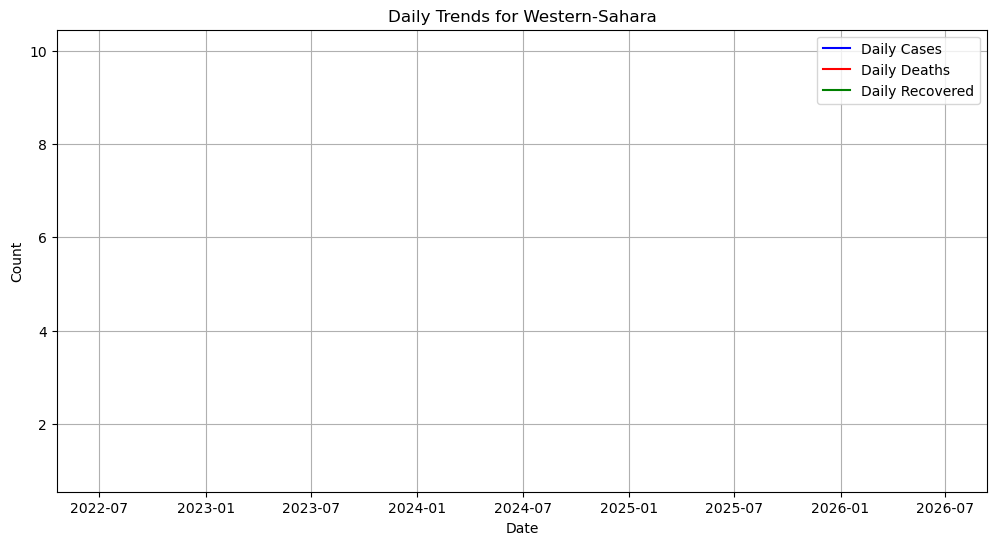

Data for Yemen:
          day  Cases  Deaths  Recovered
46 2024-06-30  11945  2159.0     9124.0
Data types for Yemen:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


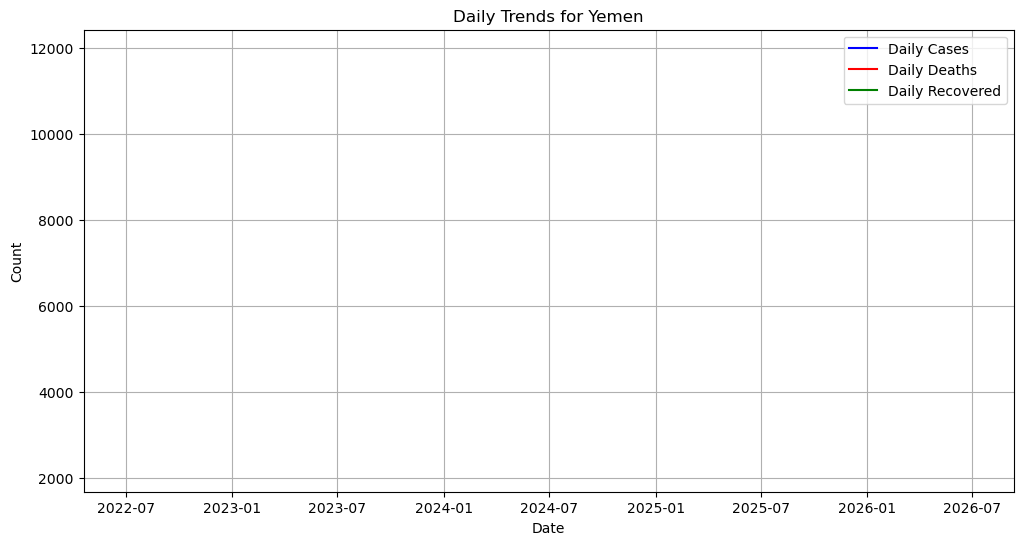

Data for Zambia:
           day   Cases  Deaths  Recovered
150 2024-06-30  349304  4069.0   341316.0
Data types for Zambia:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


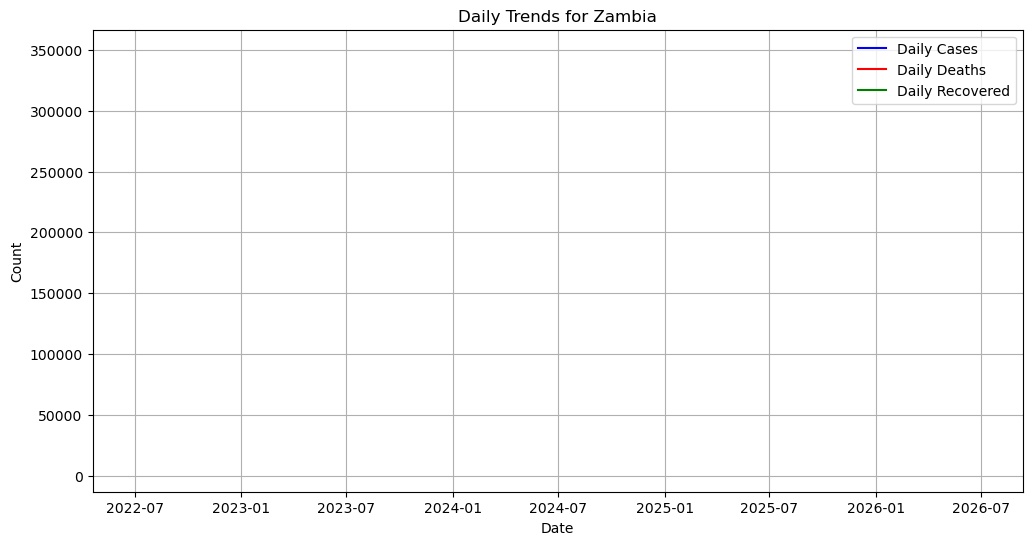

Data for Zimbabwe:
           day   Cases  Deaths  Recovered
158 2024-06-30  266359  5740.0   258888.0
Data types for Zimbabwe:
country                          object
continent                        object
population                      float64
day                      datetime64[ns]
time                             object
Cases                             int64
Recovered                       float64
Deaths                          float64
Tests                           float64
Week                             UInt32
Daily Case Change (%)           float64
dtype: object


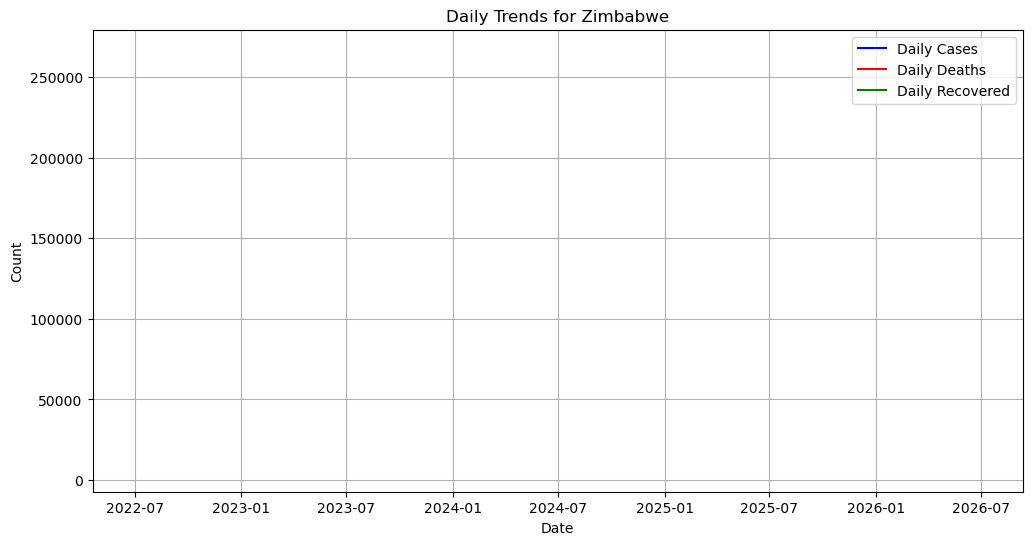

In [18]:
for country in countries:
    # Filter data for the current country
    country_data = data[data['country'] == country].copy()  # Use copy() to avoid SettingWithCopyWarning

    # Check if the data for the country is empty
    if country_data.empty:
        print(f"No data for {country}")
        continue  # Skip to the next country if no data is available for the country

    # Convert 'day' column to datetime if not already
    country_data.loc[:, 'day'] = pd.to_datetime(country_data['day'])

    # Print the first few rows of the filtered data to verify correctness
    print(f"Data for {country}:")
    print(country_data[['day', 'Cases', 'Deaths', 'Recovered']].head())

    # Ensure the data types are correct
    print(f"Data types for {country}:")
    print(country_data.dtypes)

    # Plot Daily Trends of New Cases, Deaths, and Recoveries
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['day'], country_data['Cases'], label='Daily Cases', color='blue')
    plt.plot(country_data['day'], country_data['Deaths'], label='Daily Deaths', color='red')
    plt.plot(country_data['day'], country_data['Recovered'], label='Daily Recovered', color='green')
    plt.title(f'Daily Trends for {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()

    # Save the plot as an image file and display it
    plt.savefig(f'{country}_daily_trends.png')
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid memory issues


       country      Cases
0  Afghanistan     234174
1       Africa   12860924
2      Albania     334863
3      Algeria     272010
4          All  704753890


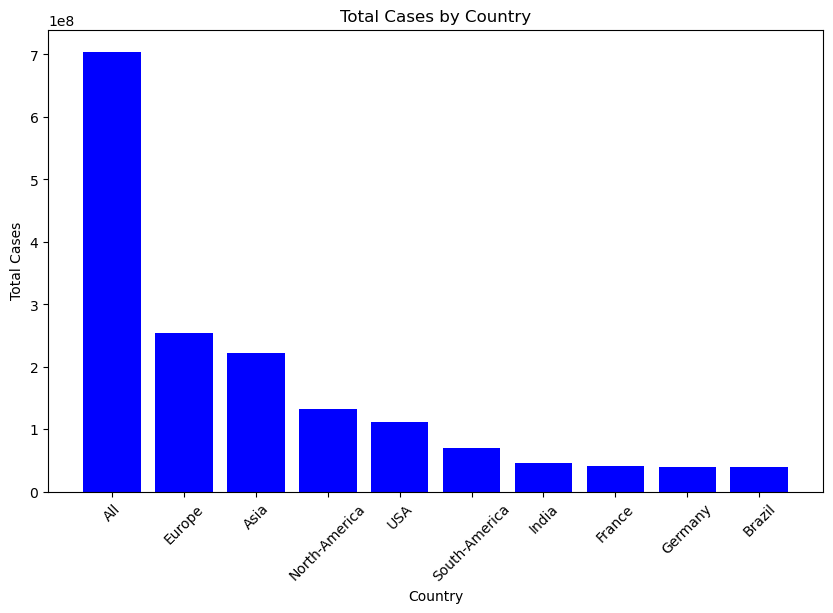

In [41]:
# Check if country_summary has valid data
print(country_summary[['country', 'Cases']].head())

# Ensure 'Cases' column is numeric
country_summary['Cases'] = pd.to_numeric(country_summary['Cases'], errors='coerce')

# Drop rows with NaN values in the relevant columns
country_summary = country_summary.dropna(subset=['Cases', 'country'])

# Get top 10 countries by total cases
top_countries = country_summary.sort_values('Cases', ascending=False).head(10)

# Check if top_countries DataFrame is valid
# print(top_countries)

# Plot the top 10 countries by total cases
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['Cases'], color='blue')
plt.title('Total Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()
